# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [6]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [35]:
df["sales_channel"].unique()

array(['Internet', 'Mobile'], dtype=object)

In [36]:
mapping = {
    "Internet": 1,
    "Mobile": 2,
}

df["sales_channel"] = df["sales_channel"].map(mapping)

In [37]:
df["sales_channel"].unique()

array([1, 2], dtype=int64)

In [38]:
df["trip_type"].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [39]:
mapping = {
    "RoundTrip": 1,
    "CircleTrip": 2,
    "OneWay":3,
}

df["trip_type"] = df["trip_type"].map(mapping)

In [40]:
df["trip_type"].unique()

array([1, 2, 3], dtype=int64)

In [8]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [9]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [10]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [11]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

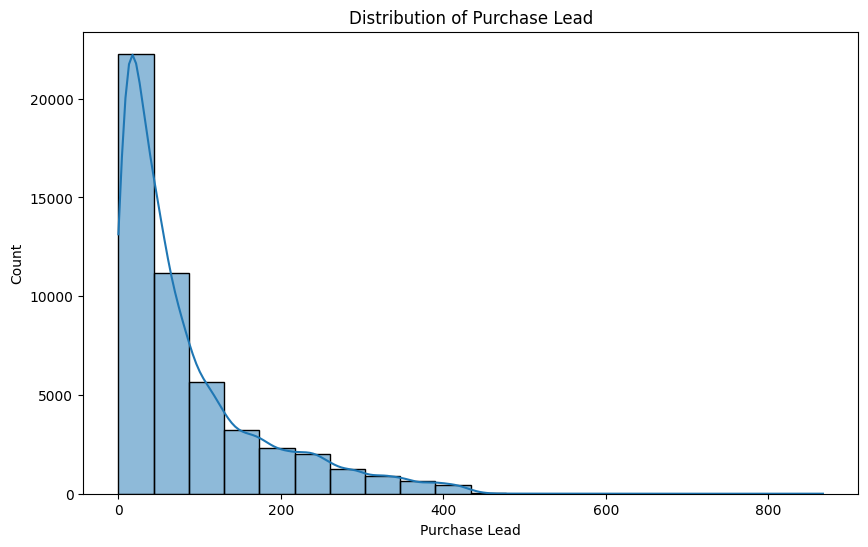

In [16]:
# Histogram of a numeric column
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df["purchase_lead"], bins=20, kde=True)
plt.title("Distribution of Purchase Lead")
plt.xlabel("Purchase Lead")
plt.ylabel("Count")
plt.show()

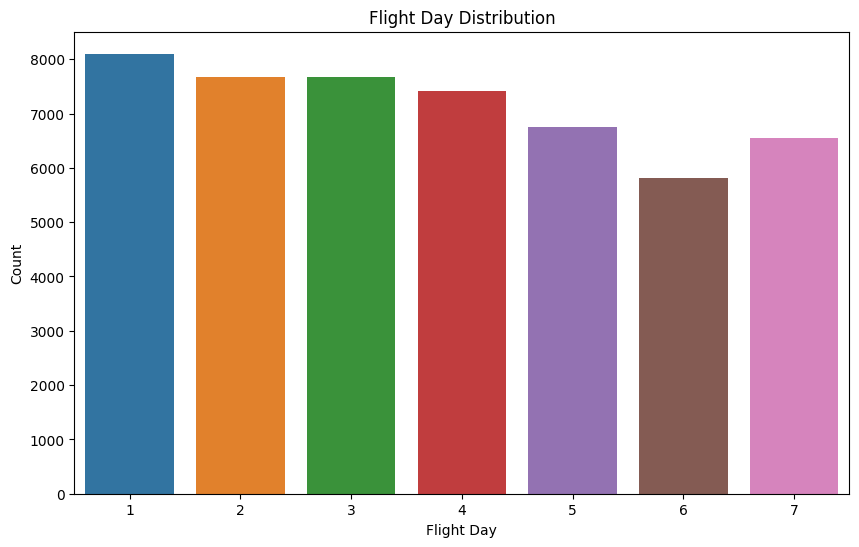

In [17]:
# Count plot of a categorical column
plt.figure(figsize=(10, 6))
sns.countplot(x="flight_day", data=df)
plt.title("Flight Day Distribution")
plt.xlabel("Flight Day")
plt.ylabel("Count")
plt.show()

In [21]:

# Identify numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Fill missing values with the mean of numeric columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# This will fill only the numeric columns with their respective means


In [26]:
categorical_cols = ["sales_channel", "trip_type", "flight_day"]
data_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [27]:
X = data_encoded.drop("booking_complete", axis=1)
y = data_encoded["booking_complete"]


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset from a CSV file
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")

# Handle missing values (example: filling numeric columns with mean)
df.fillna(df.mean(), inplace=True)

# Create binary flags for each category in "sales_channel" and "trip_type" columns
unique_sales_channels = df["sales_channel"].unique()
unique_trip_types = df["trip_type"].unique()

for channel in unique_sales_channels:
    df[f"sales_channel_{channel}"] = (df["sales_channel"] == channel).astype(int)

for trip_type in unique_trip_types:
    df[f"trip_type_{trip_type}"] = (df["trip_type"] == trip_type).astype(int)

# Split the dataset into features (X) and target (y)
X = df.drop(["booking_complete", "sales_channel", "trip_type"], axis=1)
y = df["booking_complete"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize or scale numeric features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train a Machine Learning Model
# Create a RandomForestClassifier model
model = RandomForestClassifier(random_state=42)

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


TypeError: Could not convert ['InternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetMobileMobileMobileInternetInternetMobileMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileMobileInternetInternetMobileInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetMobileInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetMobileInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetMobileMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetMobileMobileMobileMobileInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetMobileMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetMobileInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileMobileInternetMobileInternetMobileInternetInternetMobileInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileMobileMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileMobileInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileMobileInternetInternetInternetMobileMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetMobileMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetMobileInternetInternetMobileInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetMobileInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileMobileMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetMobileMobileInternetMobileMobileInternetMobileMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetMobileMobileMobileMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetMobileMobileInternetInternetInternetInternetMobileInternetInternetMobileMobileInternetInternetMobileInternetInternetMobileMobileMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileMobileMobileInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetMobileInternetMobileInternetMobileMobileMobileInternetInternetInternetMobileInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetMobileMobileInternetMobileInternetMobileMobileInternetInternetInternetInternetMobileMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileMobileInternetInternetInternetInternetMobileMobileMobileMobileInternetMobileInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetMobileMobileInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetMobileMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileMobileMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetMobileInternetInternetMobileInternetInternetInternetMobileInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileMobileInternetInternetInternetInternetMobileMobileInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetMobileInternetInternetInternetMobileInternetInternetInternetMobileInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetMobileInternetMobileInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileMobileInternetMobileInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileMobileInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileMobileInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileMobileInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileMobileInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileMobileMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetMobileInternetMobileInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileMobileMobileInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetMobileInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetMobileInternetMobileMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileMobileInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetMobileInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetMobileMobileInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetMobileInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileMobileMobileInternetInternetInternetMobileInternetInternetMobileMobileMobileInternetMobileInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetMobileInternetMobileMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileMobileMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileMobileMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileMobileInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetMobileInternetInternetMobileInternetInternetMobileMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileMobileInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetMobileMobileMobileInternetMobileInternetInternetInternetMobileMobileMobileMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetMobileMobileMobileMobileMobileInternetInternetInternetInternetMobileMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileMobileInternetInternetInternetMobileInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileMobileMobileInternetMobileInternetInternetInternetMobileInternetInternetMobileInternetMobileInternetInternetInternetMobileMobileInternetMobileInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetMobileMobileMobileInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetMobileMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileMobileInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileMobileMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetMobileMobileMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetMobileInternetInternetMobileInternetInternetMobileMobileInternetInternetInternetMobileInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetMobileInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileMobileInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetMobileMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetMobileInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileMobileInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileMobileInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetMobileMobileMobileMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileMobileInternetMobileMobileInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetMobileInternetMobileMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetMobileInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetMobileInternetMobileInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetMobileInternetMobileInternetMobileInternetMobileMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileMobileInternetInternetInternetInternetInternetMobileMobileInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetMobileInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetMobileMobileMobileInternetMobileInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileMobileInternetMobileMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetMobileMobileMobileMobileMobileInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetMobileMobileInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileMobileMobileInternetMobileInternetInternetMobileMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileMobileInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetMobileMobileMobileMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetMobileInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetMobileMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetMobileInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileMobileMobileMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetMobileMobileMobileInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetMobileInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetMobileMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileMobileInternetMobileMobileInternetInternetMobileInternetInternetMobileInternetMobileInternetInternetMobileMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetMobileMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetMobileMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileMobileInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileMobileInternetMobileMobileInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetMobileInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetMobileInternetInternetInternetMobileInternetMobileInternetInternetMobileInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetMobileMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetMobileMobileInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetMobileInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetMobileInternetInternetInternetMobileMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileMobileInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileMobileInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileMobileInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetMobileInternetMobileMobileMobileInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetMobileMobileInternetMobileInternetInternetInternetInternetMobileInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetMobileMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetMobileMobileInternetMobileMobileInternetMobileInternetInternetInternetMobileMobileMobileInternetInternetMobileInternetInternetMobileInternetInternetInternetMobileInternetInternetMobileInternetInternetMobileInternetMobileInternetInternetMobileInternetMobileInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetMobileMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetMobileMobileMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileMobileInternetMobileMobileMobileInternetMobileInternetMobileMobileMobileMobileMobileInternetInternetInternetMobileMobileInternetMobileInternetInternetMobileMobileInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetMobileMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetMobileInternetMobileInternetInternetInternetMobileMobileMobileInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetMobileInternetInternetMobileMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileMobileInternetInternetInternetMobileMobileMobileInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetMobileInternetInternetMobileMobileInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetMobileInternetMobileInternetMobileInternetInternetMobileMobileMobileInternetInternetMobileInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetMobileInternetMobileMobileMobileInternetInternetInternetInternetMobileInternetMobileInternetMobileMobileInternetMobileInternetMobileInternetMobileInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetMobileInternetInternetMobileMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetMobileInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetMobileInternetMobileMobileInternetMobileInternetInternetMobileInternetInternetMobileInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileMobileInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileMobileInternetMobileInternetInternetMobileInternetInternetMobileMobileInternetMobileInternetInternetInternetInternetInternetInternetMobileMobileMobileInternetInternetInternetInternetMobileInternetInternetMobileInternetMobileMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetMobileInternetInternetInternetMobileInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetMobileInternetInternetInternetMobileInternetMobileMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetMobileMobileInternetInternetMobileInternetInternetMobileInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetMobileMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileMobileInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetMobileInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetMobileInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetMobileMobileMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetMobileInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetMobileMobileMobileInternetMobileMobileInternetMobileInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetMobileInternetMobileInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetMobileInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetMobileInternetMobileInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetMobileInternetMobileMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileMobileInternetMobileMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetMobileMobileInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetMobileInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetMobileInternetMobileMobileMobileMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetMobileMobileMobileMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileMobileMobileMobileInternetMobileInternetMobileMobileMobileMobileInternetMobileMobileMobileInternetInternetMobileInternetMobileMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetMobileMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetMobileMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetMobileInternetMobileInternetMobileInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetMobileMobileInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetMobileInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetMobileMobileMobileMobileInternetInternetMobileInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetMobileInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetMobileInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetMobileInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileMobileMobileInternetMobileMobileMobileInternetInternetInternetInternetMobileMobileMobileInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetMobileMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileMobileMobileInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetMobileInternetMobileInternetInternetMobileInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetMobileMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetMobileInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileMobileInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileMobileMobileInternetInternetInternetMobileInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetMobileInternetMobileInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetMobileInternetInternetMobileInternetInternetMobileMobileInternetInternetInternetInternetMobileInternetMobileInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetMobileInternetInternetInternetMobileMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetMobileInternetMobileInternetInternetInternetInternetMobileMobileInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetMobileInternetMobileInternetMobileInternetMobileInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetMobileInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileMobileMobileMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetMobileMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetMobileInternetInternetMobileMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileMobileInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetMobileMobileInternetInternetMobileMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetMobileInternetMobileMobileInternetMobileInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetMobileMobileMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetMobileInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetMobileMobileMobileInternetMobileInternetMobileMobileInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetMobileMobileInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetMobileMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileMobileMobileInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetMobileMobileInternetInternetMobileInternetMobileMobileInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileMobileInternetInternetInternetInternetInternetInternetMobileInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileMobileInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetMobileInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetMobileInternetInternetInternetMobileInternetMobileInternetMobileInternetInternetInternetInternetMobileMobileInternetInternetMobileInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileMobileInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetMobileInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetMobileMobileInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetMobileInternetMobileInternetInternetInternetInternetMobileInternetMobileMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileMobileInternetInternetMobileMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetMobileMobileMobileInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetMobileInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetMobileInternetInternetInternetInternetMobileMobileMobileInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetMobileInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetMobileMobileInternetInternetMobileInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileMobileMobileInternetMobileMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetMobileInternetMobileInternetInternetInternetInternetInternetMobileInternetMobileMobileMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileMobileInternetInternetInternetMobileMobileInternetInternetInternetInternetMobileMobileMobileMobileMobileInternetInternetInternetInternetMobileInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetMobileMobileMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileMobileInternetMobileInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetMobileMobileInternetInternetInternetMobileInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetMobileMobileMobileInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileMobileMobileInternetInternetMobileMobileMobileInternetMobileMobileMobileMobileMobileMobileMobileMobileMobileInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetMobileMobileInternetMobileMobileMobileInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetMobileInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileMobileMobileMobileMobileMobileMobileMobileMobileMobileMobileInternetMobileMobileInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetMobileInternetMobileMobileInternetMobileInternetMobileMobileInternetMobileInternetMobileInternetInternetMobileInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetMobileInternetMobileInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetMobileMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetMobileInternetInternetMobileMobileMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetMobileMobileInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetMobileInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetMobileInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetMobileMobileInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetMobileInternetMobileInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetMobileInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileMobileInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetMobileInternetInternetInternetMobileInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileMobileInternetInternetInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetMobileMobileInternetMobileInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileMobileInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetMobileInternetInternetMobileInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternetInternet'
 'RoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripCircleTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayOneWayRoundTripRoundTripOneWayRoundTripRoundTripOneWayRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayOneWayOneWayOneWayOneWayOneWayOneWayOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayOneWayRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripOneWayOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripOneWayOneWayRoundTripOneWayOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayOneWayCircleTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripOneWayRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripCircleTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayOneWayRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayOneWayRoundTripRoundTripOneWayOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayOneWayRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripOneWayRoundTripRoundTripOneWayRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayOneWayOneWayRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripCircleTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripOneWayRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripOneWayOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripOneWayCircleTripRoundTripRoundTripOneWayRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripOneWayOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayOneWayRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripCircleTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripOneWayRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTripRoundTrip'
 'SatSatWedSatWedThuThuMonMonSunTueSatMonFriTueThuSunSatSunSunWedWedMonFriThuThuFriMonTueTueWedThuFriMonFriWedSatFriThuMonMonThuMonWedThuSunWedWedFriWedTueWedThuWedTueThuTueTueMonSunSatMonSunSatFriSunWedTueMonMonMonSunSunSunSatFriMonThuWedTueWedTueMonTueTueTueMonTueMonFriMonTueTueFriTueTueFriWedThuFriSunMonSunTueTueMonTueThuMonTueMonTueSatTueTueThuThuSunSatThuMonMonTueFriThuFriSunSatTueWedThuSatThuThuWedSunMonTueFriMonMonFriMonThuWedSatMonTueWedSatSunTueTueWedSunThuSatSunSunTueMonSatThuFriThuSunTueSunWedSatFriSatSatSunWedTueTueSunThuFriTueTueMonMonWedMonFriWedSunSunMonTueTueWedSatThuSunWedFriMonSunThuTueSunMonWedWedFriTueThuSatSunSatSatSunWedSunMonSunFriSunMonThuTueMonTueSunMonFriMonWedTueThuTueWedTueSatTueThuThuSatMonTueMonThuSunSunSunWedSatThuThuSatThuMonSunSunSatFriWedSunMonFriSunThuTueSunThuWedFriSunThuMonThuTueMonSunSunFriSunWedFriSatSunSatWedThuSunSunWedSunThuFriTueFriFriWedFriFriSatMonTueSunSunFriSatWedSunSatSatThuSunMonFriFriThuSunFriMonMonSunFriFriTueTueSunWedWedWedSatTueThuSunWedMonSatWedThuFriMonThuThuSunSunSunTueMonWedSunSunSunTueWedMonSunMonTueMonSunThuTueWedWedWedMonSunTueWedMonTueFriThuTueWedFriWedThuFriFriWedThuWedTueFriSunSunWedTueSunSatSunSatWedTueFriSatSunWedMonFriTueThuSatMonSatTueWedFriTueFriMonSunSatWedMonFriSunSatSunWedMonFriWedWedTueWedThuMonMonSunWedSunTueSunMonSatWedMonThuMonTueTueFriTueTueWedWedFriWedSunTueThuSatSunWedTueFriWedWedTueTueWedWedFriSunTueFriTueFriThuTueTueMonSatMonMonWedSatSatSunSunFriMonSatWedWedFriSatWedSunSunTueSunMonMonMonMonSunSunSunMonFriWedTueMonFriThuSatTueSunMonThuSatTueSunWedSatSatSatSunSunMonThuTueMonMonMonWedWedMonWedMonFriWedSatFriThuFriWedMonTueFriTueSunSunWedTueFriSunSatSatWedMonFriTueMonFriSunTueFriMonTueTueWedTueSatMonTueWedWedSunWedTueTueWedWedWedTueSunFriMonMonSunFriFriFriSatSunThuTueThuSunSunWedThuSatTueFriWedFriWedTueSatTueSunTueTueWedSunSunFriWedSatWedWedThuWedThuMonFriMonThuSatSunSunMonTueMonSunThuWedMonWedFriMonMonWedMonThuMonTueFriThuThuSatTueSunFriMonThuTueThuSatFriWedThuSatFriSatWedTueWedWedSatFriSunWedSunWedSunSatTueSunSunSunTueSunSunFriSatMonMonWedTueTueSatWedWedFriSatSatWedSunSunFriWedWedThuMonSunThuThuSatSunSunMonSunMonSunMonThuSatTueTueWedTueWedMonSatThuSatSatMonThuSatFriSatWedMonSunThuWedSunSunMonFriThuSatWedThuThuThuMonTueThuMonMonSatSunFriTueThuTueWedSunSunMonThuMonSunFriSunWedThuSunSatSunMonWedWedSunThuSatTueTueFriMonFriWedThuWedThuWedWedThuFriWedSunTueFriFriThuSunWedSunSatSunSunMonSatMonFriSatThuFriThuSunMonMonTueTueThuSunTueWedSatThuMonSunSunTueFriFriFriTueTueSatWedFriFriThuSatSunWedTueSunWedSatFriTueWedWedWedFriSatFriFriSatThuMonMonSatThuTueMonThuSatSatTueWedTueSatSunSatMonFriSunSunMonThuSunSunMonSunMonWedSatSunWedTueSatSunTueSunThuMonMonTueFriMonMonTueFriWedSatMonSatMonTueMonMonThuSatSunTueSunTueWedSatWedThuWedSatFriWedTueFriSunSunSatSunSunFriSatSunTueSunWedMonMonTueMonMonSunTueFriSunMonWedSunMonWedMonMonMonFriMonMonSunMonWedMonSatFriSunMonSunSatThuThuTueMonFriWedTueSunFriSunWedSatSatTueFriFriTueTueMonSatMonMonSunSatMonSunWedMonSatFriMonWedTueFriFriSunSatWedWedSunThuTueFriWedFriWedSunFriSunSunSunMonSatTueFriSatSunFriSatThuWedWedTueFriTueThuFriSunSunSunSunTueTueFriWedSunMonMonThuSunMonSunMonSunWedSatSatWedFriSatFriSunWedWedWedFriSatSunThuFriMonTueSunTueMonWedTueSunSatWedWedTueThuSunSunFriSunMonTueFriSatTueTueFriFriFriFriSunTueFriMonThuSunSunMonSatFriSatSatTueWedThuSunSunWedThuWedWedFriMonFriSunSatThuSatFriSunWedSunFriWedSunMonThuWedMonSunSatSunFriTueSatTueSunTueMonMonThuSatTueWedWedSunSatFriMonWedSatSatFriTueTueWedFriSatMonSunWedFriSunFriSatSunWedTueSunFriSunTueTueSunFriMonThuTueFriFriTueSatFriSunSatMonWedSunTueFriFriWedSatThuSatSunWedMonSunWedThuWedFriThuFriMonTueMonThuThuFriMonThuThuSunTueSunSunWedSunTueWedFriSatFriSunSunTueMonThuFriMonMonSunTueTueTueWedSunTueWedWedSunMonSunMonThuWedSunTueThuSatTueTueSatFriTueSunMonMonTueMonThuFriThuSatTueSunMonMonTueThuFriThuTueTueWedWedThuMonSunSunMonMonThuSunWedSatWedWedSatSunThuWedSatWedSatTueSunWedMonMonWedSunMonWedWedFriWedSunTueTueThuThuMonSunMonMonSatWedMonMonMonFriMonMonThuTueSunSunSatMonTueWedWedSunSunTueTueWedTueThuSatMonMonFriTueMonTueWedSunTueSatSunSatTueWedMonFriSunTueWedSunTueFriFriSatWedMonSunThuThuSunThuTueWedThuWedWedSatMonWedWedSunWedWedMonSunSunTueSunTueThuSatMonSunFriWedWedWedMonFriTueFriSunMonTueTueMonWedTueThuSatFriThuSunSatWedSatFriWedSunTueSatMonMonThuSatMonTueMonSunTueThuWedFriThuMonThuWedWedSunSatFriSunWedMonMonSatSatSatSatWedSatThuWedSunSatTueSatFriTueWedThuFriThuFriTueWedMonMonMonSunMonSunSatSunTueWedFriWedFriTueMonSunSunWedWedSunWedSunWedTueSunTueWedMonSatSunSunTueMonWedThuFriSatWedSatThuWedMonMonSunSatThuSunSatWedTueSunSatSunMonMonWedFriWedMonSunTueMonMonThuTueThuSatMonSunWedWedSunSatMonMonMonTueSunWedTueSunThuSatTueFriThuWedFriThuMonFriSatTueSatFriTueFriSatTueThuMonTueSunTueThuSunMonThuThuMonTueMonFriThuTueTueSunFriMonThuMonThuWedMonSatMonSunThuMonMonThuSatFriSatTueFriSunThuWedThuWedTueFriMonFriSunWedFriTueTueWedMonSunMonFriSunThuTueThuFriThuSatSatSunSatThuSatThuMonMonThuSatMonTueFriTueSatMonMonThuTueFriWedMonFriMonMonFriSatThuSunMonMonThuFriFriTueSunMonThuThuWedFriMonTueSunWedSatWedMonMonSunMonFriMonMonWedFriSunFriWedSunThuMonSunWedTueTueThuFriSunSunMonTueSunTueWedSunThuSunSatSunFriWedFriSunSunFriSunFriSatSunThuSatTueSatThuThuMonTueThuSunTueFriWedSunMonTueSatSunMonFriSunWedSatSunSunTueTueFriThuTueTueFriMonTueWedThuSunWedWedFriThuWedSunWedThuSunThuFriSatSatTueWedSunThuSunWedThuThuSunSunThuSunWedSatWedThuSatTueSunTueWedThuWedThuFriTueWedSunFriSunSunTueMonThuSunThuFriFriThuTueMonFriWedSunWedThuWedFriSatThuMonThuSatWedWedMonSunSunWedSunThuMonSatFriThuTueFriWedFriWedThuMonWedWedWedSatSunSatSunTueTueFriWedTueSunWedSatSunMonSatThuSatSatSunFriFriTueTueTueThuWedTueTueFriTueFriWedWedWedSatSunWedMonSunTueSatSatThuMonTueTueSunSunSunMonSatFriThuSatThuTueWedThuFriFriWedThuTueSunFriSunSunSunThuFriFriTueMonThuSunSunMonSatFriSatSatSunWedSatSatWedFriThuSatMonFriSunThuSunTueTueSunSunMonSunFriTueThuMonFriSunWedSunThuSunTueSunThuWedThuThuWedMonFriThuSatMonWedThuSunFriWedThuTueThuWedSunThuThuSunFriWedMonTueTueThuSunSunTueMonWedWedFriSunTueSatTueThuTueWedSunSunThuTueThuSunMonThuSatWedSunTueSunMonSunSunTueSatSunThuFriFriSunThuTueWedFriWedThuFriSunSunTueMonMonThuThuWedSatTueSatSunTueThuMonSatTueSunTueSunSunFriThuFriWedSunThuThuSunWedSatSunMonMonTueWedFriThuTueMonFriWedWedSunMonSunSunWedMonThuSunTueSunThuTueSatMonMonMonMonWedSatMonMonMonWedFriSatThuWedSunSatTueWedSunSunMonWedTueTueMonWedWedThuSunFriMonSunMonThuThuSatMonSatThuTueTueThuThuSatFriSunSunFriFriTueMonMonThuThuFriWedSatTueSunWedTueFriFriSatFriSunSatTueMonSatSatTueMonSunWedSatThuWedTueThuTueThuThuMonTueTueFriTueTueMonThuWedThuWedWedTueFriMonMonThuMonFriThuThuSunTueSatWedThuMonSunSatFriWedThuThuSatSatTueSatMonMonTueSunTueSatSatSatMonThuThuMonTueThuSatThuWedMonMonSatMonWedThuWedThuFriWedWedTueMonThuMonMonWedMonSunSatTueThuTueThuFriSatFriWedMonMonMonMonSatTueFriTueTueMonSunTueFriThuFriSatWedThuFriFriMonTueSatTueSatTueThuSatThuFriMonTueWedThuSunFriThuFriTueSatWedFriWedFriWedFriSatTueSatWedFriWedThuFriFriSatMonWedWedFriFriWedWedFriThuMonFriMonSatThuMonThuFriSatMonTueMonSatSatThuSunThuThuTueFriSatSatWedFriWedSunFriSunThuMonFriTueTueThuSatSatThuTueSunSunTueSatFriThuWedThuSatWedFriSunTueSatMonFriMonTueWedSunFriThuWedFriTueTueFriSatTueFriTueSunTueTueFriTueWedSunThuWedFriThuTueFriMonThuTueSatFriWedWedFriFriTueWedSunFriSunTueFriFriMonTueThuTueSatSatWedFriTueSunFriMonFriFriWedMonSunMonWedMonWedSatSatWedWedSatWedTueFriTueFriMonMonMonWedThuSunMonFriFriFriWedThuMonSunTueFriMonFriTueTueTueWedTueThuThuTueTueSunMonWedMonFriThuThuSunWedMonSunWedWedFriTueThuFriFriMonSatFriTueSatTueTueMonFriThuThuFriSunTueTueFriSatMonWedSatTueTueTueWedFriFriFriThuWedWedFriFriWedThuSatFriWedTueSunTueSatFriTueFriTueMonWedMonWedTueTueFriWedSunMonWedFriSatFriMonFriMonSatFriWedTueTueTueSatFriFriSunFriTueSunTueSatThuSatWedFriTueWedSunSunFriMonMonTueWedSatFriMonMonSunThuSunSunThuTueTueSatThuSunSunSatFriFriTueWedTueMonSunSunMonThuSunMonTueThuFriTueTueTueFriWedTueThuWedSatSunThuFriWedFriMonTueWedWedThuMonMonTueThuTueFriMonThuMonThuSunThuWedMonSatFriTueWedWedSunSatSatTueTueWedWedSunTueTueMonTueSunSunFriWedSunFriWedThuWedThuSatTueFriThuSunThuMonMonMonTueMonMonWedMonSatThuSunTueMonSatMonWedMonTueWedWedWedTueSunSunSunFriTueMonWedSunSunTueSatFriMonThuTueMonTueWedWedThuMonWedThuMonThuFriTueTueTueTueWedSatFriThuWedWedFriWedFriSunSatSatTueTueWedTueTueTueMonFriTueSatFriFriThuWedMonSatFriMonFriTueSatThuMonThuThuThuThuSatThuTueSunSatSatFriTueSunTueSunThuMonMonMonFriSatSatSatSunSunWedThuTueWedThuThuSatSatThuSunWedFriWedSunThuSatTueTueSunSatWedThuFriSunThuMonThuWedMonWedThuThuFriThuSatTueSunMonWedThuThuSunTueWedSunSatThuFriSatSunFriWedMonThuFriFriThuSatWedThuSatThuFriThuThuSatSatSunFriSunThuFriMonThuSatSunSatMonThuSunThuThuWedSatThuMonSunTueThuMonSatThuThuSatThuSunSunTueWedSatTueWedFriFriMonWedTueSunFriSatWedWedSunWedWedTueWedMonTueTueSatMonSunMonMonMonWedMonFriMonSatFriSunWedSunMonMonMonFriMonSatSunSunSatSunMonTueTueFriTueSunThuMonTueFriSatWedMonWedSunThuMonWedWedTueMonSatTueTueThuFriSatThuThuTueSunMonWedSatFriSatMonMonSunTueWedWedWedMonSatSunMonFriTueMonTueWedSunThuWedWedSunSunSatWedFriSunMonSunTueThuThuSunTueSunFriMonFriTueThuSunMonSunSatSunSunMonSunMonWedMonSatFriFriMonThuSunFriFriWedFriFriFriFriMonMonFriSunTueFriSatFriWedThuFriThuSatMonTueSatSatThuWedSunTueSatWedTueTueWedTueThuSunSatSunMonWedMonSunTueWedThuTueWedTueMonTueTueTueTueWedTueFriTueThuTueFriFriThuTueThuWedMonMonFriTueSunSatSunSunWedFriTueSunFriSatSunFriTueWedTueTueWedSatSunThuTueSatWedSatFriThuSunFriSatMonWedFriSatFriThuTueMonThuFriTueTueMonSatFriTueSatWedWedThuSatTueWedThuFriTueTueSatThuThuSatSatTueFriTueSunMonMonSatThuThuFriFriFriWedFriTueThuTueMonThuFriSatFriSunWedTueThuWedFriSatMonWedTueMonWedWedFriSunMonWedWedSatTueThuFriWedTueTueSunSatFriFriWedWedThuThuMonWedWedMonSunFriThuWedSunSunSatSunFriMonThuSatFriTueTueSunSunThuTueSunSatFriWedSunTueWedSunThuTueWedTueTueMonFriFriFriTueSatSunTueMonWedFriMonWedTueThuFriSunSunMonTueTueMonWedMonWedThuWedFriSunSunTueFriSunTueTueThuSatThuSunFriSunTueWedSunThuWedMonMonMonSatWedTueThuMonSunWedSunWedThuTueWedThuSunWedFriThuFriSunWedSatFriSatTueSunMonWedSunFriMonSatWedSunWedSunThuThuTueTueMonTueFriTueSunFriSatSunTueMonFriMonTueThuSatSatSatSunWedTueFriThuMonTueThuThuWedMonTueWedTueWedMonSunTueSunSatSunThuSatFriTueThuMonSunThuFriWedMonWedWedMonSunThuThuMonSatTueWedSatMonTueSunTueFriSatFriFriFriMonSatMonWedThuWedMonMonSunThuTueMonSunThuSatWedFriTueSunThuTueSunThuMonFriSunSunFriMonSunWedWedWedThuMonWedMonMonSunSatThuMonMonSatMonSunSatSatMonThuFriMonThuThuThuMonMonSatTueThuSatSatFriSunMonTueSatWedMonMonTueThuThuSunWedSatSunSunTueFriWedTueSunFriMonWedThuWedThuMonTueWedSunWedThuSatSatWedSatWedTueTueFriWedWedSatMonThuTueThuThuThuTueWedTueMonTueThuWedWedMonThuThuTueTueTueFriSatMonSunMonTueSunThuMonSunTueThuSunWedFriSunFriMonFriMonThuMonWedThuSunThuThuSunMonSunSunTueTueWedMonThuFriMonThuFriTueFriTueFriSunWedWedSunSunThuSatMonSatSunMonWedMonMonFriWedThuMonSunSatMonMonWedSunWedSunTueFriFriSunWedThuMonSunTueFriWedThuSatFriTueWedSunSunFriSatThuThuWedMonFriSatWedFriMonMonWedWedThuWedTueFriSatThuSatSunWedThuTueThuThuThuFriSunMonFriTueSunTueSatWedWedWedSatTueSatMonSunSatSunWedFriSunFriFriTueFriThuWedFriMonSunFriSunWedMonWedFriMonFriFriMonSatMonSatTueMonWedSunWedSatTueTueWedTueWedMonThuThuThuWedWedTueThuMonFriMonSunSatMonWedSatFriFriWedSatThuSunTueFriMonThuTueThuSatSatSatSunSunWedFriFriFriSunTueSunFriMonFriSatSatMonSatThuFriWedFriSunMonThuSunWedThuSatTueWedTueSatThuTueTueThuThuTueFriWedSatThuWedSatWedWedFriThuSunThuSatSatSatThuSatTueFriSatSunWedTueThuSunSatTueWedMonWedMonFriWedSatWedThuSunMonSatSatMonTueThuFriTueTueWedTueSatMonTueSatThuTueThuSatFriMonThuTueFriThuThuTueSatWedThuThuFriWedTueTueSatMonTueMonFriMonSunSatMonTueThuSatWedThuFriFriThuFriMonFriMonSatFriMonTueMonWedWedFriWedTueSatFriSatFriSunSatThuThuSatFriMonSunSatThuWedFriSunMonWedSatSatTueWedTueFriSunMonFriMonMonWedFriThuMonSunSunWedSunWedThuSunMonSatThuWedTueThuWedWedTueWedWedWedMonTueTueTueTueTueWedSunWedSunFriSatFriSatSunMonFriThuTueWedSatSunTueSunTueMonThuWedThuMonThuThuFriTueTueThuTueFriTueMonTueTueSunThuSatMonTueSunMonTueWedMonThuWedSunWedWedWedMonSatSunWedWedSatTueSatMonSunSatTueTueWedTueFriMonSunThuFriMonSunSunSatFriWedFriFriWedSatMonWedMonTueThuMonTueWedSatWedWedSunThuMonFriSatMonMonMonWedThuWedFriFriSatThuMonSunFriSatThuFriTueMonMonThuMonTueTueFriSunTueSatMonFriThuSunThuFriTueMonMonSunTueWedThuSunThuMonTueThuFriTueSunWedThuTueMonThuThuThuSatTueMonSatThuWedMonWedWedThuSatTueTueWedSatMonFriFriMonFriThuTueSatSatWedWedTueFriFriSunSunThuSunSatThuThuSunMonFriSunMonTueWedMonWedTueThuSatFriThuThuThuWedTueMonFriThuFriMonSatMonWedWedSatSunTueMonMonWedMonThuThuThuMonTueFriFriSatTueWedMonWedSatSunThuTueMonThuTueSunWedFriTueSunFriFriThuSatWedSunMonSunFriThuSatTueTueMonWedWedFriMonSunSatMonWedWedMonFriMonThuTueTueTueWedMonMonThuMonThuThuSunSunSatWedWedFriMonMonSunFriTueWedSunTueMonSunSunWedSunMonFriSunSatMonTueMonSunSatThuTueTueThuMonSunWedSunFriSatFriThuThuSatSunSatWedSunThuSunFriThuSatThuThuMonMonTueThuThuSunMonMonWedWedWedSunThuMonTueWedSunSunSatThuTueThuWedFriSatFriThuTueFriThuThuMonThuTueSatWedTueWedSunFriMonMonMonTueWedMonSunThuThuSatFriMonThuTueSatWedFriTueMonTueFriSatMonFriThuSunMonTueTueSatTueTueFriTueMonThuTueTueTueTueFriTueSatSatSatTueWedMonFriMonWedThuTueMonThuFriThuMonMonSunThuSatSatSatThuWedSunSunSatMonTueWedMonSatThuSunFriTueWedMonSatSatThuWedThuSatMonMonThuTueThuThuSunTueFriTueThuThuThuThuSatThuMonSunMonSunSatTueFriFriThuSatFriMonMonFriWedFriSunWedFriSatTueFriWedSatWedTueThuWedSunSunTueThuMonWedWedTueThuFriFriFriTueFriSunSatWedThuFriWedThuWedSatFriWedWedWedFriFriTueSunWedWedFriSunTueThuFriSatFriTueMonTueSatTueThuWedSatTueFriWedSatSunTueFriSatFriMonSatMonTueWedWedFriMonTueMonTueThuSatMonFriTueSatThuMonMonSatSatFriTueTueWedSatThuSunMonFriMonFriWedFriThuWedSunThuSatMonSunFriThuSatFriThuMonTueSatTueSatMonSunSunSunWedThuThuSunMonWedWedThuTueThuThuThuThuFriSatThuWedThuFriTueWedSunMonThuTueSatThuTueMonFriThuFriThuMonSunTueTueMonFriTueWedSunSunFriThuSunFriWedSatMonFriMonThuFriSatMonSatSunSunMonFriFriThuWedSatMonTueTueSunWedFriWedMonFriWedTueSunSunTueThuFriFriThuWedSunWedThuFriSunMonWedMonSunThuMonSunWedWedSatSatWedSatMonSatTueThuTueThuThuWedMonFriSatWedMonThuThuSatWedSatSunThuTueSatMonThuThuSatSatWedThuSunWedWedThuMonThuTueMonThuThuThuThuFriSunSunWedMonMonWedSunSunThuWedMonThuTueSatThuTueSatThuThuWedFriTueFriTueWedSatMonSatWedSunMonTueThuSunWedWedTueThuWedSatSunSunTueTueMonFriMonSunTueWedFriThuSunSatMonSunFriSatWedTueSatMonWedMonWedFriSunSatMonSunMonWedWedSatMonMonFriSatMonSunThuSunSatWedFriFriTueFriSatWedTueThuMonSatFriThuSunFriSatTueFriWedThuSunThuSatSatMonThuSunWedThuWedSunSatTueFriSunFriWedWedThuThuFriTueTueTueFriMonTueThuSunSatWedSunWedThuSunMonFriThuThuTueFriFriSatSatMonSatFriFriSunTueFriSunSunFriThuSatSatThuMonThuSunMonThuThuWedTueFriTueWedSunSunThuSatMonMonTueMonMonTueWedWedWedFriMonTueTueSatWedFriMonTueSunThuSatSatSunSunFriFriWedTueWedMonMonMonMonFriMonThuWedSunThuFriSunSunThuMonFriThuSatTueMonTueTueSatTueThuTueThuFriWedMonTueThuSunFriFriMonFriFriThuFriWedThuFriSunSunSunMonMonThuFriFriFriTueFriWedTueTueSunTueThuSatWedWedTueMonFriTueFriTueThuSunTueMonMonSunFriSunThuWedThuTueSatSunWedFriFriFriFriTueThuSunWedTueWedTueMonSatSunMonSunTueFriWedThuSatThuFriSatWedThuWedMonWedSunTueMonThuWedFriFriMonWedMonMonTueWedSunThuMonFriTueTueThuMonFriSatFriMonMonSatSunWedMonMonMonThuTueThuThuTueThuSunThuWedSatSatThuThuMonSatFriFriThuSunTueTueSunMonFriThuMonThuMonSatThuWedWedWedThuMonMonTueTueMonWedThuFriFriSatTueTueSunMonSunWedThuThuMonMonMonSunSatWedSatThuFriWedWedMonWedMonSatSatThuWedMonFriTueTueTueFriFriWedSunTueFriThuTueWedMonMonWedFriThuTueThuFriWedWedTueSunThuTueSatSunTueThuFriSatSatThuSunWedThuTueThuFriSatSunMonSatMonTueSatFriThuSatSatTueWedFriMonMonTueMonSunFriSunWedTueTueSunFriMonSunThuMonMonWedWedSunFriThuTueSatSatFriFriTueTueThuThuThuFriSunSunSunTueTueWedMonMonThuThuMonSunSatWedSunMonMonThuSatThuWedThuFriTueThuWedWedFriTueSunFriMonMonWedSunFriSunSatWedTueThuThuThuTueSunSunWedMonThuMonWedThuSatSunSunFriMonSatWedSunThuSatWedThuFriMonFriFriTueTueWedFriTueMonSatTueSunSunFriWedMonFriTueWedMonTueSatThuSatThuWedSatMonMonSatFriFriTueSunTueSatMonMonSunFriMonSunTueWedTueTueWedFriThuSatThuMonTueFriFriFriThuThuWedTueSatMonWedSatFriWedSatWedTueTueMonFriThuTueMonSunMonMonFriTueMonWedMonThuSatSatTueThuWedTueSatFriMonSunTueThuSunSatTueFriSunMonMonTueTueFriWedWedThuSatWedTueWedSatSunSunTueWedTueWedFriFriFriMonSunSunSunMonFriFriMonMonTueTueThuMonMonMonMonSunThuWedSunSunWedSunFriMonTueThuSunSunThuFriSunSunThuSunSatSatSatTueFriSunTueSunWedThuFriSatSatTueMonSatTueMonSunWedWedThuTueMonMonFriTueMonMonMonTueTueThuTueTueFriMonMonFriSunSatSunMonMonFriTueThuSatTueSunMonSatSatWedThuSunThuSunSunFriMonSatWedSatMonWedWedWedThuSunThuSunWedMonMonSatSunMonSunWedTueTueSatThuWedSatThuThuTueSunSunThuFriSatTueTueMonMonWedSatSunMonMonThuMonThuSunMonSunFriTueSatFriFriMonSatMonSunSatSunSunMonTueWedSunMonSunMonMonTueFriThuSunThuTueSunTueWedMonSunTueThuMonSatTueMonTueFriTueWedSunThuThuSatThuSatSatFriWedSatWedMonThuTueWedMonSatMonThuWedMonWedSatSunFriThuTueThuSunSunTueThuTueTueWedMonMonTueThuSunSunSunThuThuSatFriThuSunMonFriMonTueMonTueWedMonWedWedFriThuFriTueFriThuFriFriTueWedFriFriSunFriSunWedSunSatFriSunThuSunTueTueWedSatSunSatMonMonSunSatThuTueTueSatWedTueMonFriSunSunMonMonFriWedWedMonThuSunSatWedWedWedFriWedMonSatFriMonThuFriThuFriTueFriWedFriMonSunTueSatTueThuTueSunWedMonFriWedFriMonMonSunFriTueMonWedWedFriSunSunTueSunMonThuFriFriWedMonSunThuTueMonSatMonFriThuSatFriFriThuMonMonTueSatTueWedSatTueFriThuThuMonFriSunMonMonThuTueSunSunThuThuSunThuWedMonSunWedSunWedFriTueMonMonMonSunMonSunSunMonTueWedSunThuSunMonWedThuWedSunThuSatSatTueFriThuMonThuWedWedSunThuSunSatFriMonMonSunTueWedSunWedFriMonWedSatWedTueWedFriMonTueWedMonTueTueWedThuWedTueSatWedSunSunWedThuSunThuSatFriSatWedMonFriTueMonThuFriFriThuFriTueSunMonFriFriThuMonMonThuWedFriMonTueMonMonThuTueWedThuSunWedMonWedWedSatWedFriFriFriFriMonSunWedSunSatFriFriSunFriFriFriWedMonTueWedWedSatSunThuMonTueWedFriFriSunThuFriSatFriThuThuFriWedThuSatFriTueWedSatTueMonSatSatSatSatFriFriFriSunMonSunWedSatThuWedTueThuThuSatSunFriMonWedSunThuTueTueTueMonSatFriTueSatFriSunFriTueFriSatTueWedFriWedFriMonMonTueThuMonSunWedFriTueWedFriMonFriSunTueThuSunWedFriMonMonSatFriFriFriThuSatMonMonSunFriThuMonTueSatSatThuThuSunFriThuFriMonSunSunMonSunThuWedTueFriWedSatThuTueThuFriSunTueFriTueSatThuTueSatSatMonWedWedTueThuFriFriThuTueSunThuSatSunThuWedSunFriSatWedSatWedSunThuSatWedSunSatWedMonThuSatSatTueThuFriThuThuMonWedThuSatWedWedTueWedTueMonFriFriFriTueFriThuSunSatMonWedSunThuSatThuFriSatWedSunThuSatTueFriSatSatWedThuSunWedSatTueSunMonWedSatTueSunFriSatMonFriThuFriWedFriSunWedSunThuTueSunWedSatSatMonWedMonSatSatThuTueSatThuMonSunTueThuFriWedTueMonMonTueFriThuSunMonSunSatThuMonFriTueTueFriMonSatFriFriMonTueFriWedSatThuFriMonMonSunFriThuFriThuMonThuMonFriFriSatSunMonTueThuThuWedSunTueTueSatThuWedWedWedFriTueWedWedMonSunFriThuTueTueTueFriTueWedFriWedTueSatTueFriTueSatSatFriSunFriFriThuMonTueThuThuSatTueMonFriSatMonThuSunWedMonTueMonMonThuThuMonWedSunSatSunMonWedFriFriSunMonSatWedFriTueFriFriThuWedThuSunSatMonTueFriSatMonSatThuThuSatThuWedFriThuMonFriWedFriSatFriMonMonTueFriMonMonMonMonFriFriTueMonFriWedThuFriSunThuWedMonThuSatThuSatSatTueThuSatTueSatSatTueWedSatFriThuSatThuThuMonThuTueTueSunTueThuTueFriFriTueThuTueWedMonSunTueTueSatSunTueFriThuThuTueSatSunWedSatSunSatThuSunThuSatWedSunSunSunWedMonThuSunFriSunThuSunWedMonTueSatSunFriMonTueSatFriSatFriSunTueMonThuSunTueSatWedTueWedSatSatThuThuSatWedSatTueMonThuWedWedMonWedWedTueMonThuSunTueWedThuWedMonWedThuFriSunTueWedSunMonWedTueMonTueMonSatTueWedThuWedSatWedWedThuFriThuWedSatWedTueTueFriTueTueSunWedFriTueSunTueSunThuSunFriSatWedSunThuThuTueWedMonTueThuThuWedFriMonTueTueSatMonSatSunTueSunSatSatTueMonFriWedMonTueFriFriThuThuMonMonWedFriWedThuThuTueWedSatThuFriFriSatTueTueFriWedTueFriSunMonSatThuMonSunSunWedSunWedWedSunFriTueMonSunWedSatMonThuWedThuTueThuTueSatWedSunSunSatMonWedFriTueTueSatSunMonMonFriThuSatFriFriMonWedSunWedSunTueSunSunFriTueTueWedMonThuMonSunTueSunFriTueWedWedWedSunSatThuSunSunTueMonThuMonSunMonMonSatSatTueSunWedTueSunFriFriWedFriSunWedSunFriSatThuSatThuTueTueWedFriFriFriSatSunThuMonFriFriTueSatFriFriThuFriSunMonMonWedWedMonWedSatSunSunSunTueTueTueSunMonTueThuFriMonSatFriFriSatSatSatSatMonSunFriWedFriMonSatFriThuSatThuThuSunTueSatMonWedWedTueWedFriWedSatSunThuMonFriWedSunSatSunMonSunMonTueThuMonTueFriThuFriWedTueSatWedSunFriSunFriFriThuSatSatWedFriThuWedSunWedSunSunThuMonWedTueMonSatTueMonThuMonFriWedWedSunSatThuThuMonThuTueMonWedFriWedTueTueSunThuWedWedWedWedSatThuSunTueTueFriTueSunSunThuSatSatThuTueWedTueSunFriSatSunThuFriSatTueSunSunSunSunMonTueFriSunMonSatWedWedSatMonFriFriThuTueMonSatWedTueTueTueSunThuTueMonTueMonFriSunSunFriSatSatSunTueSunTueThuSunSunMonTueMonThuMonSatThuSatMonWedTueThuWedFriWedFriSunFriThuWedSatThuWedWedSunTueFriSunWedWedThuTueThuSunThuMonSunMonSunMonSatTueTueTueTueMonTueSunFriWedWedSunTueSunSunSatMonFriFriMonWedSunSatFriWedSatMonTueSunThuSatFriThuThuThuTueSatSatMonTueMonThuMonTueThuThuTueSunSatSunTueMonWedTueTueTueWedThuFriSunTueFriThuMonTueWedThuSunWedFriSatMonSunTueMonSatTueFriSunSunSunSatSatMonMonFriTueThuSatSunMonWedMonWedWedMonFriThuFriSatTueMonThuFriSatThuWedTueMonSatThuTueMonWedWedMonSatSunSatMonSatMonSunTueSatWedSunThuTueWedMonMonThuFriSunMonMonFriThuSatMonSunTueTueFriMonWedWedFriSatSatMonFriThuMonMonTueWedSunMonTueThuMonTueTueSunTueMonMonTueWedFriSatSunTueThuMonMonFriMonThuWedMonSunMonFriThuSunThuFriThuWedWedFriWedThuWedThuWedWedTueSunSunTueWedThuSatSatFriSatFriSatTueSatWedWedMonTueSunWedTueMonTueThuWedSatThuSunSatTueMonSunThuThuTueWedThuWedSatSatMonTueWedWedSatTueThuTueSunSunFriThuWedTueTueFriSunMonMonWedMonMonSunSatFriFriSunSunWedWedWedWedThuSunMonSunTueWedTueThuThuThuWedThuThuThuWedSatMonFriFriSatMonTueMonSatMonFriFriMonSatSatFriMonSatThuFriThuSunTueThuMonThuMonMonTueSatWedSatSunThuWedThuMonThuThuFriTueTueWedSatMonSunWedWedSatMonMonMonMonTueFriSunTueFriSunSunWedThuSatWedSatTueSunTueMonTueWedWedSatWedWedMonThuWedSunMonSatFriWedSunTueFriSunTueThuSatTueFriSatSunThuThuTueMonTueFriTueSatSunSunThuSatSunMonTueMonSatMonTueSunTueTueMonSunFriSatThuSatFriSatMonFriSatSatSunSatTueMonSatFriTueWedWedTueTueTueTueMonThuMonSunMonWedMonTueFriFriMonSunFriSatThuThuMonFriFriSunTueWedThuTueThuThuThuSunTueWedWedWedThuFriMonMonMonSatThuSatTueSunFriMonSatTueFriTueThuWedSatWedMonTueSunWedFriWedWedSatFriThuSatFriThuTueThuWedWedSunMonSatMonFriWedTueWedWedMonSatSatSunThuThuTueFriSatMonTueMonSatFriWedSunWedTueSatTueFriSunSunThuThuMonWedTueThuWedMonMonMonSunSunTueTueMonMonTueWedTueThuFriTueTueFriMonWedMonSunTueThuTueThuWedSunMonThuThuMonWedMonSatSatTueWedSunTueSunSunThuTueTueWedSunWedFriWedThuSatTueWedTueTueWedSatTueSatWedSatFriFriSunSunSatTueMonWedSunTueTueSunTueMonThuFriWedThuFriTueMonFriWedMonMonMonWedThuMonTueMonThuSatTueSunThuMonThuThuThuSatTueSatWedSatSatThuMonFriMonThuSatTueWedWedFriFriTueMonWedFriTueMonThuFriThuWedFriSunTueTueTueSunThuWedWedWedSatWedThuFriMonThuTueWedSatWedThuThuFriWedSunFriMonSunSunFriSunWedFriSunThuSunThuMonWedThuSunSunWedMonTueMonTueThuFriSunThuSatFriFriFriSatSatThuFriSatThuTueMonWedMonMonFriSatThuTueThuTueFriThuSunThuWedFriSatThuMonSatMonSunSunSatMonMonFriSatFriWedThuMonMonTueMonFriSunMonFriMonWedSunThuMonTueMonWedMonThuFriWedSatMonTueWedTueMonMonTueWedTueMonFriTueTueThuFriSatFriMonSunWedSunThuWedMonWedTueThuTueThuWedThuTueSunThuWedWedMonFriThuTueThuMonSatWedTueFriSunSunTueSatWedWedSunSatWedSunThuFriSunThuThuTueWedThuSunWedThuThuTueSatTueThuFriFriFriFriThuSunSatWedThuFriSatMonMonTueMonSatSatSatTueFriTueSatTueMonMonSunMonTueWedThuWedWedWedWedSatMonTueTueSatSunFriMonSunWedMonSatTueThuThuSunMonWedMonMonTueSunTueTueMonFriWedMonFriMonMonFriMonSatThuSatThuThuFriSatMonMonSunSunSunSunMonMonThuSunWedFriMonThuWedWedThuThuTueWedSatSatWedFriThuMonMonWedMonWedFriMonTueFriSunFriTueTueWedThuThuWedSunMonSatMonTueMonMonSunSunThuMonTueMonFriMonTueFriWedWedSatSatWedTueFriFriMonWedTueTueWedSunTueMonSatFriFriThuSatThuWedFriTueSatSatTueThuTueTueFriMonFriMonThuFriThuFriMonSatTueWedSunWedMonWedSunTueMonFriWedWedTueThuFriMonFriFriMonSunThuSatTueMonSatWedWedFriWedWedWedThuSunWedSunSunFriSatTueSunSunSatMonMonFriThuFriTueMonSunFriThuSatFriThuWedThuMonWedMonSunFriFriWedMonSunThuThuTueTueThuMonMonSatSunFriFriMonFriThuSunTueWedFriFriFriTueMonMonWedThuWedThuFriSatSunWedSatSatFriThuMonMonThuSunSunWedWedThuWedFriFriWedMonSunFriFriMonSunFriMonSunSunThuSunThuMonSatSatTueSunFriSatThuFriThuSunSunMonTueWedSunMonThuFriThuTueFriFriTueFriSatFriMonTueSunThuSunFriWedWedTueWedWedTueSunWedTueSunMonSatMonSunSunMonThuMonThuWedWedThuSunThuSunMonTueSatFriFriSunThuFriSatTueSatSatWedSatSatWedSatSatThuMonSunSatThuMonTueSunSatSatMonWedTueSatFriThuSatThuSunTueThuSunThuWedWedSatSatWedFriWedSunThuThuMonThuWedTueFriFriMonFriMonTueTueFriTueThuMonMonThuSatTueFriSunWedSunThuSatWedMonSatFriThuSunMonWedTueThuThuWedFriFriMonTueMonFriSunFriTueThuThuFriTueMonMonTueFriWedFriSatMonWedFriFriMonThuMonWedWedFriWedWedSunWedFriWedTueTueWedWedWedThuThuSatFriSunMonSunWedMonThuThuSatSatTueFriTueMonSunWedSatFriFriSatFriMonTueThuThuSatSatFriWedMonSatWedThuWedThuWedFriMonFriSatThuSunSatMonMonSunMonMonTueThuFriTueSunSatTueTueThuSatWedSunSatMonMonWedMonTueWedSunFriSunThuWedTueWedFriSatMonSunThuSatMonMonMonMonFriWedTueThuSatWedSatMonWedSunWedTueFriSatFriWedSatFriThuWedWedTueWedSunSatWedWedSatThuWedWedWedThuTueFriFriFriSatThuMonWedThuFriTueMonMonFriFriTueWedSunWedMonSatTueSatMonThuWedWedWedFriSunFriMonSunSunFriWedThuSatSunMonWedTueSatWedThuSatMonTueTueMonMonMonThuFriFriThuWedFriWedWedWedSatMonTueThuFriSunTueMonMonTueTueTueSatSunWedMonMonTueTueSunMonSunSunTueFriSatSunSatThuWedFriWedWedThuThuThuMonFriSunSunMonSunFriFriSatSunSatMonWedThuThuTueSatSunSatWedMonWedSunSatTueTueTueThuSunSunFriMonWedFriSunThuFriWedSunWedMonTueWedWedSatWedSatTueMonSatFriSunSunFriSunTueWedTueSatMonTueTueSatMonSatMonWedThuThuFriSunSatThuFriTueWedSunThuThuWedTueThuSunThuThuFriThuMonThuSunWedFriSunWedSunTueSatFriSunSatSatMonWedWedSatThuFriWedThuMonSatWedSunTueFriMonFriThuSunSunTueFriThuFriWedTueFriFriWedWedThuSatFriFriSunSatSunSatWedTueFriWedSunThuThuSunThuTueSatSatSunThuThuWedMonWedSunThuWedThuSunWedThuMonWedSatSunThuSatTueWedTueMonFriSunTueSatMonTueSunSatThuTueWedFriSunSunSatThuThuSunWedTueWedTueSatTueThuTueTueSunMonMonThuTueMonSatWedTueTueSatFriFriFriSatMonMonTueTueTueThuSunMonFriWedThuSatFriSunWedMonFriSunThuMonTueWedMonWedTueThuMonSatTueSatSatSunTueTueWedFriSatThuSunFriSunFriWedMonThuMonSunFriSatSunMonSunMonWedMonWedWedMonWedTueTueMonSatSatFriTueFriWedSatSunMonThuMonTueTueSatTueTueTueWedMonTueMonSunSunThuSatFriFriFriFriWedThuFriTueWedSatThuWedSunTueThuThuTueTueThuFriWedWedSatTueFriTueFriWedMonWedSatMonSatTueWedSatWedTueSatMonFriWedWedSunThuFriThuMonSunSatThuFriSunWedFriTueTueThuTueWedWedWedSunWedThuMonTueTueSunWedMonSatThuTueMonTueSunSunMonTueFriSunWedTueThuSatThuMonMonSunFriSatMonMonFriSunFriWedSatThuWedWedWedTueMonMonSatSunSunWedTueWedThuWedThuSatMonMonSunSunSatTueFriWedWedSatMonFriSunTueTueSunTueTueThuSatThuTueSatFriTueSatFriFriSunFriSatThuWedThuThuFriMonWedMonThuWedMonMonMonWedWedThuThuThuThuWedWedFriSunFriSunWedFriThuFriFriTueWedWedSatSatWedTueSatTueWedFriSatSatWedThuWedThuTueThuMonFriThuWedThuWedSatMonSatTueMonTueSunSatSatFriMonWedFriTueThuWedWedTueFriFriTueTueThuThuSunFriWedSunMonTueTueSunTueFriMonThuSunWedSatSunMonTueThuSunFriMonWedSatTueFriSatWedThuWedMonSunWedTueWedSunSatFriThuWedSatFriThuWedSatMonTueWedTueSunTueThuThuSunMonMonFriWedWedMonTueWedWedFriFriWedThuFriSunFriWedTueFriThuTueTueSatTueThuSunThuTueSunTueSunMonTueThuFriWedSatMonFriWedWedSunTueWedFriTueSunMonThuWedSatSatTueTueTueSunWedMonMonFriTueFriFriMonThuTueWedThuMonWedTueMonFriTueSunThuWedSunSunThuTueSatSatSatFriSatWedWedSunTueSatWedWedFriWedTueSunSunTueFriMonTueMonMonMonSunFriSatTueMonSunWedTueSatTueFriSatThuThuMonSunThuThuSunThuWedMonThuWedThuThuSunMonTueThuTueTueMonFriWedFriMonSunSatThuFriSatWedWedFriThuSunFriWedWedWedThuSunSatMonTueThuSunThuWedWedThuWedSatThuWedFriWedTueFriMonSatSunWedTueTueWedThuThuThuMonTueWedMonSatSunSatThuSunWedWedThuMonSatThuFriWedSatSatThuSatSunWedWedSunSunWedSatSatTueTueSatFriFriThuTueFriSatMonTueFriMonThuSatSunTueWedSatSatSunMonThuThuSunThuSunSatSunThuTueMonWedMonThuThuTueThuFriSunSatMonThuWedWedTueMonThuSatThuThuMonMonMonThuMonSatWedWedThuMonMonThuThuWedWedFriSunMonTueWedFriTueThuThuThuFriTueWedFriThuWedFriTueWedTueThuWedThuSunSatThuTueSunTueTueSatMonSunFriMonWedSunThuTueSunWedSunTueFriSunMonFriWedTueSunTueSatMonMonMonMonFriTueSatWedFriFriThuFriMonSunMonTueMonMonSatFriSunThuThuFriMonMonSunSatTueMonSatFriThuWedWedThuFriMonThuSunMonMonSatWedSunWedFriMonMonWedWedTueThuMonWedWedThuThuTueSatFriThuMonSatWedSunTueSatFriTueSunSatMonSatTueSunMonTueThuMonWedThuMonTueMonThuMonFriSatThuMonSunSunSatWedTueSunMonFriSunMonMonTueFriFriFriSatTueThuMonTueWedTueWedWedMonSatThuThuWedFriThuFriFriWedFriWedFriMonSunSatMonFriThuMonMonThuSunFriTueThuTueWedWedThuTueMonFriTueTueWedTueSunTueFriFriThuTueFriThuFriMonSatWedTueThuMonWedWedSunWedSatTueMonSatFriThuMonSunMonMonMonSatThuTueThuMonThuWedThuFriMonThuMonThuWedWedSunSatSatSunMonWedFriSatSunWedSatTueTueThuThuSunSatWedSunThuTueThuFriThuSunThuFriTueTueSunSatTueMonSatTueTueThuSunThuThuMonSatTueFriWedMonThuWedTueMonFriWedFriWedMonWedSunMonTueMonMonMonFriMonThuMonTueSatSatFriFriMonSunTueTueWedThuThuFriFriSunMonSatWedSunWedTueFriThuTueFriTueFriWedMonMonMonSunThuThuFriFriTueWedTueSunSatThuThuFriMonFriTueMonTueFriTueTueWedWedFriFriThuSunThuTueSatSatWedMonFriFriTueSatMonSatSunSunMonThuSunWedMonSunMonFriWedFriMonSatTueMonTueWedSunSunFriTueSunTueThuSunSunThuSatSunSatSatThuFriThuThuMonThuThuMonFriMonFriWedWedTueTueWedTueThuFriMonSunThuMonFriWedThuSunSunMonSatFriMonWedThuWedWedTueWedThuWedMonTueMonSatSatTueMonSatSunMonSatWedMonSunWedMonFriMonThuSatSunFriTueMonFriTueFriSatThuMonTueSatSunMonTueMonSatWedTueMonWedThuSunFriTueSunSatTueMonThuSunTueTueWedFriThuSatWedWedTueThuWedSatFriSatThuSunSunWedThuThuSunTueThuSunMonWedSunMonSunFriFriSunMonMonFriThuTueWedFriWedSatTueThuThuMonMonThuTueMonMonTueMonWedTueTueFriTueWedFriFriThuMonMonMonFriTueSatWedWedTueSunTueFriThuThuSatWedSunThuFriMonWedMonSunTueTueWedFriFriFriSatTueFriWedThuTueTueWedMonMonMonThuFriSatThuThuMonThuMonWedSatWedMonMonTueWedTueMonWedThuThuSunThuThuSunWedSunMonSatTueThuWedThuWedFriMonMonMonMonMonThuTueThuThuSatThuWedWedWedSatMonFriWedMonWedThuTueWedThuTueMonWedSatFriSatFriTueMonWedThuSatThuTueFriSunSunSatFriWedTueWedWedTueThuThuSunMonSatFriSunFriMonThuWedFriSatSatWedFriTueTueTueSunThuWedWedFriWedTueTueTueSatFriWedFriWedMonTueFriSunWedMonMonWedWedSunSunThuSatFriTueFriFriTueThuThuSunTueWedMonTueTueFriFriSunFriMonSatWedMonWedWedSatSatTueMonThuFriSatTueFriMonMonFriMonMonTueSunFriFriWedThuFriThuTueSunThuWedWedFriSunWedSatSatWedThuTueSunTueSatSatSatSunMonSunMonTueMonMonSunFriFriFriFriSatThuSatTueThuSunMonMonSunWedFriMonWedWedFriMonSatFriWedThuMonThuMonSunSunSunTueSunMonSatTueMonMonThuSunFriSatSatMonTueWedFriWedFriSunSunWedSunThuFriThuTueTueWedWedMonFriTueSunFriTueSunSunSatMonThuWedWedSunWedTueWedSatFriWedWedWedSunWedWedWedWedMonSatTueThuThuTueMonMonThuWedWedSatWedMonFriSatMonMonSatWedTueMonMonTueTueMonThuThuSunSatWedWedSunSatSunSunThuSunThuMonWedSunThuMonTueThuWedFriThuWedSunTueThuSatSunSatTueWedWedSunTueThuWedSatFriMonWedWedThuFriSatSunFriMonThuThuMonMonMonWedSatSunTueTueMonSatTueThuMonThuMonSunSunSatMonTueMonTueWedTueMonTueSatMonFriFriSatSunThuMonTueMonSunSatFriWedWedTueThuFriWedThuMonWedThuSunThuSatSunFriFriTueTueTueTueTueThuSatMonSunMonSatSatWedMonMonSunTueThuMonSatThuMonFriSatFriSunSatTueThuMonSatMonSatWedMonWedTueFriWedTueThuMonThuThuMonMonSatSatThuMonTueSatSatMonWedTueSunWedTueFriMonThuSunSunThuWedThuTueWedSatSatMonWedWedThuTueMonTueWedSatFriMonTueMonTueWedWedTueMonWedTueTueThuThuSunMonMonFriFriMonThuWedWedSatSatThuFriMonSunThuMonFriFriTueSunWedSunWedSunTueFriSunMonThuSunTueWedSunWedSatThuSatMonTueThuMonThuFriWedWedSunMonFriFriWedWedThuThuMonMonMonFriFriSatFriFriMonMonThuFriWedSatWedSatWedSatSunTueFriSatWedTueSatSunSunTueSunMonWedTueSatSunTueWedFriTueWedThuSatTueThuThuWedSunSunTueWedWedSatMonSunWedFriWedMonSunSatTueTueTueMonTueThuWedTueTueSatFriThuFriThuWedMonSunThuSunFriTueMonTueSunTueFriFriFriTueFriSatWedTueWedTueMonWedThuWedTueFriWedThuThuSatTueThuTueTueWedWedSunWedTueMonSunMonTueWedSunSatFriSatMonWedFriSatSatThuMonThuSunSatFriTueTueMonTueWedTueSatSatMonTueSunFriTueTueTueSunWedSatMonThuTueWedThuThuFriTueThuWedWedMonWedSatFriTueWedFriSunFriMonFriTueWedMonThuMonThuMonTueThuSunMonFriMonSatThuTueThuSatMonTueFriThuSatSatWedThuTueFriFriThuMonWedTueTueThuSatSunThuTueFriSatTueWedSatSunFriFriTueThuMonSunWedFriFriSunTueFriSunTueFriSunMonTueSunSunSunSatWedTueTueSunWedMonThuTueSunThuMonThuSatTueMonSunTueTueTueSatTueSunFriThuSatWedMonTueSatTueThuSatThuThuSatTueThuMonWedTueSatTueWedThuFriWedWedTueSunWedThuThuThuWedWedSatFriFriMonWedSatMonSunFriSunWedWedMonWedTueFriSatSunThuSunFriSunMonTueSunWedSatWedSunWedTueSunWedThuFriWedTueTueSunSunSatWedWedThuMonSunWedFriWedWedSunWedTueSunWedSunSatThuTueMonWedSunWedFriSatTueThuSatThuFriMonSatSunSatSunWedSatSatTueMonTueSunSunTueWedTueSunTueMonMonSatSatWedFriWedThuWedMonThuWedSunTueWedFriWedSunSunThuTueSunWedSunWedSunMonWedWedSunSunMonMonWedSatSunFriWedTueMonMonSunTueMonThuThuSatFriSatSunSatFriTueFriThuThuMonWedMonThuTueTueSunSunSunWedMonTueMonTueFriTueFriWedSunTueWedSunSunFriMonFriTueSunFriMonMonWedSatWedThuTueFriFriFriTueWedFriFriWedThuSunWedWedMonSunWedFriTueWedThuFriSunSunFriThuFriTueTueWedWedMonMonMonTueMonSunSatMonSatWedWedFriSatWedMonTueThuFriMonWedMonFriWedWedMonSatThuSunThuThuMonSatMonWedSatThuSunTueThuMonFriThuTueTueSunFriSunTueSunMonFriTueSatWedMonThuMonFriWedMonFriMonSatSunMonThuTueThuSunMonSunThuMonTueFriMonTueFriSunThuTueThuThuTueSatThuSatSunSatSunFriSatSatMonWedMonFriThuSunFriSunThuWedSunSatSunThuSunThuFriSunMonWedWedMonTueSatWedMonMonThuSunMonThuTueSunMonThuSunSatFriMonWedSatMonMonThuMonMonFriTueFriWedFriFriWedThuWedSatWedMonWedWedThuThuWedSatSatSatThuSatMonTueWedSatSunWedFriFriTueThuTueTueWedMonWedFriThuThuFriSatFriFriTueTueWedTueTueFriThuWedFriMonSatWedMonThuWedSunSunTueWedSunMonSatThuWedThuFriWedTueMonMonFriSunWedSunTueSatWedTueWedThuWedTueSatMonSunSunFriTueFriTueTueThuMonThuTueFriTueTueThuThuTueMonTueMonSunSatThuThuTueSunThuSatThuSunMonMonMonSunMonWedThuMonMonFriMonMonSunSunThuMonMonWedTueTueWedMonFriWedWedWedTueSunTueWedSunMonThuSunMonSatFriFriThuMonSatSatMonWedTueSunSunWedTueThuSunThuThuThuThuWedSunMonMonThuMonThuWedMonMonWedWedWedThuWedTueThuFriMonSunWedThuThuFriTueThuWedSunTueFriMonWedFriTueMonMonWedMonWedFriThuSatSunWedFriThuSatMonFriFriMonFriWedSunSatThuFriMonWedFriWedSatWedTueFriWedFriThuFriTueThuTueWedMonMonSatSunTueSatWedTueWedMonThuWedSunTueThuThuTueMonSatFriSunMonFriThuWedMonWedThuSatWedThuThuSunThuSunSunTueWedFriMonWedSunThuWedFriSunFriWedMonSunFriSatFriTueSatThuTueMonSatTueFriFriSatSatThuSunMonFriWedTueSunThuSunSatSatSatTueSatSunFriThuSatSatSatSatSatMonWedSatSatThuSatSatMonThuFriFriSatThuMonMonFriSunTueTueSunMonTueThuSatThuSunSatSunThuMonSatWedWedFriWedThuTueFriThuFriSatFriSatWedWedWedSunWedFriWedFriTueMonThuFriSunThuTueFriTueThuMonSatSatWedWedSatSunWedTueWedSatMonFriMonThuTueSatMonSunFriTueWedFriThuTueFriMonTueTueWedSunMonMonTueSatMonMonWedSatWedMonFriSatSunThuSatWedFriTueFriSunMonMonTueSatSatThuMonThuWedTueSunSunSatSunMonThuWedWedWedThuSunFriSatSatSunTueFriTueWedTueSunSunSatTueSunSunWedFriMonTueThuWedFriMonFriTueSatFriWedThuThuSunFriThuFriMonThuSunThuTueWedFriWedFriFriFriWedFriFriTueFriMonTueFriThuMonTueMonTueMonSatSunWedSatMonMonSatSatTueTueTueTueMonWedThuWedTueThuSunFriWedSatWedWedSatThuThuMonSatSunWedSunThuMonFriMonThuWedWedSunSunTueFriFriFriTueTueFriMonTueSunTueWedSatWedTueSatFriMonWedTueThuFriFriSatTueThuTueThuSunMonThuTueSunTueMonThuSatWedSunMonWedMonTueMonMonTueSatThuFriWedWedFriSunWedWedFriTueMonThuMonThuFriSunMonTueSatFriMonSunTueSunMonTueWedSatThuThuSunSatMonMonFriMonSatMonFriSatTueTueMonWedTueWedThuSatMonTueWedMonWedSunMonTueTueTueWedTueWedThuWedTueThuMonMonTueFriTueWedWedTueMonTueFriMonMonFriSunTueSunThuTueSatSunThuSunThuMonFriThuFriMonSatMonThuThuSatMonMonWedTueFriWedWedFriSatSatWedThuSunMonSunTueMonSunFriFriSunSunSunThuThuWedTueSunSunMonTueThuMonFriThuMonTueSunFriTueSunSatMonMonSunThuThuThuMonSunTueTueSatThuFriMonTueFriWedMonThuTueMonThuWedWedMonWedMonThuSatTueWedSunFriThuFriWedTueSunFriMonThuThuWedSatWedSunSatMonThuThuTueMonSatThuMonMonThuWedThuTueFriThuWedSunFriTueSatSunTueTueSatMonSunMonFriThuSunFriTueMonMonSunSatSatSatMonWedMonThuThuSatTueSatFriSatSatTueSunWedSatWedSunThuMonThuThuThuFriSatMonWedWedSunWedSatSunSunWedSatWedMonThuMonTueFriMonMonWedWedSatThuMonSunThuThuSunFriThuThuSunSatSatFriMonThuSatMonFriWedThuWedThuTueThuWedTueSunMonSunThuThuMonThuSunThuTueMonMonSatThuThuWedThuThuMonSunFriSunFriSatMonWedWedTueTueThuSatSunTueSunMonTueFriMonSunThuThuThuSunThuMonMonWedTueSunFriSatMonWedSunSunMonTueSunTueTueMonMonMonTueThuMonTueThuSunFriWedSunSunSunThuThuThuThuSunFriMonSunWedMonWedTueMonMonFriTueSatSunSunSatFriThuWedSatSatSatTueSatThuSunThuThuThuThuMonTueWedSatFriTueThuWedThuTueSunThuWedSunFriWedFriWedFriMonFriWedSatMonTueFriSunWedThuFriWedThuTueMonThuSunWedFriSunThuTueThuMonThuMonThuSunMonSunThuWedTueThuWedMonMonTueSunMonTueMonThuTueThuThuMonTueMonThuMonFriSunWedSatSunWedSunThuWedSatSatTueThuWedMonMonThuFriMonWedTueWedThuFriTueThuFriTueFriSunSunThuWedSatSunTueFriThuThuTueSatThuSunWedWedSatFriSunWedThuThuTueTueSatMonWedThuSunTueThuMonMonSatMonWedFriThuSunTueMonTueThuWedSatTueMonSunMonMonThuMonSatThuWedFriWedSunFriSatFriWedSatWedSatSunThuWedFriTueWedFriWedThuFriSunTueTueSatSatSunTueTueFriThuSatThuThuWedThuWedSatSunThuTueMonMonMonThuSatMonSunMonSunFriWedMonTueSatThuTueMonWedSunSatThuThuSunFriThuSunThuWedThuSatSunMonSatSunThuMonSunFriWedFriSunFriTueFriFriTueTueWedThuMonWedFriSunSunSunMonMonWedThuThuMonWedFriFriSunSatThuTueMonThuSatThuWedMonWedTueWedMonTueTueSatSatFriSunSatThuThuSunSunThuMonThuMonMonThuMonMonThuSatThuThuThuMonSunSatThuFriWedWedTueMonThuMonFriMonWedFriSunSatFriMonThuWedMonSatThuSatFriSunThuFriMonFriWedFriSatMonThuTueSatThuSunMonThuTueSunMonThuMonSatTueSatWedMonFriMonSunSunSunTueFriFriTueSunWedThuSunSatMonFriWedThuThuFriTueTueWedMonWedSunSunWedFriMonThuThuTueTueFriFriSunSatTueFriThuWedThuMonWedThuWedWedTueMonWedWedTueSunSunSatThuFriTueThuMonFriSunFriTueWedTueTueTueFriFriFriSunMonFriMonSunFriSunWedWedSatSatSunFriSunFriSatThuSatThuMonMonWedSatWedSunFriMonSatFriMonSunSunFriTueSunFriWedWedSatWedSunThuMonFriTueSatFriThuSunTueSunWedSatThuTueSatSatSunWedThuWedTueSunMonWedTueMonSunFriFriTueSatSunSatTueSunSunWedTueMonWedMonMonSatSunSatThuFriSunFriFriFriMonWedWedTueThuTueWedMonFriSunSunSatWedSunSatTueThuSatSatFriFriWedTueThuMonWedSunTueThuMonWedSunThuWedTueSunMonTueSunWedFriTueTueMonTueSunThuTueTueThuThuTueMonFriThuSatMonSunSunWedMonThuThuSatMonWedFriSunTueTueMonMonMonWedSatMonThuThuSatSunMonTueFriMonThuSunThuFriSatSunTueSatWedSunThuTueMonMonThuThuSatSunSunWedWedThuSatSatWedSunSatTueFriFriSunTueTueMonTueThuSatMonSatSatThuWedSunWedThuWedSunThuWedTueSatThuMonWedThuThuSatTueMonMonSunFriFriThuTueFriTueTueTueMonSunFriMonSatThuSatMonFriThuMonMonMonWedWedWedMonTueThuSatWedSunSatMonFriFriSatMonMonSatMonThuWedMonTueSunTueTueSunTueTueTueTueMonWedSunSunFriThuMonFriSatFriWedMonTueFriTueWedWedSatTueTueThuSunMonSatSunWedThuSatMonSunWedThuMonTueFriSunTueThuThuSunThuSunSatWedFriThuThuSatMonSatThuSatWedSunFriThuThuThuFriWedThuSunThuWedSatMonMonMonFriTueThuFriSatFriSunTueTueSatSunThuSatFriSatSatSunSatMonTueWedThuSunWedSatThuMonTueMonWedThuThuSunWedMonWedWedWedTueTueWedWedWedMonMonWedMonTueWedTueThuTueWedThuTueFriFriWedFriSatTueFriTueTueSatFriSatSatTueTueSatTueTueTueMonTueSunThuTueTueTueMonSatTueSunFriMonThuWedThuWedTueThuSatSunSunFriMonSatFriWedTueSunFriFriMonWedWedWedTueFriSatTueThuMonFriWedFriSatThuThuFriTueMonMonThuWedFriWedThuWedTueMonSunTueTueFriMonThuFriSatSunSatMonMonSunWedFriWedSatWedThuFriSunSunFriSunThuTueWedFriSunSunThuWedFriTueThuSatWedSatTueMonSatFriThuSunSatWedMonFriTueThuThuWedTueThuWedTueMonThuWedFriMonTueSunMonWedSunWedThuWedTueMonMonTueMonFriThuSunTueFriSatWedThuTueThuTueWedThuThuSatSunMonSunFriSatSatSatFriWedTueThuWedThuThuThuMonThuWedMonTueWedThuSatMonWedSunMonWedSatThuFriTueWedSunSunSatThuTueWedThuMonTueWedTueWedWedThuSunMonFriSatWedSunTueWedThuSunMonTueWedWedMonSunSatMonThuTueTueThuFriSunMonSunThuSunThuTueSunMonThuSunTueWedMonTueMonTueSunWedMonThuSatWedSatTueWedWedSatThuWedTueWedFriSatMonThuThuMonMonMonThuMonThuFriFriTueWedWedMonMonSunMonMonSunSunSunSunMonThuThuTueSunThuTueMonSunWedFriWedFriTueWedWedWedWedFriWedSunTueTueTueFriTueTueMonTueTueSunThuSatWedTueTueWedMonWedSunWedFriWedTueTueWedThuSatSatFriWedMonFriMonWedThuSunFriSatSunTueTueThuMonThuFriWedFriMonWedSunWedSatTueMonTueFriFriMonTueSatMonSatWedMonSunThuWedSunWedWedSatSatThuFriFriWedWedSatFriMonSunWedWedTueSatWedWedSatFriFriWedThuThuWedThuWedTueMonTueWedTueMonSatTueThuMonMonSatFriMonTueSunTueSatSatSatFriFriWedThuSatThuSunMonMonSatThuMonSatMonThuTueSunSatSunMonTueSatSatMonSatThuFriSatWedSunSatSatSunFriFriSatTueMonSunWedMonThuThuMonSunThuSatFriFriSatSatSunTueWedThuFriMonThuTueSunFriSunThuWedThuMonSatTueThuSunMonWedSunSunThuTueTueSatThuTueTueWedSunTueFriWedFriTueSunSatThuSatSatWedWedMonFriThuSatFriWedTueMonMonThuTueThuThuMonWedWedSunSatMonMonSunWedThuThuTueSatWedMonThuThuMonTueSunSunTueFriWedFriTueSatFriTueMonTueTueThuThuWedTueThuFriTueMonTueSunMonSatFriTueFriThuMonFriMonTueTueSunMonMonTueFriFriTueThuSunTueSunWedSatFriTueFriSunTueSatMonFriFriFriThuFriFriMonSunMonTueTueTueThuSunTueMonThuFriWedTueTueTueSunMonMonThuTueTueSatTueFriWedMonSunWedFriWedSunMonWedFriTueThuFriMonSatThuSunTueFriMonTueFriSunSatSunTueMonSatTueThuWedSatMonFriTueMonSunTueTueMonMonThuTueMonThuSatTueFriMonMonMonThuFriFriMonWedFriSunFriWedWedWedSunFriThuSunSunMonSunWedSatWedSunThuThuMonWedWedWedThuThuThuThuThuSunThuSatFriWedWedWedMonSunTueMonWedMonThuFriMonSunMonSunWedSatWedMonMonSunSunFriThuFriSunThuThuWedSunSatFriMonSatMonThuWedWedSatMonWedMonTueThuMonFriTueThuWedSunFriMonMonSatTueWedThuMonSunTueTueThuSatMonFriWedTueFriThuWedTueSunMonFriMonThuWedMonMonWedMonSatThuTueTueFriFriThuTueWedTueSunSunSunSunTueMonTueWedWedThuMonFriFriThuMonSatMonSatMonSatThuWedThuWedSunMonThuWedWedTueThuMonWedTueMonWedMonWedSunFriThuWedFriWedTueMonWedSatSunTueSunMonWedFriMonFriWedTueFriFriTueSatFriMonTueMonFriSunFriMonThuThuTueSatTueTueSatWedMonFriSatTueSunThuSatSunMonFriThuThuTueFriSunSunMonSunMonFriThuWedMonSatSunMonWedWedMonThuTueSunMonWedSatTueMonSatThuThuThuFriFriThuMonWedFriSunSatTueFriThuFriSunMonWedWedSatTueWedFriThuFriMonWedMonThuMonTueThuWedThuMonWedSatSunThuWedSatSunSunTueThuThuThuThuMonSunWedTueThuTueTueFriTueTueSunThuTueMonMonThuSunSatTueSunThuWedSatMonMonWedThuWedFriWedSatWedThuSunTueMonMonSatTueFriFriSunWedMonWedFriMonThuThuSunWedSunFriThuSatTueMonSunTueThuMonWedWedTueSunSatFriFriThuFriSatTueMonTueMonSatWedSatThuMonTueSatSatSunSunWedThuThuSunWedFriSunTueSunSatWedWedFriWedSatTueMonFriTueThuWedWedTueMonWedWedWedMonSunThuTueSatMonThuThuThuMonSatSatMonWedFriWedTueTueWedSatMonSunMonSunWedWedTueMonSunSunFriSatMonFriTueWedSunSatMonSatTueMonSatFriThuWedMonTueWedSunWedThuMonMonFriFriWedTueTueSunTueTueSunSatWedSunWedMonMonMonWedThuMonSatFriMonSunSatWedSunSatFriThuSunSunSatFriSunMonFriFriSunThuMonFriFriWedWedMonWedMonThuThuWedSunFriWedFriWedThuSatTueMonSunFriThuMonThuMonWedWedWedFriMonSunThuTueMonTueFriMonWedWedThuTueFriMonSatSatSatMonMonSunMonSunTueSatFriThuTueMonWedThuFriTueWedSatMonWedFriTueSatTueFriSunSunFriThuSunTueWedSunThuSatTueFriTueWedThuTueThuWedMonTueMonFriWedTueTueFriFriTueThuWedMonSunSunFriSunSatSunThuMonTueWedFriThuSatThuMonWedMonTueMonTueMonTueThuTueFriMonMonWedMonFriFriFriWedTueSunWedSatMonSunThuThuMonThuMonSatThuFriFriThuSunWedTueThuWedThuTueWedMonSatMonThuMonSatTueSunSunTueTueWedTueFriThuWedWedSunSatWedWedMonFriFriWedTueSatFriMonWedSunSatWedWedMonThuMonTueThuWedFriFriSunMonSunThuMonThuTueSatMonThuMonFriMonThuMonMonWedThuFriSatSatTueMonFriFriTueThuMonMonSunSunThuTueWedTueSunSunSunWedSatMonThuMonMonFriSatMonTueThuTueSatSatTueFriTueSunSunTueTueFriTueTueSatThuMonMonThuTueThuSunThuTueSunFriWedFriSatFriWedTueSatFriTueWedFriMonFriWedSatMonWedFriSunSatWedSunSatWedFriMonMonTueFriTueThuMonSunMonMonSunMonFriThuFriWedTueSatMonSunThuMonSunTueTueWedMonTueSatSatMonFriSatThuFriSunSatFriThuTueSatTueThuSatTueTueSunThuMonFriThuTueMonThuSunWedSunSatMonWedFriThuMonSunWedFriFriSunWedMonFriMonSatFriSatTueThuSunSunSunMonTueTueTueMonTueMonMonTueSunSunSunThuSunSunTueThuThuFriFriMonSunFriWedSatMonThuWedSunTueMonSunTueSunTueMonWedTueMonMonSunSunWedMonSatMonMonMonWedSatMonTueFriSatSatSunSatFriTueWedThuWedWedWedFriMonFriWedWedMonSunSatWedWedThuTueSunWedTueSunFriSunThuFriTueFriMonTueSunMonFriThuSunSatTueSunWedFriThuWedMonSunTueThuWedSatSunSunSatThuMonTueFriMonFriSatSunSunSunMonWedTueSunFriThuMonWedThuTueSatTueTueThuMonSatTueFriWedMonSatMonFriWedMonMonFriThuTueTueSatSunWedWedTueThuSunSatThuThuTueWedWedFriSunSatFriSatFriWedWedFriSunThuTueSatSunFriMonTueMonThuTueSatSatTueMonSunMonMonWedWedWedSatMonFriTueSunTueSunTueFriFriMonTueMonSatMonFriThuTueThuMonMonMonWedSunMonWedThuMonWedMonWedSunSunThuTueMonWedWedMonSunSatSunSunThuThuSatSunThuSunTueThuMonThuFriFriSunSunMonWedFriThuWedThuSatWedSatMonMonFriWedTueMonTueTueTueFriWedTueFriThuThuWedWedThuTueMonMonTueWedTueTueWedMonThuWedTueThuThuMonTueMonSunMonTueSunMonMonSatSunThuTueSunWedThuTueFriSatSatMonThuMonSatWedThuSatSatWedSatSatTueSunWedTueTueSatWedThuThuTueWedSatWedThuThuTueThuWedTueThuWedTueMonSatThuTueSatWedMonSunSatMonSunSatFriFriMonSunThuFriFriWedSatFriSatThuTueMonTueSunSunTueSunWedSatFriSatTueWedFriWedThuFriMonTueThuThuTueFriMonTueSunTueSatThuThuMonMonTueMonThuThuSatMonSatWedSatSunSunWedSunFriMonTueWedMonThuThuSatMonMonSunSatSunWedMonTueThuSunFriSatTueMonSunSunSunTueSatSunSunSatMonTueSunSunSatMonMonTueThuWedWedTueSunSunTueFriWedTueMonWedMonFriMonWedMonSatThuWedFriSunWedWedSatSunTueSunTueWedThuSatTueFriMonThuThuMonSatTueThuThuThuFriFriMonMonThuFriSunSunMonSatMonThuTueSunThuThuMonThuWedThuSunMonThuFriThuSunMonWedSunMonFriMonWedSunSatTueWedThuWedMonWedSatWedWedTueSunThuMonWedThuWedWedTueSatMonMonMonWedWedTueWedMonSatWedWedThuTueWedFriSatWedSunWedWedThuFriFriSatTueTueFriFriWedMonMonTueMonSunFriTueTueSatWedSunFriFriSatFriThuWedTueSunFriTueFriThuMonThuThuTueMonSatMonThuSatSatWedMonWedMonSunMonSatMonMonFriMonWedThuSatTueTueFriMonMonMonWedSunTueSunMonSatTueThuTueTueMonSatThuMonThuFriThuTueMonSatWedMonMonTueMonSunWedThuThuFriMonTueMonWedMonTueThuSatTueTueSatTueWedFriTueSatMonMonSatWedMonFriWedSunFriSatThuWedTueSunWedFriFriThuThuTueSatWedSatWedMonTueTueTueMonTueTueSunTueFriFriSunThuTueMonFriWedTueSunWedTueWedThuTueSatWedWedMonTueFriTueTueFriWedThuTueWedFriThuMonTueFriFriMonWedFriMonTueWedSatTueMonSatMonWedThuFriFriWedFriThuThuTueMonThuTueWedSatFriFriWedFriTueFriTueWedTueMonFriFriMonThuThuTueMonThuFriWedFriThuTueMonTueSatFriThuThuSatFriMonSatFriWedTueSatWedThuMonThuThuWedThuTueTueThuThuFriFriMonFriMonTueWedSunTueTueMonMonTueWedWedMonSatMonTueFriMonSatSunFriFriThuMonThuMonWedTueFriWedThuWedFriFriSatMonWedTueTueThuWedFriMonMonFriThuTueFriFriTueMonSatThuThuMonTueFriMonWedSunTueTueThuThuMonMonSunWedWedTueThuWedMonTueWedWedThuMonSatTueThuThuMonFriWedSatThuWedMonThuThuTueThuTueSatFriSatThuThuWedWedMonWedMonTueMonMonThuMonFriFriWedMonTueFriWedWedFriWedTueMonThuWedThuMonTueMonSunTueMonTueWedFriTueFriFriWedThuThuThuSatThuMonMonMonTueThuTueFriThuMonFriFriFriTueSatTueWedWedMonMonWedThuWedFriWedThuFriThuThuTueSatThuSatWedFriTueSatThuWedSunTueThuWedWedTueWedTueMonThuThuMonThuMonMonMonMonThuSatMonWedWedThuThuWedTueThuFriThuWedSatMonThuTueThuWedWedThuFriWedFriTueTueWedWedSunWedWedThuFriFriThuFriMonThuThuTueFriThuFriTueThuTueTueMonSatWedWedTueTueWedThuFriMonTueMonThuThuTueFriWedMonWedThuWedWedThuThuThuFriFriThuMonFriFriMonTueFriTueTueTueSatFriMonMonSunTueTueTueSatTueWedTueSatTueSatFriSunMonSunThuSatThuSunTueSatWedTueSunMonSunWedSunTueWedTueThuThuTueWedFriMonSatWedWedTueSatMonSunFriSunWedTueSunSunMonSatWedSunWedThuSunThuWedFriMonTueMonThuFriSatMonTueTueSunWedMonThuTueTueThuSunFriSatWedSatFriMonSunTueThuSatThuThuWedWedWedWedMonWedThuSatTueSatWedFriWedSatSunFriFriSatMonMonTueWedSunThuMonWedThuWedWedFriThuFriSatThuSunSatWedSatMonSunMonWedTueMonSatSunWedSunWedFriWedTueFriThuFriTueSunThuFriThuSunMonWedMonSunMonSatTueMonMonSatWedTueWedWedWedSunSunThuTueMonTueThuThuFriFriTueTueSatSatSunThuFriSunMonSatSatMonThuSunMonFriMonTueSatSatMonMonWedWedThuSunMonSunSatFriTueSatSunThuFriThuMonMonTueWedThuFriThuWedMonWedMonFriFriFriFriTueSatSunMonTueThuThuSunSunSatTueWedTueFriThuMonThuTueMonTueSatFriThuSunSatThuFriTueWedFriThuFriMonSatMonTueSunFriMonWedTueSatMonTueSatSatThuTueSunMonThuThuTueMonMonFriSunFriWedMonSunTueThuThuWedSatMonMonSatThuSatThuFriThuTueMonSunWedSunTueSunSatThuThuThuMonThuSunMonSatMonMonSatThuSunTueFriThuSunFriSatSatSatWedFriTueMonTueThuTueMonTueThuFriSunThuThuFriThuWedWedSunFriSatTueMonFriThuFriFriFriThuThuSatThuSatThuThuFriSatTueSatFriFriThuMonFriWedFriMonSunSunWedMonMonSunWedTueSatTueThuWedSunWedWedMonWedSunThuFriThuTueSatFriSunWedThuSunFriSatTueTueThuTueWedThuFriMonWedWedWedSatThuMonMonSunThuThuMonSunSunFriTueThuSatTueMonTueThuWedTueSatWedMonSatThuThuThuFriSatWedMonMonSatWedTueTueWedWedTueSunSunMonSatTueTueSunTueTueSunSunWedWedThuMonWedWedSatWedThuFriMonTueMonThuFriThuSunWedMonSatTueTueSunTueSunMonThuSunTueThuSunThuThuSunMonSatFriThuWedTueSatWedTueWedSunMonWedWedMonWedWedMonSunSatWedSunThuThuThuWedThuThuThuMonTueWedWedMonSunFriMonThuMonWedFriWedSatSatThuFriWedSunSatMonSatWedSunTueSatThuThuMonThuFriTueSunSunSatFriThuThuSunSatSunTueThuSatWedThuFriSunWedSatSatThuThuMonTueWedFriTueFriMonWedSatSatSatMonTueMonSatTueTueMonSunMonThuTueTueFriFriThuFriThuMonThuSatFriThuMonFriMonMonWedSatSatSatSunMonSunWedMonThuMonTueFriThuMonTueWedFriSatFriMonSunSunTueMonFriWedSunSatSatTueSunWedWedFriMonMonTueWedThuTueThuMonThuWedTueSunSatMonFriWedFriMonTueSunThuThuTueTueSatMonThuTueTueSatTueFriThuFriSunWedFriTueMonMonSunSunTueSunWedSatWedThuWedTueWedFriSunMonTueMonWedMonTueTueSunWedSatMonThuThuThuThuTueFriWedSunWedWedSatTueTueWedMonSunTueSatTueThuThuThuTueSunMonTueThuSunThuWedMonSatFriWedThuMonThuSatWedWedMonFriFriMonMonTueSunMonFriSunMonMonMonWedFriThuFriThuSatWedTueFriMonSatMonWedMonFriTueTueMonSatTueTueFriMonSatSatTueThuWedSatThuWedThuThuFriMonTueTueWedSatMonSatThuFriMonSunSatMonSunThuSunSatWedFriSunMonThuTueTueSatSunTueWedFriThuWedWedFriSunWedFriThuSatSatTueWedThuTueThuSatMonMonThuTueSunTueSunWedWedSatWedMonSatSunFriSatFriThuThuSatSunSunFriTueSunSatWedSunTueSatSatWedMonSatThuThuSatMonSunSatSatFriThuThuWedMonMonSatSunWedFriMonSunWedFriWedMonMonMonSunMonWedWedSunMonWedTueTueThuMonTueTueMonSunMonThuSunTueWedMonSatSunWedWedMonSatTueMonTueFriWedFriWedTueThuFriThuSunTueTueFriMonWedWedWedThuMonThuThuThuFriSatWedSunSunThuMonMonTueThuMonSunThuTueSatWedTueMonTueThuThuThuMonSatMonSatMonTueSunMonThuFriTueTueWedMonSunWedMonFriSatTueThuThuTueTueTueMonSunTueFriMonFriFriFriTueSunSunMonMonFriSunWedSatTueTueMonSunSatThuThuSunMonFriMonMonSunSatFriMonMonThuFriTueSunSunThuSunFriWedWedFriThuFriFriTueFriWedFriSatTueTueThuWedTueFriFriWedThuMonFriMonFriWedSatSatSunWedFriThuFriSatSatMonSunThuMonSunSunSunMonTueWedWedMonTueSatWedWedThuSatMonThuFriFriFriMonFriThuMonFriSatMonSatTueTueTueMonSunWedSunThuTueWedThuSatTueFriFriMonFriSunThuSatMonTueThuThuFriTueMonMonMonFriMonTueTueTueSatWedThuSunWedTueTueMonSatSunThuSunSatSunWedTueTueWedSatFriWedMonThuSatFriWedWedMonWedTueSunSatMonWedFriSatTueWedSatSunSunFriFriMonSatSatThuMonWedWedTueWedMonTueSunWedMonSunSatFriThuSatSunFriFriSatTueThuThuSunSunSatSunSunMonSunSunTueSatFriThuThuTueMonThuWedSunThuThuWedTueThuFriSunThuSunTueMonFriThuThuMonSatThuWedFriMonWedThuThuMonMonTueSatWedSunFriSatTueTueTueTueThuFriFriThuTueFriSatSatFriMonTueThuTueSunSunFriThuTueMonSatTueSunWedWedMonTueSatFriSunSatThuSunWedTueFriSatThuMonTueTueTueSunSatSunSatSatSunSunMonWedWedWedWedWedFriMonMonWedWedSunMonSatTueThuFriFriThuMonThuFriWedMonTueSunThuSatWedSunWedSunMonSatMonThuSunWedFriSunSunWedWedTueMonFriMonTueTueSunWedFriWedSunMonThuSunSatTueMonSunTueFriSatThuThuMonMonFriSatMonTueMonSatSunSunTueMonMonTueMonTueThuSatFriWedWedFriSatSunWedSatTueThuMonThuSatSatSatMonFriTueSatSunSunFriFriTueMonTueMonMonMonFriMonMonMonMonMonMonMonSunMonWedSunTueThuSatTueMonSatThuFriTueFriFriSatSatTueThuFriTueSatSunMonMonMonTueWedSatSatSunFriTueSatSunSunSunWedMonMonFriSatTueMonFriMonFriWedThuFriMonTueWedThuSunMonWedMonSunSunMonSatWedMonSunFriWedWedTueThuSatSatWedFriTueWedSunThuFriWedFriWedSunTueMonWedThuMonSatMonSatFriMonFriMonWedTueTueTueSatTueWedFriFriTueFriSunThuWedMonFriMonWedMonWedMonThuFriSatFriThuFriThuThuMonSunSatFriMonThuWedSunSatWedTueSunFriSatTueSunThuThuTueTueTueTueSunThuSunFriFriMonWedWedTueSunMonTueFriThuMonWedSunTueWedSunThuSatSatMonWedWedWedMonMonMonTueThuWedSatThuFriSunThuThuSatMonMonMonSunMonFriFriWedSatWedFriThuSunWedSunWedThuFriTueThuMonFriMonMonMonTueMonWedSunFriSatMonFriThuWedSunSunSunTueMonWedMonThuWedMonThuThuFriMonMonFriFriMonThuMonSunSatTueFriWedSatMonTueSatMonTueSunWedFriMonTueTueFriTueWedMonFriWedThuSatFriTueSunFriThuSatMonSatThuSunTueSatFriSatThuTueSatMonThuThuWedMonMonSunFriSatThuMonMonMonThuTueFriTueWedThuFriThuSunWedMonFriSatWedMonFriThuThuWedSatWedWedSatThuWedSatMonSunMonTueThuMonSunFriTueThuWedTueTueThuMonThuTueWedMonSunTueTueWedSatTueThuMonThuThuTueSunFriSatWedWedTueThuWedWedThuThuWedTueThuWedTueThuFriWedThuFriSunSunTueMonMonWedMonMonTueMonTueFriThuWedTueSatThuFriWedSatTueMonThuWedMonSatWedWedSatThuTueFriFriFriWedThuSatSatTueSatMonTueThuSatFriSunWedMonFriFriSatFriSatThuWedFriTueTueWedThuTueFriSatFriTueSunSunFriTueSatThuSatThuFriThuSatFriWedMonWedMonThuFriMonFriThuMonThuSatMonMonWedThuThuFriFriWedFriFriThuWedSatSatMonThuTueThuSunWedMonSunMonWedSatMonWedThuMonMonThuFriMonFriFriMonTueFriFriSatTueThuMonWedMonThuWedMonMonTueThuMonTueFriTueFriSunFriThuTueMonWedWedFriTueMonSatWedFriWedThuFriSatWedFriWedFriThuThuThuFriWedThuSunTueMonFriMonTueThuTueTueMonTueThuTueWedTueFriWedWedWedWedThuWedThuFriThuWedFriFriMonFriFriTueTueMonFriTueWedTueFriFriWedTueSatWedTueWedTueTueThuMonWedFriWedMonWedSunSunSunThuFriWedMonTueMonThuThuSatMonWedThuWedWedFriTueWedWedThuThuMonFriWedTueThuThuWedSunSatFriMonThuTueWedFriMonTueSatFriMonThuThuThuMonFriTueFriThuThuSatMonThuMonWedWedThuThuThuMonFriMonTueSunWedSatThuWedTueSatThuWedThuMonSunWedTueFriFriMonThuThuTueSatFriSatWedFriWedFriWedWedWedFriWedMonSunWedThuThuWedWedThuMonTueThuTueWedMonWedTueWedSunThuWedFriTueTueMonFriWedFriWedFriFriThuSatFriWedFriWedThuFriMonFriWedThuFriFriTueThuFriTueThuFriWedWedWedTueMonTueFriThuThuMonFriThuThuThuThuThuFriFriThuSunSunTueFriWedFriWedWedTueTueThuWedWedMonSatTueMonThuFriMonMonWedFriMonTueTueMonFriThuWedSatWedThuTueWedTueWedFriFriMonSunTueThuThuThuTueMonThuThuTueSatTueSunSatFriMonSatFriMonMonThuSatWedSunFriThuThuTueMonWedTueTueFriSunThuFriFriWedTueSunFriWedThuThuWedTueFriFriSunFriFriTueMonFriSunWedTueSunSunWedThuTueWedMonSunFriTueSatMonWedMonMonMonTueTueTueWedWedThuSunThuThuWedFriFriSatThuSatFriSunSunSatFriFriWedSunFriThuMonWedTueFriThuSunMonThuSunThuTueSunTueThuFriThuSunSatWedThuTueMonThuTueSunThuMonThuMonTueMonTueMonThuFriMonSunTueWedMonWedFriSatSunTueMonTueMonMonThuThuWedFriSatTueSatSatWedFriSunWedSunThuFriWedFriWedTueMonMonWedMonTueWedSatWedSatSunMonSunSatSatSatMonThuFriTueThuThuMonFriWedMonWedThuMonThuThuMonSunSatTueMonThuSatMonMonSatFriWedSatTueWedThuThuWedSunFriSatWedSatThuWedMonTueSunMonWedMonSunFriSatWedSatFriSunThuSatSatMonWedFriWedMonSatMonSatFriSatTueThuSatSatMonFriSunThuTueSatTueMonFriMonSunMonWedFriSunThuTueSunMonThuThuSunSatThuSatThuSunTueFriSatFriSatWedSunSatThuThuSunWedMonSunFriSunSunSunFriThuSunTueFriFriFriThuSunThuWedTueFriSunSunFriMonSunFriSatSunSunThuSunMonFriThuSunFriTueFriWedTueTueFriMonMonFriSatSatSunSatFriSunMonTueSunSatFriMonThuSatMonMonThuSatSunMonMonSatWedTueSatMonThuSunThuSatFriWedMonSatSatSunSatWedSatSatThuTueWedThuMonSunMonFriSatWedSunThuWedSunSunWedWedSunFriSatSunFriThuSunThuThuFriMonSatMonMonSatThuSunTueSatThuThuSatMonFriSatThuThuSatFriSunSatMonSatSunFriTueFriSunSatWedFriThuSatWedWedThuWedMonThuThuFriWedSatTueFriWedMonSunMonSatMonMonTueThuThuWedWedSatWedSunWedMonWedFriThuMonSatWedTueThuFriTueThuSatTueMonTueTueMonSatTueTueWedSatTueFriFriThuSatSunThuMonMonFriWedThuTueTueSunMonSunThuFriTueTueFriWedMonThuTueSunFriFriTueSatFriThuFriFriMonMonTueThuSatTueMonFriWedSatThuSunWedWedMonFriMonTueThuFriSatSunTueWedThuTueMonTueSunSatSunMonSatMonThuSunTueFriThuThuWedMonMonWedTueFriMonFriMonSunSunTueThuWedMonFriTueMonThuFriMonFriWedWedSatSatWedFriSatFriFriFriSatSatThuSunWedWedSatFriFriWedFriSatTueWedThuSatThuSatWedTueFriSunWedFriSatTueSunTueMonMonTueWedSunWedMonSatFriThuSunFriThuWedThuFriThuMonWedWedMonThuFriMonMonMonTueThuSunThuWedThuSatThuMonThuFriMonWedThuThuSunFriTueWedTueSatFriMonWedWedFriSatThuSunMonTueThuMonSunMonSunFriWedTueMonMonWedFriFriWedFriFriSunMonFriThuFriSatMonFriThuMonWedTueThuMonTueTueSatWedFriSunFriFriMonFriWedThuSatSunSatTueThuFriSunTueThuTueSatThuSatSatSatWedSatThuTueThuMonFriMonWedThuSunThuWedTueFriSatTueThuThuSatFriTueMonSatWedSunThuFriFriTueThuTueSunTueSunSunThuThuFriWedWedThuMonTueSatThuSatWedMonSatMonMonSunWedWedMonThuWedMonWedThuFriThuTueMonThuSatFriThuWedFriWedSatMonWedSatMonSunWedTueWedTueSatSatFriMonWedFriTueThuWedThuThuFriSatSunWedTueWedSatThuMonMonSunSunSatWedSunSunFriFriMonFriFriTueSunFriThuMonSunWedFriMonThuWedWedWedThuThuMonMonThuWedSatTueThuWedFriSatFriMonMonWedThuWedTueSunThuMonThuSatFriThuWedWedMonTueSunTueFriSunTueTueThuTueWedSatWedFriMonMonSatThuThuThuMonWedMonSunSatWedSatThuMonThuMonWedFriTueTueWedTueTueMonSunFriSunMonSatTueSatFriTueSunWedFriThuWedTueSatFriMonThuThuFriThuThuSunThuThuSatTueWedWedSatThuThuSunMonFriMonWedSatMonTueThuSatSatTueThuFriThuThuSunSatTueWedFriMonWedThuTueSatMonTueMonTueThuFriFriTueMonTueWedTueFriMonFriSatFriTueSatFriSunMonThuTueTueTueThuThuThuSatMonTueWedSatSunMonFriSunSunSunTueWedSatThuWedMonFriTueSunThuMonTueWedSunThuSatFriThuMonFriSatSatMonWedSatThuFriTueTueFriThuThuMonSunSatWedFriTueSatFriSatWedSatWedFriMonTueThuMonSunWedSatMonWedMonTueWedMonMonFriWedWedFriFriSunMonTueWedMonTueTueSatFriSunThuWedTueSatWedThuMonWedWedTueSatSatTueTueMonSunSunMonFriTueTueTueFriThuMonSatFriThuFriTueTueFriMonSunSunMonFriMonSunThuThuSatSunMonSunSunSatTueThuMonSunMonWedFriThuTueSunSunThuSatTueThuFriSunWedFriSunTueWedThuTueSunSunFriMonWedThuFriTueWedTueThuWedFriFriFriWedThuSatTueThuSatTueFriTueFriSatWedTueMonWedMonSunFriSatWedTueMonMonFriTueSunMonSunFriSunWedWedSunSunTueFriSatSunSatSunFriThuTueThuFriMonMonWedMonMonWedThuSatThuThuSunThuThuWedThuSatWedMonFriSunWedFriMonWedThuSatMonThuWedFriThuThuThuTueTueTueFriSatSunThuWedSunWedSunTueTueThuThuMonThuMonTueSatWedSatWedSunTueSunSunFriWedSunSunTueFriTueTueMonFriTueSunMonMonThuMonTueTueSatMonFriWedThuSatTueFriWedWedSunTueSatThuWedThuFriWedFriSunFriSatThuSunSatSunWedMonTueThuTueSunTueSunMonTueWedSunMonFriWedFriSunThuSunSatWedMonSatFriFriFriSunSatMonSatThuTueThuWedMonSatTueFriWedWedThuMonSunFriTueFriSatTueSatThuWedWedSatTueMonTueTueWedFriThuThuSatWedMonTueMonSatThuFriTueMonThuWedSatFriWedFriMonSunFriThuMonThuWedThuThuWedFriSatTueThuWedSunWedTueWedThuTueSatThuMonSunTueSatWedMonSunMonTueFriFriMonMonWedTueWedTueSunMonSunTueSunTueMonFriTueTueSatMonSunMonMonSunTueSunThuThuWedMonThuFriSunFriFriWedThuWedSatWedMonMonTueWedThuThuWedSatWedThuFriThuFriSatTueWedSatThuTueTueTueMonMonWedThuSatTueWedWedThuSunSatFriTueMonMonWedWedFriWedMonThuFriThuSunSatFriFriMonFriWedSatMonSunWedFriThuWedSunSatMonMonSunSunMonFriThuTueSunMonThuTueMonWedFriMonWedTueWedSunSunFriMonThuWedSatSatSatSunThuSunSunThuMonThuFriSatSunSatWedSatThuThuMonFriFriFriFriWedSunSatFriSatMonFriWedWedThuFriWedWedThuWedFriTueThuWedTueMonWedWedFriSunSunTueTueFriMonWedTueMonSatMonSatWedThuWedWedSatFriMonSunWedThuMonTueSatWedSunSunThuMonTueThuTueSunFriSatThuThuTueFriSatTueThuSatWedWedThuSatMonMonWedThuThuTueSatMonMonSatFriTueFriSunWedWedMonThuSatFriSatTueWedMonSatWedTueMonThuFriWedSunMonThuTueWedThuSatThuSatTueTueSatSunMonThuSunSatFriSunSatTueFriSatFriWedTueMonThuFriWedWedMonTueTueTueSatSunWedMonMonFriSatSatSunFriSatTueWedTueFriSunWedSatFriTueWedSunMonSatWedFriFriThuTueWedWedFriThuTueFriSunWedThuTueSunTueThuFriTueTueWedSunThuThuWedSatWedTueTueMonWedFriThuSunFriSatMonSatFriMonFriMonSunTueMonThuThuThuWedTueThuMonFriSunTueThuMonFriWedTueMonMonFriTueTueFriMonMonTueTueThuTueFriWedSatFriSatWedSatFriTueFriThuSatSunThuWedSatFriWedFriTueSatSatMonFriMonSunTueSunThuFriSatMonWedFriTueTueSunSunWedFriMonThuMonWedMonFriWedTueWedWedSatWedSunTueSatTueThuWedSatThuSatSatWedSunThuFriWedWedWedFriWedFriSunSunSunWedThuMonMonSatMonMonMonThuFriSatWedSunFriTueTueSatMonMonSunMonFriWedWedTueTueMonMonTueThuSunMonThuMonSunMonSunSunSatWedTueMonThuTueSunFriWedWedFriThuTueFriThuTueWedFriSunTueSatThuWedSatSunWedSatWedTueTueSatSatWedSunSunFriMonWedThuTueWedSunWedFriFriThuSunSatThuThuTueMonThuSunFriWedMonTueFriThuWedMonMonFriSunSunMonTueFriSunSatWedSunThuWedSatWedWedSunMonThuWedMonThuTueTueMonTueSatThuSatSunFriMonSunThuSunTueWedThuMonSatWedMonWedThuThuFriMonFriWedSatMonFriMonThuFriThuSunWedMonTueSatMonSatTueFriTueWedTueTueTueSunWedTueWedTueThuTueThuTueThuWedThuSatWedThuThuTueWedThuSatThuSatSunTueTueMonFriFriSunTueThuSunSatWedTueSatFriWedWedWedMonSunSunSatSunThuThuSunFriSunMonWedWedSatThuMonSatSunMonWedSatMonWedThuFriSatMonThuFriSatTueFriWedSunThuSatTueSunTueThuFriWedThuWedMonFriThuSatSatWedMonFriThuThuSunThuSatSunThuMonThuMonWedThuMonMonFriWedTueWedSunWedFriFriThuSunFriThuTueTueWedWedTueSunFriFriSatFriSatSunSatSunSatThuTueSatThuMonSatSunSunMonFriSatWedTueTueMonFriThuTueTueFriMonWedTueMonFriSunSunTueWedSatTueMonMonTueMonThuFriWedTueFriFriSunThuFriSatWedMonMonMonThuTueThuThuFriWedWedWedSatWedWedMonSunThuTueSunSatTueSunThuSatMonWedTueThuSunFriTueThuTueTueTueFriThuSatTueTueMonFriThuMonSatSatWedWedSatMonWedFriFriSatWedMonSatTueMonWedSatSatThuSunFriMonThuSunTueWedThuSunFriWedSunMonMonWedSatTueSunTueThuSunSatMonWedWedSatThuSatSunFriWedWedMonMonThuThuFriThuThuThuMonSunSunTueWedMonFriTueSunThuSunFriSatTueSunThuThuSunMonMonThuThuTueSatFriWedTueWedTueMonSunTueWedSatFriFriMonWedFriThuSunFriFriSatSunMonFriThuMonSatThuThuThuThuTueSatThuTueMonMonTueSunSatFriSunSatTueSunTueMonSatSunFriWedFriTueSunWedFriWedSunWedMonSunSatTueThuTueWedThuSunThuWedSatTueSatFriThuThuThuTueThuThuSunSatThuWedTueFriSatWedTueThuTueWedThuWedSunMonWedFriSatMonFriTueFriTueWedWedThuWedTueThuTueMonFriTueMonThuFriSunThuWedTueSunThuThuSatMonTueFriWedSatWedFriWedThuWedWedThuMonFriThuTueSatThuTueTueWedTueWedTueWedSatMonThuMonThuSatThuWedWedMonFriMonSatMonFriTueMonFriThuMonSatSatThuMonMonTueMonMonSunMonFriMonWedTueFriSatWedWedSunTueTueSunTueMonFriMonWedSatSunThuWedThuTueTueMonWedTueWedMonSunSatFriMonWedMonThuFriThuSunThuFriSunSatWedMonTueTueFriSatThuTueWedMonWedSatTueWedTueMonWedTueThuSunTueSatSatFriTueSunSunFriFriMonTueFriSunWedTueTueMonWedThuMonTueSunMonSunFriWedWedFriMonSunTueThuSunMonMonWedMonFriThuFriSatFriThuFriWedSunThuTueTueSunSatSunWedWedWedThuTueMonTueFriMonWedTueSatTueTueThuTueMonFriMonThuMonSatSunSatMonThuFriMonWedWedTueThuFriTueSunSunSatSatTueThuFriThuThuSunSunThuWedThuFriThuMonSunFriThuThuWedTueMonWedWedWedTueWedThuFriSatThuSatThuMonSunThuMonTueWedMonSatTueSatTueMonWedSunSatThuFriTueThuTueWedFriThuFriSunTueFriThuMonWedSunMonMonWedFriWedSunWedWedMonSunTueWedSunSatMonWedSunSatWedSatWedSunWedFriTueWedTueSatFriSatThuFriMonTueSunThuThuSunFriFriThuWedSunSunWedSatWedWedThuSatSunMonWedSunMonFriTueWedThuSunMonWedFriWedThuWedThuSunWedThuWedWedThuSatSatTueSunWedThuWedTueWedTueMonMonWedFriSunFriMonThuFriSunMonWedTueTueWedMonTueTueThuSunTueFriTueThuThuSunThuTueFriFriSunThuFriSatThuThuThuSunMonSatMonThuFriWedFriTueFriTueThuMonMonWedThuWedMonTueMonTueFriSunTueWedTueTueFriSunTueFriThuMonSatSatMonFriTueSunThuThuFriSatSatTueTueThuSatTueTueFriWedSunTueTueThuSunThuSatFriSatMonFriTueSunSunWedSatMonSunFriSunFriSatSatSunThuSatMonWedThuFriSunMonSunSatSunWedSatFriSatThuWedSatTueTueTueMonMonSunMonWedSatFriFriMonSatSatThuWedSatThuSunMonWedFriTueThuFriSunSunTueTueSatSunFriWedTueSatFriFriSatTueThuSatThuSunTueThuWedThuTueSatSunSatTueTueTueTueWedMonSunMonThuSunWedSunThuSatTueMonMonFriThuSunThuTueWedMonMonWedFriThuThuThuThuSatSatTueWedWedSunSunMonWedFriWedWedSatThuWedWedTueThuSatSunFriTueFriWedSunSatFriMonWedTueWedMonThuTueWedThuThuWedFriSatThuSunMonSunThuWedWedMonSunWedSatSunSunMonThuThuMonThuFriWedFriThuThuMonThuFriThuFriThuTueWedMonFriFriSunFriWedSunThuWedSatMonSunSatFriSunThuWedTueTueSunWedTueThuSunFriSatMonThuFriSatWedWedTueWedSatTueWedSunFriWedWedThuSatThuTueMonMonSunThuMonTueFriTueWedTueMonMonFriSatThuMonSatFriSatSatWedSunTueMonSatSatMonWedWedTueFriMonThuFriMonTueSatSunWedMonThuSunTueSunSatWedTueSatFriFriSatTueSunThuSunMonSatThuMonFriWedWedMonMonTueTueThuTueFriWedMonWedThuThuSunSatFriSatFriWedSunMonWedSunFriTueMonTueFriSunFriSatTueWedFriFriWedFriWedThuSatFriFriThuThuTueMonWedWedThuTueMonWedTueFriThuWedThuThuTueMonTueFriWedSunWedFriThuFriThuMonMonSatFriFriThuThuFriFriWedThuThuSatSunWedThuThuThuSatMonWedFriThuTueSunFriWedWedMonSatSatWedMonWedSatSunMonThuWedTueMonSatThuMonSatThuWedTueWedMonMonFriSatMonSatThuWedMonMonWedFriFriThuTueThuTueThuWedFriTueMonTueWedFriMonMonSunWedMonThuSatSunFriWedFriFriWedMonSatWedThuSatSunMonWedSunMonThuTueFriSunTueSatThuFriMonFriThuWedSunWedThuThuWedTueWedTueMonTueThuSatMonFriTueTueWedThuSunFriWedSatSunSatWedWedFriThuThuSatThuFriMonMonThuFriMonSatTueWedWedWedSatThuFriFriThuSatSunThuTueFriMonWedWedMonTueThuWedThuThuSunThuThuSatThuMonWedThuMonMonSunMonFriThuWedFriSatFriThuWedThuFriMonFriWedMonWedFriSatWedWedSatSunFriWedFriSatTueTueFriSunMonFriMonWedWedWedSatSatTueFriFriWedTueTueSatSunSatSatMonTueSatSunThuTueFriWedTueFriFriThuTueTueThuSunWedThuFriSunMonSunSunWedSunWedSatWedMonWedSatSatWedSatSunMonThuWedThuSatMonFriMonSatThuMonWedSatSunSatSunSatSunMonMonSatThuSunThuTueMonTueSatMonWedFriFriSunMonSatTueThuTueWedMonSatWedThuMonWedThuThuTueFriSunTueFriSatThuTueMonSatMonSunTueSunSatMonThuWedMonFriMonThuMonFriTueSunFriSatSatTueTueSatFriThuWedSunSatWedMonWedSunThuThuFriSatWedSatWedWedMonMonFriWedSunTueThuFriFriThuSatTueSunWedTueWedMonTueTueWedThuThuFriWedTueWedTueWedMonMonThuSatSunFriWedSatMonSatSatMonTueWedMonThuSunThuThuSatThuFriWedTueThuTueSunThuSatMonMonThuFriWedFriMonFriThuTueTueMonMonThuWedSunSunThuFriMonFriFriFriThuTueSatFriSatTueWedWedFriWedTueWedMonWedWedSunFriMonSunFriThuThuThuSatTueTueSunTueMonTueSunSatFriSatFriMonSatWedWedTueMonMonSatWedSatFriSatThuMonFriWedTueWedFriFriThuTueTueMonTueSunMonSunFriThuThuSunFriWedWedThuSunWedTueTueWedFriTueMonSatWedFriSunWedThuFriSatSunTueWedSatWedWedWedTueThuThuWedMonSunMonSunThuWedMonSatSatMonMonThuMonTueMonThuThuSatSatSatMonFriThuFriFriWedWedThuMonMonWedThuSunThuSunTueTueWedFriTueMonWedSatTueTueWedWedTueSunFriThuSunThuThuFriTueWedWedWedSatTueSunFriSunSatSatFriWedMonThuThuFriWedSatSunSunFriThuMonSatThuMonTueTueSunSunTueFriSunSunSunTueFriFriThuTueMonFriSunMonWedThuMonThuMonThuSatThuTueSunThuWedThuSatFriTueSatFriSatThuThuSunSunWedWedFriTueWedFriMonSunThuFriSatWedWedThuTueSatThuSatSunThuWedSatFriSatFriWedTueWedSunFriMonFriThuTueSatThuMonTueThuThuFriSatFriWedTueMonWedSunThuMonMonSunSatFriMonThuSunWedMonTueFriTueSatTueSatFriSatThuWedFriWedTueMonWedSatThuFriWedWedMonMonWedSunMonMonThuSatFriTueSatTueThuMonThuThuFriSunWedTueTueMonWedMonMonTueMonSunMonTueSunTueMonFriMonFriTueSunTueWedThuFriMonMonSunWedThuThuSunTueFriSunSunMonSunFriTueTueFriSatMonSunMonSunSunThuSatMonSatFriFriThuTueWedTueThuMonMonFriSunTueSatSunFriFriFriMonSunThuMonThuFriThuTueThuThuFriWedSatWedFriMonFriSunTueSunSunThuMonThuSatWedSatSatFriMonTueSunFriWedThuSunFriSatSatFriMonThuSatSunWedMonWedFriMonWedMonTueMonFriMonThuWedSunThuTueSunWedWedWedFriSatWedFriTueTueFriThuWedFriSunTueTueMonSatMonMonMonFriMonFriThuThuTueWedTueTueTueTueFriSatThuSunSatThuWedFriMonTueWedTueTueMonThuSatThuFriMonTueFriThuTueMonFriSatMonWedFriWedFriThuSunFriSatSatSatSatFriThuSunTueSatThuSunWedSunMonSatFriTueThuThuSatThuWedMonMonFriWedSunMonThuTueWedWedFriFriFriTueMonFriSatMonFriThuThuSatWedMonThuSunTueFriSatTueMonThuTueFriFriTueWedSunTueWedWedSunThuThuSatMonSunSatWedMonFriSunThuFriFriThuFriSatSunWedFriFriFriSunTueSatThuWedThuFriThuTueSunThuMonSatThuThuMonSunThuSunSatMonMonThuThuTueWedMonWedFriMonWedFriWedWedThuMonMonFriFriSatThuFriThuSunFriSunThuSatSunMonThuFriWedSunWedThuWedMonThuMonFriFriFriThuSatMonThuTueMonWedThuWedThuSunThuWedMonTueMonMonThuWedTueMonSatWedMonMonSunTueThuFriSatFriThuMonWedFriThuFriFriTueFriThuSatFriTueThuThuMonWedSatTueFriWedThuMonThuSunSatThuFriThuThuTueTueMonWedWedSatMonSunThuWedTueWedWedSunMonFriMonTueWedTueMonSunMonFriSunSunTueTueTueMonTueMonWedThuMonTueWedMonThuThuSatTueMonSunFriThuTueTueWedSunSatThuMonTueThuSatFriSatFriMonSatTueTueThuSatMonMonSunThuMonThuFriFriSunMonThuWedSatThuSunTueMonWedTueFriSatTueSatWedTueFriFriTueWedFriTueMonSunFriWedSatSatFriFriFriMonMonWedFriFriSatMonTueFriWedMonMonFriTueSunTueThuMonMonMonWedMonTueThuSunSunSatWedMonWedTueMonWedMonMonWedWedMonThuSunMonThuTueTueSunTueSunWedSatSunMonWedThuMonWedWedFriWedFriMonMonMonSunTueThuWedMonThuFriSunThuSunFriWedWedMonMonThuWedTueWedMonFriTueSunSatSatTueMonMonMonSunMonMonThuSatSunSunTueMonMonSatFriThuSunFriMonWedThuFriWedTueFriMonTueWedMonSatTueThuFriWedSatMonSunSatTueThuTueTueTueSatMonSatTueWedSatTueSunWedSunThuThuFriFriMonSatThuTueMonFriFriTueTueMonSunSunWedWedThuMonTueSunThuThuFriMonSatTueSatSunFriSunSatWedTueMonThuMonThuThuSatThuSunWedFriTueMonTueSatThuSunTueSatTueSunSatMonWedTueFriTueTueMonSatThuSunMonSatTueSatSatThuMonWedTueTueFriWedWedWedTueWedThuWedSatMonWedWedFriSatFriSatWedWedFriSatWedWedTueWedMonThuSatSatWedSunThuTueFriFriWedThuTueSunWedFriTueFriSunWedSunThuSunMonSunThuThuMonWedWedWedFriTueMonMonSatMonTueMonWedFriSatTueSatThuTueWedMonWedFriThuMonWedThuSunTueMonMonSunSunWedSunThuFriMonMonSunFriSunSunThuMonTueFriFriSunSunMonSunSunMonSunThuWedTueThuSunWedThuMonMonSunTueSatSatThuThuFriSatFriSunTueFriSatFriSatThuSatTueSatSunTueWedSatTueThuTueSatTueTueMonFriWedFriFriWedThuMonMonFriSatTueWedWedMonSunMonSunSunThuTueSatTueMonTueMonThuWedTueFriFriMonThuSunThuFriTueSatTueThuFriSatMonSatWedWedFriFriFriFriFriSatSatThuSunWedTueSatThuThuThuWedWedSatWedThuWedFriSatThuMonSatTueMonThuThuMonTueMonFriSatMonMonMonTueSunSunSatMonWedTueWedSunWedMonWedSunMonTueSatTueSunFriThuSunSatTueThuMonSunThuFriMonMonSatTueMonThuMonTueTueTueTueSunSunThuSunTueThuThuSunSatSunSatSunSatTueThuThuMonTueThuSatSatThuFriWedSatTueSunSunFriWedFriMonThuSatMonWedFriFriSunSunSunSatWedFriSunTueTueFriTueSunMonSunWedFriSatMonThuWedSatTueThuWedThuMonMonSatWedMonFriTueTueWedWedMonMonTueFriWedTueTueTueSunSunThuThuThuMonFriSunThuFriThuThuTueTueSatWedSunTueMonThuSatTueThuFriThuTueMonThuWedMonTueSatTueFriMonTueSatWedTueSatSatMonMonTueSatWedThuTueFriMonMonWedSunSatMonMonWedThuWedWedMonFriMonMonWedFriSatSunSunFriMonTueTueFriThuWedTueSatMonThuTueMonThuThuTueTueTueTueWedFriThuFriSunSatWedTueMonThuWedSunThuFriMonMonWedMonSunThuTueSunFriFriWedTueWedMonWedWedMonMonSunThuMonFriSatTueSatWedSatSatSatFriMonTueTueTueTueWedTueTueFriWedTueMonSatMonSatMonSatFriTueThuTueMonWedSatMonFriFriThuWedMonSatWedSatSatWedFriSatTueTueMonSatWedMonFriTueWedFriThuTueSatTueTueTueTueMonSatFriThuThuWedThuTueThuSatMonMonWedMonWedWedFriMonMonSunTueSatSunTueWedMonFriThuTueSatTueMonFriTueFriWedWedThuWedThuTueThuMonFriWedSunFriMonMonThuFriSunSunSatWedThuSatTueFriFriSatMonFriSatTueWedFriThuWedSunSunSunThuMonSatTueSunSunMonFriSunSatMonSatSatWedSunSunTueSunSunSunSunTueFriMonSatFriFriFriTueSatFriTueSunSatMonThuTueMonSunFriSunMonThuTueSatThuThuThuSatThuThuTueTueFriTueTueThuMonTueThuSatFriTueMonMonSunSunMonFriTueThuWedWedTueWedMonSunTueThuSatThuFriMonFriSunMonThuTueMonWedThuSunSatMonSunSunFriMonSatFriTueTueMonThuMonFriSatWedWedSunWedWedWedMonWedThuWedMonThuTueWedSatFriSunThuThuFriSatThuFriWedWedTueFriMonWedTueWedMonSunWedSunMonTueThuFriWedSunFriFriFriMonTueSunMonTueMonMonTueMonWedSunFriWedMonThuWedTueWedSatMonMonWedMonThuMonTueMonWedWedFriWedSunWedSatWedWedSatWedThuSatSatSatTueMonMonWedThuFriSatWedTueSunThuTueWedSunWedSunMonWedThuTueMonThuTueWedFriSunTueSatThuSatSunSunWedThuMonSatMonSunWedMonMonSunThuSunSatThuFriTueFriWedFriTueWedWedFriTueFriSunTueMonThuFriSunSunSatSatTueFriMonThuSatSatSunSunWedTueThuMonSatMonSunMonFriFriSatThuMonThuSunWedFriWedWedFriWedTueTueSunThuSatTueTueWedMonThuSatFriMonThuTueSatWedTueMonSunSatSunTueSunMonWedThuMonWedThuSatThuThuMonThuThuTueWedSunSunWedWedFriMonMonSunFriTueTueMonThuMonSatTueSunTueWedFriThuThuMonSunWedThuThuMonThuSatTueWedThuSatMonMonMonThuThuFriWedSatMonFriMonSatFriTueTueSatWedWedWedWedMonTueSatFriTueMonThuThuMonTueTueTueSatMonSatFriSunSunMonTueTueWedTueSunMonMonWedFriThuMonSatMonMonFriWedSatSatSatFriTueTueTueSatSatSatWedMonSunMonMonThuSunSunWedTueWedSatTueSatSunThuWedFriMonSunTueTueTueMonWedFriSunSatFriThuThuMonMonWedSunMonSunSunMonMonFriSunMonTueTueThuWedSunTueFriTueFriWedSunTueThuSatWedTueTueTueMonWedThuSatTueSunTueMonSunSatSunTueSunWedTueMonThuSatTueTueThuWedThuSunFriFriSunWedMonMonMonMonWedFriMonTueSatSunThuThuFriSatSunTueFriWedFriTueThuFriSunWedFriWedTueThuMonMonWedTueSunMonMonMonMonThuSatSunTueWedMonTueFriSunMonWedSunMonThuFriSunTueThuFriThuSunFriMonTueSatMonFriThuTueSunFriTueWedWedFriThuFriSunThuTueThuFriFriFriThuTueWedWedWedThuMonTueSatTueSatWedSatSatTueThuTueTueFriFriSunFriFriTueThuThuWedThuSatSatSunSunTueThuFriMonFriWedMonTueFriTueSunSatThuTueSunThuMonThuThuThuSatThuSatThuWedMonSatSatSatSatFriWedFriWedTueMonThuMonTueMonFriWedWedThuWedSunThuThuMonSatSunSatWedSunSunTueWedMonFriThuMonSatWedTueMonWedSunFriSunSatMonMonTueSunFriMonWedMonSatTueThuThuWedSunThuWedWedTueSunMonFriMonSunSunFriThuWedMonTueWedFriFriWedSatThuSunMonFriSunSatThuThuWedWedMonMonFriSunThuFriTueThuWedThuMonFriThuMonWedMonMonSunThuTueMonWedTueSatFriWedMonThuWedThuSatMonWedSatFriMonMonMonSunWedThuMonFriMonWedWedSatTueFriThuTueWedMonThuTueSunTueThuMonWedTueFriTueWedSatThuWedWedTueMonSunSatTueMonFriThuMonSatMonMonSatMonSatSunMonTueThuTueSatMonSunMonFriTueTueSunThuTueMonTueWedMonTueThuSatSatMonSatFriSatTueTueWedThuMonSunWedSatSunSunWedMonWedSunWedThuWedMonMonMonSatWedMonMonSatThuTueWedSatFriFriFriFriWedSatMonMonSatSatMonThuTueThuFriMonThuSatWedFriThuMonWedTueThuTueThuSunMonTueThuTueThuWedThuTueTueTueThuThuFriMonTueSatSunSunTueMonSatSatWedWedFriSunWedSatWedSatSatSunMonSatSunFriMonWedSatThuWedTueMonMonWedThuWedSunMonWedWedThuThuMonFriTueSunMonThuWedThuWedSunTueWedSunMonFriSunWedSatSatMonSunThuFriWedMonSunTueSatFriWedSunThuSatFriSunWedMonSunSatFriThuTueTueSunWedWedSunThuMonTueTueThuMonSunMonSatThuSatMonMonSatMonMonMonThuMonWedThuSunSunMonSunTueSunMonFriSatSatSatTueMonMonSunMonTueTueWedSatThuMonWedMonFriThuMonMonFriThuWedSunWedMonTueFriThuFriWedMonThuWedMonWedThuMonMonWedMonFriTueTueMonWedSunWedSatFriMonFriSatThuThuThuThuMonThuSunMonSatTueFriWedWedSunSunMonThuMonSunTueSatFriWedMonMonWedSunMonSatTueWedTueWedSatFriFriTueSatTueSunMonWedThuMonTueWedFriSunThuMonThuMonSunTueThuThuFriTueMonFriTueWedThuFriSatTueThuMonMonTueThuMonMonThuThuSunFriWedThuSatThuThuTueTueThuThuSatThuWedMonTueSunMonThuSunTueTueThuFriFriTueTueSatWedSatFriWedWedTueSunFriWedFriSatTueWedFriThuWedSatWedThuFriTueWedSatFriTueWedWedWedThuFriSatWedWedSunMonThuSunTueSunSunMonSunTueTueThuFriThuFriSunMonTueThuFriThuSunTueWedWedSatFriMonTueSunWedThuThuSatFriThuTueMonFriSunWedSunSatSunMonFriMonTueSatSatSunSatTueMonFriWedWedFriTueTueFriSatFriFriFriSatThuSunTueTueWedFriWedMonMonTueTueSatSunWedSatSatFriWedThuMonSunTueMonSatSunSatWedSatFriThuWedFriFriMonSunTueTueSunThuMonWedTueThuWedTueTueMonSunSunThuTueMonMonSunSatMonMonSunThuSunThuSunMonThuWedSunThuMonMonFriFriSatWedSatTueTueMonWedFriMonSatMonMonTueSatSatThuSunSunWedMonTueTueTueWedFriSunThuWedThuSunMonWedFriTueMonSunWedWedThuWedTueThuWedFriTueTueTueFriSatWedThuSunFriWedTueThuFriWedWedTueWedSunFriSunTueWedMonSatTueSatTueThuMonSunSunSunMonSatThuThuThuSunFriMonSatWedThuSunSunWedSunWedSatMonMonWedTueTueSunWedFriWedMonWedFriMonSunThuFriThuSatFriWedThuWedSatFriMonSatTueSatMonThuThuThuWedMonMonSatMonThuFriThuMonTueFriThuThuMonSatMonTueMonTueFriSunTueMonSunWedSunMonTueTueFriMonTueThuThuTueMonThuThuFriSatWedTueWedTueSunWedThuThuWedThuFriSatThuWedMonWedFriThuMonSatFriSatSunFriTueMonSunTueSatMonTueTueWedSatMonFriFriWedFriSunSunThuSatWedWedMonThuSatSunSunSunFriSatTueSatThuThuTueThuMonWedTueWedMonSatThuThuSunThuSatFriFriWedTueThuThuSunFriFriMonWedWedSunFriMonFriWedTueMonWedWedWedSatMonSunThuMonSunSunFriFriTueWedSatFriFriFriTueSatWedSunSunFriWedThuFriMonSatMonFriFriWedWedMonThuMonFriSunFriTueSunWedSunTueMonSatSunMonTueThuMonSunThuFriTueFriMonTueTueThuSunMonSatMonTueTueThuWedWedWedThuMonTueMonMonThuSunTueWedSatFriSunSatMonThuWedWedThuWedMonSunWedSatFriThuSunWedMonFriSatMonThuFriTueThuFriThuMonThuWedMonThuFriFriFriFriTueMonSunSunWedThuFriThuWedTueThuTueMonSatMonThuTueSatThuMonMonThuWedFriSunFriMonFriTueFriMonMonSunFriWedTueWedWedMonSatSunThuThuThuFriMonSunThuThuFriSunFriTueMonWedFriFriTueTueTueThuSatSunSatThuMonMonSatTueSunTueSatSunTueTueTueMonWedTueThuSunWedFriThuWedFriSunWedTueSunSunThuThuWedMonTueFriFriTueTueThuSatMonTueThuFriMonFriMonSunWedFriWedTueWedTueThuThuFriFriMonMonSunFriWedMonTueThuWedSatSunThuMonWedTueTueMonSatFriTueWedMonMonThuTueSatSatThuWedSatWedMonSatWedWedFriWedWedSatWedTueSunTueFriSatSatWedTueSunMonMonMonSatSunMonSatWedFriMonThuSunWedWedSunSatFriTueWedMonWedMonMonWedThuWedTueWedSunFriFriTueSunThuFriSunThuTueWedWedWedSatThuWedFriSatMonSunSunSunMonFriWedMonWedThuFriMonSatSunSunThuThuThuThuThuThuSatMonMonFriTueSunSunMonWedTueTueMonWedMonThuFriSatSatWedFriSatThuMonMonSunThuSatMonMonMonWedWedMonTueMonTueMonTueTueMonFriSatThuThuMonThuSatTueSatThuThuSunFriFriFriFriSatTueMonSatTueSatMonFriSunWedSunWedSatSunSatSunSatThuThuMonSunTueFriMonTueThuMonSunMonThuThuWedWedMonWedTueWedTueTueSunSunSunWedWedMonSatTueThuFriThuMonFriSatFriFriWedSatThuSatTueFriTueWedMonTueSatTueFriMonFriMonThuMonTueThuSunMonSatFriWedSatFriThuThuTueFriSatMonThuWedWedWedMonTueWedSunFriTueTueThuSatThuWedMonSatSunMonMonMonMonTueSunTueMonFriSunWedSatFriMonSatMonFriThuWedThuTueTueThuMonSunMonFriFriMonFriMonWedSunMonFriSatSunWedMonThuThuThuWedThuWedWedTueThuSatTueWedWedTueSunThuThuThuWedFriMonTueFriThuThuMonTueWedMonMonTueSatMonSunWedTueSunFriFriWedSatMonThuSunMonThuThuSunSunFriTueMonThuMonTueMonThuSatWedMonWedWedSunSunTueMonWedSatSatTueWedTueMonMonWedSunWedMonTueThuTueSunSatSatWedMonSunSatFriMonTueThuWedSunWedSunFriThuThuSatThuTueTueTueTueSatFriMonSunWedMonMonFriSatSatSunMonMonFriSunTueThuMonFriMonWedMonTueThuWedThuSunSatMonFriFriMonSunSunSunSunMonFriSunSunMonSunMonFriThuMonSatFriTueMonFriThuWedTueTueThuWedThuTueTueWedSatTueSatTueSunWedWedMonTueSunThuWedSatMonFriWedMonFriFriWedWedWedTueMonTueMonMonMonWedWedSunTueMonWedFriSunTueThuWedSunSatMonMonThuMonThuSunMonSatThuTueTueThuMonFriWedTueWedWedMonMonTueWedWedSatMonTueMonFriWedMonThuFriMonWedFriFriTueFriTueSunSunFriSatSatFriThuWedThuSatThuSatMonTueTueFriSunWedSunFriMonMonSunFriTueMonSatSunSunThuSunMonTueThuThuSunWedSatSatMonMonFriSatSunThuFriSunTueSunMonThuFriSunWedThuFriMonTueThuTueSunWedThuMonFriWedSunThuTueFriThuFriThuThuThuSatThuFriWedTueSunSatThuThuTueWedMonFriSunSunMonWedMonTueSatSunThuFriMonSunSunThuTueMonThuTueSunSunMonTueThuWedWedMonWedTueMonSatFriThuFriWedSatTueThuTueThuSatTueTueSunWedTueWedThuSunMonSatFriWedTueTueFriWedFriWedFriWedWedSunMonFriSunThuSunThuSunWedWedSunWedSatThuWedThuWedMonTueThuWedTueFriThuThuSatFriSatFriTueThuMonMonTueWedSunFriFriMonTueTueMonSatSatFriTueTueThuWedSatSatWedThuMonSatThuThuFriWedFriMonTueTueWedMonWedFriWedMonSunMonThuWedSatMonFriWedMonThuThuFriFriWedFriSatWedMonMonSatWedTueFriTueFriTueSatSunFriFriSatThuTueMonMonFriWedWedThuTueSatSunFriWedTueSatWedFriSunTueWedMonTueSunTueThuMonWedTueTueThuMonFriSatSatSunTueWedThuThuSatTueFriSunSunSatFriSunThuWedFriWedFriThuTueTueWedMonSatWedMonThuMonThuMonSunMonThuWedFriThuFriTueFriFriTueMonTueSatTueThuMonFriFriFriWedTueSunMonSatFriSatWedThuFriMonFriWedTueTueFriThuFriWedTueMonWedWedTueMonSunSunFriFriSunWedThuSunThuTueFriThuMonThuSatThuThuSatFriMonThuWedMonMonMonMonMonTueMonSunSunSunMonWedFriTueWedThuWedMonSunMonThuSunSunSatTueThuMonMonSunFriThuWedThuWedMonMonSatMonWedFriMonMonMonTueSatMonThuFriSunWedWedFriWedTueMonWedSunWedTueFriFriTueTueTueTueSatSunWedWedFriSatWedSatSatTueWedSunWedThuThuWedTueMonSunFriThuSunSunWedFriThuTueWedMonFriSatThuThuTueTueTueMonFriWedThuTueTueWedSatFriTueSunMonSatMonWedWedTueWedFriSunThuThuFriFriSunFriMonSatTueSunTueTueFriTueSunFriSunThuSatTueFriThuTueSunSunSunSatWedMonMonSunMonWedMonThuSunSunSatMonTueSunFriWedThuTueThuSatThuTueWedWedSatSunTueTueWedFriWedWedThuSatWedWedWedSunFriWedSatThuMonFriTueTueTueFriSatThuFriTueThuWedMonMonFriFriSunThuTueWedFriSunTueTueWedMonTueTueWedWedWedFriMonWedTueTueSunSatMonThuThuThuWedThuMonFriTueTueThuWedTueWedMonThuTueWedMonThuFriTueMonSunSatMonTueSatMonSunSunTueWedThuWedTueThuTueThuTueThuWedWedSunTueTueSunTueSatTueThuMonWedThuSatSatFriThuMonSatSunWedTueSunThuSunThuThuFriMonThuMonWedMonFriTueSatSatWedMonSatTueFriSatWedTueMonFriFriTueThuThuTueTueThuFriSatWedMonFriTueThuSatWedWedMonFriSatMonWedThuSatThuThuWedTueWedThuSatFriMonThuSatTueMonMonMonSunTueThuThuFriSatWedSatThuThuSatMonTueMonWedTueFriSunFriTueFriSunTueFriMonWedMonSatTueMonWedThuMonMonSunWedThuSatWedWedSatMonWedSunSatFriThuSunWedThuWedMonSunSatThuTueThuWedTueTueWedFriWedMonTueFriSatThuTueSatSatSatSunFriSatMonFriFriWedSatFriTueFriSunWedSatMonMonTueThuSunWedMonMonMonThuMonSatSatTueFriSunSunWedTueWedThuMonMonFriMonThuSunThuFriTueWedFriWedSatTueWedWedThuWedTueSatMonThuMonWedMonSunThuTueMonWedMonMonTueFriFriSatSatFriWedWedSunTueThuSunThuSunSunMonSunSatTueTueWedFriSatWedFriSatThuFriTueMonThuMonThuMonTueWedThuTueWedMonSunWedSatWedMonMonMonMonFriThuSatThuTueThuFriFriSunWedThuMonWedSunFriFriThuSunSunThuWedSunWedMonFriThuMonTueFriSatSunTueWedTueMonSunTueTueSunMonSunTueTueMonWedWedFriFriThuWedWedWedSunMonSunFriThuMonFriTueMonMonSunSunFriWedFriThuTueSunMonTueWedSunMonWedMonWedTueWedWedSatTueWedSunSunSunFriSunTueWedSatWedMonWedMonFriSunWedSunFriFriFriMonTueSatSunTueTueTueSatFriMonThuThuTueSatMonFriMonWedMonMonWedMonThuThuThuMonThuSunFriFriSatTueWedTueSunSunSatWedTueTueTueWedFriFriFriFriWedSunThuSunSunSunTueThuWedWedFriWedMonWedFriThuSatSunSunSunTueTueSunTueSunMonTueThuMonThuThuTueMonFriTueThuSatSunSunMonTueMonTueWedWedWedSunSatTueTueWedTueTueSatWedTueThuTueTueWedFriTueMonWedFriThuThuThuMonSatThuMonThuMonThuFriSatThuWedSunWedSatTueFriSatSatTueFriMonTueThuTueMonSatWedSunMonMonMonWedFriWedThuTueFriTueSunMonMonMonSatSunSunThuTueThuSatSunSunThuSatMonSunFriWedTueTueWedFriWedTueMonTueFriWedWedFriTueMonThuWedMonTueThuFriSunMonWedMonSunThuTueSunTueSunTueFriWedFriTueTueTueMonWedFriMonFriMonSunTueSunWedWedSatMonThuSatFriThuMonFriWedThuSunThuFriMonThuSatMonSunThuSatSatTueFriSunSunThuTueSunTueThuMonWedSunMonSunMonFriFriSunFriTueSatThuSatSunSatThuTueWedFriWedFriWedSunSatFriThuThuMonThuTueWedSatFriWedSatSatFriSatThuWedFriWedFriTueMonFriSunTueThuSunWedMonMonThuWedWedTueFriTueThuSatThuMonMonMonWedFriSunThuThuFriSatSunTueFriWedThuTueThuTueThuFriFriFriThuThuTueMonSatTueThuTueTueSunMonThuTueThuSunThuMonSatSatThuSatMonWedThuTueFriMonThuFriTueSatMonMonTueFriTueTueFriWedSunWedWedSunThuFriTueWedMonSunFriSunWedFriThuSunFriFriFriSatWedWedMonMonMonTueFriSunMonWedMonThuFriTueFriSunThuMonFriSunSunSunSunThuMonMonWedTueFriMonMonMonTueThuWedWedSunWedSatFriThuSunMonSunSunWedSatMonSunFriWedTueFriFriWedSatThuMonWedThuMonTueSatMonSatFriFriSunSatWedWedWedSatTueThuFriWedMonTueMonWedSunWedMonSunThuTueWedTueWedSatSunMonSunFriSatWedTueMonWedFriMonWedThuFriSunThuWedMonSatWedThuFriTueTueTueMonSatMonMonWedFriMonThuFriMonMonMonSunMonThuMonFriThuFriWedWedWedThuWedMonFriSatTueSunWedMonMonSatWedTueSunThuThuMonTueSunSunFriWedTueWedWedWedWedWedTueSunSatFriTueThuWedFriWedWedFriMonSatSatMonSunWedSunWedThuSatMonTueThuMonWedTueThuSatSunFriMonSatTueTueFriThuSatSunMonFriSatFriWedMonSunFriSunMonTueWedSatFriTueTueSunSatSunThuThuMonThuWedMonMonMonSatTueThuFriThuSatMonWedTueThuSunTueTueSatTueSatMonSunSunSunTueSatMonTueMonMonSunThuSunTueSunMonThuWedMonFriTueSunMonThuTueSunSunTueThuMonTueFriSunWedMonWedFriThuWedSatMonMonMonThuThuWedTueMonTueMonSunWedMonMonFriSunFriTueWedThuFriSunWedWedThuThuSunMonSunSatWedFriSatSatWedSatMonThuThuWedMonSunWedMonWedWedThuWedWedSunMonSunTueThuThuTueWedWedFriThuTueWedTueSunFriMonSunSunThuWedTueTueSatMonMonMonMonMonFriThuSatFriWedTueMonThuWedMonTueTueWedTueSunThuFriSunMonFriWedWedSatSatSatSatSatTueThuThuSatSunSatSatWedFriTueThuFriWedThuSunFriSunThuTueSatWedSatThuMonWedSunThuThuSunSunSatTueThuMonWedWedMonMonThuThuTueMonTueWedThuThuWedFriTueWedWedThuMonWedWedTueTueMonTueMonSunSatThuSatMonThuThuThuMonMonWedThuMonSunSunSunWedSatMonMonThuSatFriSatTueThuTueThuThuThuWedMonMonMonMonWedSatWedMonTueSunThuTueThuWedMonFriMonThuWedTueThuMonFriThuSunSatWedThuSatThuSatMonThuFriWedMonWedMonTueMonMonSunTueSatWedSunSunMonThuWedThuTueFriWedSunFriSatTueWedSatSunMonThuSunSatThuFriThuWedMonTueWedThuTueFriThuTueTueWedThuWedTueTueTueWedMonMonWedTueSunFriThuThuThuFriThuWedSunTueFriSunThuSatSunThuTueWedTueSatSunTueFriWedTueSatWedSatSatTueWedWedThuFriTueMonTueSunThuWedTueThuMonWedFriWedTueTueThuFriFriSunSunSatMonSunTueWedTueWedFriThuMonFriThuSunFriFriFriFriSunSunWedMonSatWedFriFriMonMonFriFriSatTueWedSunThuSatThuWedTueTueSunMonSunTueFriSunSatMonTueSunTueFriMonSatSatFriMonTueSatTueMonWedWedThuTueSatSatMonWedSunTueMonSunFriWedFriThuSatMonTueThuSunSunSunWedSunMonSatWedTueTueMonWedSunThuThuMonThuTueMonWedSatMonTueSatWedWedSatFriSunTueTueSunMonTueMonThuTueSunMonMonSunThuMonSunSatMonTueTueSunSunThuWedSatFriSunSatSunFriFriThuMonThuFriWedFriTueMonThuFriTueSatThuSatSatSatSunSunSunTueSunMonMonMonTueSunWedThuSatSatTueFriMonWedFriTueSatMonSunSunMonSatMonThuWedSatWedMonSatSatSunTueTueThuMonMonTueMonSunThuSatSunWedFriThuThuSunWedWedSatSunWedWedFriSunThuTueWedMonMonMonMonSatTueSunMonMonFriMonTueSunWedSatSatTueWedThuSunMonSunWedWedSunWedFriFriWedTueMonWedThuFriMonFriThuWedMonFriMonMonSunWedMonWedSatWedThuSunSatThuTueSunFriTueWedSunTueWedTueWedWedThuWedWedThuTueSatWedMonTueWedFriSatSatFriSunTueThuSatSunFriWedSatMonWedMonTueTueWedThuSunFriTueMonSunWedTueThuMonTueFriTueThuWedFriFriTueSunSatFriWedFriThuWedThuThuTueTueTueThuWedWedTueTueWedSatTueWedThuTueWedWedWedFriSunTueSatFriTueWedTueSunSunSunSatMonMonThuThuFriMonSatFriSunMonThuFriMonWedTueThuMonMonTueMonFriSatTueWedSatThuMonMonTueMonTueMonMonSatSatMonTueFriThuFriSunTueSatTueThuFriWedTueSatSatFriWedFriThuThuThuFriSunWedWedFriFriThuSunMonWedMonMonTueTueFriWedSatMonThuSatSunTueMonWedSunSatMonSunWedFriSunWedTueThuMonSatTueSatThuSunMonThuSunSatThuMonFriMonFriFriWedTueThuWedTueThuFriFriThuWedTueMonMonWedTueSatTueThuWedFriMonSunFriSunThuSunMonTueSunWedSunSunMonThuMonWedThuFriThuWedSatFriFriTueWedTueThuTueThuThuTueSatFriThuThuTueWedMonTueThuMonTueWedThuWedSatSunFriTueThuWedMonWedThuSatSatSunTueSunTueFriSunThuWedFriTueFriThuWedFriThuTueWedTueTueThuThuWedSunWedSatWedFriSunSunSatThuSunWedTueWedMonFriTueFriThuTueSunSunWedSatSunThuSunSunSunFriSunWedSunFriWedFriFriMonSunThuFriThuTueSatThuWedSunThuThuSunWedThuThuThuTueFriMonFriTueWedSatThuTueTueSatSatMonFriSunThuThuSatMonMonSatSatMonTueMonThuSunWedThuSunWedSatSatThuTueThuTueMonWedSatSatMonFriSatFriWedMonMonMonFriSunTueFriWedSunMonWedWedWedWedSunTueMonSunThuSunSunMonMonWedThuFriFriSunThuMonSunSatWedTueSunWedTueSunSatTueSunTueThuWedThuTueWedTueTueSunFriMonMonTueThuTueThuSunSatSatSatThuFriSunSunFriFriThuTueWedSunThuSatFriMonWedTueFriThuThuMonFriTueTueSunSatTueThuSatTueWedSunMonTueWedSatTueTueSatFriFriThuSatSunTueSunThuThuMonSunWedWedSunSatFriSatSatWedSunTueMonTueMonMonWedSunFriSunTueMonSatThuMonSunFriWedMonThuWedWedSatSunThuThuTueFriSunMonMonSunFriWedSatThuThuMonWedTueMonFriWedThuThuTueWedSatSunTueMonSunFriSunSatMonThuMonFriFriThuSatFriSatMonFriSunThuTueMonFriWedThuThuSatWedFriTueTueFriTueThuThuMonSatMonThuWedTueThuThuSatMonTueThuThuSatThuThuFriFriTueWedWedThuWedThuFriMonSatWedWedTueTueWedFriTueMonWedTueFriTueTueFriWedTueSunThuTueWedFriSunMonThuFriMonSatWedThuThuSatSunSatTueMonSatWedSunFriWedFriThuFriWedThuTueMonMonThuSatSatFriWedWedFriTueWedSunMonSatMonWedTueFriMonTueThuWedSatThuWedMonThuTueWedThuSatMonWedThuMonSatThuSatThuThuFriThuMonWedThuWedFriSatWedSunSunFriWedMonThuMonThuWedThuFriMonThuFriMonTueWedWedThuFriMonWedWedMonMonMonThuWedSunSatWedSatSunWedThuWedWedMonThuSunThuMonThuMonFriSunMonThuSunThuSatWedSatFriTueThuWedMonMonTueThuFriMonThuWedThuWedSunFriThuSatWedWedWedMonFriThuWedSunMonWedSunFriSunMonSatThuTueTueTueWedSatSunThuMonTueWedThuThuMonSunFriSatFriMonTueWedSatTueWedMonMonMonMonTueMonMonWedSatWedMonTueMonMonTueSatMonFriThuFriThuSunTueSunSatThuSatWedWedTueThuMonSatSatFriTueFriMonTueThuTueTueFriFriThuFriWedMonSatTueFriTueTueMonSatWedTueSatFriThuThuTueFriFriTueFriWedThuFriMonSunSunSatSunWedFriWedSunSunThuTueMonFriSunWedSatTueFriTueTueSunTueThuWedWedTueMonWedWedFriSunTueWedTueSunThuWedFriWedTueFriTueWedSatTueWedFriFriWedTueFriThuSunSatFriThuFriSunMonMonSunWedWedWedSunWedSunTueWedThuTueThuThuWedSatWedFriThuThuMonWedWedMonMonThuSatWedSatWedSunTueMonWedWedThuThuMonSatWedWedWedThuMonThuTueSunMonThuWedFriTueSunMonThuSatWedMonFriMonMonFriFriTueFriMonMonWedSunMonWedWedTueThuMonSatFriTueTueThuTueSunTueSatMonTueSunMonSunSunThuThuThuSunTueWedSunSatMonSunSatWedMonMonFriMonMonMonFriFriFriTueMonTueTueThuSunMonWedTueMonThuWedThuThuThuTueSatSunThuSunThuFriWedSunWedTueSatFriFriWedThuTueMonWedMonSatFriThuThuMonTueTueThuMonSunTueMonWedSunSatFriThuFriTueSatTueMonWedFriWedWedSunSatWedWedTueTueTueFriThuThuSatMonTueWedTueSunTueSatFriSatTueSatMonMonSunThuWedMonWedWedThuSunMonWedSunSatFriThuWedThuSatFriSatSatThuWedMonWedMonThuTueFriMonMonMonSunSatSunThuMonFriSatSatSunThuWedMonTueThuFriMonThuWedFriWedMonThuSunThuSunWedMonMonSunWedSunSatWedFriFriSunThuSatFriMonMonSunSunSatThuSunSatSunSunThuWedSunThuSatTueMonThuSatThuSatWedWedMonMonWedWedSatTueWedThuThuThuMonThuTueTueFriWedThuMonWedSunFriSatWedWedMonTueSunThuSatWedThuMonMonSatMonThuWedFriThuMonSunMonSatWedSatMonMonSatThuFriThuWedWedFriSatTueTueTueThuWedMonMonTueThuSatWedMonWedTueSunWedWedFriThuFriThuFriMonSatMonWedSatFriWedTueTueSatWedMonSatSatFriTueFriWedSatMonSunWedWedSatMonMonMonFriTueThuSunSatFriMonSunWedMonSatMonThuTueMonSunSatThuFriSatTueWedTueSunMonFriWedThuFriSatSatSatTueThuMonSunSunSunMonWedTueSatSunTueWedMonSatThuSunFriThuFriMonFriSunThuMonWedSatThuThuTueThuSunMonSunThuWedFriTueSatMonSatSunMonWedFriWedThuMonWedMonThuMonSunWedWedMonThuSunMonTueTueFriFriWedSunWedMonMonSatThuMonMonFriMonThuWedSatTueSatWedMonThuMonMonTueMonTueFriSatSatSunSunTueThuMonMonSunThuMonThuWedMonFriSunTueMonWedTueSatTueSatSunMonWedMonSatThuThuThuSatTueTueThuTueThuFriSatSatThuThuWedSatWedMonFriFriFriThuWedMonWedThuThuSunSunFriFriTueMonWedThuMonFriSunWedWedSunSunSatTueMonWedFriMonSunTueSatTueTueSatThuFriSatSatSunSatFriMonMonSunWedWedFriFriTueTueSatTueThuMonWedFriSunThuSunSunSatTueFriSunThuWedWedThuSatWedThuTueThuFriSatWedSunMonSunTueFriSatMonThuFriMonWedSatMonSunSatFriMonWedSunThuWedFriTueTueMonThuMonTueSunThuThuWedThuWedFriThuSatWedMonSunMonFriWedWedMonMonFriWedSatMonFriSunThuSunTueThuSunMonWedFriMonThuFriWedTueTueTueWedMonThuWedTueThuFriSunFriSatSunSunFriMonMonSatMonWedSunThuTueWedWedThuWedMonSatSatSatFriWedMonWedFriThuSunSatSatSatWedMonWedMonWedWedThuTueMonThuThuTueTueFriTueMonSunTueSunThuSatMonMonTueSunMonMonWedSatTueSunTueThuFriFriThuThuTueMonTueSatSunSunSatMonTueSunWedThuThuWedThuMonWedThuSunMonThuTueFriWedWedTueWedFriTueSunTueThuTueMonFriTueFriTueSatSunSatTueSunTueSunWedTueSatFriSunMonSatThuSatWedFriSunTueTueMonWedThuMonMonMonFriTueThuWedWedSatThuTueSunFriThuThuWedFriWedSunSatWedSatSunFriTueFriSunMonTueWedFriTueSunSatFriThuThuFriFriMonTueFriSatMonWedFriMonWedSunTueMonMonSunFriSatMonTueThuFriMonThuTueMonWedMonSatThuTueSunSunSunMonTueThuFriFriTueTueThuThuSatFriFriThuSunWedWedWedTueMonSunTueMonSunSatSatSatThuFriMonWedTueSatTueThuTueSunSunMonFriThuThuSunFriSatMonThuSunSunSunWedFriThuFriTueThuMonSunSatSunTueTueTueWedSatFriSunThuTueFriSunTueMonTueWedSunSatMonFriMonSatThuSunThuSatTueTueThuSatSunSunMonFriWedWedWedMonSatWedWedThuMonSunThuSunFriWedWedSatSatSatThuFriMonSunSatSunFriMonTueSunSatSatWedSunMonThuWedTueMonTueMonMonThuSunThuMonSunThuTueTueFriTueTueSunTueSatWedTueMonThuTueSunMonMonMonThuFriThuTueThuTueFriMonSunWedTueFriWedSatMonFriTueWedMonMonWedTueTueThuTueTueTueThuMonTueThuSunTueFriSunWedSunMonTueMonMonTueSunSunMonTueMonSunThuMonTueSunSatTueTueTueFriTueSatSatFriMonFriThuSunThuSunTueSunSatTueWedTueSunWedFriMonTueWedThuMonThuWedMonSunSatTueThuWedSatSunTueFriThuSatFriWedThuWedSatTueSatMonTueSatWedWedSunThuSatThuWedTueTueThuMonFriMonFriThuThuMonThuFriTueSunThuSunTueSunSunFriFriFriTueMonThuTueThuFriSunWedMonMonThuFriWedTueFriFriMonFriThuSatFriSatSatSunFriTueTueThuMonSunWedWedSunSunSatWedSunFriSatSunTueTueWedMonTueTueTueSunTueSatSatFriTueSunSatThuMonSatSunTueThuFriFriThuThuWedWedTueThuTueFriMonMonTueWedSunFriWedSatTueTueThuTueTueWedMonTueThuTueWedWedTueFriMonWedTueWedWedThuMonWedWedTueSunMonMonFriSunTueWedSatTueSatWedThuMonMonFriSatMonMonSatTueWedMonSatSunFriMonFriFriThuMonSatSunWedSunThuWedTueWedSunFriSatFriSunSunMonFriTueWedSatThuSunTueSatSatWedThuFriFriTueThuMonMonSunWedFriFriMonSunSatFriFriWedThuSatSatMonThuFriSatSunThuSatThuSunSunSunMonThuSunWedThuSatSunWedThuWedSunThuFriSunSunThuMonWedTueWedSatTueSunWedSunWedWedSatThuWedWedThuMonThuThuWedFriWedThuThuSatSatTueTueSatFriMonWedMonWedSunSunWedFriThuThuSatTueWedFriTueSatThuFriWedWedSunMonFriTueSunThuMonSatTueSunMonFriTueMonSunThuSatSatThuMonTueFriFriTueWedMonTueTueTueTueSatTueFriFriMonTueWedWedTueThuWedFriTueWedMonMonMonMonSatThuMonWedSunWedThuSunSatSunThuSatWedSunTueFriSatSatTueWedThuTueMonSatSatThuMonMonSunThuThuSunWedThuFriSatSunThuMonSatThuTueWedMonMonFriWedMonMonFriTueThuSatTueMonMonThuThuMonWedFriThuSunSatThuSatThuWedThuThuTueSunWedSatMonTueWedSatSunTueMonMonSatTueMonThuTueSunMonWedWedThuTueSunSatTueFriSunSatWedTueSunMonWedThuMonThuFriThuThuWedFriSunMonWedSatSunSunSatMonMonWedThuMonMonThuSunThuWedThuWedTueMonFriTueMonMonTueSunSatMonMonWedFriTueSunMonThuThuMonThuMonWedMonTueFriThuMonTueTueSatWedMonThuMonSatSatFriSunSatTueTueWedSunSatTueThuThuWedThuSunFriMonTueThuMonThuWedMonMonSunMonSatFriSunSatTueFriThuWedWedTueSatFriSunMonTueSunSunThuSunSatWedTueSatWedThuSunSunTueFriWedThuMonFriFriThuMonSunSunSunThuSunThuThuFriTueSunMonTueMonSunWedSatSatTueThuSunMonFriWedSunSunSatSatWedSunFriFriSunSatMonMonSunSatMonMonWedTueSunMonTueSunTueSunThuThuSunTueSatSatTueWedThuWedFriMonFriSatTueTueSunSatSatFriSatWedMonMonSatSunThuTueSatThuSatFriSunFriMonSunMonSunTueWedTueFriSunSunThuWedSatTueSunWedFriSatMonSunThuTueTueSunSunFriThuThuThuTueSatFriThuFriMonTueMonTueSunSunSatSunSunTueSatFriSunWedSunMonSatFriTueMonMonWedSatTueMonMonThuFriSunTueSunWedThuWedWedFriSunSunThuThuSunFriTueFriFriSunThuSatTueMonTueWedTueMonThuWedThuTueMonFriThuTueThuMonSatWedMonTueMonMonSatTueSunTueMonFriWedSatThuTueThuFriMonMonTueFriSunWedMonFriSunSunFriWedWedWedTueSunTueTueFriThuFriFriSunThuSunSunWedWedWedSatWedSatThuFriWedThuTueWedSatMonWedMonWedFriWedFriWedSatSatTueMonMonSatMonMonMonThuMonThuFriWedWedFriFriMonThuMonSunMonSunThuWedWedFriTueThuFriTueSatSunFriSatMonWedTueSunThuSatThuMonMonFriTueFriThuSunTueTueThuSunMonFriWedMonMonThuSatSatFriSunMonSatSunWedFriTueTueWedTueThuSunTueThuThuTueWedTueMonSatMonWedWedSunWedWedSunThuWedMonThuFriSunMonFriSatTueTueFriThuSunTueMonTueSunWedMonSunWedThuWedMonSatMonMonSatWedMonWedWedTueWedMonSatSatThuSatSunSatWedMonFriFriSunSunMonMonMonMonMonTueMonTueTueSunMonFriFriFriSunThuWedSatWedSatFriMonSatSunSunWedWedWedMonTueMonTueThuMonSunFriWedWedSunTueSunSunFriWedTueThuMonWedSunFriFriWedFriTueMonTueMonSatTueMonThuMonFriFriWedThuThuTueTueThuSatSunThuThuMonSatThuSunMonThuWedSatSunSunSunWedMonSunThuSunSatSatThuSunFriThuFriSunWedTueSunWedSunSunFriSatSatSunWedThuSunSunSatMonFriMonFriWedSatTueWedThuSatSatThuMonThuThuTueTueSatWedMonMonFriWedSatThuMonTueMonFriWedTueMonSatThuMonMonMonThuSunSunThuThuThuTueTueSunWedThuWedTueSatSunFriMonSunTueMonWedWedThuTueMonFriTueWedSatSunSatTueSunWedTueSatSatTueWedSunWedThuThuThuSunThuTueSatWedMonWedMonWedSunMonMonMonWedTueWedSatWedTueSatSunSatMonSunSatWedFriWedMonTueFriTueMonTueTueMonWedMonTueTueTueFriTueSatTueWedSunTueSatTueFriWedTueTueTueMonFriMonTueWedTueWedSunWedTueThuTueWedThuFriMonSunFriFriWedWedSunWedSunTueSunSatFriMonMonSunSunTueThuTueFriSatSatSunSunThuFriSunFriFriMonFriTueTueSunSunFriSunSunMonSatSatWedMonFriSatMonTueSatMonThuMonMonWedThuSunWedMonTueFriTueFriSunTueFriFriSunMonTueSatSunThuMonThuMonSunThuSunMonFriMonSatSunTueWedMonSunTueSunSatFriFriSunMonFriThuThuMonSunSatSatSatFriFriSunMonThuMonWedFriFriFriThuTueMonThuSunFriMonFriThuFriTueSunSatMonMonTueWedMonTueThuMonThuTueSunThuFriSunMonTueWedSatSatMonThuWedFriThuThuThuMonFriWedThuThuFriSatWedFriFriSatWedMonWedFriTueMonSatMonSunMonFriTueMonTueFriSatSatThuWedWedWedTueMonSunTueMonFriThuTueTueSatFriTueWedFriTueWedFriMonTueSatWedWedMonThuWedSatTueSatFriMonSatThuWedTueMonTueFriSunMonTueMonSunFriThuTueWedTueSatThuThuThuMonTueTueSunFriMonWedTueThuTueWedFriMonWedSunFriMonMonTueMonThuThuThuTueMonSunWedTueTueWedSatFriSunTueTueSatThuFriSunThuTueSatMonThuSatSatFriFriTueFriFriSatMonMonSatMonTueTueMonMonWedTueWedThuMonMonThuSatWedThuMonThuSatFriSatFriWedTueMonSunThuWedWedFriWedFriWedSatWedMonSatSunSunThuFriThuTueWedMonSunTueWedTueMonWedMonFriWedThuThuFriMonWedSunSatThuMonSatSunThuWedThuMonTueMonWedMonMonSunFriMonWedSunThuWedMonThuTueWedMonSatWedSatMonWedWedSatMonThuFriTueSatSatFriSatMonThuSatWedSunFriSunTueFriSatSunTueSunSatWedSatSunSatSunSunWedSunThuThuMonTueFriSunThuFriSunSatMonWedMonSunMonThuTueWedThuWedTueSunMonFriTueWedThuSunTueFriMonWedMonMonThuThuWedFriSatSatSunSatFriSunMonSunThuTueTueSunSatSunThuSatWedSatTueFriThuThuSunMonFriMonMonMonTueWedSatSunWedMonMonWedSunWedMonTueTueWedTueThuMonWedSunWedWedWedFriThuTueSatWedWedFriThuThuThuThuFriFriTueMonWedSunMonFriTueFriWedSatMonFriSatTueWedMonSunMonWedSatTueThuSatMonThuWedTueFriThuThuMonFriSunFriThuTueSatSatWedThuSunFriSunFriFriWedSatFriFriSatSatWedWedSatSunFriWedThuSatMonMonTueTueSatSunSatWedSunSunFriWedFriSunFriFriSunWedMonTueFriTueMonTueMonSatMonTueSatTueSunWedSunTueTueFriSatMonThuThuMonMonMonSunSunMonFriTueTueThuTueTueTueThuSunThuTueThuMonThuSatThuMonWedSunFriFriWedMonThuFriTueWedSatSunThuWedFriMonSunFriMonSatMonThuSatWedMonWedWedThuSunThuWedSatSunSatWedSunWedFriMonThuMonTueTueMonSunMonTueSatFriFriWedThuFriMonTueMonTueThuFriThuThuMonFriThuWedFriSunTueSunSatWedThuSunWedSunMonSunFriTueThuThuFriSunTueThuSunMonWedThuSunMonSatTueWedSatWedMonWedTueMonTueSunSatTueSatSatThuTueThuWedFriSunThuSunWedTueTueThuMonThuMonThuSatThuThuWedThuTueTueWedWedFriSatTueTueWedMonThuSunWedTueFriWedTueWedTueWedSatMonWedSatTueFriMonMonTueSunWedThuMonSatTueTueTueThuWedWedTueFriSunWedTueThuTueThuSunThuThuThuThuFriSunMonWedMonMonSunSunSunWedSunMonSunThuFriWedFriFriSatWedTueWedMonTueFriTueFriTueWedSatFriThuSunTueMonThuMonWedWedSunSatWedTueTueMonMonSatMonSatSunSunTueFriSunSunMonSatTueWedFriTueFriSatMonSunMonTueFriSatFriMonThuFriTueWedSatSatSatThuSunMonThuMonTueTueWedSatTueMonWedTueSunTueSatSatFriSunFriThuTueTueSatThuSatFriTueWedWedFriWedTueSunFriThuSatFriFriFriThuWedSatMonTueThuSatFriSatMonFriWedSunWedWedThuThuSunWedWedSatMonSatThuThuTueThuWedTueSatWedFriMonSatMonThuFriMonWedTueFriMonSunSunTueTueMonThuSunSatWedSunMonThuFriFriFriWedSunSunFriThuThuSatFriSatSatSatSunMonTueThuSunSunTueWedMonFriFriSatMonThuSatThuMonMonFriSunWedMonThuWedSatSunWedThuSunThuMonWedFriSunSatWedSunSunMonWedSunFriMonTueFriSunSunSunMonThuMonSatMonWedWedSatThuSunSunThuFriThuThuMonSatSatTueSunMonWedFriSatTueSatSunFriFriThuSatMonTueWedTueMonFriSatSunThuSatSunFriSunThuWedSunSunSatMonThuMonSatTueFriThuTueTueWedMonTueTueSunFriTueMonMonSatThuThuTueMonMonFriTueSunWedSunMonThuThuThuFriTueWedThuSunSunThuFriSatWedFriTueThuWedMonThuTueThuSatMonFriSunFriWedSunFriTueThuTueTueSunTueWedMonWedSatFriSunSunWedFriFriSunWedMonSatMonFriMonFriThuFriMonTueMonSunWedThuMonThuSatMonThuMonMonFriThuSunSunMonSunSunThuFriWedWedFriThuFriThuWedFriWedWedTueMonWedSunWedWedFriMonTueFriTueSatMonSunThuThuTueMonFriThuTueTueFriFriTueTueTueSunWedWedTueSatMonFriTueThuThuSatMonThuSatSatFriSunMonMonMonMonSatSatTueSunThuTueSunWedWedMonThuSatMonTueSatSatThuWedThuFriTueFriFriMonSatFriSunWedSatWedThuFriMonMonMonTueWedTueWedThuMonMonTueWedSunSatMonFriMonFriSunFriMonTueSatTueTueWedMonFriSatFriFriSatThuFriMonMonThuFriSunSatWedSunFriFriThuWedMonSunSatThuWedThuSunWedThuThuSunThuWedFriSunFriSunThuMonThuThuSunMonTueTueThuThuThuMonMonThuThuMonFriTueMonSunFriWedSatWedMonThuMonMonTueSunSunWedSunMonWedMonWedFriFriSunMonMonThuThuThuFriFriSatSunThuWedSunTueTueTueTueTueTueMonThuSatMonSatThuTueTueTueFriSunTueSunMonWedWedSatTueWedMonMonFriMonMonSunThuMonTueFriTueMonSatTueTueTueFriTueTueTueWedSatFriThuSunTueSunTueTueTueWedSunFriSunTueTueThuMonThuSatSatTueThuTueWedMonMonThuMonSunTueThuMonTueMonWedSunMonFriThuFriWedFriWedTueThuMonSatMonThuWedSatWedTueFriWedWedSunFriThuThuSunTueTueFriWedTueThuFriTueWedThuThuWedThuMonThuTueSatTueWedWedTueThuTueTueSunFriTueThuWedTueSatMonTueSunMonThuWedSatSunTueThuFriSatThuMonThuTueTueMonThuMonFriTueThuWedMonThuFriWedSunTueTueWedTueWedSunSunTueTueSatFriSunMonTueWedThuThuSatFriSunTueWedSatWedMonThuThuSunThuMonSunFriThuWedMonMonSatTueSunFriMonTueTueTueThuTueThuSatSunMonThuSatSatWedSatTueTueTueSunThuThuTueTueFriTueWedMonWedSunThuMonSatThuThuFriMonSatMonWedFriMonSunFriTueMonFriTueThuMonSunThuThuThuSunMonMonThuSunSatTueWedMonThuThuWedThuSatFriWedWedWedWedFriTueMonTueSatWedFriSatThuFriWedSatFriSunThuFriWedMonTueFriSatWedThuWedTueWedTueTueFriSatTueWedTueFriMonMonWedWedWedMonFriSatMonMonFriFriThuSatThuWedFriWedWedWedWedFriFriSunMonSatSatFriTueTueSunMonSunSatWedTueMonThuSatSunWedSatMonFriTueFriSatSunTueFriWedWedTueThuThuTueThuTueSunSunFriFriFriWedSatTueTueSatWedSatFriTueTueThuFriFriTueMonSunFriThuWedFriMonWedTueThuThuSatMonMonWedSatTueMonTueWedThuSunSunWedWedSunTueSunWedThuMonSatMonFriTueTueSunThuSatThuThuTueThuMonTueWedThuWedThuWedFriTueSunSatMonThuWedSatTueTueWedTueSunSunThuWedWedWedWedMonWedSatSunSunThuMonMonThuMonMonWedSunSatMonSunSatFriMonWedSunWedSatThuThuThuWedSatWedWedThuFriTueSatTueFriSunWedThuSunMonWedFriMonTueWedThuTueWedWedWedMonMonWedFriMonMonWedFriSatMonWedMonFriThuTueTueSatFriSatWedSunThuWedSatFriSatSatFriWedWedSatMonMonMonFriThuSunSatSunTueFriSatThuSatTueSunThuMonTueWedSatTueTueThuSatWedSunSunFriSatThuMonTueThuFriMonSatSunTueMonSunSatThuMonWedSatThuSatSunSatWedThuSatWedTueFriWedMonSatWedWedThuTueSunFriThuThuSunSatTueSunThuSunSunSatThuMonSatThuTueSunThuSunFriWedMonSunSunThuTueFriMonThuWedSunWedThuWedMonFriSatSunThuThuMonThuTueFriSatFriSunFriWedFriSatWedSatSunMonSunMonWedWedThuTueWedSatFriSunThuSunThuSatTueWedSatMonMonSatFriFriFriFriSunSunSatFriFriWedSunMonTueWedSatSatThuSatSatWedSatSunThuWedFriSunSunFriThuSunSunMonSunTueTueMonMonSunThuWedFriMonFriWedSatMonSatTueFriThuSunSatFriWedWedTueFriWedThuTueWedThuSatWedThuFriThuMonMonFriFriSunMonTueThuMonSatThuFriMonSunSunSatWedWedFriMonTueSunFriSatSunThuMonSatTueWedSatSunSunMonWedSunFriThuSatFriThuSunSunSatSatSatFriSunMonWedMonMonMonFriFriFriSunThuThuFriTueMonTueThuWedThuSatSatFriSatWedMonWedSunSatSunSatMonThuFriThuSatSatWedFriWedFriFriMonSunWedFriSunSatSatThuSunMonSunThuThuThuSunWedFriWedMonTueMonTueMonWedTueWedFriWedFriWedFriTueMonWedFriTueThuTueTueSatThuSatFriFriMonTueTueFriWedTueSunMonSunSunThuSatSatThuSunSunSatFriSatSunThuFriThuWedSunTueFriWedSunSatFriTueSunWedSatFriMonWedWedSatThuThuTueTueTueMonWedThuTueFriFriWedTueFriThuMonFriTueThuFriWedMonSunFriThuFriTueThuSatMonSatWedMonMonWedTueThuTueWedSunTueSunThuWedMonTueWedWedWedMonWedThuTueSunWedThuWedSunWedThuFriFriMonWedWedWedThuMonWedFriMonSatSunWedFriSunSatTueSunTueTueTueFriFriTueMonSunSunMonFriSatFriTueMonSatWedWedSunSatSatFriFriWedThuTueSatSunTueWedThuSunWedWedThuMonTueThuMonTueWedThuSunWedSunWedSatThuFriMonFriFriFriTueWedThuSunMonSatFriFriSunWedThuFriMonFriWedTueTueFriSatMonFriSunTueFriWedWedFriMonMonSunWedSunTueMonTueFriWedWedSunTueThuWedSatThuMonTueFriMonTueSatTueSatMonThuThuTueTueMonSunFriMonSatSunTueFriTueThuMonWedWedTueFriSatSatThuSunSatThuThuTueWedMonThuFriSunThuTueSatFriThuThuTueMonMonMonWedTueMonSunSatWedTueWedFriTueThuTueSunSatSatSunThuFriThuThuFriTueTueWedThuTueFriMonMonTueSatMonWedTueFriWedSatMonTueTueFriSatTueTueTueMonTueTueSatTueThuWedTueTueFriSunMonSunWedThuSatSatTueFriSatFriSunFriSunTueWedFriTueWedFriTueWedSunSunMonTueTueSunFriSunSunTueMonThuTueTueWedSunMonSunSatSatThuThuThuWedWedMonWedSatThuThuTueTueMonMonWedWedThuWedFriWedMonFriSatFriTueMonMonFriTueTueSunFriTueSatSunSatTueSatMonSunWedTueWedMonThuFriMonTueThuTueSunSunMonFriThuSunFriTueThuFriSatSunTueMonSunTueWedFriSatSatSunTueFriTueMonFriFriFriTueWedFriMonSatThuTueFriWedMonWedMonMonSatSatTueThuSunTueThuMonWedWedMonSunFriFriSatThuFriFriSatFriThuTueSatThuTueThuThuMonSunSatTueTueSunTueThuTueThuThuThuMonMonSatMonMonMonThuSunMonSatTueSatWedTueMonThuWedSatWedSunSunMonWedTueSatFriWedWedSunWedSunTueFriWedTueWedMonThuSatWedMonFriMonTueMonWedWedTueMonMonFriFriMonFriSunTueTueSunMonFriMonMonThuTueFriWedSatTueSunSatMonFriMonSunSunSunTueTueFriTueWedFriThuSatMonFriFriSatSunFriFriTueSunThuSunSatThuWedTueSatFriTueWedThuThuTueFriSatTueSunThuFriMonFriThuFriTueSatThuSatWedFriWedFriThuThuTueTueSunMonTueTueFriThuThuSunFriFriSunTueWedSunTueTueWedMonWedMonSatWedWedFriFriThuWedSatTueMonThuFriThuMonSunSunWedTueWedWedTueTueTueThuMonTueTueThuSatTueFriWedThuSunSatWedTueSunSatThuMonTueSatWedThuFriTueTueTueTueThuThuSunSatTueFriTueSunThuSatTueTueMonMonFriSunTueSatFriSatThuMonThuMonMonMonSatSunSatTueWedFriSatFriThuTueWedSunTueSunFriThuSunTueTueThuTueMonThuTueSatFriThuWedTueWedMonWedFriFriMonTueSatSatTueThuWedFriMonTueTueWedFriThuTueFriTueTueMonSatThuTueFriSunWedMonTueSunFriMonSatThuFriSatSatSatMonWedTueSunTueTueThuSatMonSatWedThuTueMonThuFriWedSunWedTueTueThuSatSatWedSatThuTueTueMonWedWedFriSatSunSatMonTueMonTueSunWedWedWedTueThuSunThuFriWedFriSatTueFriFriTueTueThuThuFriMonFriFriMonTueSunSatSatThuWedFriThuFriSatTueSatSunFriTueTueMonWedWedThuMonThuSunThuWedThuThuThuSunWedMonWedThuWedWedTueFriSatFriTueThuWedSunTueThuWedMonSunSunWedTueTueWedSatWedThuWedThuFriTueWedMonFriFriWedWedThuWedMonTueThuThuThuTueThuFriMonMonMonMonSunWedMonMonMonWedThuThuSunMonWedWedFriFriTueTueFriWedWedTueWedMonMonTueWedFriSatWedThuMonSatFriTueTueSatTueThuFriSatMonSatSunSatWedSatThuSunWedTueThuMonThuSunTueWedFriMonSatTueMonWedSatThuMonMonTueTueFriSunWedTueTueMonSunSatTueTueMonWedSatWedMonWedFriThuFriFriThuSatSatFriSatTueMonWedSatSunWedSunWedThuWedMonSatSatWedMonThuThuTueWedTueSunSunSunThuMonFriMonTueSatSatWedSunMonThuMonWedWedFriThuThuWedSunSunFriFriTueThuThuSatFriThuMonWedWedTueWedSunSatThuTueSunThuFriSatThuFriWedMonMonThuFriSunFriSunTueWedTueMonMonThuWedWedWedFriFriWedSunWedFriThuSunTueFriTueTueMonTueMonMonWedMonFriWedFriFriTueThuFriWedSunTueSunFriThuThuWedSunWedTueThuMonFriThuThuSatFriWedTueSatFriThuTueThuSunTueMonFriFriSunFriWedTueMonFriSunTueMonTueFriThuSatFriFriThuFriWedWedSatSatWedWedFriSunThuThuTueFriWedMonMonMonFriMonWedSunSunThuMonSatWedFriTueWedWedThuMonFriMonMonThuMonSatMonWedThuMonThuSunTueFriWedThuWedThuFriThuSatWedSatSunMonTueSatThuSatSunSunMonMonSatSatTueTueSunSatMonTueWedSunWedMonTueWedThuFriSunFriFriThuMonMonMonTueMonSunMonThuFriSatMonSatWedThuMonFriSatMonFriMonFriTueSatMonThuThuMonFriWedFriFriThuSunThuTueMonSunSatMonThuTueTueSunSatTueMonFriMonThuWedWedTueFriSatFriTueWedTueSunSunFriThuWedWedThuTueFriTueThuSatSatMonFriThuMonSatTueWedSunThuWedFriSunMonTueWedSatThuMonThuSatThuSunTueMonMonThuMonTueTueSatTueFriThuFriFriSunWedMonThuFriSatTueSatSunMonTueMonMonThuTueMonWedSunThuMonWedFriWedMonSatTueSunSatWedWedSunWedThuWedThuMonFriWedThuSatSatFriMonWedMonSatThuWedFriWedThuWedTueTueMonWedSunSunMonSunSunFriSunSunWedTueTueTueTueWedMonFriFriSunMonWedSatTueThuThuTueMonTueThuTueMonFriSunMonTueThuTueSatThuFriThuThuWedSatMonSunFriFriSatWedFriSatSatThuTueTueWedFriSunSunSatFriThuTueWedTueWedSatFriMonWedThuFriWedFriMonSunWedSatFriMonSunFriMonSatSatSunTueMonTueTueWedMonThuThuFriWedMonSatWedMonFriWedTueMonTueFriTueSatTueFriFriWedSatThuSatTueSunWedFriTueWedSatTueWedWedSatWedMonFriFriFriFriSunTueFriFriSunSatMonThuMonThuSunMonFriFriMonMonMonTueMonSunTueFriFriTueSatTueFriTueTueFriSunThuThuMonMonTueMonWedSatSunMonWedSunMonSatSunSunMonFriMonWedFriMonWedWedSunSatSunSunTueMonThuTueMonSatSunWedMonTueSatTueWedSunSunWedSunWedMonMonWedSatTueTueTueSunTueWedWedThuThuTueThuFriSatSunSunTueSunSatMonSatWedWedMonThuMonSatWedThuTueThuTueWedFriFriMonFriTueSunTueThuWedSatFriFriTueWedMonWedTueMonSatTueSunWedWedWedThuWedMonSunWedSatTueSatSatFriMonThuTueFriTueMonWedTueWedWedTueMonFriThuMonWedWedWedSatSatTueSatSatWedThuTueWedMonThuWedWedThuFriSatThuThuMonTueTueFriFriFriMonWedTueFriThuThuWedSunTueMonSatWedFriWedSatMonWedFriThuFriTueFriSatThuSatMonMonMonSatFriFriWedSatFriWedTueSunFriSunTueSatThuThuSatWedThuSatFriMonWedFriTueThuMonFriTueTueMonMonSatTueMonTueThuThuSunThuSunThuFriTueSunWedWedMonMonThuSatFriFriSatTueSunTueMonWedFriFriTueTueFriFriSatSatFriMonWedFriMonTueTueThuMonTueWedFriMonThuThuSatSunWedWedMonTueSunTueMonWedMonSatThuMonMonThuFriSatWedSatFriThuThuTueTueThuSunMonMonThuSatMonSunSatWedSatMonSunTueSatWedMonThuThuSatTueWedFriFriSunSatSunSunSatFriFriSunTueTueThuFriTueSatTueTueFriWedThuTueMonMonTueThuThuThuFriWedSunSatSunThuWedSunMonMonWedThuMonSatWedSatWedMonSunThuFriWedThuSatSunWedFriSatSunWedWedSunMonFriMonSatTueThuFriThuSatSatSunFriTueMonFriWedWedThuSunFriFriSunSunThuThuTueSatFriFriTueMonSunMonTueSunThuSunWedWedThuSatTueFriWedWedSunSunTueTueThuThuThuSatFriFriSatFriSunThuSunTueSatTueSatFriMonThuMonMonSunTueWedSunTueWedSatThuSatWedMonWedSunMonTueMonThuWedThuSunMonFriThuMonFriThuSunTueMonThuSunSatWedFriTueWedTueTueThuMonWedSatThuTueMonTueMonWedSatWedWedSatSunFriSunThuSunWedTueThuMonTueMonTueWedThuSatThuSunMonMonMonTueSatSunWedSatSatMonFriWedSunMonFriSatSatTueSatThuMonTueFriSatMonWedTueTueTueWedSunTueMonMonMonSunTueTueFriFriMonWedMonWedSatThuFriTueSunSatMonSunThuMonWedMonMonFriMonTueFriFriWedSunWedWedSunFriFriSunThuSunSatSatSatThuWedSatWedMonThuSatTueMonSatFriTueFriMonThuMonFriThuWedWedSunFriWedSunMonFriTueMonThuThuFriSunThuMonSunThuThuWedThuSatSunMonFriMonTueMonSunSatSunTueMonFriTueSunFriMonFriTueSatTueMonFriTueWedMonThuThuThuTueThuThuThuSatSatFriMonThuTueMonMonSunMonThuTueTueFriFriSatWedWedWedFriFriSatSunTueMonSatWedTueSatFriMonTueTueSunMonThuMonSunThuMonSunThuSunSunSatFriTueMonWedMonWedThuSatThuWedSunFriSatMonThuFriTueWedTueWedFriSunSatThuWedThuWedThuTueWedTueSunTueThuSatSatSunThuThuThuWedSunWedMonSunSunThuThuThuThuTueMonSunWedMonWedWedFriTueTueTueMonMonWedFriSatWedThuThuThuMonMonTueTueWedMonTueThuTueSunTueFriTueMonMonMonMonWedWedWedThuWedWedMonFriMonFriSunFriThuSunTueSunThuThuMonSunSunMonSunTueTueSatWedSatMonSunSunWedThuTueThuMonSunWedSunSatTueMonThuThuTueSunSunTueMonMonFriThuMonWedTueThuTueFriSunWedThuFriTueTueWedTueWedTueSunThuTueMonFriFriFriSunMonMonFriTueSatSunSunSunSatSunWedWedTueMonSunSatMonSunWedTueSatSatMonSunFriSunWedTueMonSatWedWedSunMonWedThuThuSunFriTueFriTueMonFriMonSatTueSunTueTueSatTueTueTueWedMonSatWedMonWedFriSunSatThuThuThuSatSatMonFriSatSatWedTueMonThuMonSunTueTueTueThuSatTueFriWedTueTueSatSunFriTueWedMonMonTueFriWedMonSatWedMonTueTueSunFriThuSatSunMonWedWedFriSunFriSunSatWedTueTueSatTueMonMonThuTueTueTueSatSunThuWedSatWedWedSatMonSatSatTueSunThuSatSatSatSatTueWedThuSatSatSunThuThuThuSatWedWedSunSatMonWedFriSatSatFriFriWedWedSunTueWedSatMonWedMonFriFriThuTueSunTueMonSunMonTueWedSatSunSatFriWedFriMonWedTueThuSatTueMonSatTueWedThuThuTueSunThuMonSatThuWedTueSunSatThuSunSunSatSatFriTueWedTueWedSunMonMonSatMonSatTueTueWedWedSunFriWedFriWedWedMonMonFriSunFriSunFriWedSunSunWedSunTueMonThuMonThuTueSatThuSatTueFriSunWedMonSunTueWedWedThuFriSatSunSatSunFriTueFriSatFriThuTueSunFriTueSunSatSatTueMonSatThuMonThuWedThuSunTueMonWedSatTueSunWedThuSatFriTueWedSatMonSatFriTueSatWedTueThuThuThuFriFriWedWedFriThuTueThuFriThuThuMonMonFriFriFriThuTueTueTueSunMonMonThuWedThuTueThuTueMonMonSatSatMonFriThuTueMonMonFriTueMonWedTueThuWedWedTueWedFriSunFriFriSatFriMonTueFriFriFriMonSatSunFriWedMonTueFriTueWedTueFriTueFriWedTueTueFriMonSunSunFriTueThuWedThuWedSunMonFriTueTueMonThuTueSunSunSatTueFriFriTueTueMonSunTueWedTueSunTueSunTueWedFriWedTueSunThuThuFriSatSatSatMonMonThuSunSatSatSunSatMonThuFriSatWedTueMonTueSunSunTueThuThuSatSatTueTueMonThuMonTueTueTueThuFriMonSunTueThuSunSunThuWedSunMonWedSatSatSatSatSunFriSatSunFriSatWedSunWedWedFriTueMonSatSunTueTueFriFriSunMonThuFriThuMonSunTueFriSunThuThuWedSunWedFriFriTueSatSunSunSunSunMonTueFriMonFriFriTueWedSatWedWedMonMonFriTueSatMonThuTueThuTueFriSunThuTueMonMonTueMonTueWedMonMonWedSunWedMonSunTueSunTueFriTueThuSatFriMonSunWedFriSatThuSunSatThuThuWedTueMonWedSatMonFriMonFriSunSatSunFriFriThuSunMonThuMonThuSunThuWedTueSunSatSatSunSunThuMonTueMonSunThuFriMonTueFriFriThuSunSunSatMonMonSunWedSatThuWedTueMonSunSatWedSatSatSatMonTueTueMonTueTueThuMonSunSatThuTueTueFriMonFriSunWedFriSunMonFriTueWedSunTueMonWedMonWedWedSunWedSatSunMonThuMonWedFriMonFriTueWedWedThuTueMonSunMonMonThuSunMonMonSatFriThuWedMonThuSatSunMonThuSunTueFriTueMonSatTueWedMonWedMonWedMonSunThuSatMonMonMonThuSunSunSunTueThuMonMonSatTueWedWedSatSatMonThuSatWedSatWedSatWedSunMonMonTueThuWedWedSunSatSunTueMonMonThuFriSunSatSatSunMonWedWedWedMonThuMonSatSatThuTueSatTueSunFriThuWedSunThuMonSunFriTueWedSatSunTueSatSatTueSunMonFriSatSunTueSunSunMonWedSatFriSunMonFriWedSunThuSunMonSatTueThuThuWedMonWedMonFriTueSunSatMonSatSatTueSunSunSunWedThuMonThuSatFriMonWedTueSatThuTueMonThuTueSatFriMonSunMonMonSatMonSatTueMonWedTueSatFriThuWedSatMonSunMonSatTueMonWedThuWedSunSunWedSatMonWedWedSunSunMonMonThuMonSunSunFriFriTueWedMonMonTueSatSatTueThuSunWedSatWedSunWedSunWedSatMonSunSatWedSunFriTueTueSunMonSunThuSunThuThuFriFriThuTueMonTueSunTueSunSunThuSatFriSatSatFriTueFriTueTueWedWedSatThuThuWedWedFriTueSatMonWedMonSunFriWedSatWedMonSatMonSatTueWedTueWedSunWedSunThuMonMonFriSatMonSatThuSatSunTueThuWedWedFriFriTueSatSatTueSunSatMonSunFriMonThuSunMonTueThuThuSatTueMonThuThuWedMonSunThuWedSunSunSatTueMonSatSunThuSunWedSunSatFriMonMonMonThuSatWedTueSunMonTueThuWedFriWedSatMonSatThuTueSatTueSatTueSatFriWedTueTueMonFriSunThuWedMonFriSunFriWedMonWedMonMonWedMonTueWedWedWedThuMonFriSunMonThuFriSunFriTueSatFriTueMonMonWedFriTueSunTueMonThuFriThuTueThuTueWedWedThuMonThuThuTueThuMonTueThuThuFriTueSunTueThuMonFriMonTueTueWedTueMonFriTueTueMonTueWedWedSatSatThuWedThuMonSatThuSatTueThuThuMonSatMonTueWedMonFriSunSunThuSunSatSatFriFriWedMonSunTueTueMonWedTueWedSunSunMonTueThuTueTueSunSunMonSatSatSatWedWedFriWedFriFriSatFriSunThuFriSunFriSatWedFriSunSunMonWedThuSunTueSatFriTueFriThuWedMonThuTueTueSunWedMonSatThuThuFriTueThuSatSatFriThuWedSatTueWedSunThuTueFriTueFriFriThuFriMonSunSunMonFriWedSunFriWedSatSatThuMonSatTueSunSunFriMonSunWedFriSunSunWedSunThuSunSatSunFriTueWedMonTueFriSatSunSatMonThuSunTueFriThuSatWedFriWedMonSunTueWedFriMonSatWedWedMonMonWedMonMonMonTueThuWedMonThuSunSunSunTueSunMonWedWedTueWedMonSunTueThuMonMonTueTueMonMonSatFriWedWedTueTueSatThuThuSunFriSatTueMonWedThuWedMonWedFriWedWedFriFriSatFriMonThuSatSunFriSatThuWedMonThuMonFriSunSatWedFriMonThuSunSunMonMonThuFriSatSatWedThuMonTueMonMonThuTueSunTueSatFriFriFriMonSatSatFriFriTueSunMonTueSatThuWedThuSatWedFriFriThuSunMonFriWedTueWedFriSunTueMonTueFriWedWedThuWedSatSunSunTueSatTueMonSatTueSunSunThuMonSatThuTueTueMonWedThuSatWedWedWedThuTueFriFriMonSunSunSatSatThuMonWedSatFriSatFriTueWedFriSatThuMonTueSatSatFriThuThuTueSunSatMonSatWedThuMonTueFriTueSatFriSatWedFriSunWedThuSatMonWedTueThuThuSatSunMonMonWedThuThuFriSatMonTueSunTueFriMonThuFriTueWedWedFriWedMonSatFriWedMonTueWedSunFriWedThuTueSunWedMonTueFriSunWedWedFriSatFriFriSunTueMonSatSunMonMonMonFriSatSunMonThuSatThuSunSunMonMonFriTueThuFriSunTueThuTueWedTueMonSunThuThuWedMonFriThuFriThuWedThuTueWedMonSunWedFriTueTueFriWedMonWedSatThuFriWedMonWedSatThuWedTueFriThuWedThuTueMonFriFriMonWedFriThuTueMonTueSunWedSunMonFriTueMonFriFriThuWedMonTueSunMonSunFriThuTueSunTueMonThuSunSunSunTueWedWedMonMonWedFriMonSatSatSunWedWedThuSunSunFriFriTueSunWedSatSatFriMonTueFriTueMonSunFriTueFriFriSatMonTueSunFriSunSatThuMonMonWedTueTueThuThuTueSunFriThuSatSunFriMonWedSatTueSatSatFriSunFriSunTueWedSunSatTueFriSunTueWedFriSunFriTueWedMonSunMonMonSunThuMonMonThuTueMonThuSunFriTueSunSunThuFriWedTueFriSatSunTueSatWedSatTueTueThuSunSunWedMonFriFriThuTueSunSatWedMonWedFriFriSunMonTueThuSunWedSunFriMonWedTueThuMonFriTueTueFriTueWedSatSatTueFriFriSunWedFriTueSunTueTueWedTueSatTueMonMonWedFriMonTueMonMonTueTueSatSunThuFriSunThuTueSatSunFriWedSatFriThuMonWedThuMonFriSunSunThuMonSunSunWedTueThuThuTueWedSunSatMonMonFriMonWedThuMonTueSatFriWedMonTueMonWedMonWedTueSunWedWedThuSunTueTueSatMonMonTueThuMonTueSatMonTueThuTueTueFriSunFriWedMonSunSatTueFriTueThuThuSatTueThuSunMonFriWedMonMonSunFriMonSatWedWedMonMonSatSatMonFriFriTueMonFriMonMonTueWedFriSatWedMonWedMonSatWedThuWedSatMonFriWedWedTueWedWedMonWedThuWedFriWedMonTueFriWedMonFriWedWedTueThuTueThuMonThuMonSatSatTueSunThuThuSunSatWedWedWedThuThuFriThuFriWedSatMonWedSatFriSatFriFriTueTueWedTueSunThuWedFriMonFriWedThuMonTueSatTueSatTueWedWedWedWedThuFriSunWedWedWedFriFriMonFriMonFriThuMonThuSunSunMonFriThuMonFriMonWedFriSunThuWedFriThuFriWedSatTueTueSunTueMonWedWedSunTueMonThuSatMonFriFriTueThuSunSatTueSunTueSunTueThuMonWedTueMonThuWedFriSunTueSunMonWedSunMonSunWedSatMonMonWedSatWedMonMonMonTueMonMonTueSatTueThuMonMonThuThuThuThuTueWedWedWedSunTueThuFriMonMonFriMonThuSunSatTueTueMonSunSunFriSunFriSatSunSunSunSatSatSatSatMonWedSatMonFriWedWedSatFriThuThuWedFriMonThuTueThuMonThuTueMonTueFriMonThuSunSunSatFriSunSatThuFriMonThuMonFriWedMonFriTueSatTueThuWedTueSunSatThuFriSunTueFriThuSatSunSunThuWedTueWedSunWedWedThuSatTueFriThuMonFriTueTueThuSatSatSatTueFriThuSatWedThuTueThuWedMonFriSunSunSatTueWedThuTueMonWedSatThuTueTueMonWedFriMonMonWedThuThuThuSunMonSatMonMonFriSatWedFriMonFriMonThuTueMonMonThuMonFriMonTueMonMonSunWedWedSatSunFriThuTueFriMonThuTueFriMonFriThuWedMonSunSunThuThuMonTueSatThuFriThuSunSatFriMonSunFriSunTueMonFriSunSunFriSatThuThuWedFriThuSunTueThuMonWedMonTueFriThuWedWedMonSunSatThuFriMonTueWedSatTueFriMonMonSunSatMonMonFriMonSunMonFriFriFriThuWedWedMonSunMonSunWedTueThuThuThuThuMonMonMonThuTueThuFriSunSatTueSunWedWedThuWedThuTueSunFriWedFriSunMonMonThuWedFriWedMonSatWedSunFriThuThuWedThuMonTueTueFriTueFriFriMonThuThuSunMonWedMonMonThuMonMonMonWedMonWedTueSatMonTueWedThuSunThuFriTueFriTueSunSunThuTueSatWedTueThuMonThuThuTueThuTueMonThuTueThuWedSatWedTueTueTueWedThuFriWedTueWedTueSatSatThuThuTueMonThuTueMonThuTueWedFriThuThuSatThuMonWedSatWedThuSatFriTueFriWedTueFriSatTueWedThuFriMonSunTueMonFriWedTueMonTueTueThuFriSunSatMonWedTueTueMonWedWedThuSunMonWedThuWedTueFriSatSatTueWedThuTueThuThuFriMonThuFriMonSunWedThuThuTueSunWedWedSatTueMonSunMonSatFriThuSatMonSunSatMonTueMonMonThuWedSunSunSunThuMonThuFriFriMonMonWedMonWedSatSunWedWedThuThuSatTueThuSatSunSatThuMonThuWedMonWedMonTueTueSunTueTueSunSunMonSunMonWedSunFriSatThuWedTueFriTueMonFriFriMonMonMonMonThuSunThuWedMonThuMonThuMonSatSunMonFriSunSunWedSunMonSunThuFriMonTueThuThuTueTueFriMonMonSatWedThuTueSatSatSatMonSatMonMonTueSunThuSatMonTueSunWedThuFriThuTueSatMonMonMonSunSatFriWedMonFriTueThuSunThuThuTueSatSunSatSunSatFriThuTueTueSunFriWedFriWedFriThuWedTueThuSatFriSatFriSunSatFriFriSatFriWedMonMonThuThuTueFriFriTueFriSunSunWedWedSunSunTueThuThuWedMonTueThuMonSatSatFriThuTueSunFriMonSunSatMonSunSunTueTueFriMonFriWedSunThuWedThuFriMonSunSunTueMonMonSatSunThuThuMonThuMonSunFriMonMonWedMonWedSunThuTueMonThuSatTueSatFriWedSatMonMonFriSatWedThuSatMonTueSunSatThuFriMonThuSatMonThuThuMonMonWedMonThuSunFriFriFriMonFriThuFriTueFriTueMonMonThuSatFriWedSatFriThuMonThuMonFriThuWedSunWedWedTueThuFriSunThuWedThuMonFriSunSatTueThuMonTueMonThuWedWedMonMonSunSatSunSatTueWedThuSatFriThuSatMonWedFriSunThuSatFriFriMonSunTueSunMonTueThuSunWedFriWedWedThuSatSunFriMonSunThuTueMonWedTueTueSatTueTueWedThuSatWedThuTueSatSunTueSunSunMonSunThuFriTueWedMonTueSatWedSunFriMonWedWedTueWedMonThuTueWedTueSunTueSatSatSatTueMonFriTueThuTueFriTueMonSunTueWedMonSunTueThuThuThuSunSatMonSunThuSunTueMonThuSunSatTueTueWedMonSunWedMonWedWedThuTueFriMonSunThuMonSunFriFriMonTueTueMonThuThuSunWedSunThuSunWedWedThuTueMonFriFriThuWedFriThuFriSatMonSunMonMonSatSunTueSunMonMonFriMonFriMonSunWedWedThuMonMonThuSunTueSunTueWedMonWedFriMonWedMonTueThuMonWedMonTueMonSunWedTueSunMonMonSunThuMonMonMonTueThuTueWedTueThuMonTueTueThuFriTueTueSunTueSunSunThuThuWedMonFriSunFriTueThuSatTueSunWedSunThuMonFriWedSatFriSatWedThuSunMonWedMonThuSunWedMonMonSunSatWedFriSunFriMonMonMonSatSunFriMonFriMonTueMonMonFriTueMonTueFriTueSatSunTueThuMonThuSunMonThuFriTueSunWedMonMonThuFriWedFriTueThuTueSunWedWedTueMonSunTueSunMonSunThuSunMonWedTueMonFriTueSatMonWedSunSatWedTueTueFriTueSatThuWedTueWedMonTueFriThuWedTueMonThuSatThuTueMonSunSatFriThuTueTueMonMonFriThuFriTueFriTueThuThuFriFriMonFriTueThuFriSunTueWedFriSatFriThuSunFriMonWedSunSatWedSatSunWedSatWedSatSatMonWedWedSatTueSunSatSatTueMonWedSatThuWedTueTueTueSunFriFriFriTueSunTueThuWedFriWedSunMonMonFriThuSatSunSatTueThuSunTueThuThuFriWedTueSunTueThuThuMonWedSunTueSunMonWedWedWedTueTueWedFriThuSatSatFriSatMonThuSatSunFriTueSunWedFriSatThuWedTueTueFriWedSatMonSunWedTueTueMonSunSatSunSunFriFriFriTueSunFriSunSunThuSatTueThuWedTueWedWedSatSunWedMonThuMonMonFriSunMonTueFriWedThuSunWedMonTueMonWedTueMonMonMonMonSatMonTueMonThuTueMonSunTueMonWedSatSunThuThuThuMonMonTueFriFriMonSatSunWedSatMonTueTueSunSunSunFriThuMonTueFriWedWedWedSunFriMonThuTueFriSatMonFriWedMonMonSunWedMonMonSunMonThuTueFriSunSunSunMonWedSatTueWedTueFriSatMonTueFriSatFriWedSunWedSunThuMonTueMonMonSunThuWedFriFriTueFriFriSatTueThuWedSunTueSunTueFriSatWedSatWedSatThuThuThuMonMonFriSunSunThuMonThuFriThuSunSunSatMonSunWedThuThuSunTueThuTueWedThuThuSunWedSunSatTueWedSunMonWedWedThuTueSunWedSunMonTueSatFriWedThuTueFriThuThuMonSunSunTueSunTueSunMonMonThuMonWedFriThuTueSunThuTueFriMonThuTueFriTueSunSunSunThuTueWedFriThuTueSunSatSunThuMonMonMonSunSatSatThuMonWedFriThuThuFriTueWedFriMonThuTueThuTueMonThuThuMonWedTueWedMonFriWedThuMonTueWedSatWedThuMonTueThuFriSatSatSunThuWedWedSatFriWedWedMonWedSunMonThuFriSunSunThuWedTueSunMonSatThuTueMonSunMonFriWedMonMonSunSatSatThuTueFriTueFriThuThuMonSunThuTueSunSunFriMonWedThuWedFriFriSunSatSatWedSunSunThuThuSunWedWedSunTueSunSatFriMonMonFriMonSatTueWedTueThuSatSunWedSunSatSunFriThuSunSatWedWedFriFriFriTueFriWedFriTueSunSunWedSunMonWedThuSunThuWedTueSunThuWedMonFriThuTueSatFriThuWedTueWedMonMonMonSatTueThuSunSatThuMonSunSatTueThuMonThuTueFriMonWedSatSatSunThuThuWedTueSunTueFriSatWedSatWedSunMonSunSunMonTueWedThuSatSatThuTueFriSunThuTueThuWedThuThuFriTueSunFriFriTueFriFriSunSunTueSatWedSatMonSunSatSatWedWedThuWedWedSatThuWedTueSunWedSatSunTueFriTueSunWedFriMonFriSunMonSatMonThuMonThuSunThuThuWedFriFriFriWedWedThuTueSunWedSunThuThuSunThuSunSunMonMonTueWedSunTueThuFriTueMonThuWedTueSatWedTueMonMonSunTueThuTueSunSatTueWedFriSunSatThuMonMonMonWedMonTueMonFriSatWedWedTueSunThuMonWedFriWedTueTueThuFriSunMonFriThuWedMonWedFriTueFriSunFriTueThuThuTueTueThuSatTueSatThuSunMonThuThuTueWedSunSatTueTueMonFriWedTueSunThuTueFriThuMonFriFriWedMonSatTueWedMonFriFriThuSatFriSunMonMonSunSunThuSunThuTueSatWedMonMonMonThuSatFriSunFriThuThuMonFriSatTueWedMonTueSatSunMonThuSatSatTueSatSunTueMonMonSatThuThuSatTueSunTueMonMonTueWedSatMonThuSunFriTueSunWedSunThuThuSatSunWedMonSatSatWedThuFriTueTueWedThuTueWedSunThuSunWedMonThuSunSunTueTueSatMonWedSatMonMonSunWedThuTueFriSatWedSunTueThuMonMonThuFriThuSatWedMonMonThuThuWedMonTueFriThuThuSatFriSatThuTueMonSatSunSatTueMonTueMonMonMonThuWedMonTueSunMonMonSatThuSatTueSunWedThuMonFriTueWedFriFriSunSunWedSunWedFriTueThuWedTueSatSatMonTueThuTueTueFriTueMonSunThuSatWedSatMonMonWedThuFriSunSatFriWedWedThuWedFriMonSunTueWedSatFriWedThuMonSatMonMonWedThuWedSunSunSunWedWedWedMonThuWedSunFriWedSatSatTueSunSatMonMonTueThuSunTueMonThuWedSatWedTueThuTueThuSunSunWedMonFriMonMonSunTueWedWedTueFriMonSunWedWedMonTueSatWedSatSatSunMonMonSunSatWedSatMonSunWedSunFriFriMonThuWedWedFriSatSatSatThuTueSunTueWedFriThuMonWedSatSatFriFriMonWedTueSunMonMonFriMonMonMonThuWedMonWedMonFriSatTueSunTueSatWedSunMonWedWedSunSatFriSunThuThuWedMonThuTueSunThuSunTueWedTueTueThuMonMonFriMonTueThuTueMonTueMonMonSunSunThuMonTueFriWedFriWedTueWedSunMonThuSatThuTueFriMonFriWedWedWedWedThuMonMonTueSunWedWedMonSatTueMonThuSunMonSatFriWedFriWedThuSatSunWedSatTueTueSatSatThuTueMonThuWedMonTueThuMonMonMonMonSatSatSunSunMonThuTueThuMonMonSunSatThuSatSatMonTueMonWedThuSatSunWedFriTueThuMonWedTueMonMonMonThuFriSatTueSatSunMonThuMonMonSatWedSunWedTueThuTueFriFriSatWedWedSatThuSunSunWedTueTueTueFriSatSunMonSunTueSunTueTueThuMonWedThuFriFriThuWedWedSunMonThuTueMonFriMonFriTueMonMonWedMonThuFriSatThuThuFriThuSunSatSatSunThuMonSatWedSatMonWedFriMonFriThuSunTueMonMonWedSatFriWedSatFriThuFriWedFriMonSunSunSunWedThuWedMonWedFriThuMonThuWedTueTueThuSunWedThuSunWedThuSatThuTueFriSunWedTueFriFriWedTueThuWedTueThuThuSunFriMonFriWedTueTueWedSunSatMonFriSatThuTueSunThuThuThuFriWedFriWedSatThuTueFriTueTueMonFriMonSunTueSunWedTueWedMonThuSunSunSatTueFriThuTueMonTueTueFriSatSunSatTueSunWedThuThuMonWedFriTueMonFriWedFriThuMonThuTueFriThuSatThuMonWedSunTueTueSunMonSatWedTueMonThuSatMonWedThuTueFriThuWedTueThuWedSunWedMonMonWedThuWedWedSatFriTueTueMonMonSatWedTueTueMonFriWedThuWedMonMonSunThuFriSatTueWedFriSatWedFriFriThuTueMonMonThuThuThuWedSunTueSunSatThuTueThuSunTueWedThuTueThuMonThuMonWedFriMonSatWedTueSatMonFriSunWedThuSatSatTueMonSatWedMonSatTueMonThuTueTueThuMonSatWedTueWedFriFriMonWedSunMonMonMonThuMonThuWedFriSunSunWedMonSunMonSunSunTueSatThuMonFriThuFriSunThuTueFriTueThuSatSunThuMonFriSatTueSunWedThuTueTueTueSunSunTueFriWedTueSunSunFriMonSunFriWedSunSunFriMonMonSatSatSunMonThuTueTueFriMonTueSatFriSunThuTueSunThuThuSunWedTueThuSatTueSatThuSunWedMonTueTueFriSunFriMonWedFriSunThuTueThuSunTueSatWedTueTueFriWedSatThuThuFriFriSunFriTueFriWedSunFriTueFriThuFriTueSunMonWedTueThuThuFriWedMonWedTueSunThuSatFriMonMonMonWedTueFriWedTueTueSatSunMonTueTueSatMonFriMonMonTueSunWedWedFriFriSatMonTueSunSunMonMonSunSunSunWedThuSunSatSatThuFriTueTueWedFriMonThuFriSunMonSunTueFriMonSunThuThuSunMonSunMonThuSatSunFriMonTueMonWedTueFriTueTueSatTueTueTueTueTueMonTueSunFriSatThuThuTueFriWedWedMonThuSunSatMonMonTueThuSatThuFriThuMonTueWedSunWedTueTueThuThuFriMonWedWedWedWedFriThuTueSatWedSunWedFriSatFriFriMonMonMonThuWedMonWedFriThuTueMonFriFriThuSunFriTueFriSunMonThuTueFriWedSatSatSunTueSatWedThuWedMonMonThuFriSatWedMonMonFriFriTueTueWedFriMonSatTueThuMonSatMonSunMonSunTueTueMonThuTueThuMonSunThuWedMonFriSunWedSunFriFriMonSunWedSatThuSatTueSatTueMonSunThuSatTueThuFriThuWedSunMonMonTueTueFriSunMonFriSatSatMonSunFriThuFriMonFriWedWedThuThuThuWedThuWedThuTueWedSunMonFriTueFriWedMonTueWedFriSatTueThuTueWedMonTueSunTueTueFriSunTueMonSunSunWedWedSunThuSatTueWedSatSunSatThuTueFriFriSunWedFriSatTueTueThuMonThuMonSatSunTueWedSatFriThuWedWedThuWedWedThuThuSunSunSunSunSunWedMonWedFriMonSunThuTueMonSunFriTueSunTueTueFriSatThuSunFriMonWedSatTueSunWedMonSunWedMonWedThuWedMonThuWedMonWedThuMonSunThuMonMonFriTueMonWedSunMonThuThuMonThuThuWedMonTueTueMonSatThuTueWedWedMonWedMonSatWedMonTueFriMonMonSatFriThuSunSatSatFriTueThuWedTueSatWedTueSatSatTueSatSatMonTueTueWedSatFriWedThuWedWedWedFriThuWedWedMonFriWedMonSunSatThuSatFriFriTueFriSunTueFriTueFriTueMonMonWedMonTueWedMonMonWedWedSunTueWedFriFriSunSunSunMonWedThuSunFriMonSatWedWedMonSatFriSatMonTueMonSatFriThuWedTueSunSatThuTueFriThuFriSatThuTueWedSatWedFriThuWedMonWedMonWedTueSatSunMonFriWedTueTueThuMonMonWedWedTueSunWedThuFriTueFriFriFriThuTueSunSatTueTueFriSatMonSunSatThuThuSunThuSatSatThuWedMonTueWedSunWedFriThuThuWedSunSatSunSatFriMonWedSunThuTueFriSunWedSatThuWedWedMonSatSatMonThuWedFriSatMonThuThuFriFriWedMonSatWedWedFriWedFriSunThuTueWedSunMonWedWedThuSunTueFriTueWedWedSunThuThuFriThuSunSunSunMonWedThuWedThuThuFriSatMonSunWedThuMonWedMonThuTueFriMonTueWedWedWedSunSunFriWedSunFriWedMonFriTueWedFriSunThuThuMonSunSatSatWedMonThuThuFriThuWedMonWedTueSatSunThuSunThuFriFriSunTueWedThuThuMonWedWedWedThuSunWedWedWedThuTueFriSatThuWedFriWedWedMonWedMonWedFriTueFriWedMonSunFriSatFriSatWedSunMonThuSunTueTueTueThuMonSunFriMonTueWedTueMonThuSunMonSunSunMonMonSatTueWedTueSatSatTueFriMonThuSatMonTueSatTueWedMonSunWedThuFriFriFriWedWedMonFriSunSatSunTueThuSatSunSunSatSunSatThuMonTueTueThuMonSunFriThuThuSunSunFriThuFriWedFriTueThuWedSatTueFriThuFriMonWedSatTueThuMonMonFriMonSunMonSatMonWedFriSatTueSunMonMonMonTueFriMonMonMonFriWedTueTueMonSunThuSunTueMonSunFriFriMonSatTueSunThuMonMonFriSatFriWedMonTueThuMonWedSunWedFriFriSatSatSunMonThuWedSatTueFriSatFriSatMonMonMonWedFriSatSunSatThuMonWedThuTueFriFriWedThuThuMonSunMonThuSunThuWedMonTueThuThuSatWedTueFriThuMonTueTueThuMonThuWedSatThuThuTueSatMonMonSunFriSatWedMonMonSatSatFriWedFriSatWedSunMonSatThuTueThuWedMonWedMonWedWedSunWedThuMonSunWedSunFriWedMonSunWedMonFriThuMonTueSunSatWedTueThuTueSatThuWedTueSunThuSunSatFriWedThuWedTueFriSunSatTueMonFriThuSatWedMonMonSatMonMonSatMonTueFriThuThuMonFriTueWedTueWedMonMonThuSunThuThuFriFriWedSunWedSatWedTueMonTueTueTueMonWedSatWedThuSunThuWedTueTueSatFriMonThuMonTueFriMonThuTueFriThuSunFriFriWedFriTueTueTueMonThuSunMonFriTueThuSatSatMonTueTueThuMonSatWedTueSatWedSunThuMonWedFriTueTueWedThuMonSunWedTueTueSunMonSatThuFriSatMonFriMonFriFriTueFriSatWedWedTueSatSunSunSunMonMonTueSatWedSunTueMonSatThuSunSunWedSatWedThuThuWedSunSunWedSatThuSatSunMonMonThuWedFriMonMonThuFriFriFriTueWedSatTueFriWedSunWedWedSunTueWedSatTueFriTueSatSunWedWedFriTueWedThuTueSunThuTueThuTueFriWedFriTueTueMonMonFriSunTueWedFriThuWedMonThuMonFriMonThuWedTueSunMonFriTueFriMonMonSatMonThuMonThuTueWedSatMonThuSunThuMonThuSunThuThuWedSunThuSatMonThuFriMonFriSunTueSatThuWedWedThuFriThuTueFriSunSatTueTueMonThuWedWedSunFriSunFriTueFriThuMonWedWedFriWedThuWedTueThuTueTueMonFriWedMonMonTueSunWedSunThuTueWedSatSatTueTueSunWedMonTueTueFriWedMonMonWedWedMonTueMonThuFriFriMonThuWedFriSatTueThuSatFriSunMonFriTueSunWedThuSunWedWedSatSunFriSatFriWedMonThuWedTueThuSunWedTueWedSunThuMonTueFriSunWedMonThuWedMonSunTueSatTueTueMonSunSunTueWedTueFriFriSunSunThuWedWedMonWedWedMonFriSatFriThuTueFriFriWedSunTueMonMonThuTueSatSunWedSatSunMonSunSatMonSunTueThuMonFriWedWedThuTueSatTueSunTueTueSatSunSunSunSatFriSunMonSatSatFriMonWedWedSatFriFriTueFriSatTueWedMonSatFriWedTueMonTueTueMonSatThuWedTueWedThuThuFriMonWedFriWedMonThuMonTueSunFriWedMonWedSunFriSunSunThuWedWedFriThuMonTueWedMonMonTueSunMonWedWedWedMonThuWedFriWedMonWedSatTueSunSunMonSunSunMonSunMonTueFriSunTueWedWedMonMonTueMonMonWedFriThuFriMonSunTueTueFriThuWedTueSunWedSunWedSunFriThuFriSunThuWedWedWedMonTueSatMonSunTueFriTueFriSatSatThuSatTueThuSunMonMonTueSunSunWedMonFriTueSatSunMonSunWedTueTueMonTueTueThuMonTueSatThuSunFriSunSunSunThuThuFriSunSunThuSatTueMonMonThuMonTueSatSatThuSatThuSatThuSunSunMonFriMonSatSunSatMonWedThuWedTueSunSatWedThuThuTueSatMonSunSatWedWedWedMonSatSatSunSatSunWedThuMonFriMonSatThuSunWedThuWedSunThuMonSatFriMonWedSatSunThuWedFriSatMonThuWedSatTueSunWedWedThuMonFriThuSunWedMonThuMonMonTueMonTueMonTueTueThuWedWedFriThuTueWedTueMonWedMonMonMonSatWedWedMonSunSatSunFriSunSatWedSunWedMonTueMonSatSunSatWedTueTueWedMonFriMonFriTueSatWedFriMonMonSatSatMonFriFriSatThuSunSatWedThuSunFriThuTueThuSunThuTueSunThuTueSatMonThuFriSunThuSatThuFriMonThuFriWedWedSunMonTueSunMonMonWedWedTueMonTueWedThuSatSatThuSatThuThuMonSatMonSunTueTueMonFriThuMonMonTueTueFriThuThuSunMonSatThuTueMonMonThuFriThuFriThuWedMonSunThuThuMonThuFriMonTueTueMonTueTueThuThuThuTueTueTueFriMonTueFriSunSatMonFriSunSatFriMonMonTueWedThuThuWedMonWedSunFriSatWedMonFriThuThuFriTueFriWedFriSatSatTueSunWedMonThuThuSunMonWedMonWedSatFriSatTueTueSatSatThuWedSatSunMonThuSunThuMonWedSunFriMonThuTueFriTueSunSunWedThuTueThuThuSatFriTueSunSatTueSunWedThuSatWedThuThuTueTueMonSunThuFriThuWedWedTueWedSatSatWedTueMonFriMonWedFriFriFriTueWedFriSunFriSunSunFriSunWedWedFriWedSunSatMonMonSunSatWedSatTueTueSunTueWedFriWedMonWedTueTueMonFriTueSunSatSatTueSunThuFriThuMonSatWedFriMonMonTueFriThuFriThuSunFriThuThuMonWedSatFriThuTueThuSunWedThuWedTueFriMonWedThuTueSatTueSunTueTueTueThuWedSatWedMonFriThuFriSunMonWedSatThuThuMonFriWedMonSatThuThuSunTueSatThuTueSatThuSunTueMonSunSunTueMonMonTueFriFriThuWedMonMonWedTueThuSatTueFriMonMonTueWedSunSatMonMonTueSunFriSatTueFriMonSatTueWedSunTueTueSunMonMonThuWedMonWedWedTueMonWedTueFriMonMonWedMonThuThuFriTueSatTueWedWedSunTueWedMonWedSatTueThuWedSunMonSatSunTueSunSunSatMonSunFriTueWedSunTueFriFriSatThuMonSunTueThuTueThuSunFriWedFriFriMonTueMonMonSatThuThuSunSunWedThuSunMonThuMonMonSunWedMonTueWedSunTueThuSunSatSunTueTueMonFriSunWedSatMonThuMonSunMonMonMonTueMonTueSatSatSatSunSatThuFriThuThuTueSatThuTueMonSatFriSatMonTueTueSatThuSunMonFriSunWedMonWedWedTueTueSunThuWedSatSunFriFriTueSunSunThuFriTueSunSatSunWedWedSunMonSatSunTueThuSunMonMonSunTueMonMonWedSatSunSatFriWedSunWedSatThuWedWedFriMonMonTueWedSunThuSatSatSunThuFriTueMonSunTueWedTueSatThuTueWedWedMonSunWedSatTueThuWedWedThuTueSatSunFriThuTueSatFriTueFriFriSunSunSunSatSunMonTueMonThuSatThuThuThuFriMonThuThuSunFriTueSatSatMonSatSatFriSatMonMonSatSunSunTueSunMonMonSunSunMonFriMonFriSunWedTueMonMonTueThuSatSatSunSunThuSunMonThuThuMonTueSatSunMonMonTueSunMonMonFriMonMonMonTueFriSatTueTueSatTueThuThuTueMonMonWedMonTueWedSatMonSatMonThuMonWedSatWedSunSatThuThuSunTueTueTueFriMonMonSatMonFriTueSunTueWedWedTueSunWedFriMonWedFriTueMonThuThuWedMonWedTueSatMonSunSatWedTueFriThuSatTueTueFriMonThuSunMonSunMonSatSatSunSatSatSunSunTueSunFriThuMonWedTueWedSunThuThuTueSunSatSunMonMonMonMonFriSunTueThuMonMonWedFriWedThuMonWedThuThuFriTueMonTueMonFriSunSunFriSatThuSunThuSunWedThuSunFriThuTueThuWedMonThuTueFriThuFriSatTueSatThuTueThuThuWedMonThuFriSatMonThuThuFriMonWedWedWedSatSatMonFriMonFriFriWedTueSunThuFriThuFriWedMonWedSunSatMonThuMonWedSatTueFriSatFriWedSunFriSunThuTueMonTueSatThuTueSatTueTueMonSatSunMonTueMonSunThuWedTueFriSunSatFriFriSunWedWedSatTueFriFriMonSunThuWedSatFriThuFriSunWedFriFriSatWedFriSunFriFriMonWedTueFriWedFriMonWedWedThuMonThuWedWedSatTueMonSunThuFriTueMonMonWedFriThuSatThuSatMonThuFriThuWedTueSatWedSunThuWedTueSunSunFriThuFriSatMonTueTueThuTueMonTueWedThuWedThuSatFriSatTueFriSatSatWedTueSatWedFriFriWedMonTueFriThuFriMonSunTueThuMonThuMonFriFriWedWedSatTueSatFriSatTueMonWedTueTueThuSunSatMonThuMonTueMonTueFriThuSunFriTueThuWedThuThuTueTueTueThuThuFriMonMonMonThuFriFriFriMonMonSunThuSunSatSatSunSatSatMonWedWedTueThuTueMonSatMonThuTueFriSatSatSunFriMonSunFriSatSatTueFriMonThuFriThuMonSatSunThuFriWedTueTueMonSatSunWedWedTueWedTueThuMonSunSunSunWedMonTueThuThuSunSunWedMonThuMonTueThuMonSunWedWedTueSatWedFriMonWedTueSatFriWedTueSunTueTueSatSunThuMonFriSatSatThuWedTueTueTueSunFriSunTueFriThuSunSunTueFriSunSunSunSunThuSunMonMonSatFriThuMonSunThuMonSatSatThuWedFriSatMonSatSunSatTueTueSatSatSunWedSunTueFriMonSunSatFriSunMonSunTueSunMonTueWedMonThuSunTueSunSatFriThuMonMonThuMonFriWedMonMonMonSatFriThuTueSunSunSatSatTueTueSatThuMonMonSunMonMonSunSunWedMonSunSunFriFriTueWedFriSunWedTueWedSunSunWedSunWedFriFriSunTueMonTueSunSatMonMonSatMonSunTueWedMonTueTueMonSunSatWedThuWedWedSunMonThuSatMonFriSunThuMonSunSunMonSunSatSunTueWedThuSunWedTueWedSunTueTueFriFriSatTueThuSunFriSunThuSatWedSatFriSunWedThuFriFriMonSunTueThuSatFriMonThuMonMonThuFriFriWedWedSunSunSunWedMonThuFriFriSunFriFriWedWedWedSunFriFriFriTueTueWedSunSunFriTueSatSunWedSunSunFriTueWedFriSatMonThuSatWedSunMonWedThuMonSunTueMonTueSunSatWedSunMonThuFriSatMonSatTueSunSunSunFriMonFriSunSatTueFriSatSunTueMonSatMonMonThuFriSatSunTueTueSunSunMonTueThuThuWedMonSunFriWedSunThuFriSatTueTueSunThuSunMonFriMonThuThuWedFriTueSatThuMonSunSunWedTueSunSunMonSatThuTueTueTueTueFriTueSunWedWedWedSunSunTueTueSatWedThuThuMonThuThuThuThuWedFriThuSatFriTueMonMonSunSunThuThuWedSunThuThuThuTueFriThuThuTueWedFriMonSatSunSatMonSunSatFriSatWedTueFriMonSatFriFriSunTueTueThuThuThuSunWedFriTueMonSatTueWedWedThuFriWedSunSatWedSunFriSatMonTueTueThuSunWedTueSunWedFriFriThuMonSunSunSunFriWedSunWedSatFriSatFriThuTueFriTueThuThuSatTueTueThuSatSatFriWedSatSunTueMonSunSatThuSatWedWedSunSunSatSunSunWedSatFriWedSunMonTueTueThuSunFriSatWedSatTueMonWedSunMonFriFriTueThuThuTueFriSunWedThuSatWedThuWedSunTueFriFriThuSunSunFriThuTueThuSunTueSatThuFriFriThuFriTueFriMonWedMonFriFriTueSunTueThuThuSunSunSunTueFriFriSunFriWedFriSatFriWedSunFriMonFriTueSatSunSunSunTueWedWedFriSunThuMonMonSunTueFriTueFriWedMonMonTueFriTueMonSunTueTueSunMonTueThuWedTueThuFriTueSunSunThuTueSatFriThuTueWedSunSunTueSunFriTueWedTueMonSatWedSatTueMonTueTueMonTueWedFriFriMonWedFriSunWedSatMonSatTueThuThuMonTueThuSunSatSunFriSunSunTueFriSunSatTueSunFriTueThuThuFriMonWedTueTueSatSunWedThuWedSunMonFriMonSunTueFriThuSatThuFriTueFriTueWedThuMonTueSunSatMonSatSatMonTueSatSunThuSunSunWedFriFriThuSatWedFriTueFriSunThuFriThuSunSunTueMonFriWedSatSunSunSunWedTueFriTueThuMonSatWedSatSatTueSunSunWedThuSatFriTueThuFriSatThuWedTueMonMonWedThuWedMonWedMonTueSatTueWedTueSatMonThuWedTueSunSatWedTueSunWedTueThuSatFriSatTueWedTueWedSunMonSatWedMonFriSunWedSatMonTueSatTueSunSatSunFriWedFriSatMonSatSunMonMonMonSunMonThuFriWedSatSunWedSatSunFriMonMonFriSatMonFriSunThuTueWedMonWedMonSatMonThuSunWedWedMonSunThuFriFriMonThuSunFriSunFriThuMonFriSatSunWedWedThuTueSatMonMonFriSunThuSunWedMonMonWedMonFriFriTueThuWedFriSunTueMonTueFriWedWedWedMonFriThuWedFriSatThuSatTueMonThuThuFriSatTueMonFriSunMonTueWedThuFriWedMonThuMonTueSunSunSunMonThuSunThuTueWedSatWedThuMonFriFriMonTueMonMonThuTueThuMonTueFriTueSunSatFriSatFriWedSunTueMonFriThuSatTueFriSatMonWedTueSunTueTueTueFriSunFriWedFriFriFriFriMonSunWedMonWedWedThuTueWedMonTueMonFriSunMonWedTueMonWedFriMonWedThuTueWedTueWedWedTueWedSunFriWedFriFriSunTueThuSunTueSatFriMonTueFriMonWedFriSunThuMonFriMonSatTueTueMonWedWedSatMonSatFriThuTueThuTueWedTueMonSunMonSunTueThuSunFriThuSunMonSunFriFriThuTueSunFriTueFriSatFriFriFriWedMonSatWedTueSunFriFriSunThuFriSatWedTueMonMonSatSatSatSatThuThuMonThuSunThuMonSatThuFriThuSatFriFriThuSunFriSatThuMonSunFriTueFriSatMonThuWedFriSatFriMonSunSatThuSatWedMonWedTueThuFriTueTueFriWedWedSunWedThuFriFriMonWedMonFriTueFriFriTueWedFriFriTueFriSatThuSunMonFriWedThuFriSunMonSunThuTueMonTueSunSunMonSatMonThuSunThuMonMonSatSatFriThuFriWedSatThuThuSatMonMonFriMonMonMonSunWedSatMonFriSunWedSatThuWedTueMonMonMonSatMonThuSunTueThuMonWedTueTueTueWedMonTueMonWedMonThuMonSunTueSatSatSatWedTueMonTueThuMonSatSunWedTueSatSatSatSatMonFriWedTueMonFriSatWedMonMonFriSatSunSatFriSatWedMonThuFriFriThuSunSatMonMonFriThuFriThuThuTueWedThuSunSunMonTueFriSunSatSunSunFriFriFriSunThuSatTueSatSatTueWedWedSatTueFriTueMonTueSunSatTueSunTueWedMonTueWedMonTueFriSatSunThuMonWedFriWedThuTueFriMonFriSunFriMonThuMonSatSunSunSatTueTueSatTueWedTueThuFriThuTueMonTueSunTueTueSatSunTueFriFriSatFriSatSatSunSatThuSatWedMonTueFriThuSatFriSatFriTueWedThuMonThuThuSatWedThuFriThuThuThuMonThuThuTueSunSatTueMonWedWedSunFriWedFriMonSunWedTueThuMonThuWedSunThuTueWedMonSunMonMonWedThuMonSatTueSatWedSunThuSunSunWedTueTueThuWedSatMonTueThuThuFriFriTueWedWedWedThuMonSatWedSunWedMonSatSunMonWedMonFriSatFriMonSunFriMonMonTueSatFriWedFriFriTueWedMonWedMonWedSunMonWedSunFriSunSunSunWedTueFriSunFriWedWedFriSunSatThuSunWedSatFriWedThuWedFriSunSunWedWedMonTueFriSunSatSunFriThuThuSatFriWedMonSunThuThuSatThuMonThuFriTueMonTueTueSatTueFriFriMonThuThuMonSunSunTueSatTueSunWedTueFriMonThuWedWedMonThuSunFriSunWedSunSatMonTueSunSunThuFriSatTueSunMonWedMonWedSunThuTueSunThuFriTueMonFriThuMonSunTueMonSatWedThuMonFriTueFriWedWedSatTueTueThuSatWedThuFriWedThuWedSunThuMonMonSunTueThuSunMonMonSunWedTueMonMonThuMonTueThuThuThuSatTueTueTueWedThuSunWedTueTueThuThuFriFriWedThuFriSatThuThuThuThuMonMonFriFriMonThuWedWedThuWedSunFriFriMonFriMonTueThuThuThuMonWedThuMonSunWedFriFriFriMonMonFriSunSunThuMonTueFriSunWedWedMonWedMonTueWedWedSatMonTueThuSunFriWedTueSunTueFriFriThuSunWedWedWedWedThuSatSunTueSatThuMonThuFriTueMonMonWedThuMonFriMonFriSatSunTueFriSunWedThuWedFriSatThuSatTueMonSatMonSunThuThuFriThuWedThuSunTueMonMonThuFriTueMonTueSunFriTueWedFriTueThuWedSunMonSunMonTueSunMonMonSatThuMonFriSatFriThuMonFriWedThuWedMonThuSunThuFriMonMonSunTueSatFriSatWedMonMonSatTueWedWedFriTueSunTueFriSunThuTueWedSatThuThuWedThuThuThuTueMonSunFriSatWedSatTueThuSunThuThuSatWedSatTueWedSatSunWedThuTueFriFriMonMonTueSatThuWedThuWedThuThuWedThuMonFriSatThuMonSunFriThuSatWedSatWedThuThuSatFriSunThuSatSatThuSatThuThuWedSatWedSatSunSunThuThuTueThuThuThuWedSunThuThuThuSatMonThuSatThuSatThuMonWedTueMonTueTueFriSunFriSatMonFriThuThuThuWedMonFriSunThuWedThuTueSunFriSatMonSatMonMonFriSunFriSatFriTueThuMonSatTueWedThuMonTueWedTueTueThuWedWedSunMonThuSunThuSatMonMonMonThuSatThuMonFriTueSunWedMonTueFriSatMonThuMonSatFriMonFriFriMonWedSunThuWedTueThuSunFriMonFriWedTueTueMonSunFriSunSatSunThuFriWedSunFriTueSunSunFriThuThuSunSatFriFriMonSunWedTueMonSunTueFriSatSatTueSatThuWedTueThuTueWedTueWedSatFriTueWedMonThuMonWedSunTueFriSatTueSunFriThuTueMonWedMonTueSatSatTueMonSunWedThuMonSatWedFriTueTueThuTueSatSunMonTueThuSunFriTueWedThuMonThuSatSunSunFriSunFriWedSunSatMonSunMonFriThuMonTueFriFriThuMonMonFriSunSatFriFriTueFriWedWedSunMonWedMonWedTueWedTueMonThuWedWedThuTueWedTueMonWedSatMonWedWedMonThuSunFriThuFriSunWedThuTueTueSunWedSatMonSunThuSatWedMonMonWedMonMonFriMonMonFriFriThuFriMonSatMonTueFriFriWedTueThuThuThuMonTueTueMonSunThuFriThuFriFriFriMonMonMonThuSatTueWedMonSunMonThuFriFriMonSunFriFriFriThuSunThuTueMonTueFriTueFriFriFriFriMonMonTueThuTueFriSunWedTueTueTueFriSatMonMonSunWedThuSunSunSunFriThuSunTueSatMonFriThuTueFriMonThuMonThuSatTueMonWedTueThuMonSatThuMonThuWedSatFriFriTueFriWedWedWedSunMonTueMonTueTueWedWedSunWedSunTueSatMonFriSunSunThuMonSunSunMonFriWedTueSunTueSatSatMonMonMonFriWedSunTueMonWedMonSatTueWedMonMonSatThuMonFriThuSunThuMonMonFriWedFriSatMonSatFriWedSunWedSunTueSatSatMonFriSunTueThuTueMonThuFriWedSunWedMonMonSatWedMonMonFriThuMonWedMonSunTueThuTueSatTueMonSatWedSatFriFriSunTueThuWedTueSunThuWedMonSatFriWedFriSatMonTueSunTueMonSatMonMonFriThuSunMonThuFriFriWedThuThuSunTueFriThuThuTueSunTueWedWedSunSunThuWedSunMonMonWedTueMonSatThuTueSatSunFriMonThuThuThuSunSatSunWedThuSunWedMonThuMonWedFriTueTueWedFriWedMonFriWedMonTueMonMonWedTueFriWedTueMonTueFriMonSatMonSatMonSunMonTueSatFriSunSunWedSunFriWedSunFriWedTueThuThuSunWedSunWedSunFriSunThuSatWedMonThuSatSunThuFriFriSatMonThuThuThuTueWedTueSatThuSatThuFriFriFriWedSunSunSunFriWedSatSatTueTueTueTueTueWedFriSunSunThuFriSatThuFriMonTueSatMonSatSatThuTueThuSatSatThuWedMonThuMonMonFriSatSunFriThuFriTueSunTueThuSunMonSunSatFriTueTueWedMonWedMonWedSunFriThuWedSunThuFriFriTueWedSunWedWedSunSunSatSatThuMonFriSunFriWedSatWedWedThuSunSunTueThuTueMonWedTueMonThuTueMonSatTueMonSatThuSunFriFriSunFriMonThuTueThuFriSatSunWedFriThuWedThuFriSatWedSatFriTueThuFriThuWedWedSatMonFriSatFriThuTueFriWedThuThuWedSunWedWedMonThuFriThuMonThuThuSunSunFriTueWedMonWedThuWedTueMonThuTueThuFriTueTueThuMonSatThuFriWedMonMonFriSunSunThuMonMonWedThuSatWedMonSatMonWedSunTueFriMonWedMonFriFriSatTueWedSatSatSatMonMonThuThuSunFriTueFriMonSunMonWedWedThuWedThuTueSatMonSunMonTueSunThuFriFriMonThuSunSunSatFriTueWedFriTueWedFriSatTueSunWedSunMonTueSatSunThuMonWedMonWedThuFriThuSunThuMonFriThuTueWedThuSatThuSatSunTueThuSatSatThuFriTueMonFriSatThuThuSatThuWedSunFriFriThuWedMonTueMonTueSunMonWedSunFriSunFriThuThuTueThuMonSunMonTueTueMonSunWedThuSatSunTueWedSunSatMonMonThuMonMonSatTueMonThuFriFriTueFriMonThuThuSatSatTueWedSatMonTueWedTueFriTueSatSatSatSatMonWedWedWedTueThuThuTueThuThuTueMonThuTueSunWedMonThuSatMonMonTueSunSunThuSatSatTueTueTueTueSatWedTueMonTueThuSunFriThuTueTueSatMonSatSatSatThuThuFriMonMonThuSunWedMonSatSunSunSatFriSatSunMonThuSunSatSunSunSatSatThuThuThuFriWedThuSunFriWedFriThuMonWedThuFriThuThuThuTueSunMonSunSatMonMonSunSatTueWedTueWedSunTueFriSunMonMonThuTueWedSunThuWedMonWedThuSunSatMonWedThuSatSunThuThuMonThuSatMonWedSunWedSunSunSunSatSunWedTueWedSunMonFriWedSatSunThuMonThuFriSunFriFriWedFriWedThuTueMonMonMonThuFriFriWedSatThuFriTueTueSatWedThuMonWedWedWedSatWedWedFriThuThuTueTueMonSatMonThuFriFriMonFriSatThuFriWedSatTueFriThuFriWedSatSunSatSunMonSatMonSatMonThuWedMonMonSunSatFriSunTueTueSunTueSunTueSunWedMonThuSatWedTueThuMonTueMonMonSunFriFriMonMonMonFriFriMonSatMonTueWedTueThuMonFriMonTueSatThuSatWedFriWedSunTueWedThuMonThuTueMonThuMonSatWedMonTueThuThuThuTueSunSunFriThuMonThuFriMonSatTueMonMonSatMonFriWedMonWedWedSatMonWedSatWedFriTueWedFriMonTueSatTueThuTueSunSunMonMonWedTueWedFriFriMonThuThuSunTueMonWedWedMonFriMonSunWedFriSunThuWedFriMonTueWedMonTueWedMonTueMonSatFriTueSunWedTueWedMonWedTueTueTueTueWedSunThuWedWedFriTueThuSatFriWedMonWedThuMonSunMonSatSunThuThuThuThuThuWedTueFriWedWedMonSunSatMonFriMonTueMonThuSunWedWedWedWedThuFriTueThuWedTueMonThuSunSatSunFriTueFriFriSunWedThuSatFriMonMonWedTueWedSunWedFriSatThuFriMonThuTueMonTueFriTueTueThuSunMonFriWedThuFriSunTueMonThuTueTueSunSatMonMonTueFriThuMonTueTueThuThuThuFriMonWedTueSatThuWedSatMonThuWedSunSunThuThuTueThuWedWedWedMonSunMonThuFriMonTueSunMonTueSunSunMonTueMonTueMonFriWedMonTueWedSatWedSunThuSunSatSunFriWedWedTueTueTueMonThuSatTueFriSatSatWedWedSatMonSunMonThuThuSatTueWedFriMonThuSatSatFriThuMonThuThuTueSatMonTueWedTueWedWedSunMonMonSunWedMonFriTueFriMonSatThuFriSunMonMonTueWedMonMonTueSunThuFriThuMonSunSatSunWedWedThuThuMonFriFriThuWedSunSunTueFriMonMonSatTueMonMonMonSatWedThuFriFriFriWedFriMonMonSunSatThuSunMonMonMonTueSatSunSunSunFriTueWedFriMonTueWedSatMonWedMonTueTueSatSunFriSunTueFriMonTueSatMonMonThuFriSatMonTueWedSunMonSatSunWedWedTueFriThuTueFriTueTueMonTueTueMonSunTueTueMonFriSatSatTueWedSunSatFriMonThuSunTueSunSunTueSunSunTueThuFriFriMonWedSatTueFriMonFriFriMonSunThuMonSunThuSatThuFriTueFriSatSunThuTueMonFriSatTueWedSatThuThuSunSatFriTueMonSatSunSunMonWedWedSunThuFriMonTueMonTueWedSatTueSunWedTueTueMonWedFriThuTueFriMonTueWedSunThuWedSunMonMonMonSunWedSunThuSunFriTueWedFriTueThuThuWedMonMonMonMonWedTueFriFriSatThuThuFriTueWedSatSunThuMonSatMonWedWedWedMonSunThuThuWedThuSunMonSunThuTueSunSatTueWedSunTueTueMonFriThuMonTueSatTueMonSunFriSatThuFriFriTueSunSunSatWedWedSunTueSunMonWedMonFriThuMonTueThuWedSunSatSatThuSatSatTueFriWedFriSunTueSunSatWedSatTueSatWedThuTueSunThuTueMonSunSunSunSunSatMonThuSatMonMonSatFriThuWedFriTueWedThuMonWedThuFriTueSatTueFriWedSatFriTueTueWedWedTueTueWedTueMonMonWedWedMonThuTueTueMonSatWedTueSunSunWedMonWedSatMonSunWedSunSunThuSatFriMonMonSunWedFriTueMonWedThuThuThuMonThuFriMonThuWedSatSunMonWedSunWedSunMonSatSatTueThuSunMonThuFriWedThuWedSunTueSunSunSatMonMonMonMonMonMonMonMonMonSunSatTueWedWedFriTueTueFriSunSatFriSatFriThuMonTueMonMonSunTueTueThuSunSunSunSatSunSatWedFriTueThuTueSunTueTueMonSatSunSunSatSatWedWedFriMonWedFriThuThuTueFriFriMonSunWedMonTueMonWedFriSatMonFriThuMonMonMonSunMonTueTueTueWedSunFriWedSunThuFriTueSunThuSatSunTueSatSunTueSatTueFriWedMonTueTueMonSatSunTueSatMonSatSunSunSunSatSunSatMonFriWedSunMonThuTueSatSunFriThuMonTueTueTueThuWedTueMonTueSunMonFriWedWedWedSunThuMonTueFriFriTueTueWedMonThuTueSatThuWedMonTueMonWedWedTueThuMonSatSatSatTueTueTueThuMonMonMonFriFriSunSatSatThuFriTueWedMonFriMonFriMonSatThuMonTueThuSatTueTueSunFriSatMonFriFriTueSatTueFriTueMonMonSatFriMonSunWedSatWedWedSatSatWedWedThuSunMonTueWedSatTueMonThuSunSunWedSatWedTueThuMonTueSatMonWedThuWedWedMonThuWedThuWedWedSatSatSunThuSatMonSatThuFriTueThuThuFriMonSunTueTueWedTueFriThuFriWedWedMonMonMonWedMonTueSunFriTueSatThuSunWedFriSatThuTueFriWedTueMonSatSunWedWedMonWedTueWedWedFriThuWedTueFriSatFriSunWedThuSunFriWedFriSunWedFriSatWedMonSunThuSunThuMonFriMonSunWedWedMonMonSatTueWedWedTueThuMonSatMonSunSatTueThuThuWedMonTueWedSatFriWedTueTueWedMonWedSatWedThuSatSunWedSatThuMonMonTueMonWedSunFriFriWedWedWedTueThuMonWedWedTueFriThuFriWedSunWedTueSatWedWedWedFriSatTueSunWedFriThuMonSatMonMonWedSunSunThuFriTueTueThuSatSatWedMonSatThuMonMonMonSatSatSunFriTueTueMonTueThuSunFriMonTueWedFriFriMonSunTueThuMonMonSunSunWedSunWedMonThuWedWedMonTueThuMonMonMonSatMonSunMonSunMonTueTueSunMonThuThuThuSatThuTueSunSatSatWedSunFriSunSunFriWedTueFriSunSatThuFriSunSunTueSunWedTueFriTueMonSatSunWedMonMonTueWedFriMonThuSunWedWedFriMonFriMonSunFriMonWedWedThuWedWedWedThuThuThuMonSunMonFriThuSatTueWedSunTueTueMonFriSunSunThuThuSatSunSatThuThuThuThuWedSunMonWedTueMonMonSatSatWedSunSunSunSunTueSatSatSatWedThuTueSatWedSunTueSunWedMonThuMonWedWedTueWedSunSunSunSunSunSunMonTueSunSatTueWedSunThuFriTueThuWedSunTueMonWedWedSatTueSatTueMonTueSunWedWedMonMonWedMonWedTueMonSunTueSunTueWedMonTueSunSatMonMonSunWedFriThuTueTueSatMonSatSatTueMonFriFriTueThuThuThuMonMonSunSunWedSunFriMonTueTueSunFriFriWedSatSatSunSatFriTueTueFriWedFriWedSatFriWedMonMonWedMonSunFriSatTueTueThuSatSunWedMonSatSunWedMonMonTueTueMonSunThuSunFriSatThuFriSunFriTueThuTueWedWedSatWedWedFriSunFriSatSunWedMonMonMonTueFriTueThuTueThuSatFriFriMonThuTueThuThuTueThuWedMonMonFriTueFriThuThuMonThuSunFriWedFriFriThuSunFriSunMonTueFriMonTueWedSunSunTueFriSunTueTueTueSatThuSatMonWedWedTueTueFriFriSunSunTueWedThuTueWedMonMonSunSunSatTueFriFriWedFriTueMonSunSunTueWedThuTueThuTueFriThuTueFriMonThuFriFriFriFriWedFriMonFriTueTueFriThuMonFriTueMonTueSatWedFriSatSatWedWedTueWedSatThuThuFriWedThuSunWedThuSatMonMonFriFriMonSunFriMonSunMonSatWedTueTueThuWedTueThuFriFriMonWedThuTueTueThuFriThuSunSatThuTueWedSatSatThuThuThuThuSatTueFriSunSatMonThuTueMonMonSatThuMonMonWedThuThuMonSatSunSatSatSunFriFriTueFriSunMonTueTueTueMonFriMonMonThuMonFriMonSunThuSatSatSatThuThuSatThuMonSatSatSunSatMonSunFriThuTueSunWedSunTueSunThuMonThuMonMonWedTueFriWedMonWedWedSunFriSatWedMonWedMonWedWedSatWedMonSatSatSatWedThuWedSatTueWedTueTueMonWedThuThuMonMonSunTueTueFriTueWedFriWedThuSunSunTueSatMonThuTueWedThuMonWedWedMonThuSunSatWedTueThuTueThuFriWedThuSunThuTueThuThuMonMonMonSunSunMonWedMonFriFriMonWedSunSunThuFriTueTueTueTueMonThuSatFriFriSatFriTueSatWedTueSatFriSunMonMonTueSatMonWedTueFriMonMonWedSatTueMonThuTueWedThuTueSatThuWedSatWedSunFriSatThuThuSunSatWedWedFriTueSunSunSunFriSunThuWedMonMonTueSatSunSunSatFriWedSatMonTueSunMonWedTueTueSatSunMonThuSunThuThuWedThuThuThuSatThuWedThuSunTueMonFriWedTueSatMonThuWedWedSunWedMonWedSunFriSunMonMonSunTueMonMonWedFriSunThuMonWedSatFriSatWedWedSunFriMonSunWedSunWedMonThuFriFriSunMonThuTueMonMonThuSatMonSatThuMonThuMonFriSatWedSatTueThuThuWedSatTueFriThuFriThuWedWedThuMonThuThuSatFriSatFriMonMonThuMonSunFriMonTueTueTueFriThuTueSunSunTueSatTueWedSatTueThuMonWedThuFriMonSunSunThuWedTueSunSunSatThuWedWedFriMonThuThuSunTueFriTueSunWedSatMonSatTueTueSatThuTueSunFriSunSunSatSatMonThuFriMonFriTueMonFriSunSatSatWedFriMonWedWedMonSunMonSatWedWedTueSatTueTueMonFriThuTueTueFriMonSunThuSunSunSunTueSunThuThuSatMonWedThuSunTueFriSatThuWedSunThuFriTueMonWedSunThuFriSatSatSatFriTueFriSunTueThuWedThuSatWedThuSatTueTueMonTueMonMonSunWedSunWedTueTueMonSatWedTueFriThuTueTueTueFriTueMonTueFriMonTueMonSatMonWedMonSatThuTueMonThuWedWedSunMonSunSatFriThuThuThuSunFriSunSatThuThuTueMonFriMonSatWedFriWedMonSunFriThuTueWedTueFriWedSunMonMonFriFriTueTueSatWedSunSunFriSatThuWedMonMonFriWedSatWedThuSunSatSunWedSunSatTueThuWedMonSunSatSatWedFriSunWedThuSatSatSatWedFriMonSatMonSatFriSatMonTueWedSunWedWedSatWedSunThuFriThuSunSatSunWedWedThuFriTueSatFriThuMonMonWedWedWedMonThuWedTueFriTueMonSunFriSunSatFriTueSunThuWedWedSatTueSunWedSatTueTueThuFriSunFriMonSatFriWedThuThuFriMonMonMonWedWedSatFriWedSatWedFriTueThuWedSunThuFriMonTueSatMonTueThuThuTueSatMonTueMonMonWedMonSatMonMonSatWedWedFriSunMonSunThuTueSatThuMonMonSatSunSatThuFriThuThuFriFriThuMonWedMonThuSatSunTueFriThuSunTueFriFriSatFriMonSunSunWedTueThuWedFriMonWedWedMonTueMonMonMonMonTueSatWedMonMonTueMonTueSunTueThuTueMonMonTueSatSatTueThuSunTueTueThuTueTueTueFriThuSunMonMonThuFriWedFriWedTueWedSunSunWedThuTueSatThuSatTueWedMonThuFriMonWedMonThuMonTueTueMonMonSunWedTueFriSatFriThuSatFriFriSunFriWedWedThuSatFriFriTueMonSatSatMonFriThuFriWedMonWedSatWedSunWedTueWedMonSatFriThuFriMonSatWedFriSunWedSunSatMonFriMonWedThuSatThuSatMonSatWedTueWedSunSunSatSunThuTueThuThuSatThuSunSunTueTueMonSunFriFriTueWedMonThuMonSunTueTueMonFriTueSunMonSatMonWedTueFriWedFriMonThuSatThuWedTueMonTueWedFriThuThuWedTueSatFriThuMonSatTueWedSunMonWedMonThuFriFriSunFriThuTueTueSunFriSatWedWedMonSatSunTueWedSunSunWedSatTueThuTueMonWedTueThuThuFriWedFriWedTueSunWedThuSatSunTueFriSunTueTueSunFriWedSunThuSunSunSunSatSunSatThuThuSunWedFriWedSunWedWedWedThuFriSunSatWedWedSatFriMonTueThuThuMonThuSunWedThuMonSatMonMonTueSunSatSatSatMonMonThuMonMonMonThuTueThuMonWedTueTueThuSunSunThuTueThuThuTueSatTueMonMonWedThuTueWedThuSunMonThuFriSunMonMonFriMonFriSunTueSunWedThuFriWedSunSunSunSatFriThuTueTueFriSatTueThuMonFriThuWedMonTueWedWedMonFriThuWedMonWedMonTueTueFriWedWedWedThuTueSatSunMonMonWedThuTueMonThuSunSatMonFriSunWedSatSunSatFriFriSatThuThuThuMonSunMonTueSunThuTueThuSunWedTueTueTueWedFriSunSunTueWedFriSatThuTueWedTueTueFriSatFriFriWedTueThuFriMonMonWedWedMonMonSunTueFriSunFriSunThuSatSatSatTueFriThuTueSunFriWedWedMonTueFriTueThuSatThuThuFriWedFriFriSatFriSunTueFriTueMonWedThuWedMonWedTueMonTueTueTueThuTueThuTueTueThuSunThuFriMonSunMonFriWedSunMonTueWedMonThuSunThuSatFriSatMonThuSunMonWedFriWedFriMonSunSatSatSatThuTueTueMonThuTueSunFriTueFriMonThuThuTueFriFriFriFriThuMonThuSatThuSunThuMonSunThuSatFriFriTueTueFriSunSatSunFriMonThuTueThuSunFriSatWedThuFriSatTueSatThuFriThuFriMonWedTueWedSunSatTueTueSatMonMonWedThuThuSatSatSunWedThuFriFriTueSunSatWedThuSatTueTueTueFriTueTueThuThuTueWedWedSatFriThuSatSatMonFriSunSunSatSunSatMonThu'
 'AKLDELAKLDELAKLDELAKLDELAKLDELAKLDELAKLDELAKLDELAKLDELAKLDELAKLDELAKLDELAKLDELAKLDELAKLDELAKLDELAKLDELAKLDELAKLDELAKLHGHAKLHNDAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLKIXAKLKIXAKLKIXAKLKIXAKLKIXAKLKIXAKLKTMAKLKTMAKLKTMAKLKTMAKLKTMAKLKTMAKLKTMAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLMRUAKLMRUAKLMRUAKLMRUAKLMRUAKLMRUAKLPEKAKLPEKAKLPEKAKLPEKAKLPVGAKLPVGAKLPVGAKLTPEAKLTPEAKLTPEAKLTPEAKLTPEAKLTPEAKLTPEAKLTPEAKLTPEAKLTPEAKLTPEAKLTPEAKLTPEAKLTPEAKLTPEAKLTPEAKLTPEAKLTPEAKLTPEAKLTPEAKLTPEAKLTPEAKLTPEAKLTPEAKLTPEAKLTPEAKLTPEAKLTPEAKLTPEAKLTPEAKLTPEAKLTPEAKLTPEAKLTPEAKLTPEAKLTPEAKLTPEAKLTPEAKLTPEAKLTPEAKLTPEAKLTPEAORICNAORICNAORICNAORICNAORICNAORICNAORICNAORICNAORICNAORICNAORKIXAORKIXAORKIXAORKIXAORKIXAORKIXAORKIXAORKTMAORKTMAORKTMAORKTMAORKTMAORKTMAORKTMAORKTMAORKTMAORKTMAORKTMAORKTMAORKTMAORKTMAORKTMAORKTMAORKTMAORMELAORMELAORMELAORMELAORMELAORMELAORMELAORMELAORMELAORMELBBIMELBBIOOLBBIOOLBBIPERBBISYDBBISYDBBISYDBBISYDBBISYDBBISYDBBISYDBBISYDBBISYDBBISYDBBISYDBDOCTSBDOCTUBDOCTUBDOHGHBDOHGHBDOHGHBDOHGHBDOHGHBDOHGHBDOHGHBDOHGHBDOHGHBDOHGHBDOHGHBDOHGHBDOHGHBDOHGHBDOHGHBDOHGHBDOHGHBDOHGHBDOHGHBDOHGHBDOHGHBDOICNBDOICNBDOICNBDOICNBDOICNBDOICNBDOICNBDOICNBDOICNBDOICNBDOICNBDOICNBDOIKABDOIKABDOIKABDOIKABDOIKABDOIKABDOIKABDOIKABDOIKABDOIKABDOKIXBDOKIXBDOKIXBDOKIXBDOKIXBDOKIXBDOKIXBDOKIXBDOKIXBDOKIXBDOKIXBDOKIXBDOKIXBDOKIXBDOKIXBDOKIXBDOKIXBDOKIXBDOKIXBDOKIXBDOKIXBDOKIXBDOKIXBDOKIXBDOMELBDOMELBDOMELBDOMELBDOMELBDOMELBDOMELBDOMELBDOMELBDOMELBDOMELBDOMELBDOMELBDOMELBDOMELBDOMELBDOMELBDOMELBDOMELBDOMELBDOMELBDOMELBDOOOLBDOOOLBDOOOLBDOOOLBDOOOLBDOOOLBDOOOLBDOOOLBDOPEKBDOPEKBDOPERBDOPERBDOPERBDOPERBDOPERBDOPERBDOPUSBDOPUSBDOPUSBDOPUSBDOPUSBDOPUSBDOPUSBDOPUSBDOPVGBDOPVGBDOPVGBDOSYDBDOSYDBDOSYDBDOSYDBDOSYDBDOSYDBDOSYDBDOSYDBDOSYDBDOSYDBDOSYDBDOSYDBDOSYDBDOSYDBDOSYDBDOSYDBDOSYDBDOTPEBDOTPEBDOTPEBDOXIYBDOXIYBKICKGBKICKGBKICKGBKICTSBKICTSBKICTSBKICTUBKICTUBKICTUBKICTUBKICTUBKICTUBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKTMBKIKTMBKIKTMBKIKTMBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMRUBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPVGBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKIXIYBKIXIYBKIXIYBLRICNBLRICNBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRMELBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRPERBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBOMMELBOMMELBOMMELBOMMELBOMMELBOMMELBOMMELBOMMELBOMMELBOMMELBOMOOLBOMOOLBOMPERBOMPERBOMPERBOMPERBOMPERBOMPERBOMPERBOMPERBOMPERBOMSYDBOMSYDBOMSYDBOMSYDBOMSYDBOMSYDBOMSYDBOMSYDBOMSYDBOMSYDBOMSYDBOMSYDBOMSYDBOMSYDBOMSYDBOMSYDBOMSYDBOMSYDBOMSYDBOMSYDBOMSYDBTJJEDBTUICNBTUICNBTUICNBTUICNBTUICNBTUICNBTUICNBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUSYDBTUWUHBWNCKGBWNCKGBWNCKGBWNCKGBWNCKGBWNCKGBWNCKGBWNCKGBWNCKGBWNCKGBWNCKGBWNCKGBWNCKGBWNCKGBWNCKGBWNCKGBWNCKGBWNCKGBWNCKGBWNCKGBWNCKGBWNCKGBWNCKGBWNCKGBWNCKGBWNCKGBWNCKGBWNDELBWNDELBWNDELBWNDELBWNDELBWNDELBWNDELBWNDELBWNDELBWNDELBWNDELBWNDELBWNDELBWNDELBWNHGHBWNHGHBWNHGHBWNIKABWNKTMBWNKTMBWNKTMBWNKTMBWNKTMBWNKTMBWNKTMBWNKTMBWNKTMBWNKTMBWNKTMBWNKTMBWNKTMBWNKTMBWNKTMBWNKTMBWNKTMBWNKTMBWNKTMBWNKTMBWNKTMBWNKTMBWNKTMBWNKTMBWNMELBWNMELBWNMELBWNMELBWNOOLBWNOOLBWNOOLBWNOOLBWNOOLBWNOOLBWNOOLBWNOOLBWNOOLBWNOOLBWNPERBWNPERBWNPERBWNPERBWNPERBWNPERBWNPERBWNPERBWNPERBWNPERBWNPERBWNPERBWNPERBWNPERBWNPERBWNPERBWNPERBWNPERBWNPERBWNPERBWNSYDBWNSYDBWNSYDBWNTPEBWNTPEBWNTPEBWNTPEBWNTPEBWNTPEBWNTPEBWNTPEBWNTPEBWNTPEBWNTPECANDELCANDELCANDELCANDELCANDELCANIKACANIKACANMELCANMELCANMELCANMELCANMELCANMELCANMELCANMELCANMELCANMELCANMELCANMELCANMELCANMELCANMELCANMELCANMELCANMELCANMELCANMELCANMELCANMRUCANOOLCANOOLCANOOLCANOOLCANOOLCANOOLCANOOLCANOOLCANPERCANPERCANPERCANPERCANPERCANPERCANPERCANPERCANPERCANPERCANPERCANPERCANPERCANPERCANPERCANPERCANPERCANPERCANPERCANPERCANPERCANPERCANPERCANPERCANPERCANPERCANPERCANPERCANPERCANPERCANPERCANPERCANPERCANPERCANPERCANPERCANPERCANPERCANPERCANPERCANPERCANPERCANPERCANPERCANPERCANPERCANPERCANPERCANSYDCANSYDCANSYDCANSYDCANSYDCANSYDCANSYDCANSYDCANSYDCANSYDCANSYDCANSYDCANSYDCANSYDCANSYDCANSYDCANSYDCANSYDCANSYDCANSYDCANSYDCANSYDCANSYDCANSYDCANSYDCANSYDCANSYDCANSYDCANSYDCANSYDCANSYDCANSYDCANSYDCANSYDCANSYDCANSYDCANSYDCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMELCCUMRUCCUOOLCCUOOLCCUOOLCCUOOLCCUOOLCCUOOLCCUOOLCCUOOLCCUOOLCCUOOLCCUOOLCCUOOLCCUOOLCCUOOLCCUOOLCCUOOLCCUOOLCCUOOLCCUOOLCCUOOLCCUOOLCCUOOLCCUOOLCCUOOLCCUOOLCCUOOLCCUOOLCCUOOLCCUPERCCUPERCCUPERCCUPERCCUPERCCUPERCCUPERCCUPERCCUPERCCUPERCCUPERCCUPERCCUPERCCUPERCCUPERCCUPERCCUPERCCUPERCCUPERCCUPERCCUPERCCUPERCCUPERCCUPERCCUPERCCUPERCCUPERCCUPERCCUPERCCUPERCCUPERCCUPERCCUPERCCUPERCCUPERCCUPERCCUPERCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUSYDCCUTPECCUTPECCUTPECCUTPECCUTPECCUTPECCUTPECCUTPECCUTPECCUTPECCUTPECCUTPECCUTPECCUTPECCUTPECCUTPECCUTPECCUTPECCUTPECCUTPECCUTPECCUTPECEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBMELCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBOOLCEBPERCEBPERCEBPERCEBSYDCEBSYDCEBSYDCEBSYDCEBSYDCEBSYDCEBSYDCEBSYDCEBSYDCGKCKGCGKCKGCGKCKGCGKCKGCGKCKGCGKCTSCGKCTSCGKCTSCGKCTUCGKCTUCGKCTUCGKCTUCGKCTUCGKCTUCGKCTUCGKCTUCGKCTUCGKCTUCGKCTUCGKCTUCGKCTUCGKCTUCGKCTUCGKCTUCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKHGHCGKHGHCGKHGHCGKHGHCGKHGHCGKHGHCGKHGHCGKHGHCGKHGHCGKHGHCGKHGHCGKHGHCGKHGHCGKHGHCGKHGHCGKHGHCGKHGHCGKHGHCGKHGHCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKIKACGKIKACGKIKACGKIKACGKIKACGKIKACGKIKACGKIKACGKIKACGKIKACGKIKACGKIKACGKIKACGKIKACGKIKACGKIKACGKIKACGKIKACGKIKACGKIKACGKIKACGKIKACGKIKACGKIKACGKIKACGKIKACGKIKACGKIKACGKJEDCGKJEDCGKJEDCGKJEDCGKJEDCGKJEDCGKJEDCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKTMCGKKTMCGKKTMCGKKTMCGKKTMCGKKTMCGKKTMCGKKTMCGKKTMCGKKTMCGKKTMCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMRUCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPERCGKPERCGKPERCGKPERCGKPERCGKPERCGKPERCGKPERCGKPERCGKPERCGKPERCGKPERCGKPERCGKPERCGKPERCGKPERCGKPERCGKPERCGKPERCGKPERCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKWUHCGKWUHCGKXIYCGKXIYCGKXIYCGKXIYCGKXIYCGKXIYCGKXIYCGKXIYCGKXIYCGKXIYCGKXIYCGKXIYCGKXIYCKGCOKCKGCOKCKGCOKCKGCOKCKGDPSCKGDPSCKGJHBCKGJHBCKGKCHCKGKCHCKGKCHCKGKCHCKGKCHCKGKCHCKGLOPCKGMAACKGMAACKGMAACKGMAACKGMELCKGMELCKGMELCKGMELCKGMELCKGMELCKGMYYCKGMYYCKGOOLCKGOOLCKGOOLCKGPENCKGPENCKGPENCKGPENCKGPENCKGPENCKGPENCKGPERCKGPERCKGPERCKGPERCKGPERCKGPERCKGPERCKGPNHCKGPNHCKGPNHCKGSBWCKGSBWCKGSBWCKGSBWCKGSINCKGSINCKGSUBCKGSUBCKGSUBCKGSUBCKGSUBCKGSYDCKGSYDCKGSYDCKGSYDCKGSYDCKGTGGCKGTRZCKGTRZCKGTRZCKGTRZCKGTRZCKGTRZCKGTRZCKGTRZCKGTRZCKGTRZCKGTRZCKGTRZCKGTRZCKGTWUCKGTWUCKGTWUCKGTWUCMBCTSCMBCTUCMBHGHCMBHGHCMBHGHCMBHGHCMBHGHCMBHNDCMBHNDCMBHNDCMBHNDCMBICNCMBICNCMBICNCMBICNCMBICNCMBICNCMBICNCMBICNCMBICNCMBICNCMBICNCMBICNCMBICNCMBICNCMBICNCMBICNCMBICNCMBKIXCMBKIXCMBKIXCMBKIXCMBKIXCMBKIXCMBKIXCMBKIXCMBKIXCMBKIXCMBKIXCMBKIXCMBKIXCMBKIXCMBKIXCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMRUCMBMRUCMBMRUCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBPEKCMBPEKCMBPEKCMBPEKCMBPEKCMBPEKCMBPEKCMBPEKCMBPEKCMBPEKCMBPEKCMBPEKCMBPEKCMBPEKCMBPEKCMBPEKCMBPEKCMBPEKCMBPEKCMBPEKCMBPEKCMBPEKCMBPEKCMBPEKCMBPEKCMBPEKCMBPEKCMBPEKCMBPEKCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPVGCMBPVGCMBPVGCMBPVGCMBPVGCMBPVGCMBPVGCMBPVGCMBPVGCMBPVGCMBPVGCMBPVGCMBPVGCMBPVGCMBPVGCMBPVGCMBPVGCMBPVGCMBPVGCMBPVGCMBPVGCMBPVGCMBPVGCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBWUHCNXHNDCNXHNDCNXHNDCNXHNDCNXHNDCNXHNDCNXHNDCNXHNDCNXHNDCNXHNDCNXHNDCNXHNDCNXHNDCNXHNDCNXHNDCNXICNCNXICNCNXICNCNXICNCNXICNCNXICNCNXICNCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXMELCNXMELCNXMELCNXMELCNXMELCNXMELCNXMELCNXMELCNXMELCNXMELCNXMELCNXMELCNXMELCNXMELCNXMELCNXMELCNXMELCNXMELCNXMELCNXMELCNXMELCNXMELCNXMELCNXMELCNXMELCNXMELCNXMELCNXMELCNXMELCNXMELCNXMELCNXMELCNXMELCNXMELCNXMELCNXMELCNXMELCNXMELCNXMELCNXMELCNXMELCNXMELCNXMELCNXMELCNXMELCNXMELCNXMELCNXMELCNXMELCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXPEKCNXPEKCNXPEKCNXPEKCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPVGCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXTPECNXTPECNXTPECNXTPECNXTPECNXTPECNXTPECNXTPECNXTPECNXTPECNXTPECNXTPECNXTPECOKCTUCOKCTUCOKCTUCOKCTUCOKCTUCOKCTUCOKCTUCOKCTUCOKCTUCOKCTUCOKCTUCOKCTUCOKCTUCOKCTUCOKCTUCOKCTUCOKCTUCOKHGHCOKHGHCOKHGHCOKHGHCOKHGHCOKHGHCOKHGHCOKHGHCOKHGHCOKHGHCOKHGHCOKHGHCOKHGHCOKHGHCOKHGHCOKHGHCOKHGHCOKHGHCOKHGHCOKHGHCOKHGHCOKHGHCOKHGHCOKHGHCOKHGHCOKHGHCOKHGHCOKHGHCOKHGHCOKICNCOKICNCOKICNCOKICNCOKICNCOKICNCOKICNCOKICNCOKICNCOKICNCOKICNCOKICNCOKICNCOKICNCOKICNCOKICNCOKICNCOKICNCOKICNCOKICNCOKICNCOKICNCOKICNCOKICNCOKICNCOKICNCOKICNCOKICNCOKKIXCOKKIXCOKKIXCOKKIXCOKKIXCOKKIXCOKKIXCOKKIXCOKKIXCOKKIXCOKKIXCOKKIXCOKKIXCOKKIXCOKKIXCOKKIXCOKKIXCOKKIXCOKKIXCOKKIXCOKKIXCOKKIXCOKKIXCOKKIXCOKKIXCOKKIXCOKKIXCOKKIXCOKKIXCOKKIXCOKKIXCOKKIXCOKKIXCOKKIXCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPUSCOKPUSCOKPUSCOKPUSCOKPUSCOKPUSCOKPUSCOKPUSCOKPUSCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKTPECOKTPECOKTPECOKTPECOKTPECOKTPECOKTPECOKTPECOKTPECOKTPECOKTPECOKTPECOKWUHCOKWUHCRKMELCRKMELCRKMELCRKMELCRKMELCRKMELCRKMELCRKMELCRKMELCRKMELCRKMELCRKMELCRKMELCRKMELCRKMELCRKMELCRKMELCRKMELCRKMELCRKMELCRKMELCRKMELCRKMELCRKOOLCRKOOLCRKOOLCRKOOLCRKOOLCRKOOLCRKOOLCRKOOLCRKOOLCRKOOLCRKOOLCRKOOLCRKOOLCRKOOLCRKOOLCRKOOLCRKOOLCRKOOLCRKOOLCRKOOLCRKOOLCRKOOLCRKOOLCRKOOLCRKOOLCRKOOLCRKOOLCRKOOLCRKOOLCRKOOLCRKOOLCRKOOLCRKOOLCRKOOLCRKOOLCRKOOLCRKOOLCRKOOLCRKOOLCRKOOLCRKOOLCRKOOLCRKOOLCRKOOLCRKOOLCRKOOLCRKOOLCRKSYDCRKSYDCRKSYDCRKSYDCRKSYDCRKSYDCRKSYDCRKSYDCSXPERCSXPERCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDPSCTSDPSCTSDPSCTSDPSCTSDPSCTSDPSCTSDPSCTSDPSCTSDPSCTSHKTCTSHKTCTSHKTCTSHKTCTSHKTCTSJHBCTSKBRCTSKCHCTSKNOCTSKNOCTSLGKCTSMELCTSMELCTSMELCTSMELCTSMYYCTSOOLCTSOOLCTSOOLCTSOOLCTSOOLCTSOOLCTSOOLCTSOOLCTSOOLCTSOOLCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPERCTSPERCTSPERCTSPERCTSPERCTSPERCTSPERCTSPERCTSPERCTSPERCTSPERCTSPERCTSPERCTSPERCTSSGNCTSSGNCTSSGNCTSSGNCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSUBCTSSUBCTSSUBCTSSUBCTSSUBCTSSUBCTSSYDCTSSYDCTSSYDCTSSYDCTSSYDCTSSYDCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUHKTCTUHKTCTUHKTCTUIKACTUJHBCTUJHBCTUJHBCTUJHBCTUJHBCTUJHBCTUJHBCTUJHBCTUJHBCTUKBVCTUKBVCTUKCHCTUKCHCTUKCHCTUKCHCTUKCHCTUKCHCTUKCHCTUKCHCTUKCHCTUKCHCTUKCHCTUKCHCTUKCHCTUKCHCTUKCHCTUKCHCTUKCHCTUKCHCTUKNOCTUKNOCTUKNOCTUKNOCTUMAACTUMAACTUMAACTUMAACTUMAACTUMAACTUMELCTUMELCTUMELCTUMELCTUMELCTUMELCTUMELCTUMELCTUMELCTUMELCTUMELCTUMELCTUMELCTUMELCTUMELCTUMELCTUMELCTUMELCTUMELCTUMELCTUMELCTUMELCTUMELCTUMELCTUMELCTUMRUCTUMYYCTUMYYCTUMYYCTUOOLCTUOOLCTUOOLCTUOOLCTUOOLCTUOOLCTUOOLCTUOOLCTUOOLCTUOOLCTUPENCTUPENCTUPENCTUPENCTUPENCTUPENCTUPENCTUPENCTUPENCTUPENCTUPENCTUPERCTUPERCTUPERCTUPERCTUPERCTUPERCTUPERCTUPERCTUPERCTUPERCTUPERCTUPERCTUPERCTUPERCTUPERCTUPERCTUPERCTUSBWCTUSBWCTUSBWCTUSBWCTUSBWCTUSBWCTUSBWCTUSBWCTUSINCTUSINCTUSINCTUSINCTUSINCTUSINCTUSINCTUSINCTUSINCTUSINCTUSUBCTUSUBCTUSYDCTUSYDCTUSYDCTUSYDCTUSYDCTUSYDCTUSYDCTUSYDCTUSYDCTUSYDCTUSYDCTUSYDCTUSYDCTUSYDCTUSYDCTUSYDCTUSYDCTUSYDCTUSYDCTUSYDCTUSYDCTUSYDCTUSYDCTUTGGCTUTGGCTUTGGCTUTRZCTUTRZCTUTRZCTUTRZCTUTRZCTUTRZCTUTRZCTUTWUCXRMELDACHGHDACHGHDACHGHDACHNDDACHNDDACHNDDACHNDDACICNDACICNDACICNDACICNDACICNDACKIXDACKIXDACKIXDACKIXDACKIXDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACMELDACOOLDACOOLDACOOLDACOOLDACOOLDACOOLDACOOLDACOOLDACOOLDACOOLDACOOLDACOOLDACOOLDACOOLDACOOLDACOOLDACOOLDACOOLDACOOLDACOOLDACOOLDACOOLDACPERDACPERDACPERDACPERDACPERDACPERDACPERDACPERDACPERDACPERDACPERDACPERDACPERDACPERDACPERDACPERDACPERDACPERDACPERDACPERDACPERDACPERDACPERDACPERDACPERDACPERDACPERDACPERDACPERDACPERDACPERDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACTPEDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADOOLDADOOLDADOOLDADOOLDADOOLDADOOLDADOOLDADOOLDADOOLDADOOLDADOOLDADOOLDADOOLDADOOLDADOOLDADOOLDADOOLDADOOLDADOOLDADOOLDADOOLDADOOLDADOOLDADOOLDADOOLDADOOLDADOOLDADOOLDADOOLDADOOLDADOOLDADOOLDADOOLDADOOLDADOOLDADOOLDADOOLDADOOLDADOOLDADOOLDADOOLDADOOLDADOOLDADOOLDADOOLDADOOLDADOOLDADSYDDADSYDDADSYDDADSYDDADSYDDADSYDDADSYDDADSYDDADSYDDADSYDDADSYDDADSYDDADSYDDADSYDDADSYDDADSYDDADSYDDADSYDDADSYDDADSYDDADSYDDADSYDDADSYDDADSYDDADSYDDADSYDDADSYDDADSYDDADSYDDELDMKDELDMKDELDMKDELDMKDELDMKDELDMKDELDMKDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELHKGDELHKGDELHKGDELHKGDELHKTDELHNDDELHNDDELHNDDELHNDDELHNDDELHNDDELJHBDELJHBDELJHBDELJHBDELJOGDELJOGDELKBVDELKCHDELKIXDELKIXDELKIXDELKIXDELKNODELKNODELKNODELKNODELKNODELKNODELKNODELKNODELKNODELKNODELKNODELLGKDELLGKDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMFMDELMFMDELMFMDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMRUDELMRUDELMRUDELMYYDELMYYDELOOLDELOOLDELOOLDELOOLDELOOLDELOOLDELOOLDELOOLDELOOLDELOOLDELOOLDELOOLDELOOLDELOOLDELOOLDELOOLDELOOLDELOOLDELOOLDELOOLDELOOLDELOOLDELOOLDELOOLDELOOLDELOOLDELOOLDELOOLDELOOLDELOOLDELOOLDELOOLDELOOLDELPENDELPENDELPENDELPENDELPENDELPENDELPENDELPENDELPENDELPENDELPENDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPNHDELPNHDELPNHDELPNHDELPNHDELPNHDELPNHDELPNHDELPNHDELSBWDELSBWDELSGNDELSGNDELSGNDELSGNDELSGNDELSGNDELSGNDELSGNDELSGNDELSINDELSINDELSINDELSINDELSINDELSINDELSINDELSINDELSINDELSINDELSINDELSINDELSINDELSINDELSUBDELSUBDELSUBDELSUBDELSUBDELSUBDELSUBDELSUBDELSUBDELSUBDELSUBDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSYDDELSZXDMKHGHDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKIKADMKIKADMKIKADMKIKADMKIKADMKIKADMKIKADMKIKADMKIKADMKIKADMKIKADMKIKADMKIKADMKIKADMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKTMDMKKTMDMKKTMDMKKTMDMKKTMDMKKTMDMKKTMDMKKTMDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMRUDMKMRUDMKMRUDMKMRUDMKMRUDMKMRUDMKMRUDMKMRUDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPVGDMKPVGDMKPVGDMKPVGDMKPVGDMKPVGDMKPVGDMKPVGDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSIKADPSIKADPSIKADPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKTMDPSKTMDPSKTMDPSKTMDPSKTMDPSKTMDPSKTMDPSKTMDPSKTMDPSKTMDPSKTMDPSKTMDPSKTMDPSKTMDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMRUDPSMRUDPSMRUDPSMRUDPSMRUDPSMRUDPSMRUDPSOOLDPSOOLDPSOOLDPSOOLDPSOOLDPSOOLDPSOOLDPSOOLDPSOOLDPSOOLDPSOOLDPSOOLDPSOOLDPSOOLDPSOOLDPSOOLDPSOOLDPSOOLDPSOOLDPSOOLDPSOOLDPSOOLDPSOOLDPSOOLDPSOOLDPSOOLDPSOOLDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSXIYDPSXIYDPSXIYDPSXIYDPSXIYGOIKULGOIKULGOIKULGOIKULGOIKULGOIKULGOIKULGOIKULGOIMELGOIMELGOIMELGOIMELGOIMELGOIMELGOIMELGOIMELGOIMELGOIMELGOIMELGOIMELGOIMELGOIOOLGOIOOLGOIOOLGOIOOLGOIOOLGOIOOLGOIOOLGOIOOLGOIOOLGOIOOLGOIOOLGOIOOLGOIPERGOIPERGOIPERGOIPERGOIPERGOIPERGOIPERGOIPERGOIPERGOIPERGOIPERGOIPERGOIPERGOIPERGOIPERGOIPERGOIPERGOIPERGOISYDGOISYDGOISYDGOISYDGOISYDGOISYDGOISYDHANKTMHANKTMHANKTMHANKTMHANMELHANMELHANMELHANMELHANMELHANMELHANMELHANMELHANMELHANMELHANMELHANMELHANMELHANMELHANMELHANMELHANMELHANMELHANMELHANMELHANMELHANMELHANMELHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANPERHANPERHANPERHANPERHANPERHANPERHANPERHANPERHANPERHANPERHANPERHANPERHANPERHANPERHANPERHANPERHANPERHANPERHANPERHANPERHANSYDHANSYDHANSYDHANSYDHANSYDHANSYDHANSYDHANSYDHANSYDHANSYDHANSYDHANSYDHANSYDHANSYDHANSYDHANSYDHANSYDHANSYDHANSYDHANSYDHANSYDHANSYDHANSYDHANSYDHANSYDHANSYDHANSYDHANSYDHANSYDHANSYDHANSYDHANSYDHANSYDHANSYDHANSYDHDYHGHHDYKTMHDYMELHDYMELHDYMELHDYMELHDYMELHDYMELHDYOOLHDYOOLHDYOOLHDYPEKHDYPERHDYPERHDYPERHDYPERHDYPERHDYPVGHDYSYDHDYSYDHDYSYDHDYTPEHDYTPEHGHHKTHGHJHBHGHJHBHGHJOGHGHJOGHGHJOGHGHJOGHGHJOGHGHJOGHGHKBRHGHKBVHGHKCHHGHKCHHGHKCHHGHKCHHGHKNOHGHKNOHGHKNOHGHKNOHGHKNOHGHLGKHGHLOPHGHMAAHGHMAAHGHMAAHGHMAAHGHMAAHGHMAAHGHMAAHGHMELHGHMELHGHMELHGHMELHGHMELHGHMELHGHMELHGHMELHGHMELHGHMELHGHMELHGHMELHGHMELHGHMELHGHMELHGHMELHGHMELHGHMELHGHMELHGHMELHGHMELHGHMELHGHMELHGHMELHGHMYYHGHMYYHGHMYYHGHOOLHGHOOLHGHOOLHGHOOLHGHOOLHGHOOLHGHOOLHGHOOLHGHOOLHGHOOLHGHOOLHGHOOLHGHOOLHGHOOLHGHOOLHGHOOLHGHPENHGHPENHGHPENHGHPENHGHPENHGHPENHGHPENHGHPENHGHPERHGHPERHGHPERHGHPERHGHPERHGHPERHGHPERHGHPERHGHPERHGHPERHGHPERHGHPERHGHPERHGHPERHGHPERHGHPERHGHPERHGHSBWHGHSUBHGHSUBHGHSUBHGHSUBHGHSUBHGHSUBHGHSUBHGHSUBHGHSUBHGHSYDHGHSYDHGHSYDHGHSYDHGHSYDHGHSYDHGHSYDHGHSYDHGHSYDHGHTRZHGHTRZHGHTRZHGHTRZHGHTRZHGHTRZHGHTRZHGHTRZHGHTRZHGHTRZHGHTRZHGHTRZHGHTRZHGHTRZHGHTRZHGHTRZHGHTRZHGHTRZHGHTRZHGHTRZHGHTRZHGHTRZHGHTRZHGHTRZHGHTRZHKGIKAHKGIKAHKGIKAHKGIKAHKGKTMHKGKTMHKGKTMHKGKTMHKGKTMHKGKTMHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMRUHKGMRUHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKTMHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMRUHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPUSHKTPUSHKTPUSHKTPVGHKTPVGHKTPVGHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTTPEHKTXIYHKTXIYHNDIKAHNDIKAHNDIKAHNDIKAHNDIKAHNDIKAHNDIKAHNDIKAHNDIKAHNDIKAHNDIKAHNDIKAHNDIKAHNDIKAHNDIKAHNDJOGHNDJOGHNDJOGHNDJOGHNDJOGHNDJOGHNDJOGHNDJOGHNDJOGHNDJOGHNDJOGHNDJOGHNDKBRHNDKBRHNDKBRHNDKBRHNDKBVHNDKCHHNDKCHHNDKCHHNDKCHHNDKCHHNDKCHHNDKCHHNDKCHHNDKCHHNDKCHHNDKCHHNDKCHHNDKCHHNDKCHHNDKCHHNDKNOHNDKNOHNDKNOHNDKNOHNDKNOHNDKNOHNDKNOHNDKNOHNDKNOHNDKNOHNDKNOHNDKNOHNDKNOHNDKNOHNDKNOHNDKNOHNDKNOHNDKNOHNDKNOHNDKTMHNDKTMHNDKTMHNDLGKHNDLGKHNDLGKHNDLOPHNDMAAHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMLEHNDMLEHNDOOLHNDOOLHNDOOLHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPNHHNDPNHHNDPNHHNDPNHHNDPNHHNDREPHNDREPHNDREPHNDRGNHNDRGNHNDRGNHNDRGNHNDRGNHNDRGNHNDSBWHNDSBWHNDSBWHNDSBWHNDSBWHNDSGNHNDSGNHNDSGNHNDSGNHNDSGNHNDSGNHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSUBHNDSUBHNDSUBHNDSUBHNDSUBHNDSUBHNDSUBHNDSUBHNDSUBHNDSUBHNDSUBHNDSUBHNDSUBHNDSUBHNDSUBHNDSUBHNDSUBHNDSUBHNDSUBHNDSUBHNDSUBHNDSUBHNDSUBHNDSUBHNDSUBHNDSUBHNDSUBHNDSYDHNDSYDHNDSYDHNDSYDHNDSYDHNDSYDHNDSYDHNDSYDHNDSYDHNDSYDHNDSYDHNDSYDHNDSYDHNDSYDHNDSYDHNDSYDHNDSYDHNDSYDHNDSYDHNDSYDHNDSYDHNDSYDHNDSYDHNDSYDHNDTRZHNDTRZHNDTRZHNDTRZHNDTRZHNDTRZHNDTRZHNDTRZHNDTRZHNDTRZHNDTRZHNDTRZHNDTRZHNDTRZHNDTRZHNDTRZHNDTRZHNDTRZHNDTRZHNDTRZHNDTRZHNDTRZHNDTRZHNDTRZHNDTRZHNDTRZHNDTRZHNDTRZHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDOOLHYDOOLHYDOOLHYDOOLHYDOOLHYDOOLHYDOOLHYDOOLHYDOOLHYDOOLHYDOOLHYDOOLHYDOOLHYDOOLHYDOOLHYDOOLHYDOOLHYDOOLHYDOOLHYDOOLHYDOOLHYDOOLHYDOOLHYDOOLHYDOOLHYDOOLHYDOOLHYDOOLHYDOOLHYDOOLHYDOOLHYDOOLHYDOOLHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDWUHICNIKAICNIKAICNIKAICNIKAICNIKAICNIKAICNIKAICNIKAICNIKAICNIKAICNIKAICNIKAICNIKAICNIKAICNIKAICNIKAICNJEDICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNKBRICNKBRICNKBRICNKBRICNKBVICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKTMICNKTMICNKTMICNKTMICNKTMICNKTMICNKTMICNKTMICNKTMICNKTMICNKTMICNKTMICNKTMICNLGKICNLGKICNLGKICNLGKICNMAAICNMAAICNMAAICNMAAICNMAAICNMAAICNMAAICNMAAICNMAAICNMAAICNMAAICNMAAICNMAAICNMAAICNMAAICNMAAICNMAAICNMAAICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMLEICNMLEICNMLEICNMYYICNMYYICNMYYICNMYYICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNREPICNREPICNRGNICNRGNICNRGNICNRGNICNRGNICNRGNICNRGNICNSBWICNSBWICNSBWICNSBWICNSBWICNSBWICNSBWICNSBWICNSBWICNSDKICNSGNICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSUBICNSUBICNSUBICNSUBICNSUBICNSUBICNSUBICNSUBICNSUBICNSUBICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNTRZICNTRZICNTRZICNTRZICNTRZICNTRZICNTRZICNTRZICNTRZICNTRZICNTRZICNTRZICNTRZICNTRZICNTRZICNTRZICNTRZICNTRZICNTRZICNTRZICNTRZICNTRZICNTRZICNTRZICNTRZICNVTZICNVTZICNVTZICNVTZICNVTZICNVTZICNVTZICNVTZICNVTZICNVTZIKAKCHIKAKIXIKAKIXIKAKIXIKALOPIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMELIKAMFMIKAMNLIKAMNLIKAMNLIKAMNLIKAMNLIKAMNLIKAMNLIKAMNLIKAMNLIKAMNLIKAMNLIKAMNLIKAMNLIKAMNLIKAMNLIKAMNLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAOOLIKAPEKIKAPEKIKAPENIKAPENIKAPENIKAPENIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPERIKAPUSIKAPUSIKAPUSIKAPVGIKAPVGIKASGNIKASGNIKASINIKASINIKASINIKASINIKASINIKASINIKASINIKASINIKASINIKASINIKASINIKASINIKASINIKASINIKASINIKASINIKASUBIKASUBIKASUBIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKASYDIKATPEIKATPEIKATPEIKATPEIKATPEIKATPEIKATPEIKATPEIKATPEIKATPEIKATPEIKATPEJEDJOGJEDKNOJEDKNOJEDKNOJEDMELJEDMELJEDMNLJEDMNLJEDPDGJEDPENJEDSUBJEDSUBJEDSUBJEDSUBJEDSUBJEDSUBJEDSUBJEDSUBJEDSUBJHBKIXJHBKIXJHBKIXJHBKIXJHBKIXJHBKIXJHBKIXJHBKIXJHBKIXJHBKIXJHBKIXJHBKIXJHBKIXJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBKTMJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMRUJHBPEKJHBPEKJHBPEKJHBPEKJHBPEKJHBPEKJHBPEKJHBPEKJHBPEKJHBPEKJHBPUSJHBPUSJHBPUSJHBPUSJHBPUSJHBPUSJHBPUSJHBPUSJHBPUSJHBPUSJHBPUSJHBPUSJHBPUSJHBPUSJHBPUSJHBPUSJHBPUSJHBPUSJHBPUSJHBPUSJHBPUSJHBPUSJHBPUSJHBPUSJHBPUSJHBPUSJHBPUSJHBPUSJHBPVGJHBPVGJHBPVGJHBPVGJHBPVGJHBPVGJHBPVGJHBPVGJHBPVGJHBPVGJHBPVGJHBPVGJHBPVGJHBPVGJHBPVGJHBPVGJHBPVGJHBPVGJHBSYDJHBSYDJHBSYDJHBSYDJHBSYDJHBSYDJHBSYDJHBSYDJHBSYDJHBSYDJHBSYDJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBWUHJHBWUHJHBXIYJHBXIYJHBXIYJHBXIYJHBXIYJHBXIYJHBXIYJHBXIYJHBXIYJHBXIYJHBXIYJOGKIXJOGKIXJOGKIXJOGKIXJOGKIXJOGKIXJOGKIXJOGKIXJOGKIXJOGKIXJOGKTMJOGMELJOGMELJOGMELJOGMELJOGMELJOGMELJOGMELJOGMELJOGOOLJOGOOLJOGOOLJOGOOLJOGOOLJOGOOLJOGOOLJOGPERJOGPVGJOGPVGJOGPVGJOGPVGJOGPVGJOGPVGJOGPVGJOGPVGJOGPVGJOGPVGJOGSYDJOGSYDJOGSYDJOGSYDJOGSYDJOGSYDJOGSYDJOGSYDJOGTPEJOGTPEJOGTPEJOGTPEJOGTPEJOGTPEJOGTPEJOGTPEJOGTPEJOGTPEJOGTPEJOGTPEJOGTPEJOGTPEJOGTPEJOGTPEKBRKIXKBRKIXKBRKIXKBRKIXKBRKIXKBRKIXKBRKIXKBRKIXKBRKIXKBRKIXKBRKIXKBRKIXKBRKIXKBRKIXKBRKIXKBRKTMKBRKTMKBRMELKBRMELKBRMELKBRMELKBRMELKBRMELKBRMELKBRMELKBRMELKBRMELKBRMELKBRMELKBRMELKBRMELKBROOLKBROOLKBROOLKBROOLKBROOLKBROOLKBROOLKBRPEKKBRPEKKBRPEKKBRPEKKBRPEKKBRPEKKBRPEKKBRPEKKBRPEKKBRPERKBRPERKBRPERKBRPVGKBRSYDKBRSYDKBRSYDKBRSYDKBRSYDKBRSYDKBRTPEKBRTPEKBRTPEKBVKTMKBVMELKBVMELKBVMELKBVMELKBVMELKBVMELKBVMELKBVMELKBVMELKBVMELKBVMELKBVMELKBVMELKBVMELKBVMELKBVMELKBVMELKBVOOLKBVOOLKBVOOLKBVOOLKBVOOLKBVOOLKBVOOLKBVOOLKBVOOLKBVOOLKBVOOLKBVOOLKBVOOLKBVOOLKBVOOLKBVOOLKBVOOLKBVOOLKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPERKBVPERKBVPERKBVPERKBVPERKBVPERKBVPERKBVPERKBVPERKBVPERKBVPERKBVPERKBVPERKBVPERKBVPERKBVPERKBVPERKBVPERKBVPERKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVSYDKBVSYDKBVSYDKBVSYDKBVSYDKBVSYDKBVSYDKBVSYDKBVSYDKBVSYDKBVSYDKBVSYDKBVSYDKBVSYDKBVSYDKCHKIXKCHKIXKCHKIXKCHKIXKCHKIXKCHKIXKCHKIXKCHKIXKCHKIXKCHKTMKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMRUKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPUSKCHPUSKCHPUSKCHPUSKCHPUSKCHPUSKCHPVGKCHPVGKCHPVGKCHPVGKCHPVGKCHPVGKCHPVGKCHPVGKCHPVGKCHPVGKCHPVGKCHPVGKCHPVGKCHPVGKCHPVGKCHPVGKCHPVGKCHPVGKCHPVGKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHXIYKCHXIYKCHXIYKCHXIYKCHXIYKCHXIYKCHXIYKCHXIYKCHXIYKCHXIYKCHXIYKHHMELKHHMELKHHMELKHHMELKHHMELKHHMELKHHMELKHHMELKHHMELKHHMELKHHMELKHHOOLKHHOOLKHHPERKHHPERKHHPERKHHPERKHHPERKHHSYDKHHSYDKHHSYDKHHSYDKHHSYDKHHSYDKIXKNOKIXKNOKIXKNOKIXKNOKIXKNOKIXKNOKIXKNOKIXKNOKIXKNOKIXKNOKIXKNOKIXKNOKIXKNOKIXKNOKIXKNOKIXKNOKIXKNOKIXKNOKIXKNOKIXKNOKIXKNOKIXKNOKIXKNOKIXKNOKIXKTMKIXKTMKIXLGKKIXLGKKIXLGKKIXLOPKIXLOPKIXLOPKIXLOPKIXLOPKIXMAAKIXMAAKIXMAAKIXMAAKIXMAAKIXMAAKIXMAAKIXMAAKIXMAAKIXMAAKIXMAAKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMLEKIXMLEKIXMYYKIXMYYKIXMYYKIXMYYKIXMYYKIXMYYKIXOOLKIXOOLKIXOOLKIXOOLKIXOOLKIXOOLKIXOOLKIXOOLKIXOOLKIXOOLKIXOOLKIXOOLKIXOOLKIXOOLKIXOOLKIXOOLKIXOOLKIXOOLKIXOOLKIXOOLKIXOOLKIXOOLKIXOOLKIXOOLKIXOOLKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPNHKIXPNHKIXPNHKIXPNHKIXPNHKIXPNHKIXPNHKIXPNHKIXPNHKIXPNHKIXPNHKIXPNHKIXREPKIXREPKIXREPKIXRGNKIXRGNKIXRGNKIXRGNKIXRGNKIXRGNKIXRGNKIXRGNKIXRGNKIXRGNKIXRGNKIXRGNKIXRGNKIXRGNKIXRGNKIXRGNKIXSBWKIXSBWKIXSBWKIXSBWKIXSBWKIXSBWKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSUBKIXSUBKIXSUBKIXSUBKIXSUBKIXSUBKIXSUBKIXSUBKIXSUBKIXSUBKIXSUBKIXSUBKIXSUBKIXSUBKIXSUBKIXSUBKIXSUBKIXSUBKIXSUBKIXSUBKIXSUBKIXSUBKIXSYDKIXSYDKIXSYDKIXSYDKIXSYDKIXSYDKIXSYDKIXSYDKIXSYDKIXSYDKIXSYDKIXSYDKIXSYDKIXSYDKIXSYDKIXSYDKIXSYDKIXSYDKIXSYDKIXSYDKIXSYDKIXSYDKIXSYDKIXSYDKIXSYDKIXSYDKIXTGGKIXTGGKIXTRZKIXTRZKIXTRZKIXTRZKIXTRZKIXTRZKIXTRZKIXTRZKIXTRZKIXTRZKLOMELKLOMELKLOMELKLOMELKLOMELKLOMELKLOMELKLOMELKLOMELKLOMELKLOMELKLOMELKLOMELKLOMELKLOMELKLOMELKLOMELKLOOOLKLOOOLKLOOOLKLOOOLKLOOOLKLOOOLKLOOOLKLOOOLKLOOOLKLOOOLKNOKTMKNOMELKNOMELKNOMELKNOMELKNOMELKNOMELKNOMELKNOMELKNOMELKNOMELKNOMELKNOMELKNOMELKNOMELKNOMELKNOMELKNOMELKNOMELKNOMELKNOMELKNOMELKNOMELKNOMELKNOMELKNOMELKNOMELKNOMELKNOMELKNOMELKNOMELKNOMELKNOMELKNOMELKNOMELKNOOOLKNOOOLKNOOOLKNOOOLKNOOOLKNOOOLKNOOOLKNOOOLKNOOOLKNOOOLKNOOOLKNOOOLKNOOOLKNOOOLKNOOOLKNOOOLKNOOOLKNOOOLKNOOOLKNOOOLKNOOOLKNOOOLKNOOOLKNOOOLKNOOOLKNOOOLKNOOOLKNOPEKKNOPEKKNOPEKKNOPEKKNOPEKKNOPEKKNOPEKKNOPEKKNOPEKKNOPEKKNOPERKNOPERKNOPERKNOPERKNOPERKNOPERKNOPERKNOPERKNOPERKNOPERKNOPERKNOPERKNOPERKNOPERKNOPERKNOPERKNOPERKNOPERKNOPERKNOPERKNOPERKNOPERKNOPERKNOPERKNOPERKNOPERKNOPERKNOPERKNOPERKNOPERKNOPERKNOPUSKNOPUSKNOPUSKNOPUSKNOPUSKNOPUSKNOPVGKNOPVGKNOPVGKNOPVGKNOPVGKNOPVGKNOPVGKNOPVGKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOXIYKNOXIYKNOXIYKOSMELKOSOOLKOSOOLKOSOOLKOSOOLKOSPEKKOSSYDKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMELKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMYYKTMMYYKTMMYYKTMMYYKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPENKTMPERKTMPERKTMPERKTMPERKTMPERKTMPERKTMPERKTMPERKTMPERKTMPERKTMPERKTMPERKTMPERKTMPERKTMPERKTMPERKTMPERKTMPERKTMPERKTMPERKTMPERKTMPERKTMPERKTMPERKTMPERKTMPERKTMPERKTMPERKTMPERKTMPERKTMPERKTMPERKTMPERKTMPERKTMPERKTMPERKTMPERKTMREPKTMREPKTMSGNKTMSGNKTMSGNKTMSGNKTMSGNKTMSINKTMSINKTMSINKTMSINKTMSINKTMSINKTMSINKTMSINKTMSINKTMSINKTMSINKTMSINKTMSINKTMSINKTMSINKTMSINKTMSINKTMSINKTMSINKTMSINKTMSINKTMSINKTMSUBKTMSUBKTMSYDKTMSYDKTMSYDKTMSYDKTMSYDKTMSYDKTMSYDKTMSYDKTMSYDKTMSYDKTMSYDKTMSYDKTMSYDKTMSYDKTMSYDKTMSYDKTMSYDKTMSYDKTMSYDKTMSYDKTMSYDKTMSYDKTMSYDKTMSYDKTMSYDKTMSYDKTMSYDKTMSYDKTMSYDKTMSYDKTMSYDKTMSYDKTMSYDKTMSYDKTMSYDKTMSYDKTMSYDKTMSYDKTMSYDKTMSYDKTMSYDKTMSYDKTMSYDKTMTGGKTMTGGKTMTGGKTMTGGKTMTGGKTMTGGKTMTGGKTMTGGKTMTPEKTMTPEKTMTPEKTMTPEKTMTPEKTMTPEKTMTPEKTMTPEKTMTPEKTMTPEKTMTPEKTMTPEKTMTPEKTMURTKWLPERKWLPERKWLPERKWLPERLBUPERLBUPERLBUPERLBUPERLBUPERLBUPERLGKMELLGKMELLGKMELLGKMELLGKMELLGKMELLGKMELLGKMELLGKMELLGKMELLGKMELLGKMELLGKMELLGKMELLGKOOLLGKOOLLGKOOLLGKOOLLGKOOLLGKOOLLGKOOLLGKOOLLGKOOLLGKOOLLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPUSLGKPUSLGKPUSLGKPVGLGKPVGLGKPVGLGKSYDLGKSYDLGKSYDLGKSYDLGKSYDLGKSYDLGKSYDLGKSYDLGKSYDLGKSYDLGKTPELOPOOLLOPOOLLOPOOLLOPOOLLOPPEKLOPPEKLOPPVGLOPPVGLOPPVGLOPPVGLOPSYDLOPSYDLOPSYDLOPTPELOPTPELOPTPELOPXIYLOPXIYLPQMELLPQOOLLPQPERLPQTPEMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMRUMAAMRUMAAMRUMAAMRUMAAMRUMAAMRUMAAOOLMAAOOLMAAOOLMAAOOLMAAOOLMAAOOLMAAOOLMAAOOLMAAOOLMAAOOLMAAOOLMAAOOLMAAOOLMAAOOLMAAOOLMAAOOLMAAOOLMAAOOLMAAOOLMAAOOLMAAOOLMAAOOLMAAOOLMAAOOLMAAOOLMAAOOLMAAOOLMAAOOLMAAOOLMAAOOLMAAOOLMAAOOLMAAOOLMAAOOLMAAOOLMAAOOLMAAOOLMAAOOLMAAOOLMAAOOLMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPVGMAAPVGMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAAWUHMAAWUHMAAWUHMAAWUHMELMFMMELMFMMELMFMMELMFMMELMFMMELMFMMELMFMMELMFMMELMFMMELMFMMELMFMMELMFMMELMFMMELMLEMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMRUMELMYYMELMYYMELMYYMELMYYMELMYYMELMYYMELMYYMELMYYMELMYYMELMYYMELMYYMELMYYMELMYYMELMYYMELMYYMELMYYMELMYYMELMYYMELMYYMELMYYMELMYYMELMYYMELMYYMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPNHMELPUSMELPUSMELPUSMELPUSMELPUSMELPUSMELPUSMELPUSMELPUSMELPUSMELPUSMELPUSMELPUSMELPUSMELPUSMELPUSMELPUSMELPUSMELPUSMELPUSMELPUSMELPUSMELPUSMELPUSMELPUSMELPUSMELPUSMELPUSMELPUSMELPUSMELPUSMELPUSMELPUSMELPUSMELPUSMELPUSMELPUSMELPUSMELPUSMELPUSMELPUSMELPUSMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELREPMELREPMELREPMELREPMELREPMELREPMELREPMELREPMELREPMELREPMELREPMELREPMELREPMELREPMELREPMELREPMELREPMELREPMELREPMELREPMELREPMELREPMELREPMELREPMELREPMELREPMELREPMELREPMELREPMELREPMELREPMELREPMELREPMELREPMELREPMELREPMELREPMELREPMELREPMELREPMELREPMELREPMELREPMELREPMELREPMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELRGNMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSINMELSINMELSINMELSINMELSINMELSINMELSINMELSINMELSINMELSINMELSINMELSINMELSINMELSINMELSINMELSINMELSINMELSINMELSINMELSINMELSINMELSUBMELSUBMELSUBMELSUBMELSUBMELSUBMELSUBMELSUBMELSUBMELSUBMELSUBMELSUBMELSUBMELSUBMELSUBMELSUBMELSWAMELSWAMELSZXMELTGGMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTWUMELTWUMELTWUMELTWUMELTWUMELTWUMELTWUMELTWUMELURTMELURTMELURTMELURTMELURTMELURTMELURTMELURTMELURTMELURTMELUTPMELUTPMELVTEMELVTZMELVTZMELVTZMELVTZMELVTZMELVTZMELVTZMELVTZMELVTZMELVTZMELVTZMELVTZMELVTZMELVTZMELVTZMELVTZMELVTZMELVTZMELVTZMELVTZMELVTZMELVTZMELVTZMELVTZMELVTZMELVTZMELVTZMELVTZMELVTZMELVTZMELVTZMELVTZMELVTZMELVTZMELVTZMELVTZMELVTZMELVTZMELVTZMELVTZMELVTZMELVTZMELVTZMELVTZMELVTZMELVTZMELVTZMELWUHMELXIYMELXIYMELXIYMELXIYMELXIYMELXIYMELXIYMELXIYMELXIYMELXIYMELXIYMELXIYMELXIYMELXIYMELXIYMELXIYMELXIYMELXIYMELXIYMELXIYMELXIYMELXIYMELXIYMELXIYMELXIYMELXIYMELXIYMFMOOLMFMOOLMFMOOLMFMOOLMFMOOLMFMPERMFMPERMFMPERMFMPERMFMPERMFMPERMFMPERMFMPERMFMPERMFMPERMFMPERMFMPERMFMPERMFMPERMFMPERMFMSYDMFMSYDMLEPEKMLEPERMLEPERMLEPERMLESYDMLESYDMLESYDMLESYDMNLMRUMNLOOLMNLOOLMNLOOLMNLOOLMNLOOLMNLOOLMNLOOLMNLOOLMNLOOLMNLOOLMNLOOLMNLOOLMNLOOLMNLOOLMNLOOLMNLOOLMNLOOLMNLOOLMNLOOLMNLOOLMNLOOLMNLOOLMNLOOLMNLOOLMNLOOLMNLOOLMNLOOLMNLOOLMNLOOLMNLOOLMNLOOLMNLOOLMNLOOLMNLOOLMNLOOLMNLOOLMNLOOLMNLOOLMNLOOLMNLOOLMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLPERMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMRUOOLMRUOOLMRUOOLMRUOOLMRUOOLMRUOOLMRUOOLMRUOOLMRUOOLMRUOOLMRUOOLMRUOOLMRUPEKMRUPEKMRUPEKMRUPENMRUPERMRUPERMRUPERMRUPERMRUPERMRUPERMRUPERMRUPERMRUPERMRUPERMRUPERMRUPERMRUPERMRUPERMRUPERMRUPERMRUPVGMRUSGNMRUSGNMRUSINMRUSINMRUSINMRUSINMRUSINMRUSUBMRUSYDMRUSYDMRUSYDMRUSYDMRUSYDMRUSYDMRUSYDMRUSYDMRUSYDMRUSYDMRUSYDMRUSYDMRUSYDMRUSYDMRUSYDMRUSYDMRUSZXMYYOOLMYYOOLMYYOOLMYYOOLMYYOOLMYYOOLMYYOOLMYYOOLMYYOOLMYYOOLMYYOOLMYYOOLMYYOOLMYYOOLMYYOOLMYYOOLMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPUSMYYPUSMYYPUSMYYPUSMYYPUSMYYPUSMYYSYDMYYSYDMYYSYDMYYSYDMYYSYDMYYSYDMYYSYDMYYSYDMYYSYDMYYSYDMYYSYDMYYSYDMYYSYDMYYSYDMYYSYDMYYSYDMYYXIYMYYXIYNRTSYDOOLPEKOOLPEKOOLPEKOOLPEKOOLPEKOOLPEKOOLPEKOOLPEKOOLPEKOOLPEKOOLPEKOOLPEKOOLPEKOOLPEKOOLPEKOOLPEKOOLPEKOOLPEKOOLPEKOOLPEKOOLPEKOOLPEKOOLPEKOOLPEKOOLPEKOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPUSOOLPUSOOLPUSOOLPUSOOLPUSOOLPUSOOLPUSOOLPUSOOLPUSOOLPUSOOLPUSOOLPUSOOLPUSOOLPUSOOLPUSOOLPUSOOLPUSOOLPUSOOLPUSOOLPUSOOLPUSOOLPUSOOLPUSOOLPUSOOLPUSOOLPUSOOLPUSOOLPUSOOLPUSOOLPUSOOLPUSOOLPUSOOLPUSOOLPUSOOLPUSOOLPUSOOLPUSOOLPVGOOLPVGOOLPVGOOLPVGOOLPVGOOLPVGOOLPVGOOLPVGOOLPVGOOLPVGOOLPVGOOLPVGOOLPVGOOLPVGOOLPVGOOLPVGOOLPVGOOLPVGOOLPVGOOLREPOOLREPOOLREPOOLREPOOLREPOOLREPOOLREPOOLREPOOLREPOOLREPOOLREPOOLREPOOLREPOOLREPOOLREPOOLREPOOLREPOOLREPOOLREPOOLREPOOLREPOOLREPOOLREPOOLREPOOLREPOOLREPOOLREPOOLREPOOLRGNOOLRGNOOLRGNOOLRGNOOLRGNOOLRGNOOLRGNOOLRGNOOLRGNOOLRGNOOLRGNOOLRGNOOLRGNOOLRGNOOLRGNOOLRGNOOLRGNOOLRGNOOLRGNOOLRGNOOLRGNOOLRGNOOLRGNOOLRGNOOLRGNOOLSBWOOLSBWOOLSBWOOLSBWOOLSBWOOLSBWOOLSBWOOLSBWOOLSBWOOLSBWOOLSBWOOLSBWOOLSBWOOLSBWOOLSBWOOLSBWOOLSBWOOLSBWOOLSBWOOLSBWOOLSBWOOLSBWOOLSBWOOLSDKOOLSDKOOLSDKOOLSDKOOLSDKOOLSDKOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSINOOLSINOOLSINOOLSUBOOLSUBOOLSUBOOLSZXOOLSZXOOLSZXOOLSZXOOLSZXOOLSZXOOLSZXOOLSZXOOLSZXOOLSZXOOLTGGOOLTGGOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTRZOOLTRZOOLTRZOOLTRZOOLTRZOOLTRZOOLTRZOOLTRZOOLTRZOOLTRZOOLTRZOOLTRZOOLTRZOOLTRZOOLTRZOOLTRZOOLTRZOOLTWUOOLTWUOOLURTOOLURTOOLURTOOLURTOOLURTOOLURTOOLURTOOLURTOOLURTOOLURTOOLURTOOLURTOOLURTOOLURTOOLURTOOLUTPOOLUTPOOLUTPOOLVTEOOLVTEOOLVTEOOLVTEOOLVTEOOLVTEOOLVTEOOLVTEOOLVTEOOLVTEOOLVTEOOLVTEOOLVTEOOLVTEOOLVTEOOLVTEOOLVTEOOLVTEOOLVTEOOLVTEOOLVTEOOLWUHOOLXIYOOLXIYOOLXIYOOLXIYOOLXIYOOLXIYOOLXIYPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPERPEKPERPEKPERPEKPERPEKPERPEKPERPEKPERPEKPERPEKPERPEKPERPEKPERPEKPERPEKPERPEKPERPEKPERPEKPERPEKREPPEKRGNPEKRGNPEKRGNPEKSBWPEKSBWPEKSBWPEKSBWPEKSBWPEKSBWPEKSBWPEKSBWPEKSBWPEKSBWPEKSBWPEKSBWPEKSBWPEKSBWPEKSBWPEKSBWPEKSBWPEKSBWPEKSBWPEKSBWPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSUBPEKSUBPEKSUBPEKSUBPEKSUBPEKSUBPEKSUBPEKSUBPEKSUBPEKSUBPEKSUBPEKSUBPEKSUBPEKSUBPEKSUBPEKSUBPEKSUBPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKTGGPEKTGGPEKTGGPEKTRZPEKTRZPEKTRZPEKTRZPEKTRZPEKTRZPEKTRZPEKTRZPEKTRZPEKTRZPEKTRZPEKTRZPEKTRZPEKTRZPEKTRZPEKTRZPEKTRZPEKTRZPEKTRZPEKTRZPEKTRZPEKTRZPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENWUHPENWUHPENWUHPENXIYPENXIYPENXIYPENXIYPENXIYPENXIYPENXIYPENXIYPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPVGPERPVGPERPVGPERPVGPERPVGPERPVGPERPVGPERPVGPERPVGPERPVGPERPVGPERPVGPERPVGPERPVGPERPVGPERPVGPERPVGPERPVGPERPVGPERPVGPERPVGPERPVGPERPVGPERPVGPERPVGPERPVGPERPVGPERPVGPERPVGPERPVGPERPVGPERPVGPERPVGPERPVGPERPVGPERPVGPERPVGPERPVGPERPVGPERPVGPERREPPERREPPERREPPERREPPERREPPERREPPERREPPERREPPERREPPERRGNPERRGNPERRGNPERRGNPERRGNPERRGNPERRGNPERRGNPERRGNPERRGNPERRGNPERRGNPERRGNPERRGNPERRGNPERRGNPERRGNPERRGNPERRGNPERRGNPERRGNPERRGNPERRGNPERRGNPERRGNPERRGNPERRGNPERRGNPERRGNPERRGNPERRGNPERRGNPERRGNPERRGNPERRGNPERRGNPERRGNPERRGNPERRGNPERRGNPERRGNPERRGNPERRGNPERRGNPERRGNPERRGNPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSDKPERSDKPERSDKPERSDKPERSDKPERSDKPERSDKPERSDKPERSDKPERSDKPERSDKPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSINPERSINPERSWAPERSZXPERSZXPERSZXPERSZXPERSZXPERSZXPERSZXPERSZXPERSZXPERSZXPERSZXPERSZXPERSZXPERSZXPERSZXPERSZXPERTGGPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTWUPERTWUPERTWUPERTWUPERTWUPERTWUPERUTPPERUTPPERUTPPERUTPPERUTPPERUTPPERUTPPERUTPPERUTPPERUTPPERUTPPERUTPPERUTPPERUTPPERUTPPERUTPPERUTPPERUTPPERVTEPERVTZPERVTZPERVTZPERVTZPERVTZPERVTZPERVTZPERVTZPERVTZPERVTZPERVTZPERVTZPERVTZPERVTZPERVTZPERVTZPERVTZPERVTZPERVTZPERVTZPERVTZPERVTZPERVTZPERVTZPERVTZPERVTZPERVTZPERVTZPERVTZPERVTZPERVTZPERVTZPERVTZPERWUHPERXIYPERXIYPERXIYPERXIYPERXIYPERXIYPERXIYPERXIYPERXIYPERXIYPERXIYPERXIYPERXIYPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHTPEPNHTPEPNKTPEPNKTPEPNKTPEPNKTPEPNKTPEPNKTPEPNKTPEPNKTPEPNKTPEPNKTPEPNKTPEPNKTPEPNKTPEPUSRGNPUSRGNPUSRGNPUSRGNPUSSBWPUSSBWPUSSBWPUSSGNPUSSGNPUSSGNPUSSGNPUSSGNPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSUBPUSSUBPUSSUBPUSSUBPUSSUBPUSSUBPUSSUBPUSSUBPUSSUBPUSSUBPUSSUBPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSTRZPUSTRZPUSTRZPUSTRZPUSTRZPUSTRZPUSTRZPUSTRZPUSTRZPUSTRZPUSTRZPUSTRZPUSTRZPUSTRZPUSTRZPUSTRZPUSTRZPUSTRZPUSTRZPUSTRZPUSTRZPUSTRZPUSTRZPUSTRZPUSTRZPUSTRZPUSTRZPUSTRZPUSTRZPUSTRZPUSTRZPVGREPPVGRGNPVGRGNPVGRGNPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSUBPVGSUBPVGSUBPVGSUBPVGSUBPVGSUBPVGSUBPVGSUBPVGSUBPVGSUBPVGSUBPVGSUBPVGSUBPVGSUBPVGSUBPVGSUBPVGSUBPVGSUBPVGSUBPVGSUBPVGSUBPVGSUBPVGSUBPVGSUBPVGSUBPVGSUBPVGSUBPVGSUBPVGSUBPVGSUBPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGTGGPVGTWUPVGTWUPVGTWUPVGTWUPVGTWUPVGTWUPVGURTREPSYDREPSYDREPSYDREPSYDREPSYDREPSYDREPSYDREPSYDREPSYDREPSYDREPSYDREPSYDREPSYDREPSYDREPSYDREPSYDREPSYDREPSYDREPSYDREPSYDREPSYDREPSYDREPSYDREPSYDREPSYDREPSYDREPSYDREPSYDREPSYDREPSYDREPSYDREPTPEREPTPEREPTPEREPTPEREPTPERGNSYDRGNSYDRGNSYDRGNSYDRGNSYDRGNSYDRGNSYDRGNSYDRGNSYDRGNSYDRGNSYDRGNSYDRGNSYDRGNSYDRGNSYDRGNSYDRGNSYDRGNSYDRGNSYDRGNSYDRGNSYDRGNSYDRGNSYDRGNSYDRGNSYDRGNSYDRGNSYDRGNSYDRGNSYDRGNSYDRGNSYDRGNSYDRGNSYDRGNSYDRGNSYDRGNSYDRGNSYDRGNSYDRGNSYDRGNSYDRGNSYDRGNSYDRGNSYDRGNSYDRGNSYDRGNSYDRGNSYDRGNSYDRGNTPERGNTPERGNTPERGNTPERGNTPERGNTPERGNTPERGNTPERGNTPESBWSYDSBWSYDSBWSYDSBWSYDSBWSYDSBWSYDSBWSYDSBWSYDSBWSYDSBWSYDSBWSYDSBWSYDSBWSYDSBWSYDSBWSYDSBWSYDSBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWXIYSDKSYDSDKSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNXIYSINSYDSINSYDSINSYDSINSYDSINSYDSINSYDSINSYDSINSYDSINSYDSINSYDSINSYDSINSYDSINSYDSINTPESINWUHSINWUHSINWUHSINWUHSINWUHSINWUHSINWUHSINWUHSINWUHSINWUHSINXIYSINXIYSINXIYSINXIYSINXIYSINXIYSINXIYSINXIYSINXIYSINXIYSRGTPESRGTPESRGTPESRGTPESRGTPESRGTPESRGTPESRGTPESRGTPESRGTPESRGTPESUBSYDSUBSYDSUBSYDSUBSYDSUBSYDSUBSYDSUBSYDSUBSYDSUBSYDSUBSYDSUBSYDSUBTPESUBTPESUBTPESUBTPESUBTPESUBTPESUBTPESUBTPESUBTPESUBTPESUBTPESUBTPESUBTPESUBTPESUBTPESUBTPESUBTPESUBTPESUBTPESUBTPESUBTPESUBTPESUBTPESUBTPESUBTPESUBTPESUBXIYSUBXIYSUBXIYSUBXIYSUBXIYSUBXIYSUBXIYSYDSZXSYDSZXSYDSZXSYDSZXSYDSZXSYDSZXSYDSZXSYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTWUSYDTWUSYDTWUSYDTWUSYDTWUSYDTWUSYDVTESYDVTESYDVTESYDVTESYDVTESYDVTZSYDVTZSYDXIYSYDXIYTGGTPETGGXIYTGGXIYTPETRZTPETRZTPETRZTPETRZTPETRZTPETRZTPETRZTPETRZTPETRZTPETRZTPETRZTPETRZTPETRZTPETRZTPETRZTPETRZTPETRZTPETRZTPETRZTPETRZTPETRZTPEVTETPEVTETRZWUHTRZWUHTRZWUHTRZWUHTRZWUHTRZWUHTRZWUHTRZWUHTRZWUHTRZWUHTRZWUHTRZWUHTRZWUHTRZXIYTRZXIYTRZXIYTRZXIYTRZXIYTRZXIYTWUXIYTWUXIYTWUXIYTWUXIYAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAORMELBDOKIXBDOKIXBDOKIXBDOKIXBDOKIXBDOOOLBDOPEKBDOPERBDOTPEBDOTPEBKICTUBKICTUBKIICNBKIICNBKIICNBKIICNBKIICNBKIKIXBKIKIXBKIKIXBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIOOLBKIOOLBKIOOLBKIPEKBKIPERBKIPERBKIPUSBKIPUSBKIPUSBKIPVGBKISYDBLRMELBLRPERBLRSYDBLRSYDBTUPERBWNSYDBWNTPEBWNTPEBWNTPEBWNTPECCUSYDCCUSYDCCUTPECEBMELCGKCTSCGKCTSCGKDELCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKIKACGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKTMCGKKTMCGKKTMCGKMELCGKMELCGKMELCGKMELCGKMELCGKOOLCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPERCGKPERCGKPERCGKPUSCGKPUSCGKPVGCGKSYDCGKSYDCGKTPECGKTPECGKTPECMBICNCMBKIXCMBKIXCMBKIXCMBKIXCMBMELCMBSYDCMBSYDCNXOOLCNXOOLCNXOOLCNXPERCNXTPECOKICNCOKICNCOKKIXCOKMELCOKMELCOKOOLCOKPERCOKPERCOKPERCOKPERCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCTSDMKCTSDMKCTSDPSCTSLGKCTSPENCTSPENCTSPENCTSPERCTSSGNCTSSINCTSSINCTSSINCTSSINCTSSINCTUJHBCTUPENCTUPENCTUPERCTUSINDACSYDDACSYDDACSYDDACSYDDELDMKDELDPSDELDPSDELJHBDELPENDELPERDELPERDELPERDELSGNDELSGNDELSINDELSYDDMKHGHDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKIKADMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKMELDMKMELDMKMELDMKOOLDMKOOLDMKOOLDMKOOLDMKPEKDMKPEKDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPVGDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSKIXDPSPVGDPSSYDDPSTPEHANPERHDYOOLHGHJHBHGHSGNHGHTRZHKGIKAHKGSYDHKGSYDHKTHNDHKTHNDHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTKIXHKTKIXHKTOOLHKTPERHKTPUSHKTPUSHKTPVGHKTSYDHKTSYDHNDJOGHNDJOGHNDJOGHNDKCHHNDKNOHNDKNOHNDKNOHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPERHNDPERHNDPERHNDPERHNDPNHHNDSGNHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSUBHNDTRZHYDSYDHYDSYDICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNKCHICNKCHICNKCHICNKCHICNKNOICNKNOICNKNOICNLGKICNLGKICNLGKICNMAAICNMLEICNOOLICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPERICNPERICNPERICNPERICNPERICNPERICNREPICNSBWICNSBWICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSYDICNSYDICNTGGICNTRZICNVTZICNVTZICNVTZICNVTZJEDSUBJHBKIXJHBKIXJHBKIXJHBKIXJHBKIXJHBMELJHBMELJHBMELJHBOOLJHBOOLJHBPEKJHBPEKJHBPEKJHBPVGJHBPVGJHBPVGJHBPVGJHBPVGJHBPVGJHBPVGJHBPVGJHBPVGJHBTPEJHBTPEJHBTPEJHBTPEJHBXIYJOGKIXJOGKIXJOGKIXJOGMELJOGPVGKBRTPEKBRXIYKBVTPEKCHMELKCHMELKCHPEKKCHPEKKCHPEKKCHPEKKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPVGKCHPVGKCHPVGKCHPVGKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHXIYKIXKNOKIXMAAKIXMELKIXMELKIXOOLKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPERKIXPERKIXPNHKIXREPKIXREPKIXRGNKIXRGNKIXSBWKIXSBWKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXTWUKIXTWUKNOPEKKNOPERKNOSYDKNOSYDKNOTPEKTMSINKTMSINLBUPERLBUTPELGKMELLGKPUSLGKPVGLGKSYDMAAMELMAAMELMAAPERMAAPERMAAPERMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAATPEMELMYYMELPEKMELPEKMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPVGMELSBWMELSBWMELSGNMELSGNMELSGNMELSGNMELSINMELSINMELSINMELSINMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTRZMNLOOLMRUSINMYYPERMYYPERMYYPERMYYPEROOLPEKOOLPEKOOLPENOOLPENOOLPENOOLPENOOLSGNOOLSINOOLSINOOLSINOOLSUBOOLSZXOOLTPEOOLTPEOOLTWUPEKPENPEKPENPEKPENPEKSBWPEKSBWPEKSINPEKSINPEKSINPEKSYDPEKSYDPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPUSPENPUSPENPUSPENPUSPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENXIYPERPNHPERPUSPERPUSPERRGNPERSBWPERSBWPERSBWPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSINPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTRZPNHTPEPNHTPEPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSTRZPVGSGNPVGSINPVGSINPVGSINPVGSINPVGSUBPVGTWUSBWSYDSBWTPESBWTPESBWTPESBWWUHSDKSYDSGNSYDSGNSYDSGNSYDSGNSYDSINSYDSINTPESINTPESINTPESINWUHSINWUHSUBSYDSUBTPESUBTPESUBXIYSYDTPESYDTPESYDTRZSYDTRZSYDTRZSYDTWUTPETRZAKLICNAKLKIXAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAORKIXAORMELBDOICNBDOICNBDOKIXBDOKIXBDOPERBDOPERBDOPERBDOPERBDOPUSBDOPUSBDOPUSBDOPVGBDOSYDBDOSYDBDOSYDBDOSYDBDOSYDBDOXIYBKICTSBKICTUBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKTMBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIOOLBKIOOLBKIOOLBKIOOLBKIPEKBKIPEKBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPVGBKISYDBKISYDBKISYDBKISYDBKISYDBKIXIYBLRICNBLRICNBLRMELBLRMELBLRMELBLRPERBLRPERBLRPERBTUICNBTUPERBTUPERBTUPERBTUPERBWNOOLBWNOOLBWNOOLBWNSYDBWNSYDBWNTPEBWNTPEBWNTPEBWNTPEBWNTPEBWNTPEBWNTPEBWNTPEBWNTPECANMELCANPERCANPERCANPERCCUSYDCCUSYDCCUTPECCUTPECEBOOLCGKCTSCGKCTSCGKCTSCGKCTSCGKCTUCGKCTUCGKDELCGKDELCGKDELCGKHGHCGKHGHCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKTMCGKKTMCGKKTMCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPERCGKPERCGKPERCGKPERCGKPERCGKPERCGKPERCGKPERCGKPERCGKPERCGKPERCGKPERCGKPERCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKWUHCGKXIYCGKXIYCGKXIYCGKXIYCKGKCHCKGSYDCMBHNDCMBHNDCMBHNDCMBICNCMBICNCMBICNCMBICNCMBICNCMBKIXCMBKIXCMBKIXCMBKIXCMBKIXCMBKIXCMBKIXCMBKIXCMBKIXCMBKIXCMBKIXCMBMELCMBMELCMBMELCMBMELCMBMELCMBOOLCMBOOLCMBPERCMBPERCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCNXHNDCNXHNDCNXHNDCNXICNCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXMELCNXMELCNXOOLCNXPEKCNXPERCNXPERCNXPVGCNXSYDCNXTPECNXTPECNXTPECNXTPECOKHGHCOKICNCOKKIXCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKOOLCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKTPECOKTPECOKTPECTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDPSCTSDPSCTSLGKCTSLGKCTSLGKCTSLGKCTSLGKCTSMELCTSOOLCTSOOLCTSPENCTSPENCTSPERCTSSGNCTSSINCTSSINCTSSINCTSSINCTSSINCTSSUBCTSSYDCTUDPSCTUDPSCTUHKTCTUJHBCTUJHBCTUJHBCTUKCHCTUKCHCTUKCHCTUMELCTUPENCTUPENCTUPENCTUPERCTUSINCTUSINCTUSINCTUSINCTUSYDCTUSYDDACHNDDACKIXDACSYDDACSYDDACTPEDACTPEDADMELDADOOLDELDMKDELDPSDELHKGDELHKTDELHNDDELJHBDELKCHDELLGKDELLGKDELMELDELMELDELMELDELMFMDELMFMDELMNLDELMNLDELMNLDELMNLDELMYYDELPENDELPENDELPENDELPENDELPERDELREPDELSGNDELSGNDELSINDELSINDELSINDELSUBDELSYDDELSYDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKIKADMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMRUDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPVGDMKPVGDMKPVGDMKPVGDMKPVGDMKPVGDMKPVGDMKPVGDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDPSHGHDPSHGHDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKTMDPSMELDPSMELDPSMELDPSMELDPSMELDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSSYDDPSSYDDPSSYDDPSSYDDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSWUHHANPERHANPERHANPERHANPERHANSYDHANSYDHANSYDHDYPVGHDYTPEHDYTPEHGHJHBHGHKCHHGHLGKHGHTRZHKGIKAHKGJEDHKGKTMHKGKTMHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMRUHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTMELHKTMELHKTMELHKTMELHKTMELHKTOOLHKTOOLHKTOOLHKTOOLHKTPEKHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPVGHKTPVGHKTPVGHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTTPEHKTTPEHKTTPEHKTTPEHNDIKAHNDKBRHNDKBRHNDKBVHNDKCHHNDKCHHNDKCHHNDKCHHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDMELHNDMELHNDMELHNDMELHNDMLEHNDMLEHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPNHHNDPNHHNDREPHNDREPHNDREPHNDREPHNDREPHNDREPHNDREPHNDREPHNDREPHNDREPHNDRGNHNDRGNHNDSBWHNDSBWHNDSGNHNDSGNHNDSGNHNDSGNHNDSGNHNDSGNHNDSGNHNDSGNHNDSGNHNDSGNHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSUBHNDSUBHNDSUBHNDSYDHNDSYDHNDTRZHNDTRZHNDTRZHNDTRZHNDTRZHYDPERHYDPERHYDPERHYDPERHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDWUHICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNKBRICNKBRICNKBRICNKBRICNKBVICNKBVICNKBVICNKBVICNKBVICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNMAAICNMAAICNMELICNMELICNMELICNMELICNMELICNMELICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNOOLICNOOLICNOOLICNOOLICNOOLICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNREPICNREPICNRGNICNRGNICNRGNICNRGNICNRGNICNSGNICNSGNICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSUBICNSUBICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNTGGICNTGGICNTGGICNVTZIKAPENJHBKIXJHBKIXJHBKIXJHBKIXJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBPEKJHBPEKJHBPUSJHBPUSJHBPUSJHBPUSJHBPVGJHBPVGJHBPVGJHBPVGJHBPVGJHBPVGJHBPVGJHBPVGJHBSYDJHBSYDJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBWUHJHBWUHJHBXIYJHBXIYJHBXIYJHBXIYJHBXIYJHBXIYJOGKIXJOGKIXJOGKIXJOGKIXJOGKIXJOGKIXJOGKIXJOGMELJOGPVGJOGPVGJOGPVGJOGSYDJOGSYDJOGSYDJOGSYDJOGSYDJOGTPEJOGTPEJOGTPEKBRKIXKBRKIXKBRPERKBRPVGKBVKIXKBVKIXKBVKIXKBVPUSKBVPVGKCHKIXKCHKIXKCHKIXKCHKIXKCHKIXKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHOOLKCHOOLKCHPEKKCHPEKKCHPEKKCHPEKKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPUSKCHPUSKCHPUSKCHPVGKCHPVGKCHPVGKCHPVGKCHPVGKCHPVGKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHXIYKCHXIYKIXKNOKIXLGKKIXLGKKIXLGKKIXLGKKIXLGKKIXLGKKIXLPQKIXLPQKIXLPQKIXLPQKIXMAAKIXMAAKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMLEKIXMLEKIXMLEKIXOOLKIXOOLKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPERKIXPERKIXPERKIXPERKIXPERKIXPNHKIXPNHKIXPNHKIXPNHKIXPNHKIXPNHKIXPNHKIXPNHKIXPNHKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXRGNKIXRGNKIXRGNKIXRGNKIXRGNKIXRGNKIXRGNKIXRGNKIXRGNKIXRGNKIXRGNKIXRGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSUBKIXSUBKIXSYDKIXSYDKIXSYDKIXTGGKIXTWUKLOMELKNOPEKKNOPEKKNOPERKNOPUSKNOPUSKNOPUSKNOPVGKNOSYDKNOSYDKNOSYDKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKTMPENKTMSGNKTMSINKTMSINKTMSINKTMSINKTMSINKTMSINKTMSUBKTMSUBLBUPERLGKOOLLGKPEKLGKPERLGKPERLGKPERLGKPUSLGKPUSLGKPUSLGKPUSLGKPVGLGKPVGLGKSYDLGKSYDLGKSYDLGKTPELGKTPELGKTPELGKTPELGKTPELGKXIYLOPPERMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMRUMAAOOLMAAOOLMAAPERMAAPERMAAPERMAAPERMAASYDMAASYDMAASYDMAASYDMAATPEMAATPEMAATPEMAATPEMELMFMMELMNLMELMNLMELMNLMELMYYMELMYYMELPEKMELPEKMELPEKMELPEKMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPNHMELPNHMELPNHMELPUSMELPUSMELPUSMELPVGMELPVGMELPVGMELREPMELRGNMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSINMELSINMELSINMELSINMELSINMELSUBMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTRZMELTRZMELTRZMELTRZMELTRZMFMPERMFMPERMFMPERMFMSYDMNLOOLMNLOOLMNLOOLMNLOOLMNLOOLMNLOOLMNLPERMNLPERMNLSYDMNLSYDMRUPENMRUSINMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYSYDOOLPEKOOLPEKOOLPEKOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPUSOOLPUSOOLREPOOLSBWOOLSBWOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSINOOLSINOOLSINOOLSINOOLSINOOLSINOOLSINOOLSINOOLTGGOOLTPEOOLTPEOOLTPEPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPERPEKSBWPEKSBWPEKSBWPEKSGNPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSUBPEKSUBPEKSUBPEKSUBPEKSUBPEKSUBPEKSUBPEKSYDPEKSYDPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENXIYPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPUSPERPUSPERPUSPERPUSPERPUSPERPVGPERPVGPERPVGPERPVGPERSBWPERSBWPERSBWPERSBWPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSINPERSUBPERSZXPERSZXPERTGGPERTGGPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTRZPERTRZPERTRZPERTRZPERTRZPERTRZPERTWUPERTWUPERTWUPERUTPPERUTPPERUTPPERVTZPNHSYDPNHSYDPNHSYDPNHSYDPNHTPEPNKTPEPNKTPEPNKTPEPUSSBWPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSUBPUSSUBPUSTRZPVGSGNPVGSGNPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSUBREPSYDREPSYDRGNTPERGNTPESBWSYDSBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSINSYDSINSYDSINTPESINTPESINTPESINTPESINTPESINTPESINTPESINTPESINTPESINTPESINTPESINTPESINTPESINTPESINTPESINWUHSINWUHSINXIYSINXIYSINXIYSUBTPESYDSZXSYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTRZSYDTRZSYDTRZSYDTRZSYDTRZSYDTRZTGGTPETGGTPETGGTPETPETWUAKLICNAKLICNAKLICNAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLPEKAKLTPEAKLTPEAKLTPEAORICNAORICNAORICNAORKIXAORMELAORMELAORMELBDOCTUBDOCTUBDOICNBDOICNBDOICNBDOICNBDOICNBDOICNBDOKIXBDOKIXBDOKIXBDOKIXBDOKIXBDOKIXBDOMELBDOMELBDOMELBDOMELBDOOOLBDOPEKBDOPEKBDOPEKBDOPEKBDOPERBDOPERBDOPERBDOPERBDOPVGBDOPVGBDOSYDBDOSYDBDOSYDBDOSYDBDOTPEBDOWUHBKICTSBKICTSBKICTSBKICTSBKICTSBKICTUBKICTUBKICTUBKICTUBKICTUBKICTUBKIDELBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIOOLBKIOOLBKIOOLBKIOOLBKIPEKBKIPEKBKIPEKBKIPEKBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPVGBKIPVGBKIPVGBKIPVGBKIPVGBKIPVGBKIPVGBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKIXIYBKIXIYBKIXIYBKIXIYBLRMELBLRMELBLRPERBLRPERBLRSYDBLRSYDBOMPERBOMSYDBTUICNBTUICNBTUICNBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUSYDBWNDELBWNHGHBWNIKABWNKTMBWNMELBWNPERBWNPERBWNPERBWNPERBWNPERBWNPERBWNPERBWNSYDBWNSYDBWNTPEBWNTPEBWNTPEBWNTPEBWNTPEBWNTPEBWNTPEBWNTPECANDELCANMELCANMELCANPERCANPERCANPERCANSYDCANSYDCANSYDCANSYDCCUMELCCUMELCCUMELCCUMELCCUPERCCUSYDCCUSYDCCUSYDCCUSYDCCUTPECCUTPECEBOOLCEBSYDCEBSYDCGKCTSCGKCTSCGKCTSCGKCTSCGKCTSCGKCTSCGKCTUCGKCTUCGKCTUCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKHGHCGKHGHCGKHGHCGKHGHCGKHGHCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKJEDCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKTMCGKKTMCGKKTMCGKKTMCGKKTMCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMRUCGKMRUCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPERCGKPERCGKPERCGKPERCGKPERCGKPERCGKPERCGKPERCGKPERCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKXIYCGKXIYCKGOOLCKGPENCKGSGNCKGSINCKGTWUCMBHGHCMBHGHCMBHGHCMBHNDCMBHNDCMBHNDCMBHNDCMBHNDCMBHNDCMBHNDCMBHNDCMBICNCMBICNCMBICNCMBICNCMBKIXCMBKIXCMBKIXCMBKIXCMBKIXCMBKIXCMBKIXCMBKIXCMBKIXCMBKIXCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBOOLCMBOOLCMBPEKCMBPERCMBPERCMBPERCMBPVGCMBPVGCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCNXHNDCNXHNDCNXHNDCNXHNDCNXHNDCNXHNDCNXHNDCNXHNDCNXHNDCNXHNDCNXHNDCNXHNDCNXICNCNXICNCNXICNCNXICNCNXICNCNXICNCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXMELCNXMELCNXMELCNXMELCNXMELCNXOOLCNXOOLCNXPEKCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPVGCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXTPECNXTPECNXTPECNXTPECNXTPECNXTPECNXTPECNXTPECNXTPECNXTPECNXTPECNXTPECOKHGHCOKICNCOKICNCOKICNCOKICNCOKICNCOKKIXCOKKIXCOKKIXCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKOOLCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKTPECOKTPECOKTPECOKTPECOKTPECOKTPECOKTPECOKTPECTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDPSCTSDPSCTSDPSCTSDPSCTSDPSCTSDPSCTSDPSCTSDPSCTSDPSCTSDPSCTSDPSCTSDPSCTSHKTCTSHKTCTSHKTCTSHKTCTSHKTCTSHKTCTSJHBCTSJHBCTSKBRCTSKBRCTSLGKCTSLGKCTSLGKCTSLGKCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPERCTSPERCTSSGNCTSSGNCTSSGNCTSSGNCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSYDCTSSYDCTSSYDCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUHKTCTUHKTCTUHKTCTUHKTCTUHKTCTUHKTCTUHKTCTUHKTCTUHKTCTUKBRCTUKCHCTUKCHCTULGKCTULGKCTULGKCTUPENCTUPENCTUPENCTUPENCTUPENCTUPENCTUPENCTUPERCTUREPCTUSINCTUSINCTUSINCTUSINCTUSUBCTUSUBCTUTGGCTUTGGCTUTGGCTUTGGCTUTGGDACKIXDACMRUDACPEKDACPERDACPERDACSYDDACSYDDADSYDDADSYDDADSYDDELDMKDELDMKDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELHKGDELHKGDELHKGDELHKGDELHKTDELHKTDELHKTDELHKTDELHKTDELHKTDELHKTDELHNDDELHNDDELKBVDELKIXDELKNODELKNODELLGKDELLGKDELLGKDELLGKDELLGKDELLGKDELMELDELMELDELMELDELMELDELMELDELMELDELMNLDELMNLDELMNLDELMNLDELPENDELPERDELPERDELPERDELPERDELPERDELPNHDELPNHDELPNHDELPNHDELRGNDELSGNDELSGNDELSINDELSINDELSINDELSINDELSINDELSINDELSINDELSINDELSINDELSINDELSUBDELSUBDELSYDDELSYDDELSYDDELSYDDELSZXDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKIKADMKIKADMKIKADMKIKADMKIKADMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMRUDMKMRUDMKMRUDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPVGDMKPVGDMKPVGDMKPVGDMKPVGDMKPVGDMKPVGDMKPVGDMKPVGDMKPVGDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKTMDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSOOLDPSOOLDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSWUHDPSWUHDPSXIYDPSXIYDPSXIYDPSXIYDPSXIYDPSXIYDPSXIYDPSXIYGOISYDHANMELHANOOLHANOOLHANPERHANPERHANSYDHANSYDHDYMELHDYPEKHDYPEKHDYPERHDYSYDHDYTPEHDYTPEHDYTPEHDYTPEHDYXIYHDYXIYHDYXIYHGHHKTHGHHKTHGHHKTHGHHKTHGHHKTHGHHKTHGHJHBHGHKBVHGHKCHHGHKNOHGHLGKHGHPENHGHPENHGHPENHGHPENHGHPENHGHPENHGHPENHGHPENHGHSBWHGHSBWHGHSYDHGHSYDHGHSYDHGHSYDHGHTGGHGHTGGHGHTGGHGHTRZHGHTRZHGHTRZHGHTRZHKGMELHKGMELHKGMELHKGOOLHKGOOLHKGOOLHKGOOLHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKTMHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTWUHHKTWUHHNDIKAHNDIKAHNDJOGHNDJOGHNDJOGHNDJOGHNDJOGHNDJOGHNDJOGHNDJOGHNDKBRHNDKBRHNDKBRHNDKBRHNDKBVHNDKBVHNDKBVHNDKCHHNDKCHHNDKCHHNDKCHHNDKCHHNDKCHHNDKCHHNDKCHHNDKCHHNDKCHHNDKCHHNDKCHHNDKCHHNDKCHHNDKCHHNDKNOHNDKNOHNDKNOHNDKNOHNDKNOHNDKNOHNDKNOHNDKTMHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLOPHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMLEHNDMLEHNDOOLHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPNHHNDPNHHNDPNHHNDPNHHNDPNHHNDPNHHNDREPHNDREPHNDREPHNDREPHNDREPHNDREPHNDREPHNDREPHNDREPHNDREPHNDREPHNDREPHNDREPHNDREPHNDREPHNDREPHNDREPHNDREPHNDREPHNDREPHNDREPHNDREPHNDRGNHNDRGNHNDRGNHNDRGNHNDRGNHNDSBWHNDSBWHNDSGNHNDSGNHNDSGNHNDSGNHNDSGNHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSUBHNDSUBHNDSUBHNDSUBHNDSUBHNDSUBHNDSUBHNDSUBHNDSUBHNDSUBHNDSUBHNDSYDHNDSYDHNDTRZHNDTRZHNDTRZHNDTRZHYDMELHYDMELHYDMELHYDOOLHYDPERHYDPERHYDPERHYDPERHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNKBRICNKBRICNKBRICNKBRICNKBRICNKBRICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKTMICNKTMICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNMAAICNMAAICNMAAICNMAAICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMYYICNMYYICNMYYICNMYYICNMYYICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNRGNICNRGNICNRGNICNRGNICNRGNICNRGNICNSBWICNSBWICNSBWICNSGNICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSUBICNSUBICNSUBICNSUBICNSUBICNSUBICNSUBICNSUBICNSUBICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNTGGICNTGGICNTGGICNTRZICNVTEICNVTEICNVTZICNVTZIKAMNLIKAPENIKASINIKASINIKASINIKASINIKASINIKASINJHBKIXJHBKIXJHBKIXJHBKIXJHBKIXJHBKIXJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMRUJHBMRUJHBOOLJHBOOLJHBPEKJHBPEKJHBPEKJHBPEKJHBPEKJHBPEKJHBPEKJHBPEKJHBPEKJHBPEKJHBPUSJHBPUSJHBPUSJHBPUSJHBPUSJHBPUSJHBPUSJHBPUSJHBPUSJHBPVGJHBPVGJHBPVGJHBPVGJHBPVGJHBPVGJHBPVGJHBPVGJHBPVGJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBXIYJOGKIXJOGKIXJOGKIXJOGKIXJOGKIXJOGKIXJOGKIXJOGMELJOGOOLJOGPERJOGPVGJOGSYDJOGSYDJOGTPEJOGTPEJOGTPEJOGTPEJOGTPEJOGTPEJOGTPEJOGTPEJOGTPEJOGTPEJOGTPEJOGTPEJOGTPEJOGTPEJOGTPEJOGTPEKBRKIXKBRKIXKBRKIXKBRKIXKBRMELKBRMELKBRMELKBROOLKBRPEKKBRPEKKBRPEKKBRPERKBRPERKBRPERKBRPERKBRPERKBRPUSKBRPUSKBRPVGKBRTPEKBRTPEKBVKIXKBVKIXKBVKIXKBVKIXKBVKIXKBVKIXKBVKIXKBVKIXKBVKTMKBVMELKBVOOLKBVOOLKBVOOLKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPERKBVPERKBVPERKBVPERKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVSYDKBVSYDKBVSYDKBVTPEKBVTPEKBVTPEKBVTPEKBVTPEKBVTPEKCHKIXKCHKIXKCHKIXKCHKIXKCHKIXKCHKIXKCHKIXKCHKIXKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPUSKCHPUSKCHPUSKCHPUSKCHPUSKCHPUSKCHPVGKCHPVGKCHPVGKCHPVGKCHPVGKCHPVGKCHPVGKCHPVGKCHSYDKCHSYDKCHSYDKCHSYDKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHWUHKCHWUHKCHXIYKHHMELKHHPERKIXLGKKIXLGKKIXLGKKIXLGKKIXLGKKIXLGKKIXLGKKIXLGKKIXLGKKIXLGKKIXLGKKIXLGKKIXLGKKIXLGKKIXLGKKIXLGKKIXLGKKIXLGKKIXLGKKIXLGKKIXLGKKIXLGKKIXLGKKIXLOPKIXLOPKIXLPQKIXLPQKIXLPQKIXLPQKIXMAAKIXMAAKIXMAAKIXMAAKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMLEKIXMLEKIXMLEKIXMLEKIXOOLKIXOOLKIXOOLKIXOOLKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPNHKIXPNHKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXRGNKIXRGNKIXRGNKIXRGNKIXRGNKIXRGNKIXRGNKIXRGNKIXRGNKIXRGNKIXRGNKIXRGNKIXRGNKIXRGNKIXRGNKIXRGNKIXRGNKIXRGNKIXSBWKIXSBWKIXSBWKIXSBWKIXSBWKIXSBWKIXSBWKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSUBKIXSUBKIXSUBKIXSUBKIXSUBKIXSUBKIXSUBKIXSYDKIXSYDKIXSYDKIXSYDKIXSYDKIXSYDKIXSYDKIXSYDKIXTGGKIXTGGKIXTGGKIXTGGKIXTGGKIXTGGKIXTGGKIXTGGKIXTGGKIXTGGKIXTGGKIXTRZKLOMELKLOMELKLOSYDKNOMELKNOOOLKNOOOLKNOPEKKNOPEKKNOPEKKNOPEKKNOPEKKNOPEKKNOPEKKNOPEKKNOPEKKNOPEKKNOPEKKNOPEKKNOPEKKNOPEKKNOPEKKNOPEKKNOPEKKNOPEKKNOPERKNOPERKNOPERKNOPUSKNOPUSKNOPUSKNOPUSKNOPVGKNOPVGKNOPVGKNOSYDKNOSYDKNOSYDKNOSYDKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOWUHKNOXIYKTMMELKTMMELKTMPENKTMPENKTMPENKTMPERKTMREPKTMSINKTMSINKTMSINKTMSINKTMTPELBUPERLBUPERLBUPERLGKMELLGKMELLGKMELLGKMELLGKMELLGKOOLLGKPEKLGKPEKLGKPEKLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPUSLGKPUSLGKPUSLGKPUSLGKPUSLGKPUSLGKPUSLGKPUSLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKSYDLGKSYDLGKSYDLGKSYDLGKSYDLGKTPELGKTPELGKTPELGKTPELGKTPELGKTPELGKTPELGKTPELGKTPELGKTPELGKTPELGKTPELGKTPELGKTPELGKTPELGKTPELGKTPELOPPERLOPPERLOPPVGLOPPVGLOPPVGLOPTPELOPTPELPQOOLMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAOOLMAAOOLMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAASYDMAASYDMAASYDMAASYDMAASYDMAASYDMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMELMFMMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMYYMELMYYMELPEKMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPNHMELPUSMELPVGMELPVGMELPVGMELPVGMELPVGMELREPMELRGNMELSBWMELSBWMELSBWMELSBWMELSBWMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSINMELSINMELSINMELSINMELSINMELSINMELSINMELSINMELSINMELSINMELSINMELSINMELSINMELSINMELSINMELSINMELSUBMELSUBMELSUBMELTGGMELTGGMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTRZMELTRZMELTRZMELTRZMELUTPMELVTZMELVTZMFMOOLMFMPERMFMPERMFMPERMFMPERMLEPERMLESYDMLETPEMNLPERMNLPERMNLPERMNLPERMNLPERMNLSYDMNLSYDMNLSYDMNLSYDMRUPENMRUPVGMRUPVGMRUSINMRUSYDMYYOOLMYYOOLMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPUSMYYPUSMYYSYDMYYSYDMYYSYDOOLPEKOOLPEKOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPNHOOLPNHOOLSBWOOLSBWOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSINOOLSINOOLSINOOLSINOOLSINOOLSINOOLSINOOLSINOOLSINOOLTGGOOLTPEOOLTPEOOLTPEOOLTPEOOLTWUOOLVTEOOLVTEPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPERPEKPERPEKREPPEKREPPEKSBWPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSUBPEKSUBPEKSUBPEKSUBPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKTGGPEKTGGPEKTGGPEKTGGPEKTWUPEKTWUPEKTWUPEKTWUPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENWUHPENXIYPENXIYPENXIYPENXIYPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPUSPERPUSPERPUSPERPUSPERPUSPERPUSPERPVGPERPVGPERPVGPERREPPERREPPERREPPERREPPERREPPERREPPERREPPERREPPERREPPERREPPERRGNPERRGNPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSDKPERSDKPERSDKPERSDKPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSINPERSINPERSINPERSINPERSINPERSUBPERSZXPERTGGPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTRZPERTRZPERTRZPERTRZPERUTPPERUTPPERUTPPERVTZPERVTZPERWUHPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHTPEPNKTPEPUSRGNPUSRGNPUSRGNPUSRGNPUSRGNPUSRGNPUSSBWPUSSBWPUSSGNPUSSGNPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSUBPUSSUBPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSTRZPUSTRZPVGREPPVGRGNPVGSGNPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSUBPVGSUBPVGSUBPVGSUBPVGSUBPVGSUBPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGSYDPVGTGGPVGTGGPVGTWUPVGTWUPVGTWUPVGTWUPVGTWUPVGTWUPVGTWUREPSYDREPSYDREPSYDREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPERGNSYDRGNSYDSBWSYDSBWSYDSBWSYDSBWSYDSBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWXIYSDKTPESDKTPESGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSINSYDSINSYDSINSYDSINSYDSINSYDSINSYDSINSYDSINSYDSINSYDSINSYDSINSYDSINSYDSINSYDSINSYDSINSYDSINSYDSINSYDSINSYDSINSYDSINTPESINTPESINTPESINTPESINWUHSINWUHSINXIYSRGTPESRGTPESUBTPESUBTPESUBTPESUBWUHSYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTRZSYDTRZSYDTRZSYDTRZTGGTPETGGTPETGGTPETGGTPETGGTPETGGTPETGGTPETGGTPETPETRZTPETRZTPETWUTPETWUTWUWUHTWUXIYAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLKIXAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAORICNAORICNAORICNAORKIXAORKIXAORMELAORMELAORPUSBDOCTSBDOICNBDOICNBDOICNBDOICNBDOICNBDOICNBDOICNBDOICNBDOICNBDOIKABDOIKABDOKIXBDOKIXBDOKIXBDOKIXBDOKIXBDOKIXBDOKIXBDOKIXBDOKIXBDOKIXBDOMELBDOPEKBDOPEKBDOPERBDOPERBDOPERBDOPERBDOPERBDOPUSBDOPVGBDOPVGBDOSYDBDOSYDBDOSYDBDOSYDBDOSYDBDOTPEBDOTPEBKICKGBKICKGBKICTSBKICTSBKICTSBKICTSBKICTSBKICTSBKICTSBKICTSBKICTSBKICTUBKICTUBKICTUBKICTUBKICTUBKIDELBKIDELBKIDELBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKTMBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPVGBKIPVGBKIPVGBKIPVGBKIPVGBKIPVGBKIPVGBKIPVGBKIPVGBKIPVGBKIPVGBKIPVGBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKIXIYBKIXIYBKIXIYBKIXIYBKIXIYBKIXIYBKIXIYBKIXIYBLRICNBLRICNBLRMELBLRPERBLRPERBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBTUCKGBTUCKGBTUICNBTUICNBTUICNBTUICNBTUICNBTUICNBTUICNBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUSYDBWNCKGBWNCKGBWNCKGBWNCKGBWNHGHBWNMELBWNOOLBWNOOLBWNPERBWNPERBWNPERBWNPERBWNPERBWNPERBWNPERBWNPERBWNSYDBWNTPEBWNTPEBWNTPEBWNTPEBWNTPEBWNTPEBWNWUHCANDELCANDELCANMRUCANMRUCANOOLCANPERCANPERCANPERCANPERCANPERCANPERCANPERCANSYDCCUMELCCUMELCCUOOLCCUPERCCUPERCCUSYDCCUSYDCCUSYDCCUTPECEBMELCEBMELCEBMELCEBMELCEBMELCEBPERCEBPERCEBPERCEBSYDCGKCKGCGKCKGCGKCTSCGKCTSCGKCTSCGKCTUCGKCTUCGKCTUCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKDELCGKHGHCGKHGHCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKIKACGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKTMCGKKTMCGKKTMCGKKTMCGKKTMCGKKTMCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMRUCGKMRUCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPERCGKPERCGKPERCGKPERCGKPERCGKPERCGKPERCGKPERCGKPERCGKPERCGKPERCGKPERCGKPERCGKPERCGKPERCGKPERCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKWUHCGKXIYCGKXIYCKGCOKCKGDPSCKGDPSCKGDPSCKGDPSCKGDPSCKGDPSCKGDPSCKGKCHCKGKCHCKGKCHCKGKCHCKGKNOCKGLGKCKGMYYCKGPENCKGPENCKGPENCKGPENCKGSINCKGTGGCKGTWUCKGTWUCKGTWUCKGTWUCKGTWUCKGTWUCMBHNDCMBHNDCMBHNDCMBHNDCMBHNDCMBHNDCMBHNDCMBHNDCMBHNDCMBICNCMBICNCMBICNCMBICNCMBICNCMBICNCMBICNCMBKIXCMBKIXCMBKIXCMBKIXCMBKIXCMBKIXCMBKIXCMBKIXCMBKIXCMBKIXCMBKIXCMBKIXCMBKIXCMBKIXCMBKIXCMBKIXCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBOOLCMBPEKCMBPEKCMBPERCMBPERCMBPERCMBPERCMBPERCMBPVGCMBPVGCMBPVGCMBPVGCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCNXDELCNXHNDCNXHNDCNXHNDCNXHNDCNXHNDCNXHNDCNXICNCNXICNCNXICNCNXICNCNXICNCNXICNCNXICNCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXMELCNXMELCNXMELCNXMELCNXOOLCNXOOLCNXOOLCNXOOLCNXPEKCNXPEKCNXPEKCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPUSCNXPVGCNXPVGCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXTPECNXTPECNXTPECNXTPECNXTPECNXTPECNXTPECNXTPECNXTPECNXTPECNXTPECNXTPECOKHGHCOKHGHCOKHGHCOKHGHCOKICNCOKICNCOKKIXCOKKIXCOKKIXCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKOOLCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKTPECOKTPECOKTPECOKTPECRKMELCRKOOLCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDPSCTSDPSCTSDPSCTSDPSCTSDPSCTSDPSCTSDPSCTSDPSCTSDPSCTSHKTCTSHKTCTSHKTCTSHKTCTSHKTCTSJHBCTSJHBCTSJHBCTSJHBCTSJOGCTSJOGCTSJOGCTSJOGCTSJOGCTSKBRCTSKCHCTSKCHCTSKCHCTSKCHCTSLGKCTSMYYCTSOOLCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPERCTSSBWCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSUBCTSSUBCTSSUBCTSSUBCTUDMKCTUDMKCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUHKTCTUHKTCTUHKTCTUHKTCTUHKTCTUHKTCTUHKTCTUHKTCTUHKTCTUHKTCTUHKTCTUHKTCTUHKTCTUJHBCTUJHBCTUJHBCTUKBRCTUKBVCTUKBVCTUKBVCTUKBVCTUKCHCTUKCHCTUKCHCTUKCHCTUKNOCTULGKCTULGKCTULGKCTULGKCTULGKCTULOPCTULOPCTUMELCTUMELCTUMELCTUMYYCTUPENCTUPENCTUPENCTUPENCTUPENCTUPENCTUPENCTUPENCTUPENCTUPENCTUPENCTUPENCTUPENCTUSINCTUSINCTUSINCTUSINCTUSINCTUSINCTUSINCTUSINCTUSYDCTUTGGCTUTGGCTUTGGCTUTGGCTUTGGCTUTGGCTUTGGCTUTGGCTUTGGCTUTGGCTUTGGCTUTGGCTUTGGCTUTGGCTUTRZCTUTWUCTUTWUCTUTWUCTUTWUCTUTWUCTUTWUCTUTWUCTUTWUCTUTWUCTUTWUCTUTWUCTUTWUCTUTWUCTUTWUCTUTWUDACICNDACICNDACICNDACICNDACMELDACMELDACOOLDACSYDDACSYDDACSYDDACTPEDACTPEDADMELDADMELDADOOLDADOOLDADSYDDELDMKDELDMKDELDMKDELDMKDELDMKDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELHKGDELHKGDELHKGDELHKGDELHKGDELHKGDELHKTDELHKTDELHKTDELHKTDELHKTDELHKTDELHKTDELHKTDELHKTDELHKTDELHNDDELJHBDELJOGDELKBRDELKBVDELKBVDELKBVDELKBVDELKBVDELKBVDELKBVDELKIXDELKIXDELKNODELLGKDELLGKDELLGKDELLGKDELLGKDELLGKDELLGKDELLGKDELLGKDELLGKDELLGKDELLGKDELLGKDELLGKDELLGKDELMELDELMELDELMELDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMYYDELPENDELPENDELPENDELPENDELPERDELPERDELREPDELRGNDELSGNDELSGNDELSGNDELSGNDELSGNDELSGNDELSGNDELSGNDELSINDELSINDELSINDELSINDELSINDELSINDELSINDELSINDELSINDELSINDELSINDELSINDELSINDELSINDELSINDELSINDELSINDELSINDELSINDELSINDELSINDELSUBDELSUBDELSUBDELSUBDELSYDDELSYDDELSYDDELSYDDELURTDELURTDMKHGHDMKHGHDMKHGHDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKIKADMKIKADMKIKADMKIKADMKIKADMKIKADMKIKADMKIKADMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKTMDMKKTMDMKKTMDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMRUDMKMRUDMKMRUDMKMRUDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPVGDMKPVGDMKPVGDMKPVGDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKTMDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSOOLDPSOOLDPSOOLDPSOOLDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSWUHDPSXIYDPSXIYDPSXIYDPSXIYDPSXIYGOIMELGOIMELHANMELHANOOLHANOOLHANPERHANPERHANPERHANPERHANPERHANPERHANSYDHANSYDHANSYDHDYKIXHDYPEKHDYPEKHDYPERHDYPVGHDYSYDHDYTPEHDYTPEHDYTPEHDYTPEHDYXIYHDYXIYHGHHKTHGHHKTHGHHKTHGHHKTHGHHKTHGHHKTHGHHKTHGHHKTHGHHKTHGHHKTHGHHKTHGHHKTHGHHKTHGHHKTHGHHKTHGHHKTHGHHKTHGHHKTHGHHKTHGHHKTHGHHKTHGHHKTHGHHKTHGHJOGHGHKBRHGHKBRHGHKBVHGHKBVHGHKCHHGHKNOHGHLGKHGHLGKHGHLGKHGHLGKHGHLGKHGHLGKHGHLGKHGHMAAHGHOOLHGHPENHGHPENHGHPENHGHPENHGHPENHGHPENHGHPERHGHSBWHGHSINHGHSINHGHSUBHGHTWUHGHTWUHGHTWUHKGKTMHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMRUHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTWUHHKTWUHHKTWUHHKTWUHHKTWUHHKTWUHHKTWUHHKTWUHHKTWUHHKTWUHHKTWUHHKTWUHHKTXIYHKTXIYHKTXIYHKTXIYHKTXIYHKTXIYHKTXIYHNDIKAHNDIKAHNDIKAHNDIKAHNDJOGHNDJOGHNDJOGHNDJOGHNDJOGHNDJOGHNDKBRHNDKBRHNDKBRHNDKBRHNDKBRHNDKBRHNDKBRHNDKBRHNDKBVHNDKBVHNDKBVHNDKBVHNDKBVHNDKBVHNDKBVHNDKBVHNDKBVHNDKBVHNDKCHHNDKCHHNDKCHHNDKCHHNDKCHHNDKCHHNDKCHHNDKCHHNDKNOHNDKNOHNDKNOHNDKNOHNDKNOHNDKNOHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLOPHNDLOPHNDMAAHNDMAAHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMLEHNDOOLHNDOOLHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPNHHNDPNHHNDPNHHNDPNHHNDPNHHNDPNHHNDPNHHNDREPHNDREPHNDREPHNDREPHNDREPHNDREPHNDREPHNDREPHNDREPHNDREPHNDREPHNDREPHNDREPHNDREPHNDREPHNDREPHNDREPHNDREPHNDREPHNDRGNHNDRGNHNDRGNHNDRGNHNDRGNHNDRGNHNDRGNHNDSBWHNDSBWHNDSBWHNDSBWHNDSGNHNDSGNHNDSGNHNDSGNHNDSGNHNDSGNHNDSGNHNDSGNHNDSGNHNDSGNHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSUBHNDSUBHNDSUBHNDSUBHNDSUBHNDSUBHNDSUBHNDSYDHNDSYDHNDSYDHNDSYDHNDSYDHNDSYDHNDSYDHNDTRZHNDTRZHNDTRZHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMRUHYDOOLHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDPERHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDHYDSYDICNIKAICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNKBRICNKBRICNKBRICNKBRICNKBRICNKBRICNKBRICNKBRICNKBRICNKBRICNKBRICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNMAAICNMAAICNMAAICNMAAICNMAAICNMAAICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMYYICNMYYICNMYYICNMYYICNMYYICNMYYICNMYYICNMYYICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNREPICNREPICNRGNICNRGNICNRGNICNRGNICNRGNICNRGNICNSBWICNSBWICNSBWICNSBWICNSBWICNSBWICNSBWICNSBWICNSBWICNSBWICNSBWICNSBWICNSBWICNSBWICNSBWICNSBWICNSBWICNSBWICNSBWICNSBWICNSBWICNSGNICNSGNICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSUBICNSUBICNSUBICNSUBICNSUBICNSUBICNSUBICNSUBICNSUBICNSUBICNSUBICNSUBICNSUBICNSUBICNSUBICNSUBICNSUBICNSUBICNSUBICNSUBICNSUBICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNTGGICNTGGICNTGGICNTGGIKAMNLIKAPVGIKASINIKASINIKASINIKASINIKASINIKASINIKASUBIKASZXJEDJOGJHBKIXJHBKIXJHBKIXJHBKIXJHBKIXJHBKIXJHBKIXJHBKIXJHBKIXJHBKIXJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMRUJHBOOLJHBOOLJHBPEKJHBPEKJHBPEKJHBPEKJHBPEKJHBPEKJHBPUSJHBPUSJHBPUSJHBPVGJHBPVGJHBPVGJHBPVGJHBPVGJHBPVGJHBPVGJHBPVGJHBSYDJHBSYDJHBSYDJHBSYDJHBSYDJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBWUHJHBWUHJOGKIXJOGKIXJOGKIXJOGKIXJOGKIXJOGKIXJOGKIXJOGKIXJOGKIXJOGKIXJOGKIXJOGKIXJOGKIXJOGMELJOGMELJOGMELJOGOOLJOGPVGJOGPVGJOGPVGJOGPVGJOGPVGJOGPVGJOGSYDJOGSYDJOGSYDJOGTPEJOGTPEJOGTPEJOGTPEJOGTPEJOGTPEJOGTPEJOGTPEJOGTPEJOGTPEJOGTPEJOGTPEJOGTPEJOGTPEKBRKIXKBRKIXKBRKIXKBRKIXKBRKIXKBRKIXKBRKIXKBRMELKBRMELKBRMELKBRMELKBRPEKKBRPEKKBRPEKKBRPERKBRPERKBRPERKBRPUSKBRPVGKBRPVGKBRSYDKBRTPEKBRTPEKBRTPEKBRTPEKBRTPEKBVKIXKBVKIXKBVKIXKBVKIXKBVKIXKBVKIXKBVKIXKBVKIXKBVMELKBVMELKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPERKBVPERKBVPERKBVPERKBVPERKBVPERKBVPERKBVPERKBVPERKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVSYDKBVSYDKBVSYDKBVTPEKBVTPEKBVTPEKBVTPEKBVTPEKBVTPEKBVWUHKBVXIYKBVXIYKBVXIYKBVXIYKCHKIXKCHKIXKCHKIXKCHKIXKCHKIXKCHKIXKCHKIXKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPUSKCHPUSKCHPUSKCHPUSKCHPVGKCHPVGKCHPVGKCHPVGKCHPVGKCHPVGKCHPVGKCHPVGKCHPVGKCHPVGKCHPVGKCHPVGKCHPVGKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHWUHKCHWUHKCHXIYKCHXIYKHHMELKHHMELKHHPERKIXKNOKIXKNOKIXKNOKIXLBUKIXLGKKIXLGKKIXLGKKIXLGKKIXLGKKIXLGKKIXLGKKIXLGKKIXLGKKIXLGKKIXLGKKIXLGKKIXLGKKIXLGKKIXLOPKIXLOPKIXLOPKIXLOPKIXLOPKIXLOPKIXLPQKIXMAAKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMLEKIXMLEKIXMLEKIXMLEKIXMLEKIXMLEKIXMLEKIXMLEKIXMLEKIXMLEKIXMLEKIXMLEKIXMYYKIXMYYKIXMYYKIXMYYKIXMYYKIXMYYKIXOOLKIXOOLKIXOOLKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPNHKIXPNHKIXPNHKIXPNHKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXRGNKIXRGNKIXRGNKIXRGNKIXRGNKIXRGNKIXRGNKIXRGNKIXRGNKIXRGNKIXSBWKIXSBWKIXSBWKIXSBWKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSUBKIXSUBKIXSUBKIXSUBKIXSUBKIXSUBKIXSUBKIXSYDKIXSYDKIXSYDKIXTGGKIXTGGKIXTWUKLOMELKLOOOLKLOSYDKNOMELKNOOOLKNOOOLKNOOOLKNOPEKKNOPEKKNOPEKKNOPEKKNOPEKKNOPEKKNOPEKKNOPEKKNOPEKKNOPEKKNOPERKNOPERKNOPERKNOPERKNOPERKNOPERKNOPERKNOPERKNOPUSKNOPVGKNOPVGKNOPVGKNOPVGKNOPVGKNOSYDKNOSYDKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOXIYKNOXIYKNOXIYKTMMFMKTMMFMKTMREPKTMREPKTMSINKTMSINKTMSINKTMSINKTMSINKTMSINKTMSINKTMSINKTMSINKTMSINKTMSINKTMSINKTMSUBKTMSUBKTMTPELBUPERLBUPERLBUPERLGKMELLGKMELLGKMELLGKMELLGKMELLGKMELLGKMELLGKMELLGKMELLGKMELLGKMELLGKMELLGKMELLGKMELLGKMELLGKOOLLGKPEKLGKPEKLGKPEKLGKPEKLGKPEKLGKPEKLGKPEKLGKPEKLGKPEKLGKPEKLGKPEKLGKPEKLGKPEKLGKPEKLGKPEKLGKPEKLGKPEKLGKPEKLGKPEKLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPUSLGKPUSLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKSYDLGKSYDLGKSYDLGKSYDLGKSYDLGKSYDLGKSYDLGKSYDLGKSYDLGKSYDLGKSYDLGKSYDLGKTPELGKTPELGKTPELGKTPELGKTPELGKTPELGKTPELGKTPELGKTPELGKTPELGKTPELGKTPELGKTPELGKTPELGKWUHLGKXIYLGKXIYLGKXIYLGKXIYLOPPEKLOPPEKLOPPEKLOPPEKLOPPEKLOPPEKLOPPEKLOPPERLOPPERLOPPERLOPPVGLOPPVGLOPPVGLOPPVGLOPPVGLOPPVGLOPPVGLOPPVGLOPPVGLOPPVGLOPTPELOPTPELOPTPELOPTPELOPTPELOPTPELOPTPELOPTPELOPTPELOPTPELOPTPELOPTPELOPTPELOPTPELOPTPELOPTPELOPTPELOPTPELPQTPELPQTPEMAAMELMAAMELMAAMELMAAMELMAAMELMAAOOLMAAOOLMAAOOLMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAASYDMAASYDMAASYDMAASYDMAASYDMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMELMFMMELMLEMELMLEMELMLEMELMLEMELMLEMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMRUMELMRUMELMYYMELMYYMELMYYMELMYYMELMYYMELMYYMELNRTMELPEKMELPEKMELPEKMELPEKMELPEKMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPNHMELPNHMELPNHMELPNHMELPUSMELPUSMELPUSMELPUSMELPUSMELPVGMELPVGMELPVGMELPVGMELPVGMELREPMELREPMELREPMELREPMELREPMELREPMELREPMELRGNMELRGNMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSINMELSINMELSINMELSINMELSINMELSINMELSINMELSINMELSINMELSINMELSINMELSINMELSINMELSINMELSINMELSINMELSINMELSINMELSUBMELSUBMELSUBMELSUBMELTGGMELTGGMELTGGMELTGGMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTRZMELTRZMELTRZMELTRZMELTRZMELTRZMELTWUMELTWUMFMOOLMFMPERMFMPERMFMPERMFMSYDMFMSYDMLEOOLMLEPEKMLEPERMLEPERMLETPEMLETPEMLETPEMLETPEMLETPEMLETPEMLETPEMLETPEMLETPEMLETPEMLETPEMLETPEMLETPEMLETPEMLETPEMLETPEMLETPEMNLOOLMNLOOLMNLOOLMNLPERMNLPERMNLPERMNLPERMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMRUPEKMRUPEKMRUPEKMRUPEKMRUPEKMRUPENMRUPENMRUPENMRUPVGMRUSINMRUSINMRUSINMRUSINMRUSINMRUSZXMRUSZXMRUSZXMRUTPEMYYOOLMYYOOLMYYOOLMYYOOLMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPUSMYYPUSMYYPUSMYYSYDMYYSYDMYYXIYNRTSYDOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPUSOOLPUSOOLPUSOOLPVGOOLPVGOOLPVGOOLPVGOOLREPOOLREPOOLREPOOLREPOOLREPOOLREPOOLRGNOOLSBWOOLSBWOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSINOOLSINOOLSINOOLSINOOLSINOOLSINOOLSINOOLSINOOLSINOOLSINOOLSINOOLSZXOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTRZOOLURTPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPERPEKPERPEKREPPEKREPPEKREPPEKREPPEKREPPEKRGNPEKSBWPEKSBWPEKSBWPEKSBWPEKSBWPEKSBWPEKSBWPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSUBPEKSUBPEKSUBPEKSUBPEKSUBPEKSYDPEKSYDPEKSYDPEKSYDPEKSYDPEKTGGPEKTGGPEKTGGPEKTGGPEKTGGPEKTGGPEKTGGPEKTGGPEKTGGPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENWUHPENXIYPENXIYPENXIYPENXIYPENXIYPENXIYPENXIYPENXIYPENXIYPENXIYPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPUSPERPUSPERPUSPERPUSPERPVGPERPVGPERPVGPERPVGPERPVGPERPVGPERPVGPERPVGPERPVGPERPVGPERPVGPERPVGPERREPPERREPPERREPPERREPPERREPPERREPPERREPPERREPPERREPPERREPPERRGNPERRGNPERRGNPERRGNPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSBWPERSDKPERSDKPERSDKPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSGNPERSINPERSINPERSINPERSINPERSINPERSINPERSINPERSINPERSINPERSINPERSINPERSINPERSINPERSINPERSUBPERSZXPERSZXPERSZXPERTGGPERTGGPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTPEPERTRZPERTRZPERTRZPERTRZPERTWUPERTWUPERTWUPERTWUPERUTPPERUTPPERUTPPERUTPPERUTPPERUTPPERUTPPERUTPPERUTPPERUTPPERUTPPERUTPPERUTPPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHSYDPNHTPEPNKTPEPUSRGNPUSSBWPUSSBWPUSSGNPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSINPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPUSSYDPVGREPPVGREPPVGRGNPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSINPVGSUBPVGSUBPVGSUBPVGSYDPVGSYDPVGSYDPVGTGGPVGTGGPVGTGGPVGTGGPVGTGGPVGTWUPVGTWUPVGTWUPVGTWUPVGTWUPVGTWUPVGTWUPVGTWUPVGTWUPVGTWUPVGTWUPVGTWUPVGTWUPVGTWUPVGTWUPVGTWUPVGTWUPVGTWUPVGTWUPVGTWUPVGTWUPVGTWUPVGTWUPVGTWUPVGTWUPVGTWUPVGTWUPVGTWUPVGTWUPVGTWUPVGTWUPVGTWUPVGURTPVGURTPVGURTREPSYDREPSYDREPSYDREPSYDREPSYDREPSYDREPSYDREPSYDREPSYDREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPEREPTPERGNSYDRGNTPERGNTPERGNTPERGNTPERGNTPERGNTPERGNTPESBWSYDSBWSYDSBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWTPESBWWUHSDKSYDSDKSYDSDKSYDSDKSYDSDKSYDSDKSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSGNSYDSINSYDSINSYDSINSYDSINSYDSINSYDSINSYDSINSYDSINSYDSINSYDSINSYDSINTPESINTPESINTPESINTPESINWUHSINWUHSINWUHSINWUHSINWUHSINWUHSINXIYSINXIYSINXIYSINXIYSINXIYSINXIYSINXIYSINXIYSRGTPESUBSYDSUBTPESUBTPESUBTPESUBTPESUBWUHSUBXIYSYDSZXSYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTPESYDTRZSYDTRZSYDTRZSYDTWUSYDXIYTGGTPETGGTPETGGTPETGGTPETGGTPETGGTPETGGTPETGGTPETGGTPETGGTPETGGTPETGGTPETGGTPETGGTPETGGTPETGGTPETGGTPETGGTPETGGTPETGGTPETPETRZTPETWUTPETWUTPETWUTPEURTTWUWUHTWUXIYTWUXIYURTXIYAKLDELAKLHNDAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLICNAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLKULAKLTPEAKLTPEAORICNAORICNAORKIXAORKIXAORKIXAORKIXAORMELAORMELAORMELAORMELAORMELAORPERBDOHGHBDOHGHBDOICNBDOICNBDOICNBDOICNBDOICNBDOICNBDOIKABDOKIXBDOKIXBDOKIXBDOKIXBDOKIXBDOKIXBDOKIXBDOKIXBDOMELBDOMELBDOPEKBDOPEKBDOPEKBDOPEKBDOPVGBDOTPEBDOTPEBKICKGBKICKGBKICKGBKICTSBKICTSBKICTSBKICTSBKICTSBKICTSBKICTSBKICTSBKICTSBKICTSBKICTSBKICTSBKICTSBKICTSBKICTSBKICTSBKICTSBKICTSBKICTSBKICTSBKICTSBKICTSBKICTSBKICTSBKICTSBKICTSBKICTSBKICTSBKICTSBKICTSBKICTSBKICTSBKICTUBKICTUBKICTUBKICTUBKICTUBKICTUBKICTUBKICTUBKICTUBKICTUBKICTUBKICTUBKICTUBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIHNDBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIICNBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIKIXBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIMELBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIOOLBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPEKBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPERBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPUSBKIPVGBKIPVGBKIPVGBKIPVGBKIPVGBKIPVGBKIPVGBKIPVGBKIPVGBKIPVGBKIPVGBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKISYDBKIXIYBKIXIYBLRMELBLRMELBLRPERBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBLRSYDBTUICNBTUICNBTUICNBTUICNBTUICNBTUICNBTUICNBTUICNBTUICNBTUICNBTUICNBTUICNBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUPERBTUSYDBWNOOLBWNOOLBWNPERBWNPERBWNPERBWNPERBWNPERBWNPERBWNPERBWNPERBWNSYDBWNTPEBWNTPEBWNTPEBWNTPEBWNTPEBWNTPEBWNTPEBWNTPEBWNTPEBWNTPEBWNWUHCANDELCANIKACANIKACANMRUCANMRUCANMRUCANMRUCANMRUCANMRUCANMRUCANMRUCANMRUCANMRUCANOOLCANOOLCANPERCANPERCANPERCANPERCANPERCANSYDCANSYDCANSYDCCUOOLCCUPERCCUPERCCUSYDCCUSYDCCUSYDCCUSYDCCUTPECCUTPECCUTPECCUTPECCUTPECCUTPECCUTPECCUTPECEBMELCEBOOLCEBOOLCEBOOLCEBPERCGKCTSCGKCTSCGKCTSCGKCTSCGKCTSCGKCTSCGKCTSCGKCTSCGKCTSCGKCTSCGKCTSCGKCTSCGKCTSCGKCTSCGKCTSCGKCTSCGKCTSCGKCTSCGKCTSCGKCTSCGKCTUCGKCTUCGKCTUCGKCTUCGKCTUCGKCTUCGKDELCGKDELCGKDELCGKDELCGKDELCGKHGHCGKHGHCGKHGHCGKHGHCGKHGHCGKHGHCGKHGHCGKHGHCGKHGHCGKHGHCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKHNDCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKICNCGKIKACGKJEDCGKJEDCGKJEDCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKIXCGKKTMCGKKTMCGKKTMCGKKTMCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMELCGKMRUCGKMRUCGKMRUCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKOOLCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPEKCGKPERCGKPERCGKPERCGKPERCGKPERCGKPERCGKPERCGKPERCGKPERCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPUSCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKPVGCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKSYDCGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKTPECGKXIYCKGDPSCKGDPSCKGDPSCKGDPSCKGDPSCKGDPSCKGDPSCKGDPSCKGDPSCKGHKTCKGJHBCKGLGKCKGLGKCKGLGKCKGMRUCKGMRUCKGMRUCKGMRUCKGPERCKGSINCKGTWUCMBCTUCMBCTUCMBCTUCMBHGHCMBHGHCMBHGHCMBHGHCMBHGHCMBHGHCMBHNDCMBHNDCMBHNDCMBHNDCMBICNCMBICNCMBICNCMBICNCMBICNCMBICNCMBICNCMBKIXCMBKIXCMBKIXCMBKIXCMBKIXCMBKIXCMBKIXCMBKIXCMBKIXCMBKIXCMBKIXCMBKIXCMBKIXCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBMELCMBOOLCMBOOLCMBOOLCMBOOLCMBOOLCMBPEKCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPERCMBPVGCMBPVGCMBPVGCMBPVGCMBPVGCMBPVGCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCMBSYDCNXHNDCNXHNDCNXHNDCNXHNDCNXHNDCNXHNDCNXICNCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXKIXCNXMELCNXMELCNXMELCNXMELCNXMELCNXMELCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXOOLCNXPEKCNXPEKCNXPEKCNXPEKCNXPEKCNXPEKCNXPEKCNXPEKCNXPEKCNXPEKCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPERCNXPUSCNXPUSCNXPUSCNXPVGCNXPVGCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXSYDCNXTPECNXTPECNXTPECNXTPECNXTPECNXTPECNXTPECNXTPECNXXIYCOKCTSCOKHGHCOKHGHCOKHGHCOKHGHCOKHGHCOKHGHCOKHGHCOKHGHCOKHGHCOKICNCOKKIXCOKKIXCOKKIXCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKMELCOKOOLCOKOOLCOKOOLCOKOOLCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPERCOKPUSCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKSYDCOKTPECOKTPECOKTPECOKTPECSXMRUCSXSYDCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDMKCTSDPSCTSDPSCTSDPSCTSDPSCTSDPSCTSDPSCTSDPSCTSDPSCTSDPSCTSDPSCTSDPSCTSDPSCTSDPSCTSDPSCTSHKTCTSHKTCTSHKTCTSHKTCTSHKTCTSHKTCTSHKTCTSHKTCTSJHBCTSJHBCTSJHBCTSJHBCTSJHBCTSJHBCTSJHBCTSJHBCTSJHBCTSJHBCTSJHBCTSKCHCTSKCHCTSKCHCTSKCHCTSKCHCTSKCHCTSKCHCTSKCHCTSKCHCTSKNOCTSKNOCTSKNOCTSKNOCTSKNOCTSLGKCTSLGKCTSLGKCTSLGKCTSMYYCTSMYYCTSMYYCTSMYYCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPENCTSPERCTSPERCTSSBWCTSSBWCTSSBWCTSSBWCTSSBWCTSSGNCTSSGNCTSSGNCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSINCTSSUBCTSSYDCTSSYDCTSSYDCTSSYDCTSSYDCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUDPSCTUHKTCTUHKTCTUHKTCTUHKTCTUHKTCTUHKTCTUHKTCTUHKTCTUHKTCTUHKTCTUHKTCTUHKTCTUHKTCTUHKTCTUHKTCTUHKTCTUIKACTUJHBCTUKBVCTUKBVCTUKBVCTUKBVCTUKBVCTUKBVCTUKBVCTUKCHCTUKCHCTUKCHCTULGKCTULGKCTULGKCTULGKCTULGKCTULGKCTULGKCTULGKCTULOPCTULOPCTUMELCTUMELCTUMELCTUMELCTUMLECTUMLECTUMLECTUMLECTUMRUCTUMRUCTUMRUCTUMRUCTUOOLCTUPENCTUPENCTUPENCTUPENCTUPENCTUPENCTUPENCTUPENCTUPENCTUPENCTUPENCTUPENCTUPERCTUREPCTUREPCTUSBWCTUSGNCTUSGNCTUSGNCTUSGNCTUSINCTUSINCTUSINCTUSINCTUSINCTUSINCTUSINCTUSINCTUSRGCTUSYDCTUSYDCTUSYDCTUTGGCTUTGGCTUTGGCTUTGGCTUTRZCTUTWUCTUTWUCTUTWUCTUTWUCTUTWUCTUTWUCTUTWUCTUTWUCTUTWUCTUTWUCTUTWUCTUTWUCTUTWUCTUTWUCTUTWUCTUTWUCTUTWUCTUTWUCTUTWUCTUTWUCTUTWUCTUTWUCTUTWUCTUURTCTUURTCTUURTDACHNDDACICNDACICNDACKIXDACKIXDACPUSDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDACSYDDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADMELDADOOLDADOOLDADOOLDADSYDDADSYDDADSYDDADSYDDELDMKDELDMKDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELDPSDELHKGDELHKGDELHKGDELHKGDELHKGDELHKGDELHKGDELHKGDELHKTDELHKTDELHNDDELHNDDELHNDDELHNDDELHNDDELJOGDELJOGDELKBVDELKBVDELKIXDELKIXDELKNODELMELDELMELDELMELDELMELDELMELDELMELDELMELDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMNLDELMRUDELMRUDELMRUDELMRUDELMRUDELMRUDELMRUDELMRUDELMRUDELMRUDELPENDELPENDELPENDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPERDELPNHDELSINDELSINDELSINDELSINDELSINDELSINDELSINDELSINDELSINDELSINDELSINDELSINDELSINDELSINDELSYDDELSYDDELSYDDELURTDMKHGHDMKHGHDMKHGHDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKHNDDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKICNDMKIKADMKIKADMKIKADMKIKADMKIKADMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKIXDMKKTMDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMELDMKMRUDMKMRUDMKMRUDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKOOLDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPEKDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPERDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPUSDMKPVGDMKPVGDMKPVGDMKPVGDMKPVGDMKPVGDMKPVGDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKSYDDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDMKTPEDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHGHDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSHNDDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSICNDPSIKADPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKIXDPSKTMDPSKTMDPSKTMDPSKTMDPSKTMDPSKTMDPSKTMDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMELDPSMRUDPSOOLDPSOOLDPSOOLDPSOOLDPSOOLDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPEKDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPUSDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSPVGDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSSYDDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSTPEDPSWUHDPSWUHDPSWUHDPSWUHDPSWUHDPSWUHDPSWUHDPSXIYDPSXIYDPSXIYDPSXIYDPSXIYDPSXIYDPSXIYDPSXIYDPSXIYDPSXIYDPSXIYDPSXIYDPSXIYDPSXIYDPSXIYDPSXIYDPSXIYDPSXIYDPSXIYGOIPERHANMELHANMELHANOOLHANOOLHANOOLHANOOLHANOOLHANOOLHANPERHANPERHANPERHANPERHANSYDHDYKIXHDYMELHDYOOLHDYPEKHDYPEKHDYPVGHDYSYDHDYTPEHDYTPEHGHHKTHGHHKTHGHHKTHGHHKTHGHHKTHGHHKTHGHHKTHGHHKTHGHHKTHGHHKTHGHHKTHGHHKTHGHHKTHGHHKTHGHHKTHGHHKTHGHHKTHGHHKTHGHJHBHGHJHBHGHJHBHGHJOGHGHJOGHGHJOGHGHJOGHGHJOGHGHKBRHGHKBRHGHKBVHGHKBVHGHKBVHGHKCHHGHKCHHGHKCHHGHKCHHGHKCHHGHKCHHGHKCHHGHKCHHGHKCHHGHKNOHGHKNOHGHKNOHGHLGKHGHLGKHGHLGKHGHLGKHGHLGKHGHLGKHGHLOPHGHLOPHGHLOPHGHLOPHGHMELHGHMELHGHMELHGHMRUHGHMRUHGHMRUHGHMRUHGHMRUHGHOOLHGHOOLHGHPENHGHPENHGHPENHGHPENHGHPENHGHPENHGHPENHGHPENHGHPENHGHPENHGHPENHGHPENHGHPENHGHPENHGHPENHGHPENHGHPENHGHSBWHGHSBWHGHSBWHGHSGNHGHSGNHGHSGNHGHSINHGHSINHGHSINHGHSINHGHSINHGHSINHGHSINHGHSINHGHSINHGHSINHGHSINHGHSINHGHSINHGHSUBHGHSUBHGHSUBHGHSUBHGHSUBHGHSUBHGHSUBHGHSUBHGHSUBHGHSUBHGHSUBHGHSUBHGHSYDHGHSYDHGHSYDHGHSYDHGHSYDHGHSYDHGHSYDHGHTGGHGHTGGHGHTGGHGHTGGHGHTRZHGHTRZHGHTRZHGHTWUHGHTWUHGHTWUHGHTWUHGHTWUHGHTWUHKGIKAHKGIKAHKGKTMHKGKTMHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMELHKGMRUHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGOOLHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGPERHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKGSYDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTHNDHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTICNHKTIKAHKTJEDHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTKIXHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMELHKTMRUHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTOOLHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPEKHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPERHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPUSHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTPVGHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTSYDHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTTPEHKTWUHHKTWUHHKTWUHHKTWUHHKTWUHHKTWUHHKTWUHHKTWUHHKTWUHHKTWUHHKTWUHHKTWUHHKTWUHHKTWUHHKTWUHHKTWUHHKTWUHHKTWUHHKTWUHHKTXIYHKTXIYHKTXIYHKTXIYHKTXIYHKTXIYHNDIKAHNDIKAHNDIKAHNDIKAHNDJOGHNDJOGHNDKBRHNDKBRHNDKBRHNDKBVHNDKBVHNDKBVHNDKBVHNDKBVHNDKBVHNDKCHHNDKCHHNDKCHHNDKCHHNDKCHHNDKCHHNDKCHHNDKCHHNDKCHHNDKCHHNDKCHHNDKCHHNDKCHHNDKCHHNDKNOHNDKNOHNDKNOHNDKNOHNDKNOHNDKNOHNDKNOHNDKNOHNDKNOHNDKNOHNDKNOHNDKNOHNDKTMHNDKTMHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDLGKHNDMAAHNDMELHNDMELHNDMELHNDMELHNDMELHNDMELHNDMLEHNDMLEHNDMLEHNDMLEHNDMLEHNDMLEHNDOOLHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPENHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPERHNDPNHHNDPNHHNDPNHHNDREPHNDREPHNDREPHNDREPHNDREPHNDREPHNDREPHNDREPHNDREPHNDREPHNDRGNHNDRGNHNDRGNHNDRGNHNDRGNHNDRGNHNDRGNHNDRGNHNDRGNHNDSBWHNDSBWHNDSBWHNDSBWHNDSBWHNDSBWHNDSBWHNDSBWHNDSBWHNDSGNHNDSGNHNDSGNHNDSGNHNDSGNHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSINHNDSUBHNDSUBHNDSUBHNDSUBHNDSUBHNDSUBHNDSUBHNDSUBHNDSYDHNDSYDHNDSYDHNDSYDHNDSYDHNDSYDHNDSYDHNDSYDHNDSYDHNDSYDHNDSYDHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMELHYDMRUHYDPERHYDPERHYDPERHYDPERHYDSYDHYDSYDHYDSYDICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNJHBICNKBRICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKBVICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKCHICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKNOICNKTMICNKTMICNKTMICNKTMICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNLGKICNMAAICNMAAICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMELICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMLEICNMRUICNMRUICNMRUICNMYYICNMYYICNMYYICNMYYICNMYYICNMYYICNMYYICNMYYICNMYYICNMYYICNMYYICNMYYICNMYYICNMYYICNMYYICNMYYICNMYYICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNOOLICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPENICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNPERICNRGNICNRGNICNRGNICNRGNICNSBWICNSBWICNSBWICNSBWICNSBWICNSBWICNSBWICNSBWICNSBWICNSBWICNSBWICNSDKICNSDKICNSDKICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSINICNSUBICNSUBICNSUBICNSUBICNSUBICNSUBICNSUBICNSUBICNSUBICNSUBICNSUBICNSUBICNSUBICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNSYDICNTGGICNTGGICNTGGICNTRZICNTRZICNTRZIKAMFMIKAMFMIKAPERIKAPVGIKASZXIKASZXIKASZXIKASZXIKASZXIKASZXIKASZXIKASZXIKASZXIKATPEIKATPEIKATPEJEDMFMJHBKIXJHBKIXJHBKIXJHBKIXJHBKIXJHBKIXJHBKIXJHBKIXJHBKIXJHBKIXJHBKIXJHBKIXJHBKIXJHBKIXJHBKIXJHBKIXJHBKIXJHBKTMJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBMELJHBOOLJHBOOLJHBOOLJHBOOLJHBOOLJHBOOLJHBOOLJHBPUSJHBPUSJHBPUSJHBPUSJHBPUSJHBPUSJHBPUSJHBPUSJHBPUSJHBPUSJHBPUSJHBPUSJHBPVGJHBPVGJHBPVGJHBPVGJHBPVGJHBPVGJHBPVGJHBPVGJHBSYDJHBSYDJHBSYDJHBSYDJHBSYDJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBTPEJHBXIYJOGKIXJOGKIXJOGKIXJOGKIXJOGKIXJOGKIXJOGKIXJOGKIXJOGKIXJOGKIXJOGMELJOGMELJOGMELJOGMELJOGPERJOGPVGJOGPVGJOGPVGJOGPVGJOGSYDJOGSYDJOGTPEJOGTPEJOGTPEJOGTPEJOGTPEJOGTPEJOGTPEJOGTPEKBRKIXKBRKIXKBRKIXKBRKIXKBRKIXKBRKIXKBRKIXKBRKTMKBRMELKBRMELKBRMELKBRMELKBRMELKBRMELKBRMELKBRPEKKBRPERKBRPERKBRPUSKBRPUSKBRPUSKBRPVGKBRPVGKBRSYDKBRSYDKBRTPEKBRTPEKBRTPEKBRTPEKBRWUHKBVKIXKBVKIXKBVKIXKBVKTMKBVMELKBVMELKBVOOLKBVOOLKBVOOLKBVOOLKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPEKKBVPERKBVPERKBVPERKBVPERKBVPERKBVPERKBVPERKBVPERKBVPERKBVPERKBVPERKBVPERKBVPERKBVPERKBVPERKBVPUSKBVPUSKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVPVGKBVSYDKBVSYDKBVSYDKBVSYDKBVSYDKBVSYDKBVSYDKBVSYDKBVTPEKBVTPEKBVWUHKBVWUHKBVXIYKBVXIYKCHKIXKCHKIXKCHKIXKCHKIXKCHKIXKCHKIXKCHKIXKCHKIXKCHKIXKCHKIXKCHKIXKCHKIXKCHKIXKCHKIXKCHKTMKCHKTMKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHMELKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHOOLKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPEKKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPERKCHPUSKCHPUSKCHPUSKCHPUSKCHPUSKCHPUSKCHPUSKCHPUSKCHPUSKCHPUSKCHPUSKCHPVGKCHPVGKCHPVGKCHPVGKCHPVGKCHPVGKCHPVGKCHPVGKCHPVGKCHPVGKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHSYDKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHTPEKCHXIYKHHMELKHHOOLKHHPERKHHSYDKHHSYDKIXKNOKIXKNOKIXKNOKIXKNOKIXKNOKIXLGKKIXLGKKIXLGKKIXLGKKIXLGKKIXLGKKIXLGKKIXLGKKIXLGKKIXLGKKIXLOPKIXLOPKIXLOPKIXLOPKIXLOPKIXLPQKIXLPQKIXLPQKIXLPQKIXLPQKIXLPQKIXLPQKIXLPQKIXMAAKIXMAAKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMELKIXMLEKIXMRUKIXMRUKIXMYYKIXMYYKIXMYYKIXOOLKIXOOLKIXOOLKIXOOLKIXOOLKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPENKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPERKIXPNHKIXPNHKIXPNHKIXPNHKIXPNHKIXPNHKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXREPKIXRGNKIXRGNKIXRGNKIXRGNKIXRGNKIXRGNKIXRGNKIXSBWKIXSBWKIXSBWKIXSBWKIXSBWKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSGNKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSINKIXSUBKIXSUBKIXSUBKIXSUBKIXSUBKIXSYDKIXSYDKIXSYDKIXSYDKIXTGGKIXTRZKIXTWUKIXTWUKLOMELKLOMELKLOMELKLOMELKLOMELKLOMELKLOOOLKLOOOLKLOSYDKLOSYDKLOSYDKNOMELKNOMELKNOMELKNOMELKNOMELKNOMELKNOOOLKNOPEKKNOPEKKNOPEKKNOPEKKNOPEKKNOPEKKNOPEKKNOPEKKNOPERKNOPERKNOPERKNOPERKNOPUSKNOPUSKNOPUSKNOPUSKNOPUSKNOPUSKNOPUSKNOPUSKNOPVGKNOPVGKNOPVGKNOPVGKNOPVGKNOPVGKNOPVGKNOPVGKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOSYDKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKNOTPEKOSPEKKTMMELKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMMFMKTMPENKTMPENKTMREPKTMREPKTMSGNKTMSINKTMSINKTMSINKTMSINKTMSINKTMSINKTMSINKTMSINKTMSUBKTMSYDKTMTPEKTMTWUKWLPERLBUPERLBUPERLBUPERLGKMELLGKMELLGKMELLGKMELLGKMELLGKMELLGKMELLGKMELLGKMELLGKMELLGKMELLGKMELLGKMELLGKOOLLGKOOLLGKOOLLGKOOLLGKOOLLGKOOLLGKPEKLGKPEKLGKPEKLGKPEKLGKPEKLGKPEKLGKPEKLGKPEKLGKPEKLGKPEKLGKPEKLGKPEKLGKPEKLGKPEKLGKPEKLGKPEKLGKPEKLGKPEKLGKPEKLGKPEKLGKPEKLGKPEKLGKPEKLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPERLGKPUSLGKPUSLGKPUSLGKPUSLGKPUSLGKPUSLGKPUSLGKPUSLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKPVGLGKSYDLGKSYDLGKSYDLGKSYDLGKSYDLGKSYDLGKSYDLGKSYDLGKSYDLGKSYDLGKSYDLGKSYDLGKSYDLGKTPELGKTPELGKTPELGKTPELGKTPELGKTPELGKTPELGKTPELGKTPELGKWUHLGKWUHLOPPEKLOPPEKLOPPEKLOPPEKLOPPEKLOPPEKLOPPEKLOPPEKLOPPEKLOPPEKLOPPEKLOPPEKLOPPERLOPPERLOPPVGLOPPVGLOPPVGLOPPVGLOPPVGLOPPVGLOPPVGLOPPVGLOPPVGLOPPVGLOPPVGLOPPVGLOPPVGLOPPVGLOPSYDLOPSYDLOPSYDLOPSYDLOPSYDLOPTPELOPTPELOPTPELOPTPELOPTPELOPTPELOPTPELOPTPELOPTPELOPTPELOPTPELOPTPELOPTPELOPTPELOPTPELOPTPELPQMELLPQPERLPQTPELPQTPEMAAMELMAAMELMAAMELMAAMELMAAMELMAAMELMAAOOLMAAOOLMAAOOLMAAOOLMAAOOLMAAOOLMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPERMAAPVGMAAPVGMAAPVGMAASYDMAASYDMAASYDMAASYDMAASYDMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMAATPEMELMFMMELMFMMELMFMMELMFMMELMFMMELMFMMELMLEMELMLEMELMLEMELMLEMELMLEMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMNLMELMRUMELMYYMELMYYMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPEKMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPENMELPNHMELPNHMELPNHMELPNHMELPUSMELPUSMELPUSMELPUSMELPUSMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELPVGMELREPMELREPMELREPMELREPMELREPMELREPMELRGNMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSBWMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSGNMELSINMELSINMELSINMELSINMELSINMELSINMELSINMELSINMELSUBMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTPEMELTRZMELTRZMELTWUMELURTMELUTPMELVTZMELVTZMELVTZMELVTZMELVTZMELVTZMELXIYMFMOOLMFMOOLMFMOOLMFMPERMFMPERMFMPERMFMPERMFMPERMFMPERMFMPERMFMPERMFMPERMFMPERMFMPERMLEOOLMLEPEKMLEPEKMLEPEKMLEPEKMLEPEKMLEPERMLEPERMLEPERMLEPERMLEPERMLEPERMLEPERMLEPERMLEPERMLEPERMLEPVGMLEPVGMLEPVGMLEPVGMLEPVGMLESYDMLETPEMLETPEMLETPEMLETPEMLETPEMLETPEMLETPEMLETPEMLETPEMLETPEMLETPEMLETPEMLETPEMLETPEMLETPEMLETPEMLETPEMLETPEMLETPEMLETPEMLETPEMLETPEMLETPEMNLMRUMNLMRUMNLOOLMNLOOLMNLOOLMNLOOLMNLOOLMNLOOLMNLOOLMNLPERMNLPERMNLPERMNLPERMNLPERMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMNLSYDMRUPEKMRUPEKMRUPEKMRUPEKMRUPEKMRUPEKMRUPEKMRUPEKMRUPEKMRUPEKMRUPEKMRUPEKMRUPEKMRUPEKMRUPEKMRUPEKMRUPEKMRUPEKMRUPEKMRUPEKMRUPENMRUPERMRUPERMRUPVGMRUPVGMRUPVGMRUPVGMRUPVGMRUPVGMRUPVGMRUPVGMRUPVGMRUPVGMRUPVGMRUSINMRUSINMRUSINMRUSINMRUSINMRUSINMRUSINMRUSINMRUSINMRUSINMRUSINMRUSINMRUSUBMRUSYDMRUSYDMRUSZXMRUSZXMRUSZXMRUSZXMRUXIYMYYOOLMYYOOLMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPERMYYPUSMYYPUSMYYSYDMYYSYDMYYXIYOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPENOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPNHOOLPUSOOLPUSOOLPVGOOLPVGOOLPVGOOLPVGOOLPVGOOLPVGOOLREPOOLREPOOLREPOOLREPOOLREPOOLREPOOLREPOOLREPOOLREPOOLREPOOLSBWOOLSDKOOLSDKOOLSDKOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSGNOOLSINOOLSINOOLSINOOLSINOOLSINOOLSINOOLSUBOOLSZXOOLSZXOOLSZXOOLTGGOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTPEOOLTRZOOLUTPOOLUTPPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPENPEKPERPEKPERPEKREPPEKREPPEKREPPEKREPPEKREPPEKREPPEKREPPEKREPPEKREPPEKREPPEKSBWPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSINPEKSUBPEKSUBPEKSUBPEKSUBPEKSUBPEKSUBPEKSUBPEKSUBPEKSUBPEKSYDPEKSYDPEKSYDPEKSYDPEKTGGPEKTGGPEKTGGPEKTGGPEKTGGPEKTGGPEKTGGPEKTGGPEKTGGPEKTGGPEKTGGPEKTGGPEKTGGPEKTGGPEKTGGPEKTGGPEKTRZPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPEKTWUPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPERPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPUSPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENPVGPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENSYDPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENTPEPENXIYPENXIYPENXIYPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNHPERPNH'
 'New ZealandNew ZealandIndiaNew ZealandIndiaNew ZealandNew ZealandIndiaNew ZealandIndiaUnited KingdomNew ZealandNew ZealandIndiaNew ZealandIndiaIndiaNew ZealandNew ZealandChinaNew ZealandSouth KoreaNew ZealandSouth KoreaNew ZealandSouth KoreaSouth KoreaNew ZealandSouth KoreaNew ZealandNew ZealandSouth KoreaNew ZealandNew ZealandNew ZealandNew ZealandSouth KoreaSouth KoreaNew ZealandSouth KoreaSouth KoreaSouth KoreaSouth KoreaNew ZealandSouth KoreaNew ZealandSouth KoreaSouth KoreaSouth KoreaNew ZealandNew ZealandNew ZealandSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaNew ZealandNew ZealandSouth KoreaSouth KoreaNew ZealandSouth KoreaNew ZealandSouth KoreaNew ZealandSouth KoreaSouth KoreaSouth KoreaJapanJapanNew ZealandNew ZealandJapanJapanNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandMalaysiaMalaysiaSingaporeNew ZealandSwitzerlandNew ZealandNew ZealandNew ZealandMalaysiaNew ZealandNew ZealandNew ZealandGermanyNew ZealandNew ZealandMalaysiaNew ZealandMalaysiaNew ZealandNew ZealandMalaysiaNew ZealandMalaysiaMalaysiaNew ZealandMalaysiaNew ZealandNew ZealandMalaysiaIndonesiaMalaysiaNew ZealandMalaysiaNew ZealandChinaNew ZealandNew ZealandCzech RepublicMalaysiaNew ZealandNew ZealandNew ZealandNew ZealandMalaysiaMalaysiaMalaysiaCzech RepublicMalaysiaNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandMalaysiaMalaysiaNew ZealandNew ZealandNew ZealandNew ZealandMalaysiaSingaporeNew ZealandMalaysiaMalaysiaNew ZealandVietnamSingaporeNew ZealandMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaGermanyMalaysiaNew ZealandMalaysiaThailandNew ZealandNew ZealandNew ZealandSpainNew ZealandMalaysiaNew ZealandMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaNew ZealandRomaniaMalaysiaNew ZealandIrelandMalaysiaNew ZealandMalaysiaNew ZealandMalaysiaMalaysiaNew ZealandItalyNew ZealandMalaysiaNew ZealandNew ZealandSlovakiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaUnited Arab EmiratesTongaMalaysiaGermanyMalaysiaMalaysiaGermanyNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandRéunionJapanMalaysiaNew ZealandNew ZealandNew ZealandMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandNew ZealandMalaysiaNew ZealandMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandNew ZealandNew ZealandMalaysiaMalaysiaNew ZealandVietnamNew ZealandMalaysiaMalaysia(not set)MalaysiaNew ZealandNew ZealandNew ZealandNew ZealandMalaysiaMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaIndiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandMalaysiaNew ZealandSaudi ArabiaMalaysiaNew ZealandNew ZealandSingaporeMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaNew ZealandMalaysiaNew ZealandMalaysiaMalaysiaNew ZealandMalaysiaNetherlandsNew ZealandNew ZealandNew ZealandNew ZealandGermanyMalaysiaMalaysiaNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandNew ZealandMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaIndonesiaNew ZealandMalaysiaMalaysiaQatarMalaysiaMalaysiaNew ZealandNew ZealandNew ZealandMalaysiaGermanyNew ZealandHong KongNew ZealandNew ZealandJapanMalaysiaNew ZealandMalaysiaNew ZealandNew ZealandNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandIndonesiaHong KongThailandNew ZealandNew ZealandSwitzerlandJapanNew ZealandMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandMalaysiaNew ZealandNew ZealandMalaysiaNew ZealandMalaysiaMalaysiaNew ZealandPhilippinesNew ZealandMalaysiaNew ZealandNew ZealandMalaysiaNew ZealandUnited KingdomMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandMalaysiaSri LankaMalaysiaNew ZealandMalaysiaMalaysiaNew ZealandNew ZealandNew ZealandMalaysiaNew ZealandMalaysiaNew ZealandMalaysiaNew ZealandMalaysiaMalaysiaSingaporeNew ZealandGermanyMalaysiaMalaysiaJapanMalaysiaNew ZealandMalaysiaNew ZealandMalaysiaNew ZealandMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaFranceMalaysiaNew ZealandMalaysiaNew ZealandMalaysiaNew ZealandNew ZealandGermanyUnited KingdomCroatiaMalaysiaMalaysiaGermanySingaporeNew ZealandMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaPhilippinesMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaUnited KingdomMalaysiaNew ZealandUnited KingdomMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaNew ZealandNew ZealandMalaysiaSouth KoreaMalaysiaMalaysiaNew ZealandMalaysiaNew ZealandMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaNew ZealandMalaysiaUnited KingdomMalaysiaNew ZealandMalaysiaNew ZealandNew ZealandNew ZealandMalaysiaNew ZealandNew ZealandUnited StatesMalaysiaSingaporeUnited KingdomMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaMalaysiaNew ZealandFranceVietnamNew ZealandMalaysiaMalaysiaUnited StatesNew ZealandNew ZealandMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaLaosMalaysiaNew ZealandMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaNew ZealandNew ZealandNew ZealandHungaryNew ZealandNew ZealandMalaysiaHong KongNew ZealandMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaNew ZealandUnited KingdomMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandPortugalCzech RepublicNew ZealandSouth KoreaMalaysiaNew ZealandNew ZealandMalaysiaNetherlandsMalaysiaNew ZealandSingaporeNew ZealandMalaysiaNew ZealandMalaysiaNew ZealandNew ZealandNew ZealandMalaysiaPhilippinesNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaNew ZealandMalaysiaNew ZealandNew ZealandNew ZealandNew ZealandIrelandMalaysiaMalaysiaNew ZealandMalaysiaNew ZealandMalaysiaNew ZealandNew ZealandNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaNew ZealandMalaysiaIndiaMalaysiaMalaysiaNew ZealandNetherlandsNew ZealandUnited StatesUnited KingdomNew ZealandSingaporeMalaysiaMalaysiaNew ZealandMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaNew ZealandThailandNew ZealandMalaysiaMalaysiaCyprusNew ZealandMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandNew ZealandMalaysiaNew ZealandNew ZealandNew ZealandLaosMalaysiaNew ZealandNew ZealandMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSaudi ArabiaNew ZealandMalaysiaNew ZealandMalaysiaNew ZealandNew ZealandIndiaSingaporeMalaysiaMalaysiaNew ZealandNew ZealandNew ZealandNew ZealandMalaysiaMalaysiaMalaysiaNew ZealandUnited KingdomMalaysiaNew ZealandMalaysiaMalaysiaThailandNew ZealandMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandNew ZealandMalaysiaNew ZealandNew ZealandMalaysiaJapanNew ZealandMalaysiaNew ZealandNew ZealandNew ZealandSingaporeMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaNew ZealandNew ZealandNew ZealandMalaysiaNew ZealandNew ZealandMalaysiaSpainMalaysiaNew ZealandMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaAustraliaNew ZealandNew ZealandMalaysiaNew ZealandMalaysiaMalaysiaUnited KingdomMalaysiaNew ZealandNew ZealandNew ZealandMalaysiaNew ZealandNew ZealandNew ZealandNew ZealandMalaysiaMalaysiaMalaysiaUnited KingdomMalaysiaNew ZealandMalaysiaMalaysiaNew ZealandMalaysiaNew ZealandNew ZealandNew ZealandMalaysiaNew ZealandMalaysiaMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaGermanyNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandItalyMalaysiaNew ZealandNew ZealandMalaysiaNew ZealandVietnamNew ZealandMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaNew ZealandSaudi ArabiaNew ZealandMalaysiaNew ZealandIndiaMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaUnited KingdomMalaysiaUnited KingdomMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandMalaysiaNew ZealandMalaysiaNew ZealandNew ZealandMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaNew ZealandMalaysiaNew ZealandMalaysiaMalaysiaNew ZealandMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaSingaporeNew ZealandNew ZealandMalaysiaNew ZealandSingaporeMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaNew ZealandNew ZealandNew ZealandMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaUnited KingdomChinaMalaysiaNew ZealandMalaysiaMalaysiaNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandMalaysiaMalaysiaCambodiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandNew ZealandNew ZealandMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandMalaysiaNew ZealandIrelandMalaysiaMalaysiaNetherlandsMalaysiaMalaysiaNew ZealandNew ZealandMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaNew ZealandMalaysiaNew ZealandNew ZealandSingaporeNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandMalaysiaNew ZealandPolandMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaGermanyNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandNew ZealandMalaysiaBelgiumNew ZealandNew ZealandMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaNew ZealandIndiaNew ZealandMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaUnited KingdomMalaysiaNew ZealandUnited KingdomNew ZealandNew ZealandMalaysiaMalaysiaNew ZealandMalaysiaNew ZealandGermanyNew ZealandMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaFranceMalaysiaNew ZealandNew ZealandMalaysiaNew ZealandMalaysiaNew ZealandMalaysiaOmanNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaUnited KingdomMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaNew ZealandMalaysiaNew ZealandPhilippinesMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaUnited KingdomMalaysiaUnited StatesFranceIndonesiaNew ZealandThailandNew ZealandNew ZealandMalaysiaNew ZealandNew ZealandSpainGermanyMalaysiaSaudi ArabiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandNew ZealandNew ZealandMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaNew ZealandQatarMalaysiaMalaysiaIndonesiaMalaysiaNew ZealandMalaysiaMalaysiaNew ZealandAustraliaMalaysiaMalaysiaMalaysiaNetherlandsMalaysiaNew ZealandNew ZealandNew ZealandBangladeshMalaysiaMalaysiaNew ZealandNew ZealandMalaysiaPhilippinesMalaysiaMalaysiaMalaysiaMalaysia(not set)New ZealandNew ZealandMalaysiaMalaysiaNew ZealandNew ZealandNew ZealandNew ZealandMalaysiaNew ZealandNew ZealandNew ZealandMalaysiaNew ZealandNew ZealandNew ZealandMalaysiaKazakhstanNew ZealandNew ZealandRomaniaNew ZealandNew ZealandMalaysiaMalaysiaNew ZealandUnited KingdomNew ZealandMalaysiaNew ZealandNew ZealandNew ZealandNew ZealandMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaNew ZealandSingaporeMalaysiaMalaysiaRéunionNew ZealandMalaysiaMalaysiaMalaysiaVietnamMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaRéunionMalaysiaNew ZealandThailandMalaysiaMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandMalaysiaNew ZealandBrazilNew ZealandBelgiumNetherlandsNew ZealandThailandNew ZealandNew ZealandNew ZealandNew ZealandMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaSwitzerlandMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaNew ZealandMalaysiaNew ZealandMalaysiaNew ZealandNew ZealandMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaChinaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaNew ZealandMalaysiaNew ZealandUnited KingdomMalaysiaNetherlandsNew ZealandNew ZealandNew ZealandMalaysiaRéunionTurkeyMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandMalaysiaThailandMalaysiaNew ZealandKenyaMalaysiaNew ZealandSaudi ArabiaNew ZealandNew ZealandUnited KingdomNew ZealandMalaysiaNew ZealandNew ZealandUnited KingdomNew ZealandMalaysiaMalaysiaItalyMalaysiaNew ZealandNew ZealandIndiaNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaItalyNew ZealandChinaMalaysiaMalaysiaMalaysiaMalaysiaIndonesiaNew ZealandNew ZealandMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaSwitzerlandNew ZealandNetherlandsNew ZealandMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaNew ZealandTaiwanMalaysiaNew ZealandMalaysiaMalaysiaNew ZealandMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaNew ZealandUnited Arab EmiratesThailandMalaysiaGermanyNew ZealandMalaysiaMalaysiaUnited KingdomNew ZealandNew ZealandNew ZealandVietnamMalaysiaNew ZealandMalaysiaNew ZealandMalaysiaNew ZealandNew ZealandNew ZealandMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandMalaysiaNew ZealandNew ZealandSingaporeBruneiMalaysiaNew ZealandMalaysiaNew ZealandSaudi ArabiaNew ZealandNew ZealandNew ZealandThailandMalaysiaNew ZealandMalaysiaMalaysiaNew ZealandMalaysiaItalyMalaysiaSingaporeMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaBelgiumNew ZealandMalaysiaNew ZealandMalaysiaNew ZealandMalaysiaNew ZealandNew ZealandMalaysiaChinaNew ZealandNew ZealandMalaysiaSingaporeMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandIndonesiaNew ZealandMalaysiaNew ZealandMalaysiaMalaysiaNew ZealandMalaysiaNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandMalaysiaNew ZealandMalaysiaHong KongNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandMalaysiaNew ZealandNew ZealandIndonesiaMalaysiaMalaysiaNew ZealandMalaysiaNew ZealandNew ZealandMalaysiaNew ZealandNew ZealandNew ZealandNew ZealandThailandMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaNew ZealandNew ZealandMalaysiaNew ZealandMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandItalyNew ZealandMalaysiaMalaysiaMalaysiaNew ZealandChileMalaysiaFranceMalaysiaMalaysiaNew ZealandHong KongMalaysiaNew ZealandMalaysiaNew ZealandNew ZealandNew ZealandUnited StatesMalaysiaNew ZealandMalaysiaMalaysiaNew ZealandMalaysiaNew ZealandMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaNew ZealandMalaysiaNew ZealandMalaysiaNew ZealandMalaysiaNew ZealandMalaysiaMalaysiaNew ZealandNew ZealandNew ZealandNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandNew ZealandMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandNew ZealandMalaysiaMalaysiaNew ZealandMalaysiaNew ZealandNew ZealandSingaporeNew ZealandNew ZealandMalaysiaNew ZealandMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaNew ZealandMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandFranceMalaysiaSaudi ArabiaAustraliaMalaysiaMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaNew ZealandNew ZealandNew ZealandMalaysiaFranceMalaysiaNew ZealandMalaysiaNew ZealandMalaysiaMalaysiaIrelandNew ZealandSingaporeMalaysiaNew ZealandMalaysiaUnited KingdomMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaSingaporeGermanyPhilippinesMalaysiaNew ZealandMalaysiaMalaysiaNew ZealandNew ZealandNew ZealandMalaysiaNew ZealandMalaysiaNew ZealandNew ZealandNew ZealandNew ZealandMalaysiaNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaSingaporeMalaysiaSaudi ArabiaNew ZealandNew ZealandMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandNew ZealandBulgariaMalaysiaMalaysiaNew ZealandMalaysiaNew ZealandMalaysiaNew ZealandMalaysiaMalaysiaNew ZealandMalaysiaNew ZealandNew ZealandNew ZealandNew ZealandMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaNew ZealandNew ZealandNew ZealandMalaysiaNew ZealandSingaporeUnited StatesBruneiMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandSingaporeMalaysiaMalaysiaMalaysiaUnited KingdomNew ZealandMalaysiaNew ZealandGermanyNew ZealandNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaAustraliaMalaysiaNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandMalaysiaNew ZealandMalaysiaMalaysiaQatarMalaysiaNew ZealandNew ZealandUnited StatesMalaysiaNew ZealandNew ZealandNew ZealandNew ZealandMalaysiaMalaysiaNew ZealandNew ZealandNew ZealandMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaNew ZealandNew ZealandMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaMalaysiaNew ZealandSingaporeNew ZealandChinaNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandUnited StatesNew ZealandMalaysiaUnited KingdomNew ZealandItalyNew ZealandMalaysiaNew ZealandNew ZealandMalaysiaNew ZealandNew ZealandMalaysiaBruneiNew ZealandNew ZealandNew ZealandMalaysiaUnited StatesMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaOmanMalaysiaNew ZealandNew ZealandNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaNew ZealandMalaysiaSingaporeNew ZealandNew ZealandMalaysiaBruneiMalaysiaNew ZealandMalaysiaNew ZealandFranceNew ZealandIndiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaNew ZealandNew ZealandMalaysiaUkraineNew ZealandMalaysiaNew ZealandMalaysiaNew ZealandMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaNew ZealandMalaysiaNew ZealandMalaysiaNetherlandsNew ZealandMalaysiaMalaysiaNew ZealandMalaysiaDenmarkMalaysiaNew ZealandNew ZealandMalaysiaSaudi ArabiaMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaNew ZealandMalaysiaSingaporeMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaSaudi ArabiaMalaysiaMalaysiaUnited KingdomMalaysiaSaudi ArabiaMalaysiaMalaysiaNew ZealandNew ZealandNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandIndonesiaQatarSingaporeNew ZealandNew ZealandNew ZealandMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaNew ZealandAustraliaMalaysiaVietnamMalaysiaNew ZealandMalaysiaNew ZealandNew ZealandNew ZealandNew ZealandMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaNew ZealandMalaysiaNew ZealandNew ZealandMalaysiaNew ZealandUnited Arab EmiratesUnited StatesNew ZealandMalaysiaNew ZealandIndiaNew ZealandColombiaMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaNew ZealandMalaysiaMalaysiaNew ZealandThailandMalaysiaNew ZealandMalaysiaGermanyMalaysiaNew ZealandNew ZealandNew ZealandNew ZealandMalaysiaSri LankaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandNew ZealandMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaNew ZealandNew ZealandAustraliaSingaporeNew ZealandNew ZealandMalaysiaMalaysiaNew ZealandMalaysiaUnited StatesNew ZealandNew ZealandNew ZealandMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaIranMalaysiaMalaysiaMalaysiaMalaysiaAustraliaUnited KingdomThailandMalaysiaNew ZealandBahrainMalaysiaNew ZealandNew ZealandNew ZealandMalaysiaMalaysiaNew ZealandMalaysiaNew ZealandNew ZealandUnited StatesSolomon IslandsNew ZealandNew ZealandMalaysiaSloveniaMalaysiaNew ZealandMalaysiaNew ZealandNew ZealandMalaysiaNew ZealandMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaIndonesiaMalaysiaMalaysiaNew ZealandGermanyNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandMalaysiaMalaysiaNew ZealandNew ZealandPhilippinesIndonesiaMauritiusNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandChinaChinaChinaChinaChinaChinaUnited StatesTaiwanNew ZealandTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanSingaporeTaiwanTaiwanTaiwanTaiwanTaiwanNew ZealandTaiwanTaiwanTaiwanTaiwanNew ZealandTaiwanNew ZealandTaiwanTaiwanTaiwanTaiwanNew ZealandTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanSouth KoreaSouth KoreaSouth KoreaItalySouth KoreaMalaysiaMalaysiaSouth KoreaMalaysiaSouth KoreaMalaysiaMalaysiaJapanJapanJapanJapanJapanItalyItalyMalaysiaMalaysiaMalaysiaMalaysiaItalyItalyMalaysiaItalyMalaysiaItalyMalaysiaItalyMalaysiaMalaysiaItalyMalaysiaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaSingaporeAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaJapanIndonesiaIndonesiaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaSouth KoreaSouth KoreaSouth KoreaIndonesiaIndonesiaSouth KoreaIndonesiaIndonesiaSouth KoreaIndonesiaIndonesiaSouth KoreaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaJapanJapanJapanJapanJapanJapanJapanIndonesiaJapanJapanJapanJapanJapanJapanIndonesiaJapanJapanJapanJapanJapanIndonesiaJapanJapanIndonesiaAustraliaAustraliaAustraliaAustraliaIndonesiaIndonesiaAustraliaIndonesiaIndonesiaSingaporeAustraliaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaAustraliaIndonesiaSouth KoreaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaChinaIndonesiaAustraliaHong KongAustraliaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndonesiaSouth KoreaSouth KoreaIndonesiaTaiwanChinaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaIndonesiaTaiwanTaiwanTaiwanIndonesiaChinaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaChinaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaJapanMalaysiaJapanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaJapanMalaysiaJapanMalaysiaUnited StatesJapanMalaysiaJapanMalaysiaMalaysiaJapanSouth KoreaSouth KoreaMalaysiaAustraliaSouth KoreaSouth KoreaSouth KoreaUnited StatesSouth KoreaMalaysiaMalaysiaMalaysiaMalaysiaJapanJapanMalaysiaJapanMalaysiaMalaysiaMalaysiaMalaysiaNepalNepalMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaMalaysiaMalaysiaAustraliaAustraliaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaAustraliaMalaysiaMalaysiaAustraliaAustraliaMalaysiaIndiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMauritiusMalaysiaMalaysiaAustraliaMalaysiaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaAustraliaMalaysiaAustraliaNew ZealandAustraliaMalaysiaAustraliaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaMalaysiaAustraliaMalaysiaThailandMalaysiaMalaysiaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaSingaporeMalaysiaMalaysiaAustraliaMalaysiaAustraliaMalaysiaAustraliaMalaysiaRussiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaAustraliaIndonesiaAustraliaAustraliaAustraliaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaAustraliaAustraliaMalaysiaMalaysiaAustraliaAustraliaMalaysiaAustraliaMalaysiaAustraliaMalaysiaAustraliaMalaysiaMalaysiaAustraliaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaSouth KoreaSouth KoreaMalaysiaMalaysiaMalaysiaChinaAustraliaAustraliaAustraliaMalaysiaAustraliaMalaysiaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaMalaysiaAustraliaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaAustraliaAustraliaMalaysiaAustraliaNew ZealandMalaysiaAustraliaAustraliaAustraliaMalaysiaMalaysiaAustraliaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaBelgiumSouth KoreaAustraliaAustraliaIndiaIndiaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaIndiaIndiaIndiaIndiaIndiaAustraliaIndiaAustraliaAustraliaIndiaIndiaIndiaAustraliaIndiaAustraliaIndiaIndiaAustraliaAustraliaAustraliaIndiaAustraliaIndiaIndiaAustraliaIndiaKuwaitAustraliaIndiaAustraliaAustraliaAustraliaIndiaIndiaAustraliaAustraliaIndiaIndiaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaIndiaIndiaIndiaSaudi ArabiaAustraliaAustraliaIndiaIndonesiaIndiaIndiaIndiaAustraliaAustraliaIndiaVietnamIndiaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaIndiaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaIndiaIndiaUnited StatesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited StatesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaIndiaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaIndiaAustraliaIndiaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaIndiaUnited StatesIndiaAustraliaIndiaAustraliaAustraliaAustraliaIndiaIndiaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaIndiaIndiaIndiaIndiaAustraliaThailandIndiaAustraliaIndiaAustraliaIndiaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaIndiaKuwaitIndiaIndiaAustraliaAustraliaIndiaUnited StatesIndiaIndiaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaIndiaAustraliaIndiaIndiaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited StatesIndiaAustraliaIndiaAustraliaAustraliaIndiaIndonesiaAustraliaIndiaAustraliaMexicoAustraliaNew ZealandAustraliaAustraliaIndiaAustraliaAustraliaIndiaIndiaAustraliaAustraliaIndiaIndiaAustraliaAustraliaIndonesiaMalaysiaSouth KoreaMalaysiaMalaysiaMalaysiaSingaporeMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaIndonesiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaBruneiBruneiBruneiBruneiBruneiMalaysiaBruneiBruneiBruneiBruneiBruneiBruneiBruneiBruneiBruneiBruneiBruneiBruneiBruneiBruneiBruneiBruneiBruneiBruneiBruneiBruneiBruneiBruneiBruneiIndiaIndiaBruneiBruneiBruneiIndiaBruneiBruneiBruneiBruneiBruneiBruneiChinaChinaChinaBruneiNepalBruneiBruneiBruneiKenyaBruneiBruneiBruneiBruneiBruneiBruneiBruneiBruneiBruneiBruneiBruneiBruneiBruneiBruneiBruneiBruneiBruneiBruneiBruneiBruneiBruneiBruneiAustraliaAustraliaAustraliaBruneiAustraliaAustraliaBruneiBruneiAustraliaBruneiAustraliaBruneiAustraliaAustraliaBruneiBruneiBruneiAustraliaBruneiBruneiBruneiAustraliaAustraliaAustraliaBruneiAustraliaAustraliaBruneiAustraliaBruneiAustraliaPhilippinesBruneiAustraliaJapanTaiwanBruneiMalaysiaTaiwanTaiwanTaiwanTaiwanBruneiTaiwanTaiwanIndiaChinaAustraliaIndiaChinaChinaChinaChinaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaChinaAustraliaChinaAustraliaAustraliaAustraliaAustraliaChinaAustraliaAustraliaAustraliaChinaChinaChinaAustraliaChinaAustraliaAustraliaAustraliaAustraliaChinaAustraliaAustraliaAustraliaAustraliaAustraliaChinaAustraliaAustraliaAustraliaAustraliaChinaChinaChinaAustraliaChinaAustraliaAustraliaChinaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaChinaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaChinaAustraliaAustraliaChinaAustraliaChinaAustraliaAustraliaChinaChinaChinaChinaAustraliaAustraliaSri LankaAustraliaChinaAustraliaAustraliaAustraliaChinaAustraliaChinaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaChinaChinaAustraliaAustraliaChinaAustraliaAustraliaAustraliaChinaChinaAustraliaAustraliaChinaAustraliaAustraliaAustraliaIndiaUnited StatesIndiaIndiaAustraliaIndiaAustraliaIndiaAustraliaIndiaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaIndiaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaIndiaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaIndiaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaIndiaAustraliaAustraliaMauritiusUnited StatesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaIndiaIndiaAustraliaAustraliaAustraliaAustraliaIndiaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSpainAustraliaAustraliaAustraliaIndiaIndiaAustraliaAustraliaAustraliaHong KongAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaIndiaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaNew ZealandIndiaIndiaNew ZealandIndiaAustraliaIndiaAustraliaAustraliaIndiaIndiaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaIndiaIndiaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaIndiaIndiaAustraliaIndiaAustraliaIndiaAustraliaIndiaAustraliaAustraliaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanPhilippinesAustraliaAustraliaAustraliaAustraliaPhilippinesAustraliaPhilippinesAustraliaAustraliaAustraliaAustraliaPhilippinesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaPhilippinesAustraliaAustraliaAustraliaUnited StatesPhilippinesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaPhilippinesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaPhilippinesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited Arab EmiratesAustraliaSwedenAustraliaAustraliaAustraliaBruneiAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaPhilippinesAustraliaAustraliaAustraliaAustraliaAustraliaUnited KingdomAustraliaPhilippinesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSwedenAustraliaSwedenAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaPhilippinesAustraliaPhilippinesAustraliaAustraliaPhilippinesAustraliaAustraliaPhilippinesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaPhilippinesPhilippinesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaAustraliaAustraliaPhilippinesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaPhilippinesAustraliaAustraliaAustraliaNew ZealandPhilippinesAustraliaNew ZealandIndonesiaIndonesiaChinaIndonesiaIndonesiaIndonesiaJapanJapanIndonesiaIndonesiaIndonesiaIndonesiaChinaIndonesiaIndonesiaIndonesiaChinaSouth KoreaIndonesiaChinaIndonesiaChinaUnited StatesMalaysiaIndiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndiaIndonesiaIndonesiaIndonesiaIndonesiaMalaysiaIndonesiaIndonesiaIndonesiaIndiaIndonesiaIndonesiaIndonesiaSingaporeIndonesiaIndonesiaIndonesiaIndonesiaOmanIndonesiaMalaysiaIndonesiaIndonesiaGermanyIndonesiaIndonesiaFranceIndonesiaIndiaIndonesiaIndonesiaIndonesiaIndiaIndonesiaIndonesiaIndiaIndonesiaIndonesiaChinaChinaChinaIndonesiaIndonesiaIndonesiaChinaChinaIndonesiaIndonesiaChinaChinaChinaIndonesiaChinaUnited StatesChinaIndonesiaIndonesiaJapanJapanJapanJapanJapanJapanThailandJapanJapanIndonesiaIndonesiaJapanIndonesiaIndonesiaIndonesiaSingaporeJapanIndonesiaJapanIndonesiaJapanSingaporeIndonesiaIndonesiaJapanIndonesiaJapanIndonesiaIndonesiaJapanJapanJapanJapanIndonesiaIndonesiaJapanJapanIndonesiaJapanJapanIndonesiaJapanIndonesiaIndonesiaIndonesiaJapanIndonesiaJapanJapanJapanJapanJapanJapanJapanUnited StatesJapanJapanJapanJapanIndonesiaIndonesiaPhilippinesJapanJapanJapanJapanJapanJapanJapanSouth KoreaIndonesiaSouth KoreaIndonesiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndonesiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndonesiaSouth KoreaNetherlandsSouth KoreaSouth KoreaIndonesiaSouth KoreaSouth KoreaIndonesiaSouth KoreaIndonesiaIndonesiaIndonesiaIndonesiaSouth KoreaSouth KoreaUnited StatesSouth KoreaIndonesiaSouth KoreaIndonesiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndonesiaSouth KoreaSouth KoreaSouth KoreaIndonesiaSouth KoreaIndonesiaSouth KoreaIndonesiaIndonesiaIndonesiaSouth KoreaIndonesiaSouth KoreaSouth KoreaIndonesiaIndonesiaSouth KoreaSouth KoreaSouth KoreaIndonesiaIndonesiaSouth KoreaSouth KoreaIndonesiaIndonesiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndonesiaIndonesiaSouth KoreaIndonesiaIndonesiaIranIranIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaUnited Arab EmiratesIndonesiaIndonesiaIndonesiaIndonesiaUnited Arab EmiratesIndonesiaIndonesiaIndonesiaIndonesiaUnited StatesIndonesiaAustraliaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaSaudi ArabiaIndonesiaIndonesiaJapanIndonesiaJapanIndonesiaJapanIndonesiaJapanJapanIndonesiaIndonesiaJapanIndonesiaIndonesiaJapanIndonesiaIndonesiaJapanJapanIndonesiaJapanJapanIndonesiaIndonesiaJapanJapanIndonesiaJapanJapanIndonesiaIndonesiaJapanIndonesiaJapanIndonesiaJapanJapanIndonesiaJapanJapanIndonesiaJapanIndonesiaIndonesiaJapanJapanIndonesiaJapanJapanJapanJapanIndonesiaJapanIndonesiaJapanJapanIndonesiaJapanJapanJapanJapanJapanJapanJapanJapanIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaJapanJapanIndonesiaIndonesiaJapanIndonesiaIndonesiaJapanJapanJapanJapanIndonesiaJapanIndonesiaJapanIndonesiaJapanIndonesiaIndonesiaJapanSwitzerlandIndonesiaJapanJapanIndonesiaJapanIndonesiaIndonesiaJapanIndonesiaJapanJapanJapanIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaUnited StatesIndonesiaIndonesiaUnited StatesIndonesiaIndonesiaIndonesiaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaIndonesiaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaIndonesiaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaIndonesiaUnited StatesAustraliaIndonesiaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaIndonesiaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaIndonesiaIndonesiaIndonesiaAustraliaRéunionIndonesiaUnited StatesAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaIndonesiaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaSpainAustraliaAustraliaAustraliaIndonesiaIndonesiaAustraliaAustraliaAustraliaIndonesiaIndonesiaAustraliaAustraliaAustraliaIndonesiaAustraliaIndonesiaIndonesiaAustraliaAustraliaAustraliaIndonesiaChinaIndonesiaChinaIndonesiaIndonesiaIndonesiaSpainIndonesiaChinaChinaUnited StatesIndonesiaChinaUnited StatesChinaChinaJapanChinaIndonesiaIndonesiaChinaChinaChinaChinaIndonesiaJapanIndonesiaChinaIndonesiaUnited StatesChinaIndonesiaIndonesiaIndonesiaChinaIndonesiaUnited StatesChinaIndonesiaIndonesiaIndonesiaChinaIndonesiaAustraliaSingaporeAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaIndonesiaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaSouth KoreaIndonesiaIndonesiaIndonesiaSouth KoreaIndonesiaSouth KoreaSouth KoreaIndonesiaIndonesiaSouth KoreaIndonesiaSouth KoreaSouth KoreaSouth KoreaIndonesiaSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaIndonesiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndonesiaIndonesiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndonesiaIndonesiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaChinaIndonesiaChinaUnited StatesChinaIndonesiaIndonesiaChinaChinaChinaChinaJapanIndonesiaChinaChinaSingaporeChinaChinaChinaChinaChinaChinaUnited StatesFranceSingaporeChinaChinaChinaUnited StatesChinaChinaChinaIndonesiaIndonesiaChinaIndonesiaIndonesiaIndonesiaChinaChinaJapanJapanIndonesiaIndonesiaAustraliaAustraliaIndonesiaIndonesiaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaIndonesiaIndonesiaAustraliaAustraliaIndonesiaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaKuwaitIndonesiaIndonesiaAustraliaAustraliaIndonesiaUnited StatesIndonesiaIndonesiaAustraliaItalyAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaIndonesiaAustraliaIndonesiaIndonesiaIndonesiaIndonesiaAustraliaAustraliaIndonesiaIndonesiaAustraliaUnited StatesAustraliaAustraliaAustraliaAustraliaIndonesiaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaIndonesiaAustraliaAustraliaIndonesiaAustraliaIndonesiaIndonesiaTaiwanIndonesiaIndonesiaBahrainIndonesiaIndonesiaIndonesiaIndonesiaTaiwanIndonesiaIndonesiaTaiwanIndonesiaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanIndonesiaIndonesiaTaiwanIndonesiaTaiwanIndonesiaTaiwanTaiwanIndonesiaTaiwanIndonesiaIndonesiaTaiwanHong KongTaiwanTaiwanSingaporeBruneiTaiwanIndonesiaSouth KoreaIndonesiaIndonesiaIndonesiaChinaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaChinaIndonesiaChinaChinaChinaUnited StatesChinaSingaporeMalaysiaMalaysiaMalaysiaChinaChinaMalaysiaMalaysiaMalaysiaChinaIndiaChinaIndiaChinaChinaHong KongAustraliaChinaChinaAustraliaMalaysiaMalaysiaAustraliaAustraliaChinaMalaysiaMalaysiaChinaChinaMalaysiaMalaysiaChinaChinaIndonesiaChinaAustraliaAustraliaAustraliaAustraliaTaiwanChinaCambodiaMalaysiaMalaysiaMalaysiaMalaysiaSingaporeSingaporeIndonesiaIndonesiaIndonesiaChinaIndonesiaAustraliaChinaAustraliaChinaAustraliaChina(not set)ChinaChinaChinaChinaChinaChinaChinaChinaChinaUnited KingdomChinaChinaChinaChinaChinaChinaAustraliaChinaChinaChinaChinaChinaChinaJapanJapanJapanJapanSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaJapanJapanJapanJapanSri LankaJapanJapanJapanJapanJapanJapanJapanJapanAustraliaJapanAustraliaAustraliaAustraliaAustraliaAustraliaAustriaSri LankaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSri LankaAustraliaAustraliaAustraliaAustraliaIndonesiaSri LankaAustraliaAustraliaAustraliaAustraliaAustraliaSri LankaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSri LankaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited KingdomAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSri LankaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSri LankaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSri LankaSri LankaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaNew ZealandAustraliaAustraliaSri LankaAustraliaSri LankaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSri LankaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaNew ZealandSri LankaAustraliaSri LankaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSri LankaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSri LankaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited StatesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSri LankaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaNew ZealandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSri LankaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaNew ZealandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSri LankaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSri LankaAustraliaSingaporeAustraliaAustraliaAustraliaAustraliaSri LankaHong KongAustraliaGermanyAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSri LankaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSri LankaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSri LankaAustraliaAustraliaAustraliaUnited StatesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSri LankaAustraliaAustraliaAustraliaAustraliaAustraliaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaSri LankaSri LankaChinaChinaChinaUnited KingdomChinaChinaPhilippinesChinaChinaChinaChinaChinaChinaChinaChinaChinaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSri LankaAustraliaAustraliaAustraliaAustraliaSri LankaSri LankaAustraliaAustraliaAustraliaAustraliaSri LankaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSri LankaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSri LankaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaNetherlandsAustraliaAustraliaAustraliaSri LankaAustraliaAustraliaAustraliaAustraliaNew ZealandAustraliaAustraliaAustraliaFranceAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaLebanonAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaChinaIndiaHong KongChinaChinaChinaChinaJapanChinaChinaChinaChinaChinaChinaJapanChinaJapanChinaJapanChinaChinaChinaChinaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSri LankaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited KingdomAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited KingdomAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSpainAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited StatesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaJordanAustraliaAustraliaAustraliaAustraliaUnited KingdomAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaNetherlandsAustraliaAustraliaNew ZealandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaNew ZealandAustraliaAustraliaAustraliaAustraliaAustraliaSri LankaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSri LankaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSri LankaAustraliaAustraliaAustraliaAustraliaSri LankaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited KingdomAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSri LankaAustraliaAustraliaAustraliaSri LankaAustraliaNetherlandsAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSri LankaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSri LankaAustraliaAustraliaAustraliaChinaThailandThailandJapanJapanJapanThailandThailandJapanThailandJapanJapanThailandJapanThailandThailandSouth KoreaSouth KoreaSouth KoreaSouth KoreaThailandSouth KoreaSouth KoreaThailandJapanThailandJapanJapanJapanThailandJapanJapanThailandJapanJapanJapanThailandJapanJapanThailandThailandJapanJapanJapanThailandFranceThailandJapanSouth KoreaAustraliaAustraliaAustraliaAustraliaAustraliaThailandThailandAustraliaCyprusAustraliaAustraliaThailandThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandThailandThailandAustraliaAustraliaAustraliaAustraliaAustraliaUnited StatesNew ZealandAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaThailandAustraliaThailandAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaThailandUnited StatesAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaThailandThailandUnited StatesThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandThailandAustraliaAustraliaAustraliaThailandAustraliaThailandAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaUnited StatesThailandThailandAustraliaAustraliaAustraliaThailandThailandThailandChinaAustraliaAustraliaThailandThailandAustraliaThailandAustraliaAustraliaAustraliaAustraliaUnited KingdomThailandAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaChinaThailandAustriaThailandAustraliaAustraliaThailandAustraliaAustraliaAustraliaThailandAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaThailandThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandThailandAustraliaThailandAustraliaThailandTaiwanTaiwanTaiwanThailandTaiwanTaiwanTaiwanTaiwanGreeceTaiwanThailandTaiwanTaiwanChinaIndiaUnited StatesChinaChinaIndiaChinaChinaChinaIndiaChinaChinaIndiaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaQatarChinaChinaChinaUnited Arab EmiratesMalaysiaChinaChinaIndiaChinaChinaChinaChinaChinaSingaporeChinaChinaChinaChinaChinaKuwaitSouth KoreaSouth KoreaSouth KoreaIndiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndiaSouth KoreaSouth KoreaIndiaIndiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaJapanJapanIndiaJapanJapanIndiaJapanJapanJapanVietnamIndiaJapanIndiaJapanJapanJapanJapanJapanIndiaJapanJapanIndiaJapanJapanJapanJapanJapanJapanJapanIndiaJapanJapanJapanJapanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaIndiaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited Arab EmiratesAustraliaIndiaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaKuwaitAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaIndiaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaNew ZealandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaIndiaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaIndiaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndia(not set)AustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited StatesAustraliaIndiaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaNew ZealandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaNew ZealandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMongoliaAustraliaAustraliaSingaporeAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustralia(not set)AustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaIrelandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaSaudi ArabiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaGermanyAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited Arab EmiratesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaIndiaAustraliaAustraliaNew ZealandAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited Arab EmiratesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited StatesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaNew ZealandIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaGermanyAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited Arab EmiratesAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaUnited Arab EmiratesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanUnited StatesSingaporeAustraliaAustraliaAustraliaNew ZealandPhilippinesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaPhilippinesAustraliaAustraliaPhilippinesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited StatesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaPhilippinesAustraliaAustraliaAustraliaPhilippinesUnited StatesAustraliaPhilippinesAustraliaAustraliaAustraliaAustraliaAustraliaJapanThailandThailandJapanJapanThailandThailandThailandThailandThailandJapanAustraliaJapanJapanIndonesiaJapanIndonesiaJapanIndonesiaJapanJapanThailandThailandJapanThailandJapanJapanJapanJapanJapanJapanJapanAustraliaJapanAustraliaAustraliaMalaysiaAustraliaAustraliaJapanAustraliaAustraliaAustraliaJapanAustraliaAustraliaAustraliaJapanMalaysiaJapanJapanAustraliaMalaysiaJapanJapanJapanJapanMalaysiaJapanJapanJapanJapanJapanRussiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaPortugalVietnamVietnamVietnamJapanSingaporeJapanSingaporeSingaporeSingaporeSingaporeSingaporeJapanSingaporeIndonesiaJapanJapanJapanJapanJapanAustraliaJapanJapanAustraliaAustraliaJapanChinaAustraliaThailandChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaMalaysiaMalaysiaMalaysiaMalaysiaSingaporeMalaysiaMalaysiaChinaChinaChinaChinaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaChinaMalaysiaMalaysiaMalaysiaIndonesiaChinaIndonesiaAustraliaIndiaChinaIndiaChinaTaiwanVietnamChinaAustraliaChinaAustraliaChinaChinaAustraliaChinaAustraliaChinaAustraliaChinaChinaChinaAustraliaAustraliaAustraliaAustraliaChinaChinaChinaChinaAustraliaAustraliaAustraliaChinaMalaysiaBruneiMalaysiaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaChina(not set)MalaysiaChinaMalaysia(not set)ChinaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaUnited StatesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaChinaAustraliaUnited StatesChinaMalaysiaMalaysiaChinaMalaysiaMalaysiaMalaysiaMalaysiaSingaporeSingaporeSingaporeSingaporeAustraliaSingaporeChinaMalaysiaSingaporeSingaporeChinaIndonesiaChinaAustraliaAustraliaAustraliaChinaChinaAustraliaAustraliaAustraliaChinaUnited StatesAustraliaChinaChinaAustraliaAustraliaAustraliaAustraliaChinaChinaAustraliaChinaAustraliaMalaysiaMalaysiaMalaysiaChinaIndiaIndiaUnited StatesChinaChinaChinaMalaysiaAustraliaSaudi ArabiaChinaChinaBangladeshBangladeshJapanJapanCanadaSouth KoreaSouth KoreaSouth KoreaBangladeshJapanJapanUnited StatesJapanJapanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaBangladeshAustraliaAustraliaTanzaniaBangladeshAustraliaBangladeshAustraliaAustraliaAustraliaAustraliaBangladesh(not set)AustraliaAustraliaAustraliaAustraliaAustraliaBangladeshAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaBangladeshAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaBangladeshAustraliaAustraliaAustraliaBangladeshAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaBangladeshAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaBangladeshAustraliaAustraliaAustraliaAustraliaBangladeshAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaBangladeshAustraliaAustraliaAustraliaAustraliaCanadaAustraliaAustraliaAustraliaAustraliaAustraliaBangladeshAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaBangladeshAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaBangladeshAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaBangladeshAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaBangladeshAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaSwitzerlandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaBangladeshAustraliaAustraliaAustraliaAustraliaBangladeshAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaBangladeshAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited StatesBangladeshAustraliaAustraliaAustraliaAustraliaBangladeshAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaBangladeshBangladeshAustraliaTaiwanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaVietnamUnited StatesAustraliaThailandThailandThailandPeruIndiaThailandJapanIndonesiaUnited KingdomIndonesiaIndonesiaIndiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndiaIndonesiaIndiaIndonesiaIndonesiaIndiaSpainIndonesiaGermanyTimor-LesteIndonesiaUnited KingdomIndonesiaIndiaIndiaIndiaIndonesiaIndiaIndiaIndonesiaFranceIndiaArgentinaPhilippinesHong KongIndiaIndiaThailandJapanJapanAustraliaHong KongJapanJapanMalaysiaMalaysiaMalaysiaMalaysiaIndiaIndiaThailandMalaysiaJapanJapanJapanJapanIndiaIndiaIndiaIndonesiaUnited StatesIndonesiaIndonesiaIndonesiaIndiaIndiaIndiaMalaysiaIndiaIndiaAustraliaAustraliaUnited StatesAustraliaAustraliaAustraliaIndiaIndiaAustraliaAustraliaAustraliaAustraliaIndiaIndiaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaIndiaIndiaAustraliaIndiaAustraliaIndiaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaIndiaIndiaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaNew ZealandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaIndiaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaOmanAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaIndiaIndiaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaIndiaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaNew CaledoniaAustraliaKuwaitAustraliaAustraliaAustraliaAustraliaIndiaIndiaAustraliaAustraliaAustraliaIndiaIndiaAustraliaIndiaIndiaAustraliaAustraliaAustraliaAustraliaUnited KingdomAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaIndiaRussiaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaIndiaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaIndiaIndiaIndiaIndiaAustraliaIndiaAustraliaIndiaIndiaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaUnited StatesIndiaAustraliaAustraliaAustraliaAustraliaIndiaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaIndiaAustraliaAustraliaIndiaIndiaAustraliaAustraliaAustraliaIndiaAustraliaIndiaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaFranceAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaUnited KingdomMacauIndiaMacauIndiaPhilippinesPhilippinesIndiaPhilippinesIndiaPhilippinesIndiaPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesUnited StatesPhilippinesPhilippinesPhilippinesUnited StatesIndiaIndiaPhilippinesPhilippinesIndiaSpainPhilippinesPhilippinesPhilippinesPhilippinesIndiaPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesMalaysiaIndiaPhilippinesIndiaPhilippinesPhilippinesPhilippinesIndiaPhilippinesPhilippinesPhilippinesIndiaRéunionMauritiusBruneiIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustria(not set)AustraliaAustraliaIndiaMalaysiaMalaysiaMalaysiaMalaysiaIndiaIndiaIndiaMalaysiaMalaysiaIndiaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaIndiaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaKenyaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited StatesIndiaAustraliaIndiaAustraliaIndiaAustraliaSpainAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaUnited StatesAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaCambodiaIndiaFranceCambodiaUnited StatesVietnamCambodiaIndiaSpainMalaysiaMalaysiaVietnamVietnamVietnamVietnamVietnamVietnamVietnamVietnamVietnamFranceIndiaIndiaSingaporeIndiaMalaysiaSingaporeIndiaIndiaIndiaSingaporeSingaporeSingaporeSingaporeIndonesiaIndonesiaSingaporeAustraliaIndonesiaIndonesiaIndonesiaIndonesiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaAustraliaIndiaIndiaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaIndiaAustraliaNew ZealandIndiaIndiaAustraliaAustraliaIndiaIndiaAustraliaIndiaAustraliaAustraliaAustraliaIndiaIndiaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaSingaporeAustraliaIndiaAustraliaAustraliaAustraliaIndiaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaCanadaAustraliaAustraliaIndiaAustraliaIndiaQatarAustraliaFranceAustraliaIndiaIndonesiaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaIndiaSingaporeAustraliaAustraliaIndiaAustraliaAustraliaPhilippinesAustraliaAustraliaAustraliaIndiaIndiaAustraliaIndiaIndiaIndiaAustraliaIndiaAustraliaIndiaIndiaAustraliaIndiaIndiaAustraliaPortugalAustraliaAustraliaIndiaIndiaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaIndiaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaIndiaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaIndiaAustraliaAustraliaIndiaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaIndiaIndiaIndiaIndiaAustraliaHong KongChinaJapanAustraliaThailandJapanJapanJapanThailandThailandThailandJapanCroatiaJapanThailandJapanCanadaJapanJapanJapanSouth KoreaThailandSouth KoreaThailandSouth KoreaThailandThailandSouth KoreaCanadaThailandSouth KoreaSouth KoreaThailandSingaporeThailandThailandSouth KoreaThailandThailandSouth KoreaThailandThailandSouth KoreaThailandThailandThailandThailandThailandThailandAustraliaThailandThailandThailandThailandThailandThailandIranHong KongSwitzerlandThailandThailandThailandThailandThailandJapanJapanJapanVietnamThailandThailandThailandThailandJapanThailandJapanJapanJapanMyanmar (Burma)ThailandJapanJapanJapanJapanJapanThailandThailandThailandThailandJapanJapanUnited StatesJapanCambodiaJapanJapanJapanJapanThailandUnited StatesThailandThailandNorwayUnited StatesJapanNepalThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaNew ZealandAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaNew ZealandAustraliaAustraliaAustraliaGermanyAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaThailandAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited StatesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaThailandAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaCanadaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaNew ZealandThailandAustraliaAustraliaAustraliaThailandAustraliaThailandAustraliaAustraliaNew CaledoniaBelgiumAustraliaAustraliaLaosAustraliaAustraliaThailandAustraliaCanadaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandUnited KingdomAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaNetherlandsAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaThailandAustraliaAustraliaThailandAustraliaAustraliaPanamaThailandAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMyanmar (Burma)AustraliaAustraliaThailandAustraliaAustraliaAustraliaThailandThailandMauritiusMauritiusThailandGermanyThailandFranceAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaNew ZealandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited KingdomAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited StatesAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaThailandAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandUnited StatesSpainAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaCambodiaAustraliaUnited KingdomThailandAustraliaAustraliaAustraliaThailandThailandAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited KingdomAustraliaAustraliaAustraliaNew ZealandThailandAustraliaAustraliaAustraliaAustraliaAustraliaSwedenAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaBhutanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaJapanAustraliaAustraliaAustraliaBrazilAustraliaAustraliaAustraliaThailandAustraliaAustraliaChileThailandAustraliaCambodiaUnited StatesAustraliaAustraliaAustraliaAustraliaItalyAustraliaAustraliaThailandAustraliaThailandAustraliaAustraliaCanadaSwedenAustraliaAustraliaAustraliaThailandAustraliaNorfolk IslandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaThailandThailandAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandLaosAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandRussiaAustraliaAustraliaAustraliaPolandThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandThailandAustraliaAustraliaAustraliaAustraliaThailandThailandThailandAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaThailandThailandAustraliaAustraliaAustraliaUnited StatesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaChileThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandThailandAustraliaThailandAustraliaAustraliaAustraliaAustraliaChileAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaThailandAustraliaThailandAustraliaThailandAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaAustraliaAustraliaHong KongAustraliaAustraliaAustraliaAustraliaThailandChinaChinaThailandChinaChinaChinaChinaThailandChinaRussiaChinaThailandChinaThailandThailandAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited KingdomAustraliaAustraliaAustraliaAustraliaFranceAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaThailandThailandAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSingapore(not set)AustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaItalyAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaThailandAustraliaAustraliaAustraliaCambodiaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaUnited StatesAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaThailandAustraliaAustraliaAustraliaAustraliaThailandAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaRussiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaThailandThailandIndiaNew ZealandAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaThailandAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustralia(not set)Australia(not set)AustraliaAustraliaUnited KingdomAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaUnited StatesAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaThailandAustraliaAustraliaAustralia(not set)ThailandSouth KoreaThailandThailandThailandThailandThailandSouth KoreaThailandThailandThailandThailandThailandThailandThailandThailandSouth KoreaThailandThailandChinaThailandChinaThailandThailandThailandChinaSpainAustraliaAustraliaAustraliaBrazilAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaJapanAustraliaAustraliaAustraliaAustraliaChileAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaNetherlandsAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaChileAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandThailandAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaSwitzerlandAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaChileAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited KingdomThailandAustraliaCanadaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaThailandThailandAustraliaAustraliaAustraliaThailandUnited KingdomAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaChinaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaFranceThailandAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaThailandAustraliaUkraineAustraliaAustraliaAustraliaAustraliaAustraliaUnited StatesAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaCanadaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaChileAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaGreeceAustraliaUnited StatesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaThailandAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaNew ZealandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaNew ZealandAustraliaAustraliaAustraliaThailandAustraliaAustraliaUnited StatesAustraliaAustraliaThailandThailandThailandAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaChileAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaThailandThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaNew ZealandAustraliaAustraliaTaiwanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaThailandThailandAustraliaUnited KingdomAustraliaAustraliaCanadaTaiwanTaiwanTaiwanTaiwanAustraliaThailandThailandChinaChinaUnited StatesChinaChinaChinaChinaChinaChinaIndonesiaJapanJapanJapanIndonesiaJapanJapanJapanIndonesiaIndonesiaJapanIndonesiaIndonesiaFranceJapanJapanJapanJapanJapanJapanIndonesiaIndonesiaFranceJapanJapanJapanTimor-LesteIndonesiaJapanJapanJapanJapanJapanJapanJapanIndonesiaJapanJapanIndonesiaJapanJapanJapanIndonesiaAustriaJapanJapanJapanIndonesiaJapanIndonesiaJapanCanadaJapanIndonesiaJapanIndonesiaIndonesiaJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanIndonesiaJapanJapanIndonesiaJapanJapanJapanIndonesiaHong KongJapanIndonesiaJapanIndonesiaJapanAustraliaIndonesiaJapanJapanJapanColombiaJapanSouth KoreaSouth KoreaIndonesiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaRussiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaUnited StatesSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaItalySouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaRussiaSouth KoreaUnited StatesSouth KoreaSouth KoreaFinlandSouth KoreaSouth KoreaPhilippinesSouth KoreaSouth KoreaSouth KoreaThailandIndonesiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaRussiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaIndonesiaUnited KingdomMalaysiaIndonesiaJapanJapanJapanNetherlandsJapanPhilippinesJapanJapanIndonesiaBrazilIndonesiaJapanIndonesiaJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanIndonesiaJapanJapanIndonesiaJapanJapanJapanJapanIndonesiaJapanIndonesiaJapanJapanJapanIndonesiaJapanJapanIndonesiaJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanIndonesiaJapanJapanJapanHong KongJapanJapanJapanUnited StatesCanadaUnited Arab EmiratesIndonesiaIndonesiaNepalNepalIndonesiaIndonesiaIrelandCanadaNepalSouth KoreaNepalAustraliaNicaraguaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaChileAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaNew ZealandAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaChileAustraliaFranceAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaHungaryAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaRéunionRéunionRéunionRéunionIndonesiaIndonesiaMauritiusAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited StatesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaUnited StatesChinaChinaUnited KingdomRussiaChinaIndonesiaUnited StatesChinaChinaChinaChinaChinaRussiaChinaRussiaRussiaRussiaIndonesiaChinaChinaChinaChinaChinaChinaChinaChinaIndonesiaUkraineChinaGermanyChinaUnited StatesIndonesiaUkraineChinaChinaChinaChinaChinaChinaChinaRussiaRussiaRussiaSwitzerlandSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndonesiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndonesiaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustria(not set)MexicoRussiaChinaChinaChinaSpainChinaChinaPhilippinesSpainSwedenUnited StatesGermanyChinaChinaChinaCzech RepublicChinaChinaHong KongUnited StatesChinaChinaUnited StatesUnited StatesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaFranceIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaArgentinaAustraliaArgentinaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaChileAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaFranceAustraliaAustraliaJapanTaiwanTaiwanCzech RepublicIndonesiaCzech RepublicBelgiumTaiwanIndonesiaChinaChinaChinaChinaAustraliaPhilippinesBangladeshAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited StatesAustraliaFranceAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaNetherlandsAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaNew ZealandAustraliaAustraliaAustraliaVietnamVietnamJapanVietnamAustraliaAustraliaVietnamAustraliaVietnamVietnamAustraliaMexicoAustraliaAustraliaVietnamAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaVietnamVietnamAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamVietnamVietnamVietnamAustraliaAustraliaAustraliaJapanVietnamAustraliaAustraliaAustraliaVietnamAustraliaVietnamAustraliaVietnamAustraliaAustraliaVietnamAustraliaVietnamAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaJapanAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaNew ZealandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaVietnamAustraliaAustraliaVietnamAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaVietnamVietnamVietnamAustraliaAustraliaVietnamAustraliaIndonesiaVietnamAustraliaSingaporeMalaysiaThailandAustraliaAustraliaThailandAustraliaAustraliaThailandThailandThailandThailandAustraliaAustraliaAustraliaAustraliaAustraliaChinaAustraliaAustraliaThailandTaiwanTaiwanChinaMalaysiaMalaysiaChinaChinaChinaUnited StatesChinaChinaMalaysiaChinaMalaysiaMalaysiaMalaysiaChinaChinaIndonesiaIndonesiaIndonesiaIndonesia(not set)United StatesIndiaIndiaChinaIndiaChinaChinaChinaChinaAustraliaAustraliaAustraliaAustraliaChinaChinaChinaAustraliaAustraliaChinaAustraliaChinaAustraliaAustraliaAustraliaChinaChinaChinaAustraliaChinaAustraliaAustraliaChinaChinaChinaMalaysiaChinaChinaChinaAustraliaChinaChinaAustraliaChinaChinaAustraliaAustraliaChinaChinaChinaAustraliaAustraliaMalaysiaMalaysiaMalaysiaChinaMalaysiaChinaChinaMalaysiaAustraliaChinaChinaAustraliaAustraliaAustraliaAustraliaChinaChinaChinaChinaChinaChinaAustraliaAustraliaChinaChinaMalaysiaIndonesiaChinaIndonesiaChinaChinaIndonesiaChinaIndonesiaChinaAustraliaAustraliaChinaAustraliaAustraliaAustraliaFranceJapanChinaChinaUnited StatesUnited KingdomChinaJapanIndiaChinaSingaporeIndiaChinaHong KongIndiaIndiaChinaChinaChinaChinaChinaChinaChinaChinaChinaIndiaChinaChinaHong KongHong KongAustraliaHong KongChinaHong KongHong KongHong KongJapanHong KongMacauAustraliaHong KongAustraliaAustraliaAustraliaAustraliaHong KongAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaHong KongAustraliaAustraliaChinaAustraliaAustraliaHong KongAustraliaHong KongHong KongHong KongHong KongAustraliaHong KongAustraliaHong KongAustraliaChinaAustraliaAustraliaAustraliaAustraliaHong KongMyanmar (Burma)Hong KongMacauAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaHong KongUnited KingdomAustraliaAustraliaHong KongAustraliaAustraliaHong KongAustraliaUnited StatesHong KongHong KongAustraliaAustraliaHong KongHong KongHong KongAustraliaUnited StatesMauritiusThailandAustraliaFranceHong KongAustraliaAustraliaAustraliaAustraliaHong KongAustraliaMalaysiaHong KongAustraliaHong KongHong KongAustraliaAustraliaAustraliaChinaAustraliaAustraliaHong KongHong KongHong KongCanadaAustraliaUnited KingdomChinaAustraliaHong KongAustraliaAustraliaAustraliaAustraliaUnited StatesHong KongAustraliaChinaAustraliaHong KongSpainAustraliaHong KongChinaAustraliaHong KongAustraliaAustraliaAustraliaChinaAustraliaAustraliaAustraliaHong KongHong KongAustraliaAustraliaAustraliaAustraliaAustraliaHong KongAustraliaAustraliaAustraliaAustraliaDenmarkNetherlandsAustraliaHong KongAustraliaAustraliaAustraliaAustraliaHong KongHong KongAustraliaAustraliaAustraliaAustraliaJapanAustraliaHong KongAustraliaHong KongHong KongAustraliaAustraliaHong KongHong KongAustraliaHong KongHong KongAustraliaHong KongAustraliaChinaAustraliaAustraliaHong KongAustraliaAustraliaAustraliaAustraliaAustraliaHong KongAustraliaHong KongAustraliaHong KongJapanAustraliaAustraliaAustraliaHong KongAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaHong KongAustraliaAustraliaHong KongHong KongAustraliaAustraliaAustraliaHong KongHong KongAustraliaAustraliaFranceHong KongHong KongHong KongAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSingaporeChinaAustraliaAustraliaHong KongAustraliaAustraliaAustraliaUnited KingdomAustraliaNetherlandsHong KongHong KongAustraliaUnited KingdomAustraliaAustraliaHong KongHong KongHong KongHong KongAustraliaHong KongHong KongAustraliaHong KongHong KongUnited StatesAustraliaMacauHong KongMacauAustraliaAustraliaAustraliaHong KongAustraliaAustraliaAustraliaHong KongUnited StatesChinaHong KongHong KongAustraliaAustraliaAustraliaAustraliaAustraliaChinaAustraliaAustraliaHong KongFranceHong KongChinaHong KongHong KongAustraliaAustraliaThailandThailandThailandThailandThailandJapanJapanThailandThailandJapanJapanThailandSouth KoreaThailandSouth KoreaSouth KoreaSouth KoreaChinaSouth KoreaRussiaRussiaAustraliaSouth KoreaThailandJapanJapanJapanJapanJapanThailandJapanJapanThailandJapanJapanThailandThailandJapanUnited KingdomAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited StatesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaPortugalAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMauritiusAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited StatesAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaTurkeyAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaGreeceAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaUnited StatesAustraliaAustraliaAustraliaGreeceAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited StatesRussiaChinaThailandChinaChinaChinaChinaThailandChinaChinaChinaThailandChinaRussiaChinaChinaThailandChinaChinaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaThailandThailandAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandThailandAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaThailandAustraliaAustraliaAustraliaThailandAustraliaAustraliaNew ZealandAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited KingdomAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaCanadaSouth KoreaSouth KoreaChinaChinaChinaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaNew ZealandAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaChileAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaNew ZealandAustraliaAustraliaThailandAustraliaAustraliaIndiaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaTaiwanChinaChinaJapanJapanJapanJapanJapanJapanJapanJapanAustraliaJapanJapanIranJapanJapanJapanJapanJapanIndonesiaJapanJapanJapanJapanJapanJapanIndonesiaJapanJapanJapanJapanJapanJapanJapanMalaysiaMalaysiaJapanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaJapanMalaysiaMalaysiaMalaysiaJapanJapanIndonesiaJapanJapanIndonesiaJapanJapanJapanJapanJapanIndonesiaIndonesiaJapanJapanJapanJapanJapanIndonesiaJapanJapanJapanThailandMalaysiaJapanJapanJapanBrazilAustraliaAustraliaAustraliaAustraliaJapanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaJapanJapanAustraliaJapanAustraliaMalaysiaMalaysiaMalaysiaMalaysiaJapanMalaysiaMalaysiaMalaysiaMalaysiaJapanMalaysiaJapanJapanJapanMalaysiaJapanMalaysiaJapanMalaysiaJapanJapanMalaysiaMalaysiaJapanMalaysiaMalaysiaJapanUnited StatesMalaysiaJapanJapanMalaysiaJapanJapanMalaysiaJapanMalaysiaMalaysiaJapanMalaysiaMalaysiaJapanJapanMalaysiaJapanMalaysiaMalaysiaAustraliaMalaysiaMalaysiaJapanMalaysiaJapanJapanJapanMalaysiaMalaysiaJapanMalaysiaJapanJapanJapanJapanMalaysiaJapanJapanJapanJapanJapanJapanJapanJapanMalaysiaMalaysiaJapanJapanJapanMalaysiaJapanJapanMalaysiaJapanMalaysiaJapanJapanJapanJapanJapanMalaysiaMalaysiaJapanMalaysiaJapanMalaysiaJapanJapanJapanMalaysiaMalaysiaJapanJapanMalaysiaJapanMalaysiaUnited StatesJapanMalaysiaJapanJapanJapanJapanMalaysiaJapanJapanMalaysiaMalaysiaMalaysiaJapanJapanJapanJapanJapanMalaysiaMalaysiaJapanMalaysiaJapanMalaysiaJapanMalaysiaUnited KingdomJapanMalaysiaJapanMalaysiaJapanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaBelgiumAustraliaAustraliaJapanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaJapanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaJapanAustraliaJapanAustraliaAustraliaAustraliaAustraliaAustraliaJapanJapanAustraliaAustraliaAustraliaJapanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaJapanAustraliaAustraliaAustraliaAustraliaAustraliaJapanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaJapanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited KingdomAustraliaJapanAustraliaAustraliaAustraliaAustraliaAustraliaJapanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaJapanCambodiaCambodiaJapanJapanThailandJapanJapanJapanJapanJapanJapanJapanJapanMalaysiaJapanJapanJapanJapanLaosVietnamVietnamJapanJapanJapanJapanSingaporeSingaporeJapanSingaporeJapanFranceSingaporeSingaporeUnited StatesJapanJapanSingaporeJapanJapanJapanSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeFranceSingaporeSingaporeSingaporeJapanSingaporeJapanSingaporeIndonesiaJapanIndonesiaJapanJapanJapanIndonesiaJapanIndonesiaIndonesiaJapanJapanIndonesiaJapanIndonesiaJapanIndonesiaBruneiIndonesiaJapanJapanJapanIndonesiaIndonesiaJapanIndonesiaIndonesiaJapanAustraliaUnited StatesAustraliaJapanAustraliaAustraliaAustraliaAustraliaAustraliaJapanAustraliaAustraliaAustraliaAustraliaAustraliaJapanAustraliaJapanAustraliaJapanAustraliaAustraliaJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanSingaporeJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanAustraliaIndiaAustraliaIndiaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaIndiaIndiaAustraliaAustraliaAustraliaIndiaMalaysiaIndiaAustraliaAustraliaAustraliaAustraliaUnited Arab EmiratesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaQatarAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaIndiaIndiaIndiaAustraliaAustraliaIndiaAustraliaIndiaAustraliaAustraliaIndiaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaNew ZealandAustraliaAustraliaAustraliaUnited StatesAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaIndiaIndiaIndiaAustraliaAustraliaIndiaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaQatarAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaIndiaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaOmanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaIndiaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaIndiaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaPhilippinesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaUnited Arab EmiratesAustraliaAustraliaNew ZealandAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaIndiaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSingaporeAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaNew ZealandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaIndiaSaudi ArabiaAustraliaIndiaIndiaAustraliaAustraliaAustraliaBrazilAustraliaAustraliaAustraliaIndiaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaIndiaUnited StatesAustraliaIndiaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaQatarAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaIndiaIndiaUnited Arab EmiratesAustraliaAustraliaAustraliaIndiaIndiaIndiaAustraliaIndiaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaNew ZealandAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaIndiaIndiaUnited StatesIndiaUnited StatesAustraliaAustraliaAustraliaUnited StatesAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaIndiaAustraliaAustraliaAustralia(not set)AustraliaIndiaAustraliaSingaporeIndiaAustraliaAustraliaAustraliaAustraliaChinaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaUnited KingdomSouth KoreaSouth KoreaIranSouth KoreaSouth KoreaSaudi ArabiaSouth KoreaMalaysiaSouth KoreaMalaysiaSouth KoreaMalaysiaSouth KoreaMalaysiaMalaysiaSouth KoreaMalaysiaMalaysiaSouth KoreaSingaporeSouth KoreaMalaysiaMalaysiaMalaysiaMalaysiaSingaporeMalaysiaSouth KoreaMalaysiaMalaysiaSouth KoreaMalaysiaSouth KoreaMalaysiaSouth KoreaMalaysiaMalaysiaUnited StatesSouth KoreaSouth KoreaMalaysiaMalaysiaMalaysiaSouth KoreaMalaysiaMalaysiaSouth KoreaMalaysiaSouth KoreaSouth KoreaMalaysiaMalaysiaSouth KoreaMalaysiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaMalaysiaMalaysiaSouth KoreaSouth KoreaNew ZealandMalaysiaSouth KoreaSouth KoreaMalaysiaUnited KingdomMalaysiaMalaysiaMalaysiaMalaysiaSouth KoreaSouth KoreaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSouth KoreaSouth KoreaSouth KoreaUnited StatesMalaysiaMalaysiaMalaysiaMalaysiaIndonesiaIndonesiaSouth KoreaIndonesiaSouth KoreaIndonesiaSouth KoreaIndonesiaSouth KoreaSouth KoreaSouth KoreaIndonesiaSouth KoreaSouth KoreaSouth KoreaIndonesiaSouth KoreaIndonesiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaRussiaSouth KoreaSouth KoreaMalaysiaSouth KoreaSouth KoreaSouth KoreaIndiaSouth KoreaSouth KoreaSouth KoreaSaudi ArabiaSouth KoreaIndiaSouth KoreaIndiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaAustraliaSouth KoreaSouth KoreaAustraliaAustraliaSouth KoreaAustraliaSouth KoreaUnited StatesSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaUnited StatesSouth KoreaAustraliaSouth KoreaAustraliaAustraliaSouth KoreaAustraliaSouth KoreaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaAustraliaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaAustraliaSouth KoreaAustraliaSouth KoreaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaAustraliaMalaysiaAustraliaAustraliaSouth KoreaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaAustraliaSouth KoreaSouth KoreaAustraliaAustraliaAustraliaSouth KoreaAustraliaSouth KoreaAustraliaAustraliaSouth KoreaAustraliaAustraliaSouth KoreaAustraliaAustraliaNew ZealandAustraliaSouth KoreaSouth KoreaAustraliaSouth KoreaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaSouth KoreaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaAustraliaAustraliaSouth KoreaAustraliaAustraliaSouth KoreaAustraliaAustraliaSouth KoreaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaAustraliaAustraliaAustraliaSouth KoreaAustraliaAustraliaAustraliaAustraliaUnited StatesAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaAustraliaAustraliaSouth KoreaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaAustraliaAustraliaSouth KoreaAustraliaSouth KoreaAustraliaAustraliaSouth KoreaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaAustraliaAustraliaAustraliaSouth KoreaAustraliaAustraliaSouth KoreaAustraliaAustraliaSouth KoreaAustraliaAustraliaMaldivesSouth KoreaSouth KoreaBruneiSouth KoreaMalaysiaBruneiSouth KoreaSouth KoreaAustraliaSouth KoreaAustraliaSouth KoreaAustraliaSouth KoreaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaAustraliaAustraliaSouth KoreaSouth KoreaAustraliaMalaysiaSouth KoreaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaAustraliaSouth KoreaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaAustraliaAustraliaSouth KoreaAustraliaSouth KoreaSouth KoreaAustraliaSouth KoreaAustraliaSouth KoreaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaSouth KoreaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaAustraliaSouth KoreaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaAustraliaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaAustraliaMalaysiaSouth KoreaSouth KoreaAustraliaAustraliaAustraliaSouth KoreaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaAustraliaAustraliaSouth KoreaAustraliaSouth KoreaSouth KoreaAustraliaAustraliaAustraliaSouth KoreaAustraliaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaAustraliaAustraliaUnited StatesAustraliaMauritiusAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaMalaysiaSouth KoreaMalaysiaSouth KoreaSouth KoreaMalaysiaSouth KoreaMalaysiaJapanMalaysiaSouth KoreaMalaysiaMalaysiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaMalaysiaSouth KoreaMalaysiaMalaysiaSouth KoreaSingaporeMalaysiaMalaysiaMalaysiaSouth KoreaMalaysiaSouth KoreaMalaysiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaMalaysiaSouth KoreaSouth KoreaSouth KoreaMalaysiaSouth KoreaSouth KoreaSouth KoreaMalaysiaMalaysiaSouth KoreaSouth KoreaMalaysiaMalaysiaMalaysiaSouth KoreaMalaysiaMalaysiaMalaysiaSouth KoreaMalaysiaSouth KoreaMalaysiaSouth KoreaMalaysiaSouth KoreaMalaysiaSouth KoreaSouth KoreaMalaysiaSouth KoreaAustraliaAustraliaAustraliaRussiaAustraliaSouth KoreaAustraliaAustraliaAustraliaAustraliaSouth KoreaAustraliaAustraliaAustraliaAustraliaSouth KoreaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaAustraliaSouth KoreaAustraliaSouth KoreaAustraliaSouth KoreaSouth KoreaAustraliaAustraliaSouth KoreaAustraliaAustraliaAustraliaAustraliaSouth KoreaAustraliaSouth KoreaAustraliaAustraliaSouth KoreaAustraliaAustraliaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaAustraliaSouth KoreaAustraliaAustraliaAustraliaSouth KoreaAustraliaSouth KoreaAustraliaAustraliaSouth KoreaSingaporeAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaAustraliaSouth KoreaAustraliaAustraliaAustraliaSouth KoreaAustraliaSouth KoreaAustraliaAustraliaAustraliaSouth KoreaAustraliaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaAustraliaAustraliaAustraliaAustraliaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaAustraliaSouth KoreaAustraliaSouth KoreaAustraliaAustraliaAustraliaAustraliaSouth KoreaAustraliaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaAustraliaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaSouth KoreaAustraliaAustraliaSouth KoreaAustraliaAustraliaSouth KoreaAustralia(not set)AustraliaAustraliaSouth KoreaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaAustraliaAustraliaAustraliaSouth KoreaAustraliaSouth KoreaAustraliaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaAustraliaAustraliaAustraliaAustraliaIndonesiaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaAustraliaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaAustraliaSouth KoreaAustraliaSouth KoreaAustraliaSouth KoreaAustraliaAustraliaSouth KoreaUnited KingdomSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaUnited StatesSouth KoreaSouth KoreaMalaysiaMalaysiaMalaysiaMalaysiaSouth KoreaSouth KoreaMalaysiaMalaysiaSouth KoreaMalaysiaSouth KoreaSouth KoreaUnited KingdomSingaporeSouth KoreaSingaporeSingaporeSingaporeSouth KoreaSingaporeSingaporeSingaporeSouth KoreaSouth KoreaSingaporeSingaporeSouth KoreaSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSouth KoreaSouth KoreaSingaporeSouth KoreaSingaporeSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSingaporeSingaporeSingaporeSingaporeSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSingaporeSingaporeSouth KoreaSouth KoreaSouth KoreaSingaporeSingaporeSouth KoreaUnited StatesSingaporeSingaporeUnited StatesSouth KoreaUnited KingdomSingaporeSouth KoreaSingaporeSingaporeSingaporeSouth KoreaSingaporeSouth KoreaSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSouth KoreaSingaporeSingaporeSouth KoreaSingaporeSingaporeSingaporeUnited StatesSouth KoreaSingaporeUnited StatesSingaporeIndonesiaSouth KoreaIndonesiaIndonesiaIndonesiaSouth KoreaSouth KoreaSouth KoreaIndonesiaIndonesiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaAustraliaSouth KoreaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaAustraliaAustraliaSouth KoreaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaAustraliaAustraliaAustraliaSouth KoreaAustraliaAustraliaSouth KoreaAustraliaSouth KoreaAustraliaAustraliaSouth KoreaSouth KoreaAustraliaAustraliaSouth KoreaAustraliaAustraliaAustraliaAustraliaSouth KoreaAustraliaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaSouth KoreaAustraliaSouth KoreaAustraliaAustraliaSouth KoreaAustraliaSouth KoreaAustraliaSouth KoreaAustraliaSouth KoreaAustraliaAustraliaSouth KoreaAustraliaSouth KoreaAustraliaAustraliaAustraliaAustraliaSouth KoreaUnited StatesAustraliaAustraliaAustraliaSouth KoreaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaAustraliaSouth KoreaAustraliaAustraliaSouth KoreaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaAustraliaAustraliaSouth KoreaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaAustraliaAustraliaSouth KoreaAustraliaSouth KoreaAustraliaSouth KoreaSouth KoreaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaAustraliaAustraliaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaAustraliaSouth KoreaAustraliaSouth KoreaAustraliaSouth KoreaSouth KoreaAustraliaSouth KoreaAustraliaAustraliaAustraliaSouth KoreaAustraliaAustraliaAustraliaSouth KoreaAustraliaAustraliaNew ZealandSouth KoreaSouth KoreaAustraliaAustraliaSouth KoreaAustraliaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaAustraliaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaAustraliaAustraliaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaAustraliaAustraliaSouth KoreaSouth KoreaAustraliaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaSouth KoreaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaAustraliaAustraliaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaAustraliaSouth KoreaAustraliaSouth KoreaAustraliaSouth KoreaAustraliaAustraliaSouth KoreaSouth KoreaRussiaAustraliaAustraliaSouth KoreaSouth KoreaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaAustraliaSouth KoreaAustraliaDenmarkAustraliaSouth KoreaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaAustraliaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaSouth KoreaAustraliaSouth KoreaAustraliaSouth KoreaAustraliaAustraliaSouth KoreaSouth KoreaAustraliaSouth KoreaAustraliaAustraliaAustraliaSouth KoreaAustraliaAustraliaAustraliaSouth KoreaUnited KingdomAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaAustraliaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaAustraliaAustraliaAustraliaSouth KoreaAustraliaSouth KoreaAustraliaSouth KoreaAustraliaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaAustraliaJapanAustraliaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaAustraliaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndiaJapanSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaMalaysiaJapanJapanJapanIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited StatesAustraliaAustraliaUnited StatesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaHong KongSouth Korea(not set)PhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIranAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaChinaChinaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited Arab EmiratesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited StatesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaChinaChinaVietnamVietnamSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeIndonesiaSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeIndonesiaIndonesiaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaGermanyAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIranAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaNew ZealandAustraliaAustraliaAustraliaIranAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaCanadaAustraliaAustraliaAustraliaAustraliaTurkeyAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSingaporeAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited StatesTaiwanGermanyTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanUnited StatesPolandTaiwanTaiwanIndonesiaIndonesiaSaudi ArabiaIndonesiaSaudi ArabiaSaudi ArabiaSaudi ArabiaSaudi ArabiaIndonesiaMalaysiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaMalaysiaJapanMalaysiaJapanMalaysiaMalaysiaMalaysiaJapanJapanJapanMalaysiaJapanJapanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSingaporeMalaysiaMalaysiaMalaysiaUnited StatesMalaysiaMalaysiaMalaysiaMalaysiaSingaporeMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSingaporeMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSingaporeSingaporeMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSingaporeMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSingaporeMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSingaporeMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaAustraliaAustraliaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaAustraliaMalaysiaAustraliaIndiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaAustraliaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMauritiusChinaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaChinaMalaysiaMalaysiaChinaMalaysiaMalaysiaSouth KoreaMalaysiaJapanMalaysiaSouth KoreaMalaysiaMalaysiaSouth KoreaMalaysiaMalaysiaMalaysiaMalaysiaSouth KoreaMalaysiaSouth KoreaSouth KoreaSingaporeMalaysiaMalaysiaSouth KoreaMalaysiaMalaysiaSouth KoreaSouth KoreaSouth KoreaSingaporeJapanMalaysiaMalaysiaChinaChinaChinaChinaChinaMalaysiaUnited KingdomChinaChinaMalaysiaMalaysiaChinaMalaysiaJapanChinaAustraliaAustraliaAustraliaAustraliaAustraliaSingaporeMalaysiaAustraliaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaTaiwanMalaysiaTaiwanMalaysiaTaiwanTaiwanMalaysiaTaiwanMalaysiaMalaysiaSingaporeMalaysiaMalaysiaTaiwanTaiwanMalaysiaMalaysiaAustraliaMalaysiaTaiwanMalaysiaMalaysiaMalaysiaTaiwanTaiwanMalaysiaMalaysiaMalaysiaSingaporeMalaysiaChinaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaChinaJapanJapanIndonesiaIndonesiaIndonesiaJapanIndonesiaJapanIndonesiaIndonesiaIndonesiaAustraliaIndonesiaAustraliaIndonesiaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaJapanChinaChinaTaiwanIndonesiaCanadaSouth KoreaEgyptChinaUnited StatesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaIndonesiaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanJapanJapanJapanJapanMalaysiaMalaysiaJapanMalaysiaJapanJapanJapanJapanJapanMalaysiaJapanMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaSingaporeAustraliaAustraliaMalaysiaAustraliaChinaChinaChinaChinaChinaChinaChinaChinaChinaAustraliaThailandAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaTaiwanTaiwanThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaChinaChinaChinaChinaChinaThailandChinaChinaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaHong KongChinaHong KongGermanyChinaFranceAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaJapanMalaysiaJapanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaMalaysiaMalaysiaAustraliaAustraliaAustraliaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaMalaysiaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaMalaysiaAustraliaMalaysiaMalaysiaAustraliaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaAustraliaMalaysiaAustraliaMalaysiaAustraliaAustraliaAustraliaMalaysiaMalaysiaAustraliaAustraliaMalaysiaMalaysiaAustraliaMalaysiaAustraliaSingaporeAustraliaAustraliaMalaysiaMalaysiaAustraliaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaMalaysiaAustraliaMalaysiaMalaysiaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaMalaysiaAustraliaMalaysiaAustraliaMalaysiaAustraliaAustraliaMalaysiaMalaysiaAustraliaAustraliaMalaysiaAustraliaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaAustraliaMalaysiaDenmarkAustraliaMalaysiaAustraliaAustraliaMalaysiaAustraliaMalaysiaUnited KingdomAustraliaAustraliaMalaysiaAustraliaAustraliaMalaysiaMalaysiaAustraliaMalaysiaAustraliaAustraliaAustraliaMalaysiaAustraliaMalaysiaAustraliaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaHong KongMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaSingaporeMalaysiaAustraliaMalaysiaAustraliaMalaysiaAustraliaAustraliaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaChinaMalaysiaChinaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaChinaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaChinaMalaysiaMalaysiaChinaMalaysiaMalaysiaMalaysiaMalaysiaSpainMalaysiaMalaysiaMalaysiaChinaMalaysiaChinaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaAustraliaMalaysiaMalaysiaAustraliaMalaysiaAustraliaAustraliaAustraliaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaAustraliaAustraliaMalaysiaMalaysiaAustraliaMalaysiaAustraliaAustraliaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaAustraliaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaAustraliaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaMalaysiaAustraliaMalaysiaMalaysiaAustraliaAustraliaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaMalaysiaAustraliaMalaysiaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaSouth KoreaMalaysiaMalaysiaMalaysiaSouth KoreaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaChinaMalaysiaChinaVietnamChinaMalaysiaMalaysiaMalaysiaMalaysiaChinaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaAustraliaMalaysiaAustraliaAustraliaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaAustraliaMalaysiaAustraliaAustraliaAustraliaMalaysiaAustraliaMalaysiaMalaysiaAustraliaMalaysiaAustraliaMalaysiaAustraliaAustraliaMalaysiaAustraliaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaAustraliaAustraliaMalaysiaAustraliaMalaysiaAustraliaMalaysiaTaiwanMalaysiaMalaysiaTaiwanMalaysiaTaiwanMalaysiaTaiwanTaiwanThailandMalaysiaMalaysiaMalaysiaMalaysiaTaiwanMalaysiaMalaysiaMalaysiaTaiwanTaiwanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaTaiwanChinaChinaMalaysiaMalaysiaMalaysiaMalaysiaChinaChinaChinaMalaysiaMalaysiaAustraliaAustraliaTaiwanTaiwanAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanTaiwanTaiwanTaiwanAustraliaAustraliaMalaysiaAustraliaTaiwanAustraliaAustraliaTaiwanAustraliaAustraliaAustraliaJapanJapanJapanIndonesiaIndonesiaMalaysiaJapanJapanIndonesiaJapanJapanIndonesiaIndonesiaJapanJapanIndonesiaJapanJapanJapanJapanJapanJapanJapanJapanNepalJapanJapanMalaysiaJapanJapanJapanIndonesiaJapanJapanJapanJapanJapanIndiaIndiaJapanUnited StatesJapanAustraliaJapanIndiaAustraliaAustraliaAustraliaAustraliaJapanAustraliaAustraliaJapanAustraliaAustraliaAustraliaJapanAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaHong KongAustraliaAustraliaAustraliaAustraliaJapanAustraliaJapanJapanAustraliaAustraliaAustraliaAustraliaUnited KingdomJapanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaJapanMaldivesMalaysiaMalaysiaJapanJapanMalaysiaMalaysiaJapanAustraliaAustraliaAustraliaAustraliaAustraliaJapanAustraliaAustraliaAustraliaAustraliaJapanAustraliaAustraliaAustraliaAustraliaAustraliaJapanAustraliaJapanJapanAustraliaAustraliaAustraliaAustraliaJapanJapanJapanMalaysiaJapanMalaysiaJapanJapanMalaysiaMalaysiaMalaysiaJapanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaJapanMalaysiaJapanJapanJapanMalaysiaJapanMalaysiaJapanJapanMalaysiaUnited KingdomJapanJapanMalaysiaJapanJapanJapanJapanMalaysiaMalaysiaMalaysiaJapanMalaysiaJapanJapanJapanMalaysiaJapanMalaysiaJapanMalaysiaJapanMalaysiaJapanJapanMalaysiaJapanJapanAustraliaAustraliaJapanAustraliaAustraliaJapanAustraliaJapanAustraliaAustraliaAustraliaIndonesiaJapanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaJapanAustraliaAustraliaAustraliaAustraliaSingaporeAustraliaAustraliaAustraliaAustraliaJapanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaPortugalAustraliaAustraliaAustraliaAustraliaAustraliaJapanJapanJapanJapanJapanCambodiaCambodiaJapanJapanJapanThailandCambodiaPhilippinesJapanJapanJapanJapanMyanmar (Burma)JapanJapanJapanJapanMyanmar (Burma)Myanmar (Burma)Myanmar (Burma)JapanJapanMyanmar (Burma)JapanJapanJapanJapanJapanMalaysiaMalaysiaMalaysiaJapanJapanJapanGermanyVietnamJapanJapanVietnamJapanJapanVietnamUnited StatesJapanVietnamVietnamJapanVietnamJapanVietnamJapanJapanSingaporeIndonesiaJapanSingaporeSingaporeSingaporeJapanIndonesiaSingaporeSingaporeSingaporeSingaporeJapanJapanSingaporeJapanSingaporeSingaporeJapanJapanJapanMalaysiaJapanJapanJapanMalaysiaJapanJapanIndonesiaIndonesiaIndonesiaJapanUnited StatesJapanJapanIndonesiaMalaysiaMalaysiaJapanJapanAustraliaNew ZealandAustraliaAustraliaAustraliaAustraliaAustraliaJapanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaJapanAustraliaAustraliaAustraliaAustraliaJapanAustraliaAustraliaJapanAustraliaAustraliaMalaysiaJapanIndiaJapanJapanJapanIndiaJapanJapanJapanJapanJapanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaPhilippinesAustraliaAustraliaAustraliaAustraliaSaudi ArabiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaPhilippinesAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaIndonesiaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaIndonesiaIndonesiaIndonesiaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaChinaIndonesiaIndonesiaChinaChinaIndonesiaChinaIndonesiaIndonesiaIndonesiaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaIndonesiaIndonesiaSouth KoreaIndonesiaSouth KoreaIndonesiaIndonesiaIndonesiaUnited KingdomChinaIndonesiaIndonesiaChinaChinaIndonesiaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaIndonesiaChileAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaIndonesiaIndonesiaAustraliaIndonesiaAustraliaAustraliaIndonesiaIndonesiaAustraliaIndonesiaAustraliaAustraliaIndonesiaIndonesiaIndonesiaAustraliaIndonesiaAustraliaIndonesiaAustraliaAustraliaIndonesiaIndonesiaIndonesiaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaIndonesiaIndonesiaAustraliaAustraliaIndonesiaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaIndonesiaIndonesiaIndonesiaAustraliaIndonesiaAustraliaAustraliaIndonesiaAustraliaIndonesiaIndonesiaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaIndonesiaAustraliaAustraliaIndonesiaIndonesiaAustraliaIndonesiaIndonesiaIndonesiaTaiwanTaiwanIndonesiaTaiwanTaiwanIndonesiaTaiwanTaiwanIndonesiaTaiwanTaiwanTaiwanIndonesiaTaiwanIndonesiaTaiwanTaiwanIndonesiaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanIndonesiaTaiwanIndonesiaIndonesiaIndonesiaTaiwanTaiwanIndonesiaTaiwanIndonesiaIndonesiaTaiwanIndonesiaIndonesiaTaiwanTaiwanIndonesiaTaiwanTaiwanIndonesiaTaiwanTaiwanIndonesiaTaiwanIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanIndonesiaTaiwanIndonesiaIndonesiaIndonesiaTaiwanIndonesiaIndonesiaTaiwanTaiwanTaiwanTaiwanTaiwanIndonesiaTaiwanTaiwanTaiwanIndonesiaTaiwanIndonesiaIndonesiaIndonesiaIndonesiaTaiwanTaiwanIndonesiaTaiwanTaiwanIndonesiaTaiwanTaiwanIndonesiaTaiwanTaiwanIndonesiaIndonesiaTaiwanTaiwanTaiwanTaiwanIndonesiaIndonesiaTaiwanIndonesiaTaiwanTaiwanIndonesiaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanIndonesiaTaiwanTaiwanTaiwanTaiwanIndonesiaIndonesiaTaiwanTaiwanIndonesiaIndonesiaTaiwanIndonesiaTaiwanIndonesiaIndonesiaChinaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaKazakhstanAustraliaNepalAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaNepalAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaNepalAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaNepalAustraliaAustraliaAustraliaAustraliaAustraliaMacauMacauMacauMacauMacauChinaMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauThailandMacauMacauMacauMacauMacauChinaMacauMacauMacauMacauMacauMacauMacauMacauChinaMacauMacauMacauMacauMacauNepalMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauChinaMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauChinaMacauNepalMacauMacauMacauMacauChinaMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauChinaMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauJapanMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauChinaMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauHong KongMacauMacauMacauMacauMacauAustraliaMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauChinaMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauHong KongMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauChinaMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMacauMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaItalyMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaItalyMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaJapanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaHong KongAustraliaAustraliaAustraliaAustraliaAustraliaNepalCambodiaCambodiaVietnamVietnamVietnamVietnamSingaporePhilippinesSingaporeSingaporeSingaporeSingaporeAustraliaSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeNetherlandsSingaporeSingaporePhilippinesSingaporeIndonesiaNetherlandsAustraliaAustraliaAustraliaAustraliaNetherlandsAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaNepalAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited KingdomAustraliaAustraliaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaTaiwanTaiwanTaiwanTaiwanTaiwanMalaysiaTaiwanTaiwanTaiwan(not set)TaiwanTaiwanTaiwanThailandAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaUnited KingdomAustraliaMalaysiaAustraliaAustraliaMalaysiaMalaysiaAustraliaAustraliaMalaysiaAustraliaMalaysiaAustraliaMalaysiaAustraliaAustraliaAustraliaUnited StatesAustraliaAustraliaAustraliaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaMalaysiaAustraliaMalaysiaMalaysiaAustraliaSouth KoreaSouth KoreaSouth KoreaChinaChinaChinaAustraliaAustraliaThailandAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaSri LankaIndonesiaChinaChinaChinaChinaChinaChinaAustraliaMalaysiaAustraliaTaiwanTaiwanUnited KingdomChinaIndonesiaAustraliaAustraliaAustraliaTaiwanIndiaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaIndiaAustraliaIndiaIndiaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaIndiaIndonesiaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaIndiaIndiaIndiaIndiaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaIndiaIndiaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaUnited StatesIndiaIndiaAustraliaIndiaIndiaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaIndiaIndiaAustraliaAustraliaIndiaAustraliaMauritiusMauritiusMauritiusMauritiusMauritiusIndiaAustraliaIndiaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaIndiaAustraliaIndiaNew ZealandAustraliaAustraliaAustraliaIndiaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaIsraelIndiaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaIndiaAustraliaAustraliaAustraliaTunisiaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaIndiaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaSpainAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaRéunionAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaChinaIndiaAustraliaAustraliaAustraliaIndiaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaIndiaNew ZealandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited StatesIndiaAustraliaIndiaAustraliaAustraliaAustraliaIndiaAustraliaIndiaAustraliaIndiaIndiaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaIndiaIndonesiaIndiaAustraliaUnited Arab EmiratesAustraliaAustraliaUnited KingdomAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaOmanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited StatesAustraliaIndiaIndiaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaUnited StatesAustraliaIndiaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited Arab EmiratesAustraliaAustraliaAustraliaAustraliaNew ZealandAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaIndonesiaIndiaAustraliaTaiwanTaiwanTaiwanIndiaTaiwanTaiwanIndiaTaiwanTaiwanTaiwanTaiwanTaiwanIndiaTaiwanTaiwanTaiwanTaiwanTaiwanSingaporeTaiwanTaiwanTaiwanIndiaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanIndiaTaiwanTaiwanTaiwanTaiwanTaiwanIndiaTaiwanTaiwanTaiwanTaiwanTaiwanUnited StatesIndiaIndiaChinaMacauAustraliaMacauMacauAustraliaAustraliaChinaMacauMacauMacauMacauMacauChinaMaldivesAustraliaAustraliaAustraliaAustraliaPhilippinesAustraliaPhilippinesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaPhilippinesAustraliaAustraliaPhilippinesPhilippinesAustraliaAustraliaPhilippinesAustraliaPhilippinesAustraliaAustraliaPhilippinesAustraliaPhilippinesAustraliaAustraliaAustraliaPhilippinesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaPhilippinesPhilippinesPhilippinesAustraliaAustraliaAustraliaAustraliaAustraliaPhilippinesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaPhilippinesPhilippinesAustraliaPhilippinesAustraliaPhilippinesAustraliaAustraliaAustraliaAustraliaTurkeyAustraliaAustraliaAustraliaAustraliaAustraliaPhilippinesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaPhilippinesPhilippinesAustraliaAustraliaAustraliaPhilippinesPhilippinesAustraliaBruneiPhilippinesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaPhilippinesPhilippinesPhilippinesAustraliaAustraliaPhilippinesPhilippinesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaPhilippinesAustraliaPhilippinesAustraliaPhilippinesAustraliaAustraliaPhilippinesAustraliaAustraliaPhilippinesOmanPhilippinesAustraliaPhilippinesPhilippinesPhilippinesPhilippinesAustraliaPhilippinesAustraliaAustraliaAustraliaAustraliaAustraliaPhilippinesPhilippinesPhilippinesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaPhilippinesAustraliaAustraliaAustraliaAustraliaAustraliaPhilippinesAustraliaAustraliaPhilippinesAustraliaPhilippinesAustraliaPhilippinesPhilippinesAustraliaAustraliaAustraliaPhilippinesPhilippinesAustraliaPhilippinesAustraliaPhilippinesPhilippinesAustraliaAustraliaPhilippinesUnited KingdomThailandAustraliaPhilippinesAustraliaPhilippinesAustraliaUnited StatesPhilippinesAustraliaPhilippinesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMauritiusAustraliaAustraliaAustraliaMauritiusAustraliaRéunionAustraliaAustraliaAustraliaAustraliaMauritiusMauritiusAustraliaMauritiusAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaAustraliaMalaysiaAustraliaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaAustraliaAustraliaMalaysiaAustraliaMalaysiaAustraliaMalaysiaAustraliaAustraliaAustraliaChinaAustraliaAustraliaChinaChinaAustraliaAustraliaAustraliaChinaAustraliaAustraliaAustraliaThailandThailandAustraliaAustraliaAustraliaChinaAustraliaChinaAustraliaMexicoAustraliaChinaChinaAustraliaAustraliaAustraliaChinaAustraliaAustraliaChinaAustraliaChinaAustraliaChinaChinaChinaAustraliaChinaAustraliaChinaAustraliaAustraliaAustraliaChinaAustraliaAustraliaChinaAustriaHong KongAustraliaChina(not set)ChinaChinaChinaAustraliaAustraliaAustraliaChinaAustraliaChinaChinaAustraliaAustraliaChinaAustraliaAustraliaChinaSingaporeAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaAustraliaMalaysiaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaMalaysiaAustraliaAustraliaMalaysiaAustraliaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaMalaysiaAustraliaAustraliaAustraliaMalaysiaMalaysiaAustraliaAustraliaMalaysiaMalaysiaMalaysiaAustraliaAustraliaAustraliaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaSingaporeAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaMalaysiaAustraliaIndonesiaAustraliaMalaysiaAustraliaAustraliaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaAustraliaUnited StatesAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSingaporeAustraliaAustraliaAustraliaMalaysiaMalaysiaAustraliaMalaysiaAustraliaAustraliaMalaysiaMalaysiaAustraliaMalaysiaAustraliaAustraliaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaSwedenAustraliaMalaysiaAustraliaAustraliaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaUnited StatesAustraliaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaJapanAustraliaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaAustraliaSingaporeAustraliaAustraliaMalaysiaAustraliaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaMalaysiaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaHong KongMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaAustraliaAustraliaMalaysiaAustraliaAustraliaMalaysiaMalaysiaAustraliaAustraliaMalaysiaMalaysiaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaSingaporeMalaysiaAustraliaMalaysiaAustraliaMalaysiaAustraliaMalaysiaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaMalaysiaMalaysiaHong KongMalaysiaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaHong KongAustraliaAustraliaMalaysiaAustraliaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaMalaysiaMalaysiaAustraliaMalaysiaAustraliaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaNepalAustraliaCambodiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaColombiaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaLaosAustraliaAustraliaAustraliaCambodiaAustraliaUnited StatesAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaAustraliaCambodiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaAustraliaSouth KoreaAustraliaSouth KoreaAustraliaAustraliaSouth KoreaSouth KoreaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaSouth KoreaAustraliaAustraliaSouth KoreaSouth KoreaIndiaAustraliaSouth KoreaAustraliaJapanAustraliaAustraliaAustraliaChinaUnited StatesChinaUnited StatesJapanAustraliaAustraliaChinaChinaAustraliaChinaChinaAustraliaChinaChinaChinaChinaChinaAustraliaAustraliaAustraliaAustraliaAustraliaChinaAustraliaAustraliaAustraliaAustraliaChinaChinaAustraliaChinaAustraliaChinaAustraliaAustraliaJapanAustraliaAustraliaAustraliaChinaAustraliaChinaAustraliaAustraliaChinaAustraliaAustraliaTaiwanChinaChinaAustraliaAustraliaChinaChinaChinaAustraliaAustraliaAustraliaAustraliaAustraliaAustralia(not set)AustraliaAustraliaAustraliaChinaAustraliaAustraliaAustraliaAustraliaChinaJapanAustraliaAustraliaAustraliaChinaAustraliaUnited StatesAustraliaAustraliaChinaUnited StatesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaNew ZealandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited StatesAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaNetherlandsAustraliaAustraliaAustraliaMyanmar (Burma)AustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMyanmar (Burma)AustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMyanmar (Burma)AustraliaAustraliaAustraliaMyanmar (Burma)AustraliaHong KongMyanmar (Burma)AustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaAustraliaAustraliaMalaysiaAustraliaAustraliaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaIndonesiaMalaysiaMacauAustraliaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaVietnamAustraliaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaMalaysiaAustraliaAustraliaMalaysiaMalaysiaAustraliaAustraliaMalaysiaAustraliaMalaysiaMalaysiaAustraliaAustraliaMalaysiaThailandMalaysiaAustraliaMalaysiaMalaysiaAustraliaMalaysiaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaPortugalAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaVietnamAustraliaAustraliaVietnamAustraliaNew ZealandAustraliaAustraliaAustraliaUnited StatesAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaCanadaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited StatesAustraliaAustraliaAustraliaAustraliaUnited StatesVietnamAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaVietnamVietnamAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaVietnamAustraliaChinaAustraliaVietnamAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaUnited StatesVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamVietnamAustraliaAustraliaAustraliaAustraliaAustraliaVietnamVietnamVietnamAustraliaAustraliaAustraliaAustraliaAustralia(not set)VietnamVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaVietnamAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited StatesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaHong KongAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaCanadaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaVietnamAustraliaAustraliaVietnamAustraliaVietnamAustraliaVietnamAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaNew ZealandAustraliaAustraliaVietnamAustraliaAustraliaAustraliaVietnamVietnamAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaGermanyAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamVietnamAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited StatesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustralia(not set)VietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited Arab EmiratesAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaFinlandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaSingaporeAustraliaNetherlandsAustraliaAustraliaMalaysiaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaIndonesiaIndonesiaAustraliaAustraliaIndonesiaAustraliaAustraliaChinaAustraliaAustraliaTaiwanAustraliaAustraliaTaiwanTaiwanTaiwanAustraliaAustraliaTaiwanTaiwanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanTaiwanAustraliaAustraliaTaiwanAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanTaiwanAustraliaAustraliaTaiwanTaiwanUnited Arab EmiratesAustraliaAustraliaTaiwanAustraliaTaiwanTaiwanTaiwanAustraliaAustraliaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanTaiwanAustraliaTaiwanTaiwanAustraliaAustraliaAustraliaTaiwanTaiwan(not set)TaiwanAustraliaTaiwanAustraliaTaiwanAustraliaAustraliaAustraliaMacauTaiwanTaiwanTaiwanAustraliaHong KongAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanTaiwanAustraliaAustraliaTaiwanAustraliaAustraliaAustraliaAustraliaTaiwanTaiwanTaiwanAustraliaAustraliaTaiwanTaiwanTaiwanTaiwanAustraliaTaiwanTaiwanTaiwanTaiwanAustraliaTaiwanAustraliaTaiwanAustraliaAustraliaAustraliaJapanAustraliaAustraliaAustraliaAustraliaTaiwanAustraliaTaiwanAustraliaAustraliaAustraliaTaiwanTaiwanAustraliaTaiwanTaiwanTaiwanAustraliaTaiwanAustraliaTaiwanAustraliaAustraliaTaiwanTaiwanAustraliaAustraliaTaiwanTaiwanSouth KoreaTaiwanTaiwanAustraliaAustraliaTaiwanTaiwanAustraliaTaiwanAustraliaAustraliaTaiwanTaiwanTaiwanAustraliaTaiwanAustraliaAustraliaAustraliaTaiwanTaiwanAustraliaTaiwanTaiwanTaiwanAustraliaAustraliaTaiwanAustraliaTaiwanTaiwanTaiwanAustraliaTaiwanTaiwanTaiwanAustraliaTaiwanSouth KoreaTaiwanAustraliaTaiwanHong KongAustraliaAustraliaTaiwanAustraliaAustraliaAustraliaTaiwanAustraliaTaiwanAustraliaAustraliaTaiwanAustraliaAustraliaAustraliaAustraliaTaiwanTaiwanAustraliaAustraliaAustraliaTaiwanAustraliaTaiwanTaiwanTaiwanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanUnited StatesTaiwanAustraliaAustraliaAustraliaAustraliaTaiwanAustraliaAustraliaAustraliaTaiwanAustraliaAustraliaTaiwanAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaTaiwanTaiwanTaiwanAustraliaTaiwanAustraliaTaiwanAustraliaAustraliaTaiwanTaiwanTaiwanTaiwanTaiwanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanTaiwanTaiwanAustraliaTaiwanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanTaiwanTaiwanAustraliaAustraliaTaiwanTaiwanTaiwanTaiwanAustraliaAustraliaAustraliaTaiwanAustraliaTaiwanAustraliaTaiwanAustraliaTaiwanAustraliaTaiwanTaiwanAustraliaAustraliaMalaysiaAustraliaAustraliaTaiwanTaiwanAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanAustraliaAustraliaAustraliaAustraliaTaiwanAustraliaTaiwanAustraliaAustraliaAustraliaTaiwanAustraliaTaiwanAustraliaAustraliaTaiwanTaiwanAustraliaAustraliaTaiwanAustraliaTaiwanAustraliaTaiwanTaiwanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanTaiwanAustraliaTaiwanAustraliaTaiwanAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanAustraliaTaiwanAustraliaTaiwanAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanAustraliaIndiaTaiwanTaiwanAustraliaAustraliaAustraliaTaiwanAustraliaAustraliaTaiwanAustraliaAustraliaAustraliaIndiaAustraliaIndonesiaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaUnited StatesIndiaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaIndiaAustraliaAustraliaAustraliaIndiaIndiaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaMalaysiaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited StatesChinaSouth AfricaChinaAustraliaChinaChinaChinaChinaAustraliaAustraliaAustraliaAustraliaChinaAustraliaChinaChinaAustraliaChina(not set)ChinaChinaAustraliaMacauAustraliaAustraliaMacauAustraliaAustraliaMacauMacauMacauAustraliaMacauMacauAustraliaAustraliaUnited StatesAustraliaAustraliaAustraliaMacauMacauAustraliaMacauChinaMaldivesMaldivesAustraliaMaldivesAustraliaMaldivesSingaporeMauritiusAustraliaAustraliaAustraliaAustraliaPhilippinesAustraliaPhilippinesAustraliaPhilippinesPhilippinesAustraliaPhilippinesAustraliaPhilippinesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaPhilippinesUnited StatesAustraliaPhilippinesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSingaporeAustraliaAustraliaPhilippinesAustraliaPhilippinesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaPhilippinesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaPhilippinesPhilippinesAustraliaAustraliaUnited StatesPhilippinesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaPhilippinesPhilippinesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaPhilippinesAustraliaAustraliaPhilippinesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaPhilippinesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaPhilippinesPhilippinesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaPhilippinesAustraliaAustraliaPhilippinesPhilippinesAustraliaAustraliaPhilippinesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaPhilippinesAustraliaAustraliaAustraliaPhilippinesAustraliaAustraliaAustraliaAustraliaAustraliaUnited KingdomAustraliaAustraliaAustraliaAustraliaAustraliaPhilippinesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaPhilippinesAustraliaAustraliaAustraliaQatarAustraliaAustraliaPhilippinesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaMauritiusNew CaledoniaAustraliaAustraliaAustraliaAustraliaChinaChinaChinaMauritiusAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMauritiusAustraliaAustraliaAustraliaAustraliaChinaVietnamMauritiusSingaporeSingaporeSingaporeUnited KingdomMauritiusIndonesiaAustraliaMauritiusAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited StatesAustraliaAustraliaAustraliaMauritiusMalaysiaMalaysiaAustraliaMalaysiaAustraliaBruneiMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaBruneiMalaysiaMalaysiaMalaysiaBruneiBruneiMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaMalaysiaBruneiPapua New GuineaMalaysiaAustraliaAustraliaSingaporeMalaysiaAustraliaAustraliaUnited StatesMalaysiaAustraliaAustraliaMalaysiaAustraliaMalaysiaBruneiMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaSingaporeBruneiAustraliaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaAustraliaAustraliaMalaysiaMalaysiaBruneiMalaysiaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaMalaysiaSingaporeMalaysiaSouth KoreaIndiaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaBruneiMalaysiaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaBruneiMalaysiaMalaysiaAustraliaAustraliaChinaAustraliaChinaAustraliaTaiwanChinaChinaChinaChinaAustraliaJapanAustraliaAustraliaChinaAustraliaAustraliaAustraliaChina(not set)ChinaChinaAustraliaAustraliaChinaMalaysiaMalaysiaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaMalaysiaMalaysiaAustraliaMalaysiaAustraliaMalaysiaJapanMalaysiaSingaporeAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaMalaysiaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaAustraliaMalaysiaAustraliaAustraliaCambodiaCambodiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaSouth KoreaAustraliaSouth KoreaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaAustraliaAustraliaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaAustraliaSouth KoreaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaPeruAustraliaAustraliaChinaChinaChinaAustraliaAustraliaAustraliaChinaAustraliaChinaAustraliaChinaAustraliaChinaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaCambodiaCambodiaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMyanmar (Burma)AustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaMyanmar (Burma)Myanmar (Burma)AustraliaAustraliaAustraliaAustraliaMyanmar (Burma)AustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaNew ZealandMalaysiaTaiwanMalaysiaMalaysiaMalaysiaSolomon IslandsMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSpainAustraliaNew ZealandAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaVietnamAustraliaVietnamAustraliaVietnamAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaGermanyVietnamAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaNorwayAustraliaAustraliaVietnamAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaChinaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanAustraliaTaiwanAustraliaTaiwanTaiwanAustraliaTaiwanTaiwanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanTaiwanJapanTaiwanAustraliaJapanAustraliaTaiwanTaiwanTaiwanAustraliaJapanAustraliaAustraliaAustraliaTaiwanTaiwanTaiwanAustraliaAustraliaAustraliaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanAustraliaParaguayAustraliaAustraliaTaiwanAustraliaAustraliaAustraliaAustraliaJapanAustraliaUnited KingdomTaiwanAustraliaAustraliaAustraliaTaiwanTaiwanTaiwanAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanAustraliaAustraliaAustraliaTaiwanJapanAustraliaTaiwanTaiwanTaiwanAustraliaTaiwanAustraliaTaiwanTaiwanTaiwanTaiwanAustraliaTaiwanTaiwanAustraliaTaiwanTaiwanTaiwanTaiwanTaiwanAustraliaAustraliaTaiwanTaiwanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaLaosLaosLaosAustraliaAustraliaLaosLaosAustraliaLaosAustraliaAustraliaAustraliaLaosChinaChinaChinaAustraliaAustraliaChinaChinaAustraliaMalaysiaChinaChinaChinaMalaysiaMalaysiaMalaysiaMalaysiaChinaChinaChinaMalaysiaMalaysiaMalaysiaJapanMalaysiaChinaMalaysiaMalaysiaChinaMalaysiaSouth KoreaIndiaMalaysiaItalyChinaChinaMalaysiaChinaChinaMalaysiaChinaChinaChinaChinaMalaysiaChinaChinaMalaysiaMalaysiaMalaysiaChinaAustraliaAustraliaChinaAustraliaAustraliaAustraliaChinaChinaAustraliaAustraliaAustraliaAustraliaChinaAustraliaAustraliaAustraliaChinaUnited StatesJapanChinaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaChinaMalaysiaMalaysiaMalaysiaChinaMalaysiaMalaysiaMalaysiaChinaMalaysiaMalaysiaMalaysiaChinaMalaysiaSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeChinaChinaUnited KingdomChinaSingaporeSingaporeChinaSingaporeSingaporeSingaporeSingaporeChinaChinaChinaChinaChinaChinaIndonesiaChinaHong KongIndonesiaIndonesiaChinaIndonesiaIndonesiaChinaIndonesiaIndonesiaChinaChinaAustraliaAustraliaMexicoChinaChinaAustraliaAustraliaAustraliaAustraliaChinaChinaMalaysiaChinaUnited StatesAustraliaAustraliaRomaniaChinaChinaAustraliaChinaChinaChinaAustraliaMongoliaChinaAustraliaAustraliaAustraliaMongoliaChinaChinaChinaChinaChinaAustraliaUnited StatesAustraliaUnited StatesAustraliaChinaAustraliaAustraliaAustraliaChinaChinaAustraliaAustraliaChinaAustraliaChinaSouth KoreaChinaAustraliaAustraliaAustraliaUnited KingdomAustraliaAustraliaChinaAustraliaAustraliaAustraliaAustraliaChinaAustraliaNetherlandsAustraliaAustraliaChinaJapanAustraliaAustraliaChinaRussiaMalaysia(not set)ChinaChinaChinaChinaChinaChinaChinaUnited StatesChinaChinaChinaIndiaChina(not set)Hong KongSingaporeChinaIndiaIndiaChinaChinaChinaChinaChinaChinaSingaporeIndiaChinaIndiaChinaChinaChinaChinaChinaChinaChinaUnited StatesChinaChinaChinaChinaChinaChinaChinaNetherlandsChinaChinaChinaChinaMalaysiaAustraliaAustraliaAustraliaUnited StatesAustraliaMalaysiaNew ZealandAustraliaAustraliaAustraliaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaItalyAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaMalaysiaMalaysiaAustraliaAustraliaMalaysiaAustraliaMalaysiaAustraliaAustraliaAustraliaMalaysiaMalaysiaAustraliaUnited KingdomAustraliaAustraliaMalaysiaMalaysiaAustraliaAustraliaAustraliaMalaysiaMalaysiaAustraliaMalaysiaAustraliaAustraliaAustraliaMalaysiaAustraliaMalaysiaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaMalaysiaMalaysiaAustraliaAustraliaMalaysiaNew ZealandAustraliaAustraliaGermanyMalaysiaAustraliaMalaysiaMalaysiaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaAustraliaSingaporeAustraliaMalaysiaAustraliaAustraliaMalaysiaAustraliaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaMalaysiaAustraliaMalaysiaMalaysiaAustraliaAustraliaMalaysiaMalaysiaAustraliaAustraliaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaItalyMalaysiaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSouth KoreaMalaysiaMalaysiaMalaysiaSouth KoreaSouth KoreaMalaysiaMalaysiaMalaysiaSouth KoreaMalaysiaMalaysiaSouth KoreaSouth KoreaMalaysiaSouth KoreaMalaysiaSouth KoreaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaChinaMalaysiaChinaChinaChinaChinaMalaysiaMalaysiaChinaMalaysiaChinaTaiwanMalaysiaChinaChinaUnited StatesMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaChinaMalaysiaChinaMalaysiaChinaMalaysiaItalyMalaysiaChinaChinaMalaysiaChinaChinaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaChinaAustraliaAustraliaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaSingaporeAustraliaMalaysiaAustraliaItalyAustraliaMalaysiaFranceMalaysiaMalaysiaAustraliaAustraliaAustraliaMalaysiaMalaysiaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaMalaysiaAustraliaAustraliaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaMalaysiaAustraliaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaAustraliaMalaysiaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaNetherlandsAustraliaAustraliaMalaysiaAustraliaMalaysiaMalaysiaAustraliaAustraliaAustraliaMalaysiaAustraliaMalaysiaAustraliaMalaysiaItalyMalaysiaAustraliaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaCanadaMalaysiaAustraliaMalaysiaAustraliaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaMalaysiaMalaysiaAustraliaMalaysiaAustraliaUnited KingdomMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaAustraliaAustraliaMalaysiaMalaysiaMalaysiaAustraliaSingaporeMalaysiaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaMalaysiaMalaysiaAustraliaMalaysiaAustraliaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaTaiwanTaiwanMalaysiaTaiwanMalaysiaTaiwanMalaysiaMalaysiaTaiwanTaiwanMalaysiaTaiwanTaiwanTaiwanItalyMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaTaiwanTaiwanTaiwanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaTaiwanMalaysiaMalaysiaTaiwanMalaysiaUnited KingdomMalaysiaTaiwanMalaysiaTaiwanTaiwanTaiwanTaiwanMalaysiaTaiwanMalaysiaMalaysiaMalaysiaTaiwanMalaysiaTaiwanMalaysiaMalaysiaTaiwanTaiwanTaiwanMalaysiaTaiwanMalaysiaMalaysiaMalaysiaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanMalaysiaTaiwanTaiwanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaTaiwanTaiwanMalaysiaTaiwanMalaysiaMalaysiaMalaysiaTaiwanMalaysiaMalaysiaTaiwanAustraliaTaiwanMalaysiaMalaysiaMalaysiaTaiwanMalaysiaTaiwanMalaysiaMalaysiaMalaysiaTaiwanTaiwanMalaysiaTaiwanMalaysiaTaiwanMalaysiaMalaysiaTaiwanTaiwanTaiwanMalaysiaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaTaiwanMalaysiaTaiwanMalaysiaMalaysiaMalaysiaTaiwanTaiwanUnited StatesMalaysiaTaiwanMalaysiaTaiwanTaiwanMalaysiaTaiwanMalaysiaTaiwanTaiwanMalaysiaMalaysiaMalaysiaTaiwanMalaysiaMalaysiaMalaysiaTaiwanMalaysiaMalaysiaMalaysiaTaiwanMalaysiaAustraliaTaiwanTaiwanTaiwanMalaysiaMalaysiaTaiwanMalaysiaUnited StatesTaiwanMalaysiaMalaysiaTaiwanTaiwanMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaIndiaMalaysiaSingaporeMalaysiaMalaysiaTaiwanTaiwanTaiwanMalaysiaTaiwanMalaysiaMalaysiaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanChinaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaChinaMalaysiaMalaysiaAustraliaNetherlandsAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaCambodiaAustraliaCambodiaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaNetherlandsAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaSouth KoreaAustraliaAustraliaAustraliaSouth KoreaAustraliaMalaysiaSouth KoreaAustraliaSouth KoreaSouth KoreaAustraliaSouth KoreaAustraliaSouth KoreaAustraliaSouth KoreaAustraliaSouth KoreaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaSouth KoreaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaAustraliaSingaporeAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaAustraliaSouth KoreaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaAustraliaSouth KoreaAustraliaChinaChinaChinaAustraliaChinaAustraliaChinaAustraliaChinaChinaAustraliaAustraliaAustraliaChinaChinaUnited StatesAustraliaAustraliaAustraliaAustraliaChinaAustraliaAustraliaFranceAustraliaAustraliaAustraliaChinaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited StatesAustraliaUnited KingdomChinaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMyanmar (Burma)AustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaArgentinaAustraliaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaAustraliaAustraliaMalaysiaAustraliaMalaysiaMalaysiaAustraliaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaAustraliaAustraliaAustraliaMalaysiaMalaysiaAustraliaMalaysiaAustraliaMalaysiaAustraliaAustraliaMalaysiaAustraliaAustraliaMalaysiaMalaysiaMalaysiaAustraliaAustraliaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaEstoniaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaVietnamVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSingaporeAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaVietnamAustraliaAustraliaVietnamVietnamAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaSingaporeChinaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaChinaAustraliaChinaUnited StatesAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanTaiwanAustraliaTaiwanAustraliaAustraliaAustraliaTaiwanAustraliaTaiwanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanAustraliaAustraliaAustraliaTaiwanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanTaiwanTaiwanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanAustraliaAustraliaAustraliaTaiwanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanAustraliaAustraliaTaiwanAustraliaAustraliaTaiwanAustraliaAustraliaTaiwanAustraliaAustraliaTaiwanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanTaiwanAustraliaAustraliaAustraliaTaiwanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanAustraliaAustraliaAustraliaAustraliaTaiwanAustraliaTaiwanTaiwanAustraliaAustraliaAustraliaCanadaAustraliaAustraliaTaiwanTaiwanAustraliaAustraliaTaiwanAustraliaAustraliaAustraliaTaiwanTaiwanAustraliaAustraliaAustraliaTaiwanAustraliaTaiwanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanAustraliaAustraliaAustraliaAustraliaTaiwanAustraliaAustraliaAustraliaTaiwanTaiwanTaiwanAustraliaTaiwanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanAustraliaTaiwanFranceTaiwanTaiwanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanAustraliaTaiwanTaiwanTaiwanAustraliaAustraliaAustraliaUnited StatesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanTaiwanAustraliaTaiwanAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanTaiwanAustraliaAustraliaAustraliaAustraliaTaiwanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustralia(not set)AustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaHong KongAustraliaAustraliaAustraliaAustraliaIndiaAustraliaIndonesiaAustraliaAustraliaIndiaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaIndiaAustraliaAustraliaIndiaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaChinaChinaAustraliaAustraliaChinaChinaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaChileAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaCambodiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaUnited KingdomAustraliaAustraliaAustraliaAustraliaCambodiaNetherlandsAustraliaCambodiaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaCanadaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaAustraliaArgentinaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaCambodiaAustraliaCambodiaCambodiaTaiwanTaiwanIndonesiaTaiwanTaiwanTaiwanIndonesiaIndonesiaTaiwanTaiwanIndonesiaUnited StatesIndonesiaIndonesiaTaiwanSouth KoreaSouth KoreaSouth KoreaSouth KoreaMalaysiaMalaysiaMalaysiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaVietnamSingaporeIndiaSouth KoreaSouth KoreaSingaporeSingaporeSingaporeSingaporeSouth KoreaSouth KoreaJapanSouth KoreaIndonesiaIndonesiaIndonesiaSouth KoreaSouth KoreaIndonesiaSouth KoreaIndonesiaSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaSouth KoreaSouth KoreaAustraliaAustraliaAustraliaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaSouth KoreaSouth KoreaNew ZealandSouth KoreaAustraliaAustraliaSouth KoreaSouth KoreaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaSouth KoreaAustraliaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaAustraliaAustraliaSouth KoreaPhilippinesJapanAustraliaAustraliaSouth KoreaAustraliaAustraliaSouth KoreaSouth KoreaAustraliaAustraliaCanadaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndiaIndiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaChinaChinaChinaUnited StatesSingaporeChinaSingaporeSingaporeSingaporeChinaChinaSingaporeSingaporeChinaSingaporeSingaporeSingaporeSingaporeChinaChinaIndonesiaChinaIndonesiaChina(not set)IndonesiaIndonesiaChinaChinaChinaChinaIndonesiaChinaIndonesiaIndonesiaIndonesiaChinaIndonesiaChinaChinaIndonesiaChinaIndonesiaIndonesiaChinaIndonesiaIndonesiaChinaChinaAustraliaChinaChinaAustraliaAustraliaChinaChinaSloveniaChinaChinaChinaChinaChinaAustraliaAustraliaChinaChinaAustraliaAustraliaChinaChinaAustraliaAustraliaAustraliaChinaAustraliaAustraliaChinaChinaAustraliaChinaChinaAustraliaChinaChinaUnited StatesChinaRussiaAustraliaChinaAustraliaAustraliaAustraliaChinaChinaAustraliaChinaAustraliaChinaAustraliaChinaAustraliaChinaChinaUnited Arab EmiratesChinaChinaChinaChinaAustraliaChinaAustraliaAustraliaChinaChinaAustraliaChinaMalaysiaChinaChinaChinaChinaChinaChinaChinaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaNew ZealandTaiwanTaiwanTaiwanTaiwanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandJapanAustraliaAustraliaUnited StatesAustraliaAustraliaAustraliaAustraliaMyanmar (Burma)AustraliaMyanmar (Burma)AustraliaAustraliaAustraliaMyanmar (Burma)AustraliaAustraliaAustraliaAustraliaAustraliaGermanyAustraliaUnited StatesAustraliaAustraliaMyanmar (Burma)AustraliaAustraliaAustraliaMyanmar (Burma)AustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMyanmar (Burma)TaiwanMyanmar (Burma)TaiwanTaiwanMyanmar (Burma)Myanmar (Burma)TaiwanTaiwanTaiwanCanadaAustraliaAustraliaMalaysiaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaUnited KingdomMalaysiaTaiwanMalaysiaMalaysiaTaiwanTaiwanMalaysiaMalaysiaMalaysiaTaiwanTaiwanMalaysiaMalaysiaTaiwanMalaysiaTaiwanMalaysiaMalaysiaTaiwanTaiwanTaiwanSouth KoreaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaTaiwanTaiwanTaiwanMalaysiaMalaysiaMalaysiaTaiwanMalaysiaMalaysiaAustraliaTaiwanMalaysiaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaAustraliaVietnamAustraliaUnited StatesAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamVietnamAustraliaAustraliaVietnamVietnamAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaJapanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaNew CaledoniaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaVietnamAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamVietnamVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaNew CaledoniaAustraliaVietnamAustraliaAustraliaVietnamAustraliaVietnamAustraliaAustraliaVietnamAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaVietnamVietnamAustraliaAustraliaAustraliaNew ZealandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamVietnamAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited StatesAustraliaAustraliaAustraliaNew ZealandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited StatesVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaVietnamVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaSingaporeSingaporeAustraliaAustraliaAustraliaSeychellesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeChinaSingaporeSingaporeChinaSingaporeSingaporeChinaChinaSingaporeIndonesiaIndonesiaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanIndonesiaTaiwanTaiwanAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaIndonesiaIndonesiaAustraliaAustraliaAustraliaTaiwanTaiwanTaiwanSingaporeTaiwanTaiwanTaiwanTaiwanTaiwanIndonesiaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanIndonesiaTaiwanIndonesiaTaiwanIndonesiaTaiwanTaiwanTaiwanIndonesiaChinaChinaSingaporeChinaIndonesiaIndonesiaAustraliaAustraliaChinaAustraliaAustraliaChinaChinaTaiwanAustraliaTaiwanAustraliaAustraliaJapanTaiwanAustraliaTaiwanTaiwanTaiwanMalaysiaTaiwanAustraliaTaiwanTaiwanAustraliaAustraliaAustraliaAustraliaTaiwanTaiwanTaiwanTaiwanAustraliaTaiwanAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanTaiwanAustraliaAustraliaTaiwanTaiwanTaiwanTaiwanAustraliaAustraliaAustraliaTaiwanTaiwanAustraliaAustraliaTaiwanTaiwanTaiwanAustraliaTaiwanTaiwanTaiwanAustraliaAustraliaTaiwanTaiwanTaiwanAustraliaTaiwanAustraliaTaiwanAustraliaAustraliaAustraliaAustraliaTaiwanTaiwanAustraliaTaiwanTaiwanAustraliaChinaAustraliaVietnamTaiwanTaiwanAustraliaAustraliaAustraliaTaiwanTaiwanTaiwanAustraliaAustraliaAustraliaCanadaTaiwanAustraliaTaiwanAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanTaiwanAustraliaAustraliaAustraliaTaiwanTaiwanUnited KingdomTaiwanTaiwanTaiwanTaiwanAustraliaAustraliaTaiwanTaiwanTaiwanAustraliaAustraliaTaiwanTaiwanAustraliaTaiwanAustraliaTaiwanTaiwanAustraliaAustraliaAustraliaTaiwanAustraliaAustraliaAustraliaAustraliaTaiwanTaiwanAustraliaTaiwanAustraliaAustraliaTaiwanAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited StatesAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaIndiaIndiaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaFranceAustraliaAustraliaAustraliaIndiaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaLaosAustraliaLaosAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaChinaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanChinaIndiaChinaChinaChinaChinaTaiwanChinaChinaChinaChinaChinaTaiwanChinaChinaUnited Arab EmiratesIndiaChina(not set)ChinaChinaMalaysiaMalaysiaNew ZealandMalaysiaItalyAustraliaMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandNew ZealandMalaysiaMalaysiaNew ZealandMalaysiaNew ZealandAustraliaMalaysiaMalaysiaMalaysiaJapanNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandSingaporeItalyMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaChinaMalaysiaMalaysiaMalaysiaNew ZealandAustraliaIndonesiaJapanIndonesiaJapanJapanAustraliaIndonesiaIndonesiaIndonesiaHong KongMalaysiaMalaysiaMalaysiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaMalaysiaJapanJapanMalaysiaMalaysiaMalaysiaPhilippinesMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaAustraliaMalaysiaAustraliaMalaysiaUnited KingdomMalaysiaMalaysiaUnited StatesSouth KoreaAustraliaMalaysiaAustraliaIndiaUnited Arab EmiratesAustraliaMalaysiaBruneiBruneiJapanBruneiBruneiAustraliaAustraliaTaiwanAustraliaJapanJapanIndiaJapanMalaysiaJapanIndonesiaMalaysiaJapanJapanJapanJapanIndonesiaJapanIndonesiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndonesiaIndonesiaMalaysiaJapanIndonesiaJapanJapanHong KongIndonesiaJapanIndonesiaIndonesiaJapanJapanJapanIndonesiaJapanJapanIndonesiaIndonesiaIndonesiaIndonesiaJapanIndonesiaIndiaAfghanistanIndonesiaKuwaitAustraliaIndonesiaAustraliaSingaporeIndonesiaIndonesiaJapanIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaAustraliaIndonesiaSouth KoreaSouth KoreaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaTaiwanSri LankaJapanJapanJapanJapanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaJapanTaiwanSouth KoreaSouth KoreaJapanIndiaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaJapanJapanJapanJapanJapanJapanJapanJapanVietnamSingaporeSingaporeJapanSingaporeSingaporeMalaysiaChinaMalaysiaAustraliaChinaAustraliaAustraliaAustraliaAustraliaThailandAustraliaIndonesiaIndiaIndiaAustraliaUnited KingdomIndiaVietnamVietnamIndiaAustraliaThailandThailandThailandThailandJapanThailandThailandJapanThailandThailandThailandSouth KoreaSouth KoreaThailandThailandSouth KoreaSouth KoreaThailandSouth KoreaThailandThailandThailandThailandThailandThailandSouth KoreaSouth KoreaThailandThailandThailandThailandJapanJapanJapanJapanThailandJapanThailandJapanJapanThailandJapanJapanJapanJapanJapanJapanThailandThailandJapanThailandThailandThailandCambodiaThailandThailandThailandIndonesiaAustraliaCambodiaThailandThailandSwitzerlandAustraliaAustraliaAustraliaThailandUnited KingdomKuwaitUnited KingdomThailandSwitzerlandThailandSouth KoreaThailandThailandThailandThailandAustraliaAustraliaAustraliaPolandAustraliaThailandAustraliaJapanJapanJapanJapanJapanJapanIndonesiaJapanJapanJapanJapan(not set)South KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaJapanAustraliaAustraliaJapanVietnamThailandChinaChinaChinaHong KongHong KongAustraliaJapanJapanSouth KoreaSingaporeSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaUnited StatesJapanJapanUnited StatesAustraliaSouth KoreaSouth KoreaHong KongAustraliaAustraliaJapanJapanJapanJapanIndonesiaJapanJapanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaJapanJapanMalaysiaMalaysiaJapanJapanJapanCanadaAustraliaJapanCambodiaJapanJapanSingaporeJapanSingaporeSingaporeJapanJapanJapanJapanJapanJapanJapanJapanSingaporeJapanJapanMalaysiaJapanSingaporeSingaporeSingaporeJapanJapanIndonesiaJapanAustraliaIndiaSouth KoreaMalaysiaSouth KoreaSouth KoreaSouth KoreaSingaporeSingaporeUnited StatesMalaysiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaGuamSouth KoreaSouth KoreaSouth KoreaSouth KoreaMalaysiaSouth KoreaSouth KoreaAustraliaAustraliaAustraliaAustraliaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaFranceSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaIndiaSouth KoreaSouth KoreaSouth KoreaMalaysiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndiaIndonesiaJapanMalaysiaMalaysiaMalaysiaJapanAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaChinaMalaysiaChinaMalaysiaMalaysiaJapanChinaChinaMalaysiaMalaysiaMalaysiaTaiwanMalaysiaMalaysiaTaiwanMalaysiaJapanIndonesiaJapanIndonesiaIndonesiaMalaysiaMalaysiaThailandMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaChinaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaTaiwanChinaIndonesiaJapanJapanJapanJapanJapanJapanJapanMalaysiaMalaysiaJapanMalaysiaJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanMyanmar (Burma)Myanmar (Burma)JapanJapanJapanJapanJapanJapanJapanJapanJapanSingaporeJapanJapanJapanSingaporeSingaporeJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanSingaporeJapanIndiaMalaysiaMalaysiaIndonesiaAustraliaAustraliaIndonesiaTaiwanUnited Arab EmiratesAustraliaMalaysiaTaiwanMalaysiaSouth KoreaChinaAustraliaUnited StatesAustraliaIndiaThailandAustraliaIndiaAustraliaIndiaAustraliaAustraliaAustraliaIndiaMalaysiaChinaCzechiaAustraliaMalaysiaMalaysiaAustraliaItalyAustraliaMalaysiaAustraliaAustraliaMalaysiaAustraliaAustraliaMalaysiaChinaMalaysiaAustraliaVietnamVietnamAustraliaAustraliaAustraliaAustraliaSingaporeUnited StatesTaiwanTaiwanTaiwanAustraliaTaiwanTaiwanTaiwanTaiwanTaiwanAustraliaAustraliaMauritiusMalaysiaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaJapanSingaporeSingaporeAustraliaAustraliaTaiwanTaiwanMalaysiaMalaysiaMalaysiaMalaysiaChinaMalaysiaSwedenSingaporeSingaporeAustraliaPeruMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaChinaChinaItalyMalaysiaMalaysiaChinaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaBangladeshMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaUnited KingdomMalaysiaAustraliaAustraliaMalaysiaAustraliaMalaysiaItalyAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaTaiwanMalaysiaMalaysiaTaiwanSingaporeMalaysiaAustraliaMalaysiaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaTaiwanTaiwanTaiwan(not set)ChinaAustraliaSouth KoreaSouth KoreaAustraliaMalaysiaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaTaiwanTaiwanAustraliaTaiwanTaiwanTaiwanAustraliaUnited StatesTaiwanSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaJapanChinaChinaSingaporeSingaporeIndonesiaJapanUnited KingdomMalaysiaMalaysiaTaiwanMalaysiaMalaysiaAustraliaAustraliaAustraliaVietnamAustraliaTaiwanMalaysiaTaiwanSingaporeSingaporeAustraliaTaiwan(not set)IndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaTaiwanSouth KoreaJapanNew ZealandNew ZealandNew ZealandMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaAustraliaNew ZealandNew ZealandAustraliaNew ZealandMalaysiaMalaysiaNew ZealandNew ZealandUnited StatesMalaysiaMalaysiaNew ZealandNew ZealandNew ZealandSaudi ArabiaNew ZealandNew ZealandMalaysiaMalaysiaNew ZealandNetherlandsMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaUnited StatesIndonesiaIndonesiaIndonesiaAustraliaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaIndonesiaIndonesiaAustraliaIndonesiaAustraliaAustraliaAustraliaIndonesiaJapanChinaJapanJapanJapanMalaysiaJapanJapanJapanJapanMalaysiaJapanJapanJapanJapanSouth KoreaSouth KoreaMalaysiaMalaysiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaJapanJapanJapanJapanJapanJapanJapanMalaysiaJapanJapanNepalMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaAustraliaAustraliaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaChinaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaMalaysiaMalaysiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaJapanSouth KoreaSouth KoreaMalaysiaAustraliaAustraliaAustraliaMalaysiaAustraliaMalaysiaSouth KoreaIndiaAustraliaUnited StatesAustraliaIndiaAustraliaAustraliaSouth KoreaAustraliaAustraliaMalaysiaMalaysiaBruneiBruneiAustraliaAustraliaBruneiTaiwanTaiwanTaiwanTaiwanBruneiTaiwanTaiwanUnited KingdomBruneiAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited StatesTaiwanAustraliaIndonesiaJapanIndonesiaIndonesiaIndonesiaHong KongIndiaIndiaIndonesiaChinaChinaIndonesiaJapanJapanIndonesiaJapanJapanIndonesiaJapanJapanIndonesiaIndonesiaJapanJapanJapanIndonesiaIndonesiaIndonesiaJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanIndonesiaJapanJapanJapanJapanUnited StatesIndonesiaIndonesiaJapanIndonesiaJapanJapanJapanSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndonesiaSouth KoreaIndonesiaSouth KoreaIndonesiaSouth KoreaSouth KoreaSouth KoreaIndonesiaSouth KoreaIndonesiaSouth KoreaSouth KoreaIndonesiaSouth KoreaSouth KoreaIndonesiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndonesiaIndonesiaJapanJapanIndonesiaIndonesiaIndonesiaIndonesiaJapanJapanIndonesiaIndonesiaJapanJapanIndonesiaJapanJapanJapanIndonesiaJapanJapanIndonesiaIndonesiaJapanJapanJapanNepalIndonesiaIndonesiaAustraliaIndonesiaThailandIndonesiaIndonesiaAustraliaAustraliaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaUnited StatesIndonesiaMalaysiaIndonesiaIndonesiaIndonesiaChinaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaAustraliaIndonesiaAustraliaAustraliaJapanSwedenAustraliaUnited StatesCanadaAustraliaIndonesiaIndonesiaIndonesiaSouth KoreaIndonesiaMalaysiaIndonesiaIndonesiaIndonesiaSouth KoreaSouth KoreaIndonesiaIndonesiaTaiwanIndonesiaChinaIndonesiaChinaChinaIndonesiaChinaJapanChinaIndonesiaJapanJapanUnited StatesChinaChinaChinaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanTaiwanIndonesiaTaiwanIndonesiaTaiwanTaiwanTaiwanIndonesiaIndonesiaTaiwanIndonesiaCanadaTaiwanIndonesiaIndonesiaChinaIndonesiaIndonesiaSingaporeAustraliaJapanJapanJapanSouth KoreaSouth KoreaSouth KoreaSri LankaSri LankaJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanAustraliaAustraliaSri LankaSri LankaAustraliaAustraliaSri LankaSri LankaAustraliaAustraliaAustraliaAustraliaUnited StatesAustraliaAustraliaAustraliaJapanJapanJapanSouth KoreaJapanThailandThailandJapanJapanThailandJapanThailandAustraliaAustraliaThailandThailandThailandChinaThailandCanadaTaiwanVietnamTaiwanChinaSouth KoreaJapanIndiaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanJapanUnited KingdomJapanJapanThailandJapanThailandJapanJapanThailandJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanSingaporeJapanJapanChinaUnited StatesChinaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaChinaMalaysiaMalaysiaAustraliaSingaporeSingaporeChinaChinaUnited StatesChinaThailandJapanAustraliaAustraliaTaiwanTaiwanAustraliaVietnamSwitzerlandIndiaIndiaIndiaJapanIndiaMalaysiaIndiaIndiaAustraliaAustraliaAustraliaIndiaIndiaIndiaIndiaPhilippinesPhilippinesBruneiMalaysiaMalaysiaMalaysiaMalaysiaIndiaIndiaVietnamIndiaIndiaIndiaSingaporeIndonesiaIndiaMalaysiaIndiaJapanThailandThailandJapanThailandJapanJapanJapanThailandJapanJapanJapanJapanJapanThailandJapanThailandJapanJapanJapanThailandJapanJapanThailandThailandJapanJapanThailandJapanThailandSouth KoreaThailandThailandSouth KoreaIndiaThailandThailandSouth KoreaSouth KoreaThailandSouth KoreaSouth KoreaThailandSouth KoreaSouth KoreaThailandNew ZealandThailandSouth KoreaThailandThailandThailandSouth KoreaThailandThailandHong KongThailandThailandSouth KoreaSouth KoreaThailandThailandThailandThailandThailandSouth KoreaThailandThailandThailandThailandThailandThailandThailandSouth KoreaThailandThailandThailandThailandJapanJapanJapanJapanThailandThailandThailandJapanJapanThailandThailandThailandThailandThailandThailandThailandThailandJapanThailandThailandJapanJapanThailandJapanThailandThailandJapanJapanThailandJapanThailandJapanJapanUnited KingdomThailandJapanJapanThailandJapanJapanThailandThailandJapanThailandThailandThailandThailandThailandThailandJapanThailandJapanJapanJapanJapanJapanJapanThailandJapanJapanJapanJapanJapanThailandThailandThailandNorwayThailandThailandThailandThailandThailandThailandJapanThailandThailandJapanJapanJapanJapanThailandThailandThailandUnited KingdomAustraliaAustraliaAustraliaPolandThailandThailandAustraliaAustraliaAustraliaThailandMalaysiaThailandAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaJapanThailandAustraliaAustraliaAustraliaAustraliaThailandChinaThailandThailandThailandThailandUnited StatesAustraliaAustraliaAustraliaThailandAustraliaThailandAustraliaAustraliaAustraliaAustraliaThailandThailandThailandHong KongIrelandAustraliaThailandThailandAustraliaAustraliaAustraliaAustraliaThailandThailandAustraliaAustraliaThailandAustraliaFranceSouth KoreaSouth KoreaThailandThailandSouth KoreaThailandSouth KoreaSouth KoreaThailandFranceSouth KoreaThailandSouth KoreaThailandThailandThailandThailandThailandSingaporeThailandThailandThailandThailandThailandAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaThailandThailandThailandThailandThailandAustraliaThailandAustraliaAustraliaAustraliaThailandThailandTaiwanThailandThailandThailandThailandTaiwanThailandThailandChinaChinaJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanIndonesiaJapanJapanJapanJapanUnited StatesJapanJapanJapanJapanJapanIndonesiaJapanJapanJapanJapanJapanJapanJapanJapanSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndonesiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanNepalJapanJapanJapanJapanJapanJapanJapanIndonesiaJapanJapanJapanJapanJapanJapanJapanJapanChinaJapanJapanJapanJapanJapanJapanJapanJapanJapanIndonesiaAustraliaAustraliaAustraliaAustraliaIndonesiaChinaIndonesiaIndonesiaIndonesiaChinaChinaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaChinaChinaChinaChinaCanadaChinaSouth KoreaChinaChinaChinaChinaUnited StatesAustraliaAustraliaAustraliaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanChinaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaThailandTaiwanMalaysiaChinaMalaysiaChinaChinaChinaSaudi ArabiaHong KongHong KongAustraliaAustraliaAustraliaChinaHong KongHong KongAustraliaAustraliaHong KongAustraliaHong KongAustraliaAustraliaAustraliaHong KongAustraliaHong KongHong KongAustraliaHong KongAustraliaHong KongAustraliaAustraliaAustraliaHong KongAustraliaHong KongChinaAustraliaHong KongAustraliaAustraliaJapanHong KongJapanJapanJapanJapanJapanJapanJapanSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaUnited Arab EmiratesSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaJapanJapanJapanJapanJapanJapanMalaysiaJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanThailandJapanThailandJapanJapanAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaThailandAustraliaAustraliaChinaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandSouth KoreaSouth KoreaSouth KoreaThailandSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth Korea(not set)ChinaThailandAustraliaAustraliaAustraliaAustraliaSingaporeAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanSouth KoreaTaiwanTaiwanJapanMalaysiaMalaysiaJapanMalaysiaJapanJapanMalaysiaJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanAustraliaJapanJapanJapanJapanJapanJapanJapanMalaysiaMalaysiaMalaysiaMalaysiaJapanSingaporeJapanMalaysiaJapanJapanMalaysiaJapanJapanJapanMalaysiaJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanMalaysiaJapanMalaysiaMalaysiaJapanJapanMalaysiaJapanJapanJapanJapanMalaysiaJapanMalaysiaJapanJapanJapanMalaysiaJapanJapanJapanJapanJapanJapanJapanJapanJapanMalaysiaJapanMalaysiaJapanMalaysiaJapanJapanJapanJapanJapanJapanAustraliaJapanAustraliaJapanJapanAustraliaJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanMyanmar (Burma)JapanJapanJapanJapanJapanJapanJapanJapanJapanJapanVietnamJapanJapanJapanJapanJapanJapanJapanJapanJapanSingaporeJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanSingaporeJapanSingaporeFranceJapanJapanJapanJapanSingaporeJapanJapanJapanJapanJapanJapanSingaporeJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanSingaporeSingaporeJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanIndonesiaJapanAustraliaAustraliaJapanJapanJapanJapanJapanUnited StatesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaMalaysiaMalaysiaSouth KoreaMalaysiaMalaysiaMalaysiaMalaysiaSouth KoreaMalaysiaMalaysiaSouth KoreaMalaysiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaMalaysiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndonesiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndonesiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaItalySouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndiaSouth KoreaSouth KoreaAustraliaSouth KoreaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaNetherlandsSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaJapanSouth KoreaSouth KoreaMalaysiaSouth KoreaSouth KoreaMalaysiaSouth KoreaMalaysiaSouth KoreaSouth KoreaMexicoPhilippinesSouth KoreaSouth KoreaMalaysiaSouth KoreaMalaysiaSouth KoreaSouth KoreaMalaysiaSouth KoreaSouth KoreaMalaysiaSouth KoreaSouth KoreaMalaysiaSouth KoreaMalaysiaMalaysiaMalaysiaSingaporeSouth KoreaSouth KoreaAustraliaSouth KoreaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaMyanmar (Burma)JapanSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaJapanSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSingaporeSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaPhilippinesSouth KoreaSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSingaporeSingaporeSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSingaporeUnited StatesSouth KoreaSouth KoreaSouth KoreaSouth KoreaMalaysiaSingaporeSouth KoreaSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaJapanSouth KoreaSouth KoreaSouth KoreaSingaporeSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaMalaysiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSingaporeSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndonesiaSouth KoreaAustraliaSouth KoreaAustraliaSouth KoreaAustraliaAustraliaSouth KoreaSouth KoreaAustraliaChinaUnited StatesSouth KoreaAustraliaSouth KoreaAustraliaSouth KoreaAustraliaAustraliaAustraliaAustraliaSouth KoreaTunisiaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaMalaysiaJapanMalaysiaMalaysiaJapanMalaysiaAustraliaMalaysiaAustraliaMalaysiaAustraliaMalaysiaMalaysiaSouth KoreaSouth KoreaSouth KoreaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaChinaMalaysiaMalaysiaChinaMalaysiaAustraliaTaiwanMalaysiaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaTaiwanMalaysiaMalaysiaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaJapanJapanJapanJapanJapanJapanJapanAustraliaIndonesiaChinaIndonesiaAustraliaAustraliaAustraliaIndonesiaIndonesiaTaiwanTaiwanTaiwanMalaysiaJapanMalaysiaMalaysiaJapanJapanJapanSouth KoreaChinaMalaysiaJapanJapanMalaysiaJapanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaChinaMalaysiaMalaysiaMalaysiaAustraliaAustraliaMalaysiaMalaysiaAustraliaMalaysiaAustraliaAustraliaMalaysiaMalaysiaAustraliaAustraliaMalaysiaMalaysiaSingaporeMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaJapanMalaysiaSouth KoreaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaTaiwanTaiwanMalaysiaMalaysiaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanMalaysiaMalaysiaJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanAustraliaJapanJapanJapanJapanJapanAustraliaMalaysiaJapanJapanJapanMalaysiaMalaysiaJapanJapanJapanJapanJapanJapanJapanMalaysiaSingaporeJapanJapanMalaysiaMalaysiaMalaysiaJapanJapanJapanJapanJapanAustraliaJapanJapanJapanJapanJapanJapanCambodiaJapanCambodiaJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanMyanmar (Burma)Myanmar (Burma)JapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanVietnamVietnamJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanSingaporeMalaysiaSingaporeJapanMalaysiaJapanSingaporeJapanSingaporeJapanSingaporeMalaysiaSingaporeJapanJapanJapanJapanJapanJapanSingaporeJapanJapanJapanSingaporeJapanSingaporeSingaporeJapanJapanSingaporeSingaporeSingaporeJapanJapanJapanAustraliaAustraliaAustraliaJapanMalaysiaAustraliaIndonesiaIndonesiaAustraliaSouth KoreaIndonesiaSouth KoreaIndonesiaAustraliaIndonesiaAustraliaIndonesiaTaiwanTaiwanIndonesiaTaiwanTaiwanTaiwanAustraliaMalaysiaUnited StatesSingaporeSingaporeNepalUnited StatesSingaporeNepalIndonesiaIndonesiaMalaysiaItalyChinaAustraliaAustraliaMalaysiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaMalaysiaChinaAustraliaAustraliaAustraliaTaiwanTaiwanUnited StatesTaiwanTaiwanPhilippinesIndonesiaIndiaUnited StatesIndiaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaIndiaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaTaiwanIndiaTaiwanIndiaMacauPhilippinesPhilippinesPhilippinesAustraliaMalaysiaChinaChinaAustraliaAustraliaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaAustraliaAustraliaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMaldivesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaAustraliaAustraliaAustraliaMalaysiaAustraliaMalaysiaCambodiaAustraliaNew ZealandSouth KoreaSouth KoreaSouth KoreaAustraliaChinaChinaAustraliaAustraliaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaAustraliaAustraliaMalaysiaMalaysiaSingaporeAustraliaMalaysiaAustraliaVietnamAustraliaVietnamVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaSingaporeIndonesiaTaiwanAustraliaAustraliaTaiwanAustraliaAustraliaUnited StatesTaiwanTaiwanTaiwanTaiwanAustraliaTaiwanAustraliaTaiwanAustraliaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanAustraliaAustraliaUnited Arab EmiratesUnited Arab EmiratesAustraliaIndiaAustraliaMacauAustraliaPhilippinesAustraliaAustraliaPhilippinesPhilippinesPhilippinesAustraliaAustraliaPhilippinesPhilippinesMauritiusSingaporeMalaysiaMalaysiaMalaysiaAustraliaGermanyMalaysiaMalaysiaAustraliaIndonesiaMalaysiaBruneiBruneiUnited KingdomAustraliaHong KongAustraliaAustraliaAustraliaSingaporeMalaysiaAustraliaAustraliaAustraliaSouth KoreaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaCzech RepublicSingaporeAustraliaSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeAustraliaTaiwanTaiwanAustraliaMalaysiaChinaMalaysiaChinaUnited KingdomMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaIndonesiaIndonesiaVietnamSingaporeChinaChinaUnited StatesSingaporeChinaSingaporeChinaUnited StatesChinaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaAustraliaAustraliaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaAustraliaMalaysiaMalaysiaAustraliaAustraliaMalaysiaAustraliaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaAustraliaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaSouth KoreaSouth KoreaMalaysiaMalaysiaSouth KoreaMalaysiaMalaysiaMalaysiaMalaysiaChinaMalaysiaMalaysiaMalaysiaMalaysiaSingaporeMalaysiaMalaysiaMalaysiaMalaysiaUnited StatesMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaChinaChinaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaUnited StatesChinaMalaysiaMalaysiaChinaMalaysiaMalaysiaMalaysiaUnited StatesMalaysiaMalaysiaMalaysiaMalaysiaChinaSingaporeJapanMalaysiaAustraliaMalaysiaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanTaiwanMalaysiaTaiwanMalaysiaTaiwanMalaysiaTaiwanTaiwanMalaysiaMalaysiaTaiwanMalaysiaMalaysiaMalaysiaTaiwanMalaysiaMalaysiaTaiwanTaiwanTaiwanMalaysiaMalaysiaTaiwanMalaysiaMalaysiaMalaysiaTaiwanMalaysiaMalaysiaTaiwanTaiwanMalaysiaMalaysiaMalaysiaTaiwanMalaysiaTaiwanMalaysiaMalaysiaMalaysiaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaTaiwanTaiwanMalaysiaMalaysiaMalaysiaTaiwanMalaysiaMalaysiaMalaysiaTaiwanTaiwanMalaysiaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaTaiwanMalaysiaTaiwanMalaysiaTaiwanMalaysia(not set)MalaysiaTaiwanMalaysiaTaiwanTaiwanTaiwanMalaysiaMalaysiaMalaysiaTaiwanMalaysiaUnited KingdomMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanMalaysiaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaTaiwanMalaysiaMalaysiaTaiwanTaiwanTaiwanMalaysiaMalaysiaSingaporeTaiwanMalaysiaAustraliaAustraliaAustraliaCambodiaAustraliaCambodiaAustraliaAustraliaIndiaUnited KingdomSouth KoreaSouth KoreaSouth KoreaChinaAustraliaChinaAustraliaAustraliaMalaysiaMalaysiaMalaysiaVietnamAustraliaVietnamAustraliaAustraliaCanadaAustraliaVietnamVietnamAustraliaAustraliaAustraliaAustraliaAustraliaCanadaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaMalaysiaMalaysiaTaiwanTaiwanTaiwanJapanAustraliaAustraliaTaiwanTaiwanAustraliaTaiwanAustraliaAustraliaAustralia(not set)TaiwanAustraliaIndiaAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaAustraliaAustraliaAustraliaThailandAustraliaAustraliaCambodiaAustraliaCambodiaTaiwanTaiwanIndonesiaTaiwanMalaysiaSouth KoreaSouth KoreaSouth KoreaSingaporeSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndonesiaIndiaVietnamVietnamSingaporeChinaSingaporeVietnam(not set)ChinaFranceSingaporeSingaporeSingaporeSingaporeUnited StatesAustraliaAustraliaTaiwanTaiwanAustraliaMalaysiaMalaysiaTaiwanMalaysiaMalaysiaTaiwanVietnamTaiwanTaiwanMalaysiaTaiwanMalaysiaTaiwanTaiwanTaiwanMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaVietnamAustraliaAustraliaTaiwanTaiwanTaiwanTaiwanSingaporeSingaporeSingaporeTaiwanTaiwanTaiwanTaiwanPhilippinesTaiwanMalaysiaTaiwanChinaHong KongJapanSingaporeSingaporeIndonesiaAustraliaTaiwanTaiwanAustraliaTaiwanTaiwanAustraliaAustraliaTaiwanAustraliaTaiwanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanMalaysiaMalaysiaTaiwanSouth KoreaSouth KoreaSouth KoreaUnited KingdomNew ZealandMalaysiaMalaysiaNew ZealandMalaysiaNew ZealandIndonesiaMalaysiaCambodiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandThailandMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandNew ZealandMalaysiaNew ZealandMalaysiaJapanNew ZealandMalaysiaJapanNew ZealandNew ZealandNew ZealandNew ZealandMalaysiaMalaysiaTurkeyMalaysiaNew ZealandMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaNew ZealandMalaysiaNew ZealandMexicoFranceMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandNew ZealandTaiwanMalaysiaMalaysiaMalaysiaItalyMalaysiaMalaysiaAustraliaChinaIndonesiaIndonesiaSouth KoreaIndonesiaIndonesiaIndonesiaSouth KoreaIndonesiaJapanIndonesiaJapanIndonesiaJapanAustraliaIndonesiaAustraliaAustraliaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaUnited StatesAustraliaAustraliaIndonesiaIndonesiaIndonesiaAustraliaAustraliaAustraliaIndonesiaIndonesiaIndonesiaMalaysiaJapanMalaysiaMalaysiaJapanMalaysiaChinaChinaChinaChinaChinaMalaysiaJapanJapanJapanJapanJapanJapanMalaysiaJapanJapanJapanJapanJapanJapanMalaysiaJapanJapanMalaysiaJapanMalaysiaJapanJapanJapanJapanJapanJapanMalaysiaRussiaJapanGermanySouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaMalaysiaSouth KoreaSouth KoreaSouth KoreaMalaysiaMalaysiaSouth KoreaSouth KoreaSouth KoreaMalaysiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaGermanySouth KoreaSouth KoreaSouth KoreaSouth KoreaMalaysiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaMalaysiaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaMalaysiaSouth KoreaMalaysiaMalaysiaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaJapanAustraliaJapanJapanJapanMalaysiaAustraliaMalaysiaJapanJapanMalaysiaJapanJapanJapanJapanJapanMalaysiaMalaysiaAustraliaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaMalaysiaChinaUnited StatesMalaysiaChinaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaAustraliaUnited StatesMalaysiaAustraliaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaMalaysiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaMalaysiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaMalaysiaSouth KoreaMalaysiaSouth KoreaSouth KoreaSouth KoreaMalaysiaMalaysiaChinaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaChinaChinaChinaMalaysiaIndiaIndiaIndiaIndiaIndiaAustraliaIndiaIndiaSouth KoreaSouth KoreaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaAustraliaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaBruneiBruneiIranUnited KingdomAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanBruneiTaiwanBruneiBruneiTaiwanTaiwanBruneiIndiaAustraliaUnited KingdomAustraliaAustraliaAustraliaChinaChinaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaGermanyTaiwanTaiwanAustraliaUnited StatesAustraliaJapanIndonesiaIndonesiaIndonesiaJapanIndonesiaChinaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaJapanJapanJapanIndonesiaIndonesiaJapanIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaAustraliaJapanIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaJapanJapanIndonesiaIndonesiaIndonesiaJapanIndonesiaIndonesiaIndonesiaJapanSingaporeIndonesiaJapanJapanIndonesiaIndonesiaIndonesiaJapanIndonesiaIndonesiaJapanJapanJapanJapanIndonesiaJapanJapanIndonesiaIndonesiaUnited StatesJapanIndonesiaIndonesiaHong KongJapanIndonesiaJapanJapanIndonesiaIndonesiaIndonesiaJapanIndonesiaIndonesiaJapanIndonesiaIndonesiaUnited StatesIndonesiaIndonesiaJapanIndonesiaMalaysiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaSouth KoreaIndonesiaIndonesiaIndonesiaIndonesiaSouth KoreaSouth KoreaIndonesiaIndonesiaIndonesiaSouth KoreaIndonesiaIndonesiaJapanIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaSouth KoreaIndonesiaSingaporeSouth KoreaIndonesiaIndonesiaSouth KoreaIndonesiaIndonesiaSouth KoreaIndonesiaSouth KoreaSouth KoreaIndonesiaMalaysiaSouth KoreaSouth KoreaIndonesiaIndonesiaSouth KoreaIndonesiaSouth KoreaIndonesiaSouth KoreaIndonesiaIndonesiaIndonesiaIndonesiaSouth KoreaSouth KoreaIndonesiaJapanJapanIndonesiaJapanJapanJapanIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaJapanJapanIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaJapanIndonesiaJapanIndonesiaIndonesiaIndonesiaJapanIndonesiaJapanJapanIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaJapanJapanIndonesiaIndonesiaIndonesiaIndonesiaJapanIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaHong KongIndonesiaNetherlandsIndonesiaHong KongIndonesiaAustraliaIndonesiaAustraliaAustraliaAustraliaSingaporeAustraliaIndonesiaIndonesiaIndonesiaAustraliaIndonesiaIndonesiaIndonesiaAustraliaAustraliaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaMongoliaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaNetherlandsIndonesiaChinaIndonesiaIndonesiaIndonesiaAustraliaAustraliaIndonesiaAustraliaUnited Arab EmiratesAustraliaAustraliaThailandIndonesiaIndonesiaIndonesiaIndonesiaMalaysiaSouth KoreaSouth KoreaIndonesiaIndonesiaChinaChinaChinaIndonesiaIndonesiaChinaMalaysiaChinaHong KongChinaChinaGermanyChinaJapanChinaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaIndonesiaIndonesiaAustraliaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaJapanIndonesiaTaiwanIndonesiaIndonesiaIndonesiaTaiwanIndonesiaTaiwanTaiwanNetherlandsTaiwanIndonesiaIndonesiaIndonesiaAustraliaItalyHong KongChinaChinaChinaChinaSri LankaJapanJapanJapanJapanJapanJapanJapanJapanSri LankaSouth KoreaSouth KoreaSouth KoreaJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanAustraliaSri LankaSri LankaAustraliaAustraliaUnited StatesAustraliaSri LankaAustraliaAustraliaAustraliaSri LankaAustraliaSri LankaAustraliaChinaAustraliaAustraliaAustraliaUnited Arab EmiratesChinaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaJapanJapanThailandJapanThailandThailandJapanJapanJapanThailandJapanJapanSouth KoreaSouth KoreaSouth KoreaSouth KoreaThailandSouth KoreaJapanMalaysiaJapanThailandThailandJapanThailandThailandJapanJapanJapanJapanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaThailandTaiwanTaiwanThailandTaiwanUnited StatesTaiwanTaiwanThailandThailandTaiwanThailandChinaPhilippinesBahrainIndiaSouth KoreaIndiaSingaporeJapanJapanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaCanadaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited StatesUnited KingdomAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaTaiwanTaiwanTaiwanTaiwanCanadaIndonesiaTaiwanThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandJapanThailandThailandThailandThailandThailandJapanJapanJapanThailandJapanThailandThailandJapanThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandJapanThailandJapanJapanThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandJapanThailandThailandJapanThailandThailandThailandThailandThailandThailandThailandThailandJapanThailandThailandJapanJapanJapanIndonesiaJapanJapanJapanJapanJapanJapanJapanJapanThailandJapanJapanJapanJapanJapanMalaysiaMalaysiaJapanMalaysiaJapanJapanJapanJapanMalaysiaJapanMalaysiaMalaysiaMalaysiaJapanJapanMalaysiaJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanSingaporeJapanSingaporeJapanJapanSingaporeSingaporeJapanSingaporeAustraliaAustraliaAustraliaChinaChinaChinaChinaIndiaChinaChinaIndiaChina(not set)ChinaChinaUnited StatesChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaMalaysiaMalaysiaChinaChinaChinaMalaysiaChinaMalaysiaChinaChinaMalaysiaChinaMalaysiaChinaChinaSingaporeChinaChinaIndonesiaChinaChinaChinaChinaChinaChinaBangladeshSpainBangladeshAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaIndiaIndiaIndiaIndiaIndiaFranceIndiaIndiaUnited StatesIndiaIndiaIndiaIndiaIndiaSaudi ArabiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaJapanIndonesiaIndonesiaIndiaIndiaIndiaIndiaIndiaIndiaAustraliaIndiaIndiaAustraliaAustraliaUnited StatesIndiaOmanPhilippinesPhilippinesMalaysiaIndiaAustraliaIndiaSwedenAustraliaIndiaCambodiaIndiaIndonesiaMyanmar (Burma)IndiaIndiaIndiaIndiaNepalIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndonesiaNetherlandsUnited KingdomIndiaAustraliaIndiaJapanThailandJapanJapanJapanThailandJapanJapanThailandThailandJapanThailandThailandThailandJapanThailandThailandJapanUnited StatesThailandJapanThailandThailandThailandThailandThailandThailandJapanJapanJapanJapanJapanThailandJapanSpainThailandJapanJapanThailandJapanJapanThailandThailandJapanJapanThailandThailandJapanThailandJapanThailandSouth KoreaSouth KoreaThailandThailandThailandSouth KoreaSouth KoreaSouth KoreaSouth KoreaThailandThailandSouth KoreaSouth KoreaThailandThailandThailandSouth KoreaSouth KoreaSouth KoreaThailandCzech RepublicSouth KoreaSouth KoreaThailandThailandThailandSouth KoreaThailandSouth KoreaThailandThailandThailandSouth KoreaJapanSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaThailandThailandThailandSouth KoreaIndiaSouth KoreaSouth KoreaSouth KoreaThailandThailandThailandSouth KoreaUnited KingdomSouth KoreaSouth KoreaThailandThailandSouth KoreaSouth KoreaThailandSouth KoreaThailandThailandThailandSouth KoreaThailandSouth KoreaThailandThailandThailandSouth KoreaThailandThailandThailandThailandThailandThailandThailandThailandJapanThailandThailandThailandThailandThailandThailandThailandThailandJapanThailandThailandJapanThailandJapanThailandThailandThailandThailandThailandThailandJapanJapanThailandThailandThailandThailandThailandThailandJapanThailandThailandThailandThailandThailandThailandThailandThailandThailandJapanThailandThailandThailandThailandJapanThailandThailandThailandThailandVietnamThailandThailandThailandThailandThailandThailandThailandThailandJapanJapanThailandJapanThailandThailandThailandJapanJapanThailandThailandJapanThailandThailandThailandJapanThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandJapanThailandThailandThailandJapanThailandThailandThailandJapanJapanThailandThailandThailandThailandJapanUnited KingdomThailandThailandThailandThailandJapanThailandJapanThailandThailandJapanThailandThailandThailandJapanThailandJapanThailandThailandThailandThailandJapanThailandThailandJapanThailandThailandJapanThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandJapanThailandJapanJapanThailandThailandThailandThailandJapanJapanThailandThailandThailandThailandJapanSingaporeThailandThailandThailandJapanThailandThailandThailandSingaporeThailandThailandThailandThailandJapanJapanThailandThailandThailandJapanJapanJapanThailandJapanThailandThailandThailandThailandThailandThailandThailandJapanThailandJapanJapanJapanHong KongJapanThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandVietnamAustraliaThailandAustraliaChinaAustraliaThailandAustraliaAustraliaAustraliaThailandAustraliaVietnamAustraliaAustraliaThailandUnited StatesAustraliaAustraliaAustraliaThailandThailandAustraliaAustraliaAustraliaThailandAustraliaThailandAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaUnited KingdomMalaysiaThailandMauritiusHong KongAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaUnited StatesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandThailandChinaHong KongThailandThailandThailandThailandThailandThailandThailandChinaIndonesiaThailandChinaThailandThailandThailandThailandAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandThailandAustraliaThailandThailandAustraliaThailandAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaMaltaAustraliaThailandAustraliaThailandAustraliaThailandAustraliaThailandThailandThailandThailandAustraliaSouth KoreaUnited KingdomAustraliaThailandAustraliaThailandAustraliaThailandAustraliaThailandThailandAustraliaLaosThailandAustraliaIndiaThailandSingaporeAustraliaThailandAustraliaThailandAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaSouth KoreaThailandSouth KoreaThailandSouth KoreaThailandSouth KoreaThailandSouth KoreaUnited StatesThailandThailandThailandMalaysiaThailandThailandThailandThailandThailandThailandThailandChinaThailandThailandUnited StatesGermanyLaosThailandAustraliaAustraliaThailandAustraliaThailandThailandAustraliaIsraelAustraliaAustraliaSouth KoreaAustraliaThailandThailandAustraliaAustraliaAustraliaAustraliaAustraliaUnited StatesAustraliaThailandAustraliaAustraliaThailandThailandThailandAustraliaGermanyGermanyAustraliaAustraliaFinlandTaiwanThailandTaiwanMalaysiaThailandThailandThailandThailandThailandThailandTaiwanTaiwanThailandTaiwanTaiwanThailandThailandThailandSwedenThailandThailandTaiwanThailandThailandChinaChinaChinaChinaChinaChinaUnited StatesJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanIndonesiaJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanIndonesiaJapanJapanIndonesiaJapanJapanJapanGermanyJapanJapanJapanJapanJapanIndonesiaJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanSouth KoreaSouth KoreaIndonesiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaJapanIndonesiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaJapanSouth KoreaUnited StatesSouth KoreaUnited StatesSouth KoreaMalaysiaSouth KoreaUnited StatesSouth KoreaSouth KoreaSouth KoreaNew ZealandSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaPhilippinesSouth KoreaIndonesiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndonesiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaMalaysiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaCanadaSouth KoreaSouth KoreaSouth KoreaSouth KoreaJapanJapanJapanJapanJapanIndonesiaJapanJapanJapanJapanJapanJapanJapanJapanIndonesiaJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanIndonesiaJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanIndonesiaJapanJapanJapanIndonesiaJapanJapanJapanJapanIndonesiaJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanAustraliaJapanJapanJapanJapanChinaJapanUnited StatesAustraliaAustraliaHong KongAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaChinaChinaChinaUnited Kingdom(not set)ChinaUnited StatesChinaChinaChinaChinaChinaIndonesiaChinaChinaChinaSouth KoreaUnited StatesChinaGermanyChinaChinaChinaHong KongChinaChinaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaUnited StatesSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaJapanChinaChinaChinaUnited StatesChinaChinaChinaChinaIndonesiaMalaysiaIndonesiaChinaChinaChinaCanadaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaAustraliaIndiaAustraliaAustraliaVanuatuHong KongAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanCanadaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanUnited StatesTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanChinaAustraliaIndiaChinaChinaChinaChinaChinaChinaChinaAustraliaAustraliaAustraliaVietnamAustraliaVietnamVietnamAustraliaThailandHong KongChinaThailandThailandThailandSouth AfricaThailandTaiwanChinaChinaChinaChinaChinaChinaChinaChinaChinaMalaysiaChinaMalaysiaIndonesiaChinaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaChinaMalaysiaMalaysiaChinaChinaChinaAustraliaMalaysiaMalaysiaMalaysiaChinaChinaUnited StatesChinaHong KongAustraliaAustraliaMacauAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaHong KongAustraliaAustraliaPhilippinesHong KongHong KongChinaAustraliaAustraliaAustraliaAustraliaAustraliaHong KongAustraliaHong KongAustraliaAustraliaAustraliaAustraliaHong KongAustraliaHong KongHong KongHong KongAustraliaAustraliaHong KongAustraliaAustraliaIndiaJapanJapanJapanJapanJapanJapanHong KongJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaJapanSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaMalaysiaSouth KoreaSouth KoreaSouth KoreaChinaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaThailandSouth KoreaThailandSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaUnited StatesSouth KoreaSouth KoreaJapanJapanJapanThailandJapanJapanJapanJapanJapanThailandJapanJapanJapanJapanJapanJapanThailandJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanThailandJapanJapanJapanThailandJapanJapanJapanJapanThailandJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanThailandJapanJapanJapanJapanJapanJapanThailandJapanThailandJapanJapanJapanThailandJapanJapanThailandNepalAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustralia(not set)AustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaNew ZealandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaIndonesiaChinaChinaChinaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaThailandSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaChinaChinaChinaChinaThailandIndonesia(not set)AustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaTaiwanTaiwanTaiwanTaiwanTaiwanThailandTaiwanTaiwanTaiwanThailandTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanUnited StatesTaiwanTaiwanTaiwanTaiwanTaiwanPhilippinesThailandTaiwanTaiwanTaiwanTaiwanTaiwanThailandTaiwanTaiwanThailandTaiwanTaiwanIndiaTaiwanTaiwanChinaChinaJapanJapanJapanJapanJapanIndonesiaIndonesiaJapanJapanJapanMalaysiaMalaysiaMalaysiaJapanJapanJapanJapanJapanMalaysiaJapanJapanJapanJapanJapanJapanQatarJapanIndiaMalaysiaJapanJapanMalaysiaIndonesiaJapanJapanIndonesiaJapanIndonesiaIndonesiaJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanUnited StatesJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanFranceJapanJapanIndiaJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanAustraliaJapanJapanJapanAustraliaJapanJapanJapanJapanJapanJapanAustraliaJapanJapanJapanMalaysiaJapanMalaysiaJapanJapanJapanMalaysiaJapanThailandJapanJapanMalaysiaJapanJapanJapanMalaysiaMalaysiaJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanMalaysiaJapanJapanMalaysiaMalaysiaMalaysiaSingaporeJapanMalaysiaJapanUnited KingdomMalaysiaJapanJapanJapanJapanMalaysiaMalaysiaJapanJapanMalaysiaMalaysiaPhilippinesMalaysiaJapanJapanJapanJapanJapanJapanJapanMalaysiaMalaysiaJapanJapanJapanJapanIndonesiaJapanJapanJapanJapanMalaysiaJapanJapanSouth KoreaJapanJapanAustraliaJapanAustraliaJapanJapanAustraliaJapanUnited KingdomJapanAustraliaJapanJapanJapanJapanJapanJapanAustraliaJapanJapanJapanCambodiaCambodiaJapanJapanJapanJapanJapanCambodiaJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanVietnamJapanJapanJapanJapanJapanJapanJapanJapanJapanSingaporeJapanJapanJapanSingaporeJapanJapanJapanJapanJapanJapanJapanSingaporeUnited StatesJapanJapanJapanJapanSingaporeJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanSingaporeSingaporeMalaysiaJapanJapanJapanSingaporeJapanJapanSingaporeJapanSingaporeJapanMalaysiaSingaporeJapanSingaporeSingaporeSingaporeJapanJapanSingaporeSingaporeSingaporeJapanSingaporeJapanJapanJapanSingaporeJapanSingaporeJapanJapanSingaporeSingaporeJapanJapanSingaporeJapanJapanJapanIndonesiaIndonesiaIndonesiaIndonesiaJapanIndonesiaIndonesiaJapanUnited StatesIndonesiaIndonesiaJapanAustraliaJapanJapanJapanJapanAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaUnited StatesIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaSouth KoreaMalaysiaMalaysiaMalaysiaSouth KoreaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSouth KoreaSouth KoreaMalaysiaSouth KoreaSouth KoreaMalaysiaSouth KoreaSingaporeMalaysiaMalaysiaMalaysiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaMalaysiaMalaysiaDenmarkSouth KoreaMalaysiaSouth KoreaSouth KoreaMalaysiaMalaysiaSouth KoreaMalaysiaSouth KoreaSouth KoreaSouth KoreaMalaysiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndonesiaSouth KoreaSouth KoreaIndonesiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaUnited Arab EmiratesSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaMalaysiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndiaSouth KoreaIndiaIndiaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaAustraliaSouth KoreaSouth KoreaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaUnited StatesSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaMalaysiaMalaysiaMalaysiaMalaysiaIndonesiaSouth KoreaAustraliaSouth KoreaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaMalaysiaMalaysiaSouth KoreaMalaysiaMalaysiaSouth KoreaSouth KoreaMalaysiaSouth KoreaSouth KoreaMalaysiaSouth KoreaMalaysiaMalaysiaSouth KoreaSouth KoreaMalaysiaMalaysiaMalaysiaSouth KoreaMalaysiaSouth KoreaMalaysiaMalaysiaMalaysiaSouth KoreaSouth KoreaSouth KoreaMalaysiaMalaysiaSouth KoreaSouth Korea(not set)MalaysiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaAustraliaAustraliaSouth KoreaSouth KoreaAustraliaSouth KoreaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaMalaysiaMalaysiaSouth KoreaVietnamSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSingaporeSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSingaporeSouth KoreaSingaporeHong KongSouth KoreaUnited StatesJapanSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSingaporeSouth KoreaSingaporeSouth KoreaIndiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaMalaysiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaHong KongSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSingaporeSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSingaporeSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaPhilippinesMalaysiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSingaporeSingaporeSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSingaporeSingaporeSingaporeSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaSouth KoreaSouth KoreaSouth KoreaThailandSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaAustraliaAustraliaSouth KoreaAustraliaSouth KoreaSouth KoreaAustraliaAustraliaSouth KoreaSouth KoreaAustraliaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaJapanAustraliaAustraliaSouth KoreaSouth KoreaHong KongSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaAustraliaAustraliaSouth KoreaMalaysiaMalaysiaMalaysiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaPhilippinesThailandSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeMalaysiaMalaysiaJapanJapanMalaysiaSingaporeMalaysiaSingaporeAustraliaAustraliaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaChinaChinaSouth KoreaMalaysiaMalaysiaSouth KoreaSouth KoreaMalaysiaSouth KoreaSouth KoreaSingaporeMalaysiaMalaysiaMalaysiaMalaysiaGermanyMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSingaporeMalaysiaMalaysiaMalaysiaMalaysiaJapanIndonesiaJapanJapanJapanJapanJapanAustraliaAustraliaAustraliaChinaAustraliaIndonesiaTaiwanIndonesiaIndonesiaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanIndonesiaIndonesiaTaiwanTaiwanIndonesiaTaiwanMalaysiaMalaysiaJapanJapanMalaysiaMalaysiaAustraliaAustraliaMalaysiaMalaysiaThailandMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaChinaTaiwanSingaporeJapanJapanJapanJapanJapanJapanThailandJapanNepalAustraliaAustraliaAustraliaAustraliaChinaChinaHong KongChinaChinaChinaChinaChinaChinaAustraliaAustraliaThailandAustraliaChinaChinaUnited StatesChinaChinaAustraliaAustraliaThailandTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanMalaysiaMalaysiaJapanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaAustraliaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaAustraliaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSouth KoreaMalaysiaSouth KoreaMalaysiaMalaysiaChinaMalaysiaMalaysiaChinaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaTaiwanTaiwanTaiwanTaiwanMalaysiaTaiwanMalaysiaMalaysiaMalaysiaTaiwanTaiwanMalaysiaMalaysiaMalaysiaTaiwanMalaysiaMalaysiaChinaTaiwanTaiwanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanThailandMalaysiaJapanJapanMalaysiaJapanJapanAustraliaJapanJapanMalaysiaJapanJapanMalaysiaJapanJapanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaJapanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaJapanMalaysiaJapanJapanJapanJapanJapanJapanMalaysiaJapanMalaysiaJapanJapanMalaysiaJapanMalaysiaJapanJapanJapanAustraliaAustraliaAustraliaJapanJapanJapanCambodiaJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanMalaysiaMalaysiaJapanJapanMalaysiaMalaysiaJapanJapanJapanVietnamJapanVietnamJapanJapanVietnamJapanUnited StatesJapanJapanSingaporeSingaporeJapanSingaporeJapanSingaporeJapanJapanSingaporeJapanJapanJapanJapanJapanJapanJapanJapanJapanSingaporeSingaporeJapanSingaporeJapanSingaporeUnited KingdomJapanJapanJapanSingaporeJapanSpainJapanJapanSingaporeJapanJapanSingaporeJapanSingaporeJapanJapanSingaporeUnited KingdomJapanJapanJapanSingaporeJapanJapanJapanMalaysiaJapanJapanJapanSingaporeSingaporeJapanJapanSingaporeSingaporeSingaporeJapanIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaAustraliaJapanJapanAustraliaJapanJapanJapanJapanMalaysiaJapanMalaysiaJapanJapanJapanJapanMalaysiaJapanJapanJapanJapanAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaMalaysiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaIndonesiaChinaIndonesiaIndonesiaAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaTaiwanTaiwanTaiwanMalaysiaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanChinaIndonesiaAustraliaAustraliaNepalMalaysiaMalaysiaIndiaNepalNepalSingaporeNepalSingaporeTaiwanUnited KingdomMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaChinaChinaUnited StatesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaTaiwanChinaChinaTaiwanChinaChinaUnited StatesAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanTaiwanTaiwanUnited KingdomTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanFranceTaiwanTaiwanTaiwanTaiwanTaiwanAustraliaAustraliaChinaChinaIndonesiaTaiwanTaiwanAustraliaIndiaAustraliaAustraliaUnited Arab EmiratesAustraliaAustraliaIndiaAustraliaAustralia(not set)AustraliaIndiaIndiaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaIndiaTaiwanIndiaIndiaIndiaIndiaIndiaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaPhilippinesAustraliaAustraliaUnited StatesAustraliaPhilippinesPhilippinesAustraliaAustraliaPhilippinesBruneiAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaMalaysiaAustraliaAustraliaAustraliaMalaysiaAustraliaMalaysiaAustraliaMalaysiaAustraliaMalaysiaAustraliaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaMalaysiaAustraliaMalaysiaAustraliaAustraliaAustraliaItalyMalaysiaAustraliaMalaysiaAustraliaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaAustraliaMalaysiaAustraliaAustraliaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaMalaysiaAustraliaSouth KoreaAustraliaAustraliaAustraliaAustraliaHong KongAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaVietnamVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaVietnamVietnamAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaHong KongAustraliaCanadaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaSingaporeAustraliaNew ZealandAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaTaiwanAustraliaAustraliaTaiwanAustraliaTaiwanTaiwanAustraliaAustraliaAustraliaTaiwanAustraliaTaiwanTaiwanTaiwanAustraliaTaiwanTaiwanTaiwanTaiwanHong KongAustraliaTaiwanAustraliaTaiwanAustraliaAustraliaTaiwanTaiwanAustraliaTaiwanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMacauAustraliaMacauMacauAustraliaAustraliaAustraliaTaiwanAustraliaAustraliaPhilippinesAustraliaPhilippinesAustralia(not set)AustraliaPhilippinesMalaysiaChinaChinaSingaporeAustraliaBruneiMalaysiaMalaysiaMalaysiaAustraliaMalaysiaAustraliaAustraliaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysia(not set)Malaysia(not set)South KoreaSouth KoreaAustraliaMalaysiaMalaysiaChinaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaMalaysiaAustraliaMalaysiaMalaysiaSingaporeMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamHong KongAustraliaAustraliaMalaysiaHong KongAustraliaAustraliaAustraliaAustraliaAustraliaUnited KingdomIndiaAustraliaSingaporeAustraliaSingaporeAustraliaTaiwanAustraliaAustraliaTaiwanMalaysiaLaosLaosMalaysiaJapanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaChinaJapanChinaSingaporeChinaMalaysiaMalaysiaChinaMalaysiaMalaysiaMalaysiaUnited StatesChinaMalaysiaUnited KingdomChinaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaChinaMalaysiaMalaysiaAustraliaChinaChinaCambodiaMalaysiaChinaChinaIndiaChinaUnited StatesChinaChinaSingaporeUnited StatesSingaporeMongoliaChinaChinaIndonesiaSingaporeIndonesiaIndonesiaIndonesiaChinaAustraliaAustraliaAustraliaUnited StatesAustraliaAustraliaAustraliaChinaChinaChinaChinaChinaChinaChinaChinaChinaMalaysiaAustraliaAustraliaHong KongMalaysiaAustraliaAustraliaAustraliaMalaysiaAustraliaMalaysiaAustraliaMalaysiaAustraliaMalaysiaAustraliaMalaysiaNew ZealandAustraliaAustraliaItalyAustraliaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaHong KongMalaysiaAustraliaMalaysiaAustraliaMalaysiaMalaysiaAustraliaAustraliaMalaysiaAustraliaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaAustraliaMalaysiaHong KongAustraliaAustraliaItalyMalaysiaMalaysiaMalaysiaAustraliaAustraliaMalaysiaMalaysiaMalaysiaAustraliaAustraliaAustraliaItalyMalaysiaMalaysiaMalaysiaAustraliaAustraliaAustraliaMalaysiaMalaysiaSingaporeAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaHong KongMalaysiaMalaysiaMalaysiaMalaysiaSouth KoreaPhilippinesSouth KoreaMalaysiaMalaysiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaMalaysiaMalaysiaSouth KoreaSouth KoreaSouth KoreaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaChinaUnited StatesChinaChinaChinaMalaysiaChinaJapanChinaMalaysiaChinaMalaysiaHong KongChinaChinaMalaysiaMalaysiaChinaChinaChinaUnited StatesMalaysiaMalaysiaChinaMalaysiaChinaMalaysiaMalaysiaMalaysiaChinaThailandMalaysiaChinaMalaysiaChinaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaChinaMalaysiaChinaBruneiUnited StatesChinaChinaUnited StatesMalaysiaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaMalaysiaMalaysiaAustraliaAustraliaAustraliaMalaysiaMalaysiaMalaysiaAustraliaAustraliaAustraliaMalaysiaMalaysiaAustraliaAustraliaMalaysiaMalaysiaAustraliaAustraliaMalaysiaAustraliaMalaysiaMalaysiaTaiwanMalaysiaTaiwanTaiwanMalaysiaTaiwanMalaysiaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanMalaysiaTaiwanSingaporeTaiwanMalaysiaMalaysiaMalaysiaTaiwanMalaysiaSaudi ArabiaMalaysiaMalaysiaMalaysiaMalaysiaTaiwanAustraliaMalaysiaChinaTaiwanMalaysiaMalaysiaTaiwanMalaysiaMalaysiaMalaysiaTaiwanTaiwanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaTaiwanMalaysiaTaiwanMalaysiaTaiwanMalaysiaMalaysiaMalaysiaTaiwanMalaysiaUnited StatesMalaysiaTaiwanUnited StatesMalaysiaMalaysiaMalaysiaMalaysiaTaiwanMalaysiaTaiwanMalaysiaMalaysiaTaiwanMalaysiaMalaysiaTaiwanMalaysiaTaiwanMalaysiaTaiwanMalaysiaMalaysiaTaiwanTaiwanTaiwanTaiwanTaiwanMalaysiaMalaysiaMalaysiaTaiwanTaiwanTaiwanMalaysiaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaTaiwanTaiwanMalaysiaMalaysiaMacauMalaysiaMalaysiaTaiwanMalaysiaMalaysiaTaiwanTaiwanTaiwanTaiwanTaiwanMalaysiaMalaysiaMalaysiaMalaysiaTaiwanMalaysiaMalaysiaTaiwanMalaysiaMalaysiaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaTaiwanTaiwanTaiwanTaiwanTaiwanHong KongMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaTaiwanMalaysiaTaiwanMalaysiaSingaporeMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaTaiwanTaiwanTaiwanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaTaiwanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaHong KongAustraliaAustraliaCambodiaAustraliaMalaysiaAustraliaAustraliaCambodiaAustraliaSouth KoreaAustraliaSouth KoreaAustraliaIndiaSouth KoreaAustraliaChinaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMyanmar (Burma)United KingdomMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaAustraliaAustraliaMalaysiaMalaysiaSouth KoreaMalaysiaMalaysiaAustraliaAustraliaVietnamVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaAustraliaAustraliaAustraliaSingaporeSingaporeAustraliaAustraliaMalaysiaAustraliaTaiwanTaiwanAustraliaAustraliaTaiwan(not set)AustraliaAustraliaTaiwanAustraliaAustraliaTaiwanTaiwanTaiwanAustraliaAustraliaTaiwanAustraliaTaiwanMalaysiaAustraliaAustraliaTaiwanAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaIndiaThailandAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaCambodiaIndonesiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaMalaysiaMalaysiaSouth KoreaVietnamSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSingaporeCanadaSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaUnited StatesSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndonesiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndiaIndiaUnited StatesMyanmar (Burma)(not set)ChinaChinaTaiwanChinaSingaporeSingaporeChinaChinaChinaChinaSingaporeIndiaSingaporeChinaUnited StatesChinaChinaChinaUnited StatesChinaChinaChinaUnited StatesSingaporeHong KongIndonesiaIndonesiaChinaIndonesiaIndonesiaChinaSouth KoreaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaChinaChinaChinaChinaChinaChinaChinaChinaChinaAustraliaAustraliaAustraliaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaTaiwanMalaysiaTaiwanMalaysiaMalaysiaTaiwanTaiwanMalaysiaMalaysiaMalaysiaMalaysiaTaiwanTaiwanMalaysiaTaiwanMalaysiaTaiwanMalaysiaTaiwanMalaysiaMalaysiaTaiwanTaiwanMalaysiaTaiwanMalaysiaMalaysiaMalaysiaTaiwanMalaysiaAustraliaAustraliaAustraliaAustraliaCanadaVietnamVietnamAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaVietnamAustraliaAustraliaVietnamAustraliaAustraliaAustraliaThailandAustraliaSingaporeAustraliaAustraliaAustraliaAustraliaSingaporeAustraliaAustraliaAustraliaAustraliaSingaporeAustraliaAustraliaSingaporeAustraliaMalaysiaAustraliaAustraliaTaiwanTaiwanTaiwanSingaporeChinaSingaporeSingaporeIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaChinaAustraliaTaiwanTaiwanTaiwanAustraliaAustraliaTaiwanTaiwanTaiwanTaiwanAustraliaAustraliaAustraliaTaiwanTaiwanTaiwanAustraliaTaiwanTaiwanTaiwanTaiwanAustraliaAustraliaTaiwanAustraliaAustraliaAustraliaIndiaMalaysiaMalaysiaUnited StatesTaiwanTaiwanTaiwanTaiwanMalaysiaIndiaIndiaTaiwanTaiwanChinaChinaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaNew ZealandNew ZealandNew ZealandSingaporeMalaysiaNew ZealandIndonesiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaSingaporeThailandNew ZealandMalaysiaMalaysiaSingaporeNew ZealandNew ZealandIndonesiaMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaIndonesiaMalaysiaJapanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaPeruThailandMalaysiaIndiaMalaysiaMalaysiaMalaysiaIndonesiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaGreeceMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysia(not set)MalaysiaMalaysiaMalaysiaNew ZealandIndonesiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandAustraliaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandIndonesiaMalaysiaNew ZealandVietnamMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaPhilippinesNew ZealandPhilippinesMalaysiaMalaysiaMalaysiaMalaysia(not set)MalaysiaMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNetherlandsMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandSouth KoreaSouth KoreaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaSouth KoreaIndonesiaSouth KoreaIndonesiaIndonesiaSouth KoreaIndonesiaIndonesiaSouth KoreaIndonesiaSouth KoreaNetherlandsIndonesiaJapanIndonesiaIndonesiaJapanIndonesiaJapanIndonesiaIndonesiaIndonesiaJapanIndonesiaIndonesiaIndonesiaAustraliaIndonesiaIndonesiaIndonesiaAustraliaUnited StatesIndonesiaIndonesiaIndonesiaAustraliaIndonesiaAustraliaAustraliaTaiwanTaiwanChinaChinaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaChinaMalaysiaChinaMalaysiaChinaIndiaIndiaMalaysiaJapanMalaysiaMalaysiaJapanJapanJapanMalaysiaJapanPhilippinesJapanJapanJapanJapanMalaysiaJapanJapanJapanMalaysiaJapanJapanJapanJapanJapanJapanJapanJapanMalaysiaJapanMalaysiaMalaysiaJapanMalaysiaJapanMalaysiaJapanJapanSouth KoreaSouth KoreaSouth KoreaMalaysiaSouth KoreaMalaysiaSouth KoreaMalaysiaJapanSouth KoreaSouth KoreaMalaysiaMalaysiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaMalaysiaSouth KoreaMalaysiaSouth KoreaSouth KoreaMalaysiaSouth KoreaSouth KoreaMalaysiaSouth KoreaMalaysiaSouth KoreaMalaysiaSouth KoreaMalaysiaMalaysiaSouth KoreaSingaporeSouth KoreaSouth KoreaMalaysiaSouth KoreaSouth KoreaMalaysiaMalaysiaSouth KoreaMalaysiaSouth KoreaJapanJapanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaJapanMacauMalaysiaMalaysiaJapanMalaysiaJapanMalaysiaJapanJapanMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaAustraliaAustraliaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaChinaChinaChinaChinaChinaMalaysiaChinaChinaChinaChinaChinaChinaChinaChinaMalaysiaChinaChinaChinaChinaSwitzerlandChinaMalaysiaMalaysiaChinaChinaChinaMalaysiaChinaChinaChinaChinaMalaysiaChinaChinaMalaysiaChinaChinaChinaChinaMalaysiaChinaAustraliaAustraliaAustraliaMalaysiaAustraliaMalaysiaMalaysiaAustraliaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaMalaysiaAustraliaMalaysiaAustraliaAustraliaIndonesiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaAustraliaAustraliaMalaysiaMalaysiaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaMalaysiaMalaysiaJapanChinaChinaChinaMalaysiaUnited StatesMalaysiaMalaysiaChinaChinaChinaMalaysiaChinaAustraliaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaAustraliaAustraliaAustraliaMalaysiaMalaysiaMalaysiaChinaSingaporeMalaysiaChinaMalaysiaMalaysiaSouth KoreaIndiaAustraliaAustraliaAustraliaIndiaIndiaIndiaIndiaIndiaIndiaAustraliaIndiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSouth KoreaSouth KoreaMalaysiaMalaysiaAustraliaMalaysiaAustraliaMalaysiaMalaysiaAustraliaMalaysiaAustraliaAustraliaMalaysiaBruneiBruneiBruneiBruneiChinaAustraliaBruneiBruneiAustraliaBruneiAustraliaBruneiAustraliaFranceFranceBruneiBruneiBruneiTaiwanBruneiBruneiTaiwanTaiwanChinaMauritiusIndiaChinaChinaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIrelandAustraliaAustraliaAustraliaAustraliaIndiaIndiaTaiwanAustraliaAustralia(not set)AustraliaAustraliaAustraliaAustraliaAustraliaAustraliaChinaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndiaUnited KingdomIndonesiaIndonesiaIndiaIndonesiaIndonesiaIndiaIndonesiaIndiaIndonesiaIndonesiaIndonesiaIndiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaJapanJapanIndonesiaMalaysiaIndonesiaIndonesiaIndonesiaUnited StatesIndonesiaIndonesiaIndonesiaJapanIndonesiaIndonesiaJapanIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaJapanIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaJapanJapanIndonesiaJapanIndonesiaIndonesiaJapanIndonesiaIndonesiaIndonesiaUnited StatesIndonesiaIndonesiaIndonesiaIndonesiaJapanIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaJapanJapanIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaJapanIndonesiaJapanIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaSouth KoreaSouth KoreaIndonesiaSouth KoreaSouth KoreaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaPhilippinesSouth KoreaSouth KoreaIndonesiaIndonesiaIndonesiaIndonesiaSouth KoreaIndonesiaIndonesiaIndonesiaIndonesiaUnited StatesSouth KoreaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaSouth KoreaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaSouth KoreaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaSouth KoreaSouth KoreaIndonesiaIndonesiaIndonesiaSouth KoreaSouth KoreaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaSouth KoreaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaSouth KoreaIndonesiaSouth KoreaIndonesiaIndonesiaSouth KoreaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaSingaporeIndonesiaIndonesiaIndonesiaIndonesiaHong KongIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaJapanIndonesiaJapanIndonesiaIndonesiaJapanJapanIndonesiaJapanIndonesiaIndonesiaIndonesiaIndonesiaSingaporeIndonesiaIndonesiaIndonesiaJapanJapanIndonesiaIndonesiaJapanIndonesiaIndonesiaJapanIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaJapanIndonesiaIndonesiaIndonesiaIndonesiaJapanIndonesiaSingaporeIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaJapanIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaAustraliaIndonesiaAustraliaIndonesiaIndonesiaIndonesiaAustraliaAustraliaAustraliaIndonesiaIndonesiaSingaporeAustraliaAustraliaIndonesiaAustraliaIndonesiaAustraliaAustraliaIndonesiaIndonesiaIndonesiaAustraliaIndonesiaIndonesiaAustraliaTaiwanAustraliaAustraliaIndonesiaAustraliaIndonesiaIndonesiaIndonesiaMongoliaUnited StatesIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaChinaIndonesiaSwedenIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaChinaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaAustraliaIndonesiaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaIndonesiaIndonesiaIndonesiaSouth KoreaChinaChinaUnited StatesIndonesiaChinaIndonesiaMalaysiaSingaporeUnited StatesChinaChinaIndonesiaIndonesiaAustraliaAustraliaIndonesiaIndonesiaAustraliaIndonesiaAustraliaAustraliaAustraliaIndonesiaIndonesiaAustraliaIndonesiaAustraliaAustraliaIndonesiaSouth KoreaIndonesiaIndonesiaAustraliaAustraliaIndonesiaAustraliaAustraliaIndiaIndonesiaIndonesiaAustraliaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaTaiwanTaiwanIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaChinaChinaChinaMalaysiaChinaChinaChinaChinaIndonesiaChinaMalaysiaMalaysiaMalaysiaMalaysiaIndonesiaChinaMalaysiaChinaChinaBruneiMalaysiaChinaChinaChinaChinaChinaChinaChinaChinaJapanJapanJapanJapanJapanJapanJapanJapanJapanSouth KoreaSouth KoreaUnited KingdomSouth KoreaSingaporeSouth KoreaSouth KoreaJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaChinaChinaSri LankaAustraliaAustraliaSri LankaAustraliaChinaUnited StatesUnited StatesSri LankaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSri LankaAustraliaAustraliaAustraliaAustraliaIndiaThailandJapanJapanThailandThailandThailandSouth KoreaThailandSouth KoreaThailandSouth KoreaMalaysiaSouth KoreaThailandThailandThailandUnited StatesJapanJapanThailandJapanJapanThailandThailandThailandThailandThailandUnited KingdomAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaChinaChinaChinaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaThailandAustraliaSouth KoreaChinaChinaAustraliaAustraliaThailandThailandAustraliaThailandAustraliaThailandAustraliaTaiwanTaiwanTaiwanTaiwanThailandTaiwanTaiwanTaiwanTaiwanThailandTaiwanTaiwanUnited Arab EmiratesIndiaIndiaIndiaSouth KoreaSouth KoreaJapanBahrainJapanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaIndiaAustraliaTaiwanTaiwanTaiwanTaiwanAustraliaAustraliaThailandThailandThailandThailandThailandThailandThailandMalaysiaThailandThailandThailandJapanMalaysiaThailandThailandThailandThailandUnited Arab EmiratesThailandThailandThailandThailandSingaporeThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandJapanThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandJapanUnited StatesThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandJapanJapanJapanJapanJapanJapanJapanIndonesiaJapanJapanThailandThailandJapanThailandMalaysiaMalaysiaMalaysiaMalaysiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaJapanMalaysiaJapanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaJapanMalaysiaAustraliaMalaysiaSingaporeSingaporeMalaysiaSingaporeTaiwanJapanUnited StatesSingaporeMalaysiaMalaysiaIndonesiaSingaporeIndonesiaIndonesiaIndonesiaIndonesiaChinaChinaChinaChinaChinaItalyChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaUnited StatesChinaChinaChinaChinaAustriaChinaChinaThailandChinaChinaChinaChinaMalaysiaMalaysiaMalaysiaChinaChinaChinaJapanChinaChinaChinaChinaAustralia(not set)ChinaMalaysiaMalaysiaJapanChinaMalaysiaMalaysiaMalaysiaMalaysiaVietnamChinaMalaysiaChinaChinaMalaysiaSingaporeSingaporeSingaporeSingaporeSingaporeChinaChinaSingaporeChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaIndiaChinaChinaChinaChinaMalaysiaUnited StatesChinaChinaChinaChinaChinaChinaChinaChinaChinaSouth KoreaSouth KoreaSouth KoreaSouth KoreaBangladeshAustraliaAustraliaAustraliaAustraliaAustraliaBangladeshTaiwanAustraliaAustraliaAustraliaAustraliaAustraliaIndiaIndiaThailandIndiaThailandIndiaIndiaIndiaIndiaUnited KingdomIndiaIndiaIndiaIndiaSpainIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaSouth KoreaIndiaIndiaIndiaIndiaIndiaIndonesiaIndiaIndiaSingaporeIndiaIndiaIndiaSingaporeIndiaIndiaIndiaIndiaIndiaIndiaIndiaHong KongIndiaIndonesiaRussiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndonesiaAustraliaIndiaIndiaIndiaIndiaIndiaIndiaMalaysiaIndiaIndiaSingaporeIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaFranceIndiaIndiaIndiaIndiaJapanMalaysiaUnited Arab EmiratesMalaysiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaJapanJapanIndonesiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaSwitzerlandIndiaIndiaIndiaIndiaIndiaIndiaIndiaAustraliaAustraliaIndiaPhilippinesSaudi ArabiaPhilippinesPhilippinesPhilippinesPhilippinesIndiaPhilippinesPhilippinesPhilippinesPhilippinesIndiaPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesBruneiMalaysiaMalaysiaMalaysiaMalaysiaIndiaIndiaIndiaUnited StatesIndiaIndiaIndiaVietnamIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaVietnamSingaporeIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaHong KongAustraliaAustraliaQatarUnited StatesIndiaIndiaNetherlandsChinaChinaJapanJapanJapanJapanThailandThailandJapanThailandJapanThailandJapanJapanThailandThailandThailandThailandJapanJapanThailandThailandJapanJapanJapanJapanJapanThailandThailandThailandJapanThailandThailandThailandGermanyThailandJapanJapanThailandThailandJapanThailandJapanJapanThailandThailandThailandThailandThailandThailandSouth KoreaSouth KoreaThailandThailandThailandMalaysiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaThailandThailandThailandThailandThailandSouth KoreaThailandSouth KoreaThailandThailandThailandSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaThailandThailandThailandThailandThailandThailandThailandThailandSouth KoreaThailandThailandThailandThailandThailandThailandSouth KoreaThailandSouth KoreaPhilippinesThailandThailandThailandThailandThailandSouth KoreaThailandThailandThailandThailandThailandSouth KoreaThailandSouth KoreaThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandUnited KingdomJapanJapanThailandThailandThailandThailandThailandJapanThailandThailandThailandJapanThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandJapanThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandJapanThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandSingaporeThailandThailandThailandThailandThailandJapanJapanThailandThailandJapanThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandJapanJapanJapanJapanJapanThailandThailandJapanJapanJapanThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandAustraliaThailandJapanThailandThailandThailandThailandAustraliaThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandJapanThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandMalaysiaThailandThailandThailandThailandThailandThailandThailandJapanJapanThailandJapanThailandThailandThailandJapanThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandJapanThailandThailandJapanThailandJapanThailandThailandThailandThailandThailandThailandJapanThailandThailandJapanThailandThailandThailandThailandThailandJapanThailandJapanJapanThailandThailandThailandThailandThailandJapanMexicoThailandUnited StatesThailandAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaThailandAustraliaThailandAustraliaThailandAustraliaAustraliaAustraliaAustraliaThailandAustraliaUnited StatesDenmarkAustraliaMalaysiaThailandAustraliaAustraliaAustraliaAustraliaUnited KingdomIndiaAustraliaGreeceThailandAustraliaAustraliaAustraliaThailandPolandThailandThailandAustraliaAustraliaAustraliaAustraliaThailandThailandThailandThailandAustraliaAustraliaAustraliaThailandThailandSingaporeAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandThailandAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandChinaChinaThailandChinaThailandChinaThailandChinaChinaThailandThailandChinaChinaChinaChinaChinaChinaThailandChinaChinaThailandChinaChinaAustraliaAustraliaThailandAustraliaThailandLaosAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaFinlandAustraliaThailandAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaCanadaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaThailandThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited KingdomAustraliaThailandSouth KoreaSouth KoreaThailandSouth KoreaSouth KoreaThailandThailandThailandThailandThailandAustraliaAustraliaAustraliaThailandAustraliaAustraliaThailandThailandThailandThailandAustraliaAustraliaThailandThailandThailandThailandAustraliaAustraliaArgentinaThailandAustraliaThailandThailandThailandAustraliaThailandThailandAustraliaThailandThailandAustraliaThailandAustraliaAustraliaThailandAustraliaAustraliaLaosThailandThailandThailandThailandThailandThailandAustraliaAustraliaThailandThailandThailandThailandAustraliaThailandAustraliaThailandMalaysiaTaiwanThailandThailandThailandThailandTaiwanTaiwanMalaysiaThailandThailandChinaIndonesiaChinaJapanChinaChinaChinaChinaChinaJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanIndonesiaJapanJapanJapanJapanIndonesiaJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanUnited StatesJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanIndonesiaJapanJapanJapanIndonesiaJapanJapanJapanJapanJapanJapanSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndonesiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaChinaSouth KoreaSouth KoreaThailandSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndonesiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndonesiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaUnited StatesSouth KoreaSouth KoreaSouth KoreaIndonesiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaChinaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaCanadaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaChinaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaUnited KingdomSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndonesiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaJapanSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaJapanMalaysiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanIndonesiaJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanIndonesiaJapanJapanAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaChina(not set)ChinaChinaChinaChinaChinaIndonesiaChinaChina(not set)AustraliaChinaChinaChinaChinaChinaChinaChinaJapanChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaThailandChinaChinaChinaChinaChinaChinaJapanJapanChinaChinaChinaChinaChinaChinaChinaChinaChinaUnited StatesChinaChinaChinaChinaUnited StatesChinaUnited StatesChinaChinaChinaIndonesiaChinaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaChinaHong Kong(not set)ChinaSouth KoreaChinaChinaChinaRussiaChinaChinaHong KongChinaChinaUnited StatesChinaChinaChinaUnited StatesChinaChinaChinaUnited StatesChinaChinaChinaChinaChinaJapanChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaHong KongChinaUnited StatesChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChina(not set)ChinaSaudi ArabiaJapanChinaChinaChinaChinaUnited StatesChinaChina(not set)United StatesChinaChinaChinaChinaChinaChinaChinaChinaChina(not set)ChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChina(not set)United States(not set)BahrainChinaChinaChinaChinaChinaChinaChinaChinaChinaUkraineSingaporeChinaChina(not set)(not set)ChinaSouth KoreaChinaChinaUnited StatesAustraliaAustraliaAustraliaAustraliaAustraliaUnited KingdomSri LankaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanIndonesiaTaiwanTaiwanTaiwanIndonesiaIndonesiaTaiwanAustraliaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanIndonesiaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanIndonesiaTaiwanTaiwanIndonesiaTaiwanTaiwanTaiwanChinaChinaChinaChinaChinaChinaAustraliaAustraliaColombiaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaVietnamVietnamThailandChinaChinaThailandChinaAustraliaTaiwanTaiwanTaiwanTaiwanChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaMalaysiaChinaChinaMalaysiaChinaChinaChinaChinaChinaChinaChinaChinaIndiaAustraliaChinaMalaysiaMalaysiaChinaChinaMalaysiaAustraliaMalaysiaChinaChinaIndonesiaChinaChinaChinaUnited StatesHong KongHong KongHong KongAustraliaHong KongHong KongAustraliaAustraliaAustraliaAustraliaAustraliaHong KongAustraliaHong KongHong KongHong KongHong KongAustraliaAustraliaAustraliaAustraliaHong KongHong KongAustraliaAustraliaHong KongHong KongIndonesiaAustraliaHong KongHong KongAustraliaHong KongAustraliaHong KongHong KongHong KongAustraliaSouth KoreaChinaAustraliaAustraliaAustraliaAustraliaAustraliaHong KongAustraliaHong KongAustraliaAustraliaAustraliaAustraliaHong KongAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaUnited StatesAustraliaAustraliaChinaHong KongAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaHong KongJapanThailandThailandThailandJapanJapanJapanJapanJapanUnited StatesJapanJapanJapanJapanJapanJapanThailandThailandJapanJapanJapanThailandJapanJapanJapanJapanThailandJapanJapanJapanJapanJapanJapanSouth KoreaSouth KoreaSouth KoreaUnited StatesSouth KoreaChinaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaThailandSouth KoreaThailandSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndiaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaUnited StatesSouth KoreaSouth KoreaSouth KoreaUnited StatesUnited StatesSouth KoreaSouth KoreaSouth KoreaSouth KoreaChinaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaRussiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaLaosSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaUnited StatesSouth KoreaSouth KoreaSouth KoreaChinaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaUnited StatesSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaJapanJapanThailandJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanThailandJapanThailandJapanJapanJapanJapanJapanJapanJapanJapanJapanThailandJapanJapanJapanJapanJapanJapanThailandJapanJapanJapanJapanJapanJapanJapanThailandSingaporeJapanJapanJapanThailandAustraliaNew ZealandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSingaporeAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaCanadaAustraliaAustraliaChinaAustraliaAustraliaAustraliaHong KongChinaChinaChinaThailandChinaChinaHong KongChinaChinaChinaChinaChinaUnited StatesChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaCanadaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaJapanChinaChinaChinaChinaChinaChinaChinaChinaChinaHong KongAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited KingdomAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth AfricaSouth KoreaThailandSouth KoreaSouth KoreaSouth KoreaChinaChinaChinaChinaChinaChinaChinaChinaSingaporeChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaJapanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited StatesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited StatesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanTaiwanTaiwanThailandTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanUnited StatesTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanChinaChinaChinaCanadaChinaChinaHong KongChinaUnited StatesChinaChinaChinaChinaChinaJapanChinaChinaChinaChinaJapanJapanJapanJapanIndonesiaIndonesiaJapanJapanIndonesiaJapanMalaysiaMalaysiaJapanJapanJapanJapanMalaysiaJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanMalaysiaMalaysiaJapanMalaysiaJapanMalaysiaJapanMalaysiaIndonesiaIndonesiaJapanJapanIndonesiaJapanJapanJapanJapanJapanJapanUnited KingdomJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanChinaJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanUnited StatesJapanJapanJapanIndiaIndiaAustraliaAustraliaJapanNew CaledoniaAustraliaJapanJapanJapanJapanJapanJapanMalaysiaJapanJapanJapanJapanJapanJapanIndonesiaMalaysiaJapanJapanMalaysiaSingaporeMalaysiaJapanJapanMalaysiaMalaysiaJapanJapanMalaysiaJapanMalaysiaJapanJapanJapanJapanJapanJapanJapanJapanJapanMalaysiaMalaysiaMalaysiaSingaporeJapanMalaysiaJapanMalaysiaMalaysiaSingaporeMalaysiaMalaysiaJapanJapanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaBelarusIndiaJapanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaJapanMalaysiaJapanMalaysiaJapanJapanJapanAustraliaJapanAustraliaJapanAustraliaJapanJapanJapanAustraliaAustraliaAustraliaJapanJapanJapanJapanAustraliaJapanCambodiaJapanCambodiaJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanMalaysiaMalaysiaJapanJapanJapanJapanJapanJapanJapanJapanMyanmar (Burma)JapanJapanJapanJapanMyanmar (Burma)JapanMalaysiaMalaysiaMalaysiaMalaysiaVietnamJapanJapanJapanJapanVietnamVietnamUnited KingdomVietnamUnited StatesJapanSingaporeJapanSpainJapanJapanJapanJapanSingaporeJapanSingaporeSingaporeJapanSingaporeJapanJapanJapanJapanJapanJapanSingaporeJapanJapanJapanJapanJapanJapanJapanSingaporeJapanJapanJapanSingaporeJapanUnited StatesJapanSingaporeSingaporeJapanSingaporeUnited StatesJapanJapanJapanSingaporeSingaporeIndonesiaSingaporeJapanJapanSingaporeMongoliaJapanIndonesiaIndonesiaIndonesiaJapanJapanIndonesiaJapanAustraliaUnited StatesJapanJapanAustraliaJapanJapanJapanJapanJapanAustraliaIndiaIndiaAustraliaAustraliaIndiaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaIndiaIndiaAustraliaAustraliaAustraliaIndiaAustraliaIndiaIndiaAustraliaAustraliaAustraliaSouth KoreaMalaysiaMalaysiaMalaysiaMalaysiaSingaporeSouth KoreaSingaporeMalaysiaMalaysiaMalaysiaMalaysiaSouth KoreaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSouth KoreaMalaysiaSingaporeSingaporeMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSingaporeMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSingaporeMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSouth KoreaMalaysiaMalaysiaSouth KoreaSouth KoreaSouth KoreaMalaysiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaMalaysiaMalaysiaMalaysiaMalaysiaSouth KoreaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSouth KoreaSouth KoreaMalaysiaMalaysiaMalaysiaSouth KoreaMalaysiaMalaysiaMalaysiaMalaysiaSingaporeMalaysiaMalaysiaSouth KoreaIndonesiaSouth KoreaIndonesiaIndonesiaSouth KoreaIndonesiaIndonesiaIndonesiaIndonesiaSouth KoreaIndonesiaIndonesiaSouth KoreaIndonesiaIndonesiaSouth KoreaIndonesiaSouth KoreaIndonesiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaMalaysiaSouth KoreaSouth KoreaSouth KoreaChinaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndiaIndiaIndiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaSouth KoreaAustraliaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaAustraliaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndonesiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaChinaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaUnited StatesSouth KoreaSouth KoreaBruneiMalaysiaBruneiMalaysiaMalaysiaMalaysiaBruneiMalaysiaSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaAustraliaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaSouth KoreaSouth KoreaAustraliaSouth KoreaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSouth KoreaSouth KoreaMalaysiaUnited StatesMalaysiaNetherlandsMalaysiaSingaporeSouth KoreaMalaysiaMalaysiaSouth KoreaRomaniaMalaysiaMalaysiaSouth KoreaMalaysiaMalaysiaSouth KoreaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSouth KoreaIndiaSouth KoreaMalaysiaMalaysiaSouth KoreaMalaysiaSouth KoreaMalaysiaMalaysiaSouth KoreaMalaysiaMalaysiaMalaysiaMalaysiaSouth KoreaPakistanSouth KoreaMalaysiaSouth KoreaMalaysiaMalaysiaMalaysiaSouth KoreaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaUnited StatesMalaysiaMalaysiaSingaporeMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSaudi ArabiaSouth KoreaSouth KoreaMalaysiaSouth KoreaSouth KoreaMalaysiaMalaysiaSouth KoreaMalaysiaSouth KoreaSouth KoreaMalaysiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaAustraliaAustraliaAustraliaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaUnited KingdomSouth KoreaAustraliaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaMyanmar (Burma)Myanmar (Burma)South KoreaMyanmar (Burma)MalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSouth KoreaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaVietnamSouth KoreaSouth KoreaSouth KoreaSingaporeSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSingaporeSingaporeSouth KoreaSingaporeSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSingaporeSouth KoreaSingaporeAustraliaSingaporeSingaporeSouth KoreaSouth KoreaSingaporeMalaysiaSingaporeSouth KoreaSingaporeUnited KingdomSouth KoreaSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSingaporeSingaporeSouth KoreaChinaSouth KoreaMalaysiaSingaporeSingaporeSingaporeSouth KoreaSingaporeSouth KoreaSingaporeSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSingaporeSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaMalaysiaSouth KoreaUnited StatesSingaporeSingaporeSouth KoreaSingaporeSouth KoreaSouth KoreaSingaporeSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaMalaysiaSingaporeSingaporeSouth KoreaSingaporeSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSingaporeSingaporeIndonesiaSingaporeSouth KoreaSingaporeSingaporeTaiwanSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaThailandSouth KoreaSingaporeSingaporeSingaporeSingaporeSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSingaporeSingaporeSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSingaporeSouth KoreaMalaysiaSouth KoreaSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaSouth KoreaSouth KoreaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaSouth KoreaIndonesiaIndonesiaIndonesiaIndonesiaSouth KoreaIndonesiaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaPhilippinesSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaJapanAustraliaAustraliaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaAustraliaAustraliaSouth KoreaAustraliaSouth KoreaSouth KoreaAustraliaSouth KoreaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaChinaAustraliaMalaysiaSouth KoreaSouth KoreaMalaysiaPhilippinesChina(not set)(not set)Singapore(not set)SingaporeSingaporeIndonesiaChinaIndonesiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaJapanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSingaporeAustraliaMalaysiaMalaysiaSingaporeMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSouth KoreaMalaysiaChinaMalaysiaChinaMalaysiaChinaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSingaporeMalaysiaMalaysiaMalaysiaMalaysiaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysia(not set)IndonesiaJapanJapanIndonesiaIndonesiaJapanJapanIndonesiaIndonesiaIndonesiaIndonesiaJapanAustraliaIndonesiaIndonesiaIndonesiaChinaIndonesiaChinaTaiwanChinaIndonesiaIndonesiaAustraliaAustraliaTaiwanTaiwanTaiwanIndonesiaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanIndonesiaTaiwanTaiwanTaiwanJapanMalaysiaMalaysiaMalaysiaJapanMalaysiaMalaysiaMalaysiaAustraliaAustraliaAustraliaChina(not set)ChinaMalaysiaMalaysiaMalaysiaMalaysiaChinaChinaAustraliaMalaysiaTaiwanMalaysiaTaiwanMalaysiaJapanJapanJapanJapanJapanJapanJapanJapanVietnamAustraliaChinaChinaChinaChinaChinaChinaChinaChinaUnited StatesChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaSingaporeChinaChinaSingaporeUnited StatesChinaChinaChinaChinaUnited StatesChinaChinaChinaChinaHong KongChinaChinaChinaChinaChinaChinaChinaAustraliaAustraliaAustraliaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanChinaChinaChinaHong KongChinaMalaysiaMalaysiaMalaysiaMalaysiaJapanMalaysiaJapanAustraliaSingaporeMalaysiaAustraliaAustraliaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaChinaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaAustraliaMalaysiaMalaysiaAustraliaAustraliaMalaysiaAustraliaMalaysiaAustraliaAustraliaMalaysiaAustraliaBruneiAustraliaMalaysiaMalaysiaBruneiAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaChinaMalaysiaHong KongMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaChinaMalaysiaMalaysiaMalaysiaAustraliaAustraliaMalaysiaAustraliaMalaysiaMalaysiaTaiwanMalaysiaMalaysiaMalaysiaAustraliaMalaysiaTaiwanTaiwanMalaysiaTaiwanMalaysiaTaiwanTaiwanTaiwanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaTaiwanAustraliaTaiwanIndonesiaIndonesiaIndonesiaMalaysiaJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanIndiaJapanJapanJapanJapanJapanJapanJapanJapanCanadaJapanJapanJapanAustraliaAustraliaAustraliaAustraliaJapanAustraliaJapanJapanJapanJapanJapanJapanJapanUnited StatesJapanJapanJapanJapanJapanMalaysiaMalaysiaMalaysiaIndiaJapanMalaysiaJapanAustraliaJapanMalaysiaJapanJapanMalaysiaJapanMalaysiaThailandMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaJapanMalaysiaMalaysiaJapanJapanMalaysiaJapanJapanMalaysiaJapanMalaysiaJapanJapanMalaysiaJapanMalaysiaMalaysiaMalaysiaJapanAustraliaAustraliaAustraliaJapanAustraliaJapanJapanAustraliaJapanTaiwanAustraliaJapanJapanJapanJapanCambodiaJapanJapanJapanJapanCambodiaJapanJapanCambodiaJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanMalaysiaMalaysiaMalaysiaMalaysiaJapanJapanJapanJapanJapanVietnamJapanJapanJapanUnited StatesJapanAustraliaJapanJapanJapanVietnamUnited StatesJapanJapanJapanSingaporeMalaysiaSingaporeSingaporeSingaporeSingaporeSingaporeMalaysiaSingaporeSingaporeSingaporeJapanJapanSingaporeJapanJapanJapanSingaporeSingaporeJapanSingaporeJapanJapanSingaporeSingaporeJapanJapanSingaporeSingaporeSingaporeJapanMalaysiaJapanSingaporeSingaporeJapanSingaporeSingaporeSingaporeJapanSingaporeJapanJapanSingaporeJapanSingaporeSingaporeJapanJapanJapanSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeIndonesiaIndonesiaIndonesiaJapanIndonesiaIndonesiaIndonesiaJapanJapanJapanJapanMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaIndonesiaIndonesiaChinaIndonesiaIndonesiaIndonesiaIndonesiaChinaIndonesiaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaIndonesiaIndonesiaIndonesiaIndonesiaChinaIndonesiaIndonesiaAustraliaIndonesiaIndonesiaSingaporeTaiwanIndonesiaIndonesiaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanIndonesiaTaiwanTaiwanTaiwanTaiwanTurkeyUnited StatesTaiwanTaiwanTaiwanSingaporeIndonesiaTaiwanSingaporeIndonesiaChinaMacauMacauUnited KingdomNepalSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeUnited StatesNepalSingaporeNepalIndonesiaIndonesiaTaiwanMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited KingdomAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaJapanChinaSingaporeChinaChinaChinaChinaChinaVietnamChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaAustraliaAustraliaUnited KingdomAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaChinaChinaChinaChinaChinaChinaUnited StatesChinaChinaTaiwanChinaChinaChinaAustraliaMalaysiaChinaChinaHong KongTaiwanChinaChinaChinaChinaChinaJapanChinaChinaTaiwanChinaChinaAustraliaChina(not set)ChinaChinaChinaAustraliaChinaChinaAustraliaAustraliaAustraliaAustraliaAustraliaUnited StatesAustraliaAustraliaUnited StatesAustraliaAustraliaAustraliaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanMalaysiaUnited StatesItalyChinaChinaChinaChinaChinaChinaChinaChinaUnited StatesChinaAustraliaAustraliaAustraliaChinaSpainChinaChinaChinaChinaNetherlandsChinaChinaChinaTaiwanTaiwanChinaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanIndiaIndiaAustraliaAustraliaAustraliaIndiaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaTaiwanTaiwanIndiaIndiaTaiwanIndiaAustraliaTaiwanTaiwanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaPhilippinesAustraliaPhilippinesPhilippinesGuamPhilippinesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaJapanChinaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaMalaysiaAustraliaAustraliaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaAustraliaAustraliaMalaysiaMalaysiaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaAustraliaAustraliaMalaysiaAustraliaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaSingaporeAustraliaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaAustraliaAustraliaMalaysiaAustraliaMalaysiaMalaysiaSingaporeAustraliaFranceAustraliaMalaysiaMalaysiaMalaysiaIndonesiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaItalyMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaCambodiaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMyanmar (Burma)AustraliaMalaysiaMalaysiaMalaysiaAustraliaAustraliaMalaysiaMalaysiaVietnamSouth KoreaVietnamVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaVietnamAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaSouth KoreaVietnamAustraliaAustraliaAustraliaAustraliaSingaporeAustraliaSingaporeAustraliaAustraliaAustraliaAustraliaSingaporeAustraliaAustraliaUnited KingdomAustraliaSingaporeAustraliaSingaporeAustraliaAustraliaAustraliaAustraliaAustraliaNew ZealandIndonesiaMalaysiaAustraliaAustraliaMalaysiaTaiwanTaiwanTaiwanTaiwanTaiwanAustraliaTaiwanTaiwanJapanAustraliaTaiwanTaiwanTaiwanAustraliaTaiwanAustraliaAustraliaTaiwanTaiwanTaiwanAustraliaAustraliaTaiwanTaiwanAustraliaTaiwanTaiwanTaiwanAustraliaTaiwanTaiwanChinaTaiwanTaiwanAustraliaTaiwanTaiwanTaiwanAustraliaAustraliaAustraliaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanAustraliaTaiwanAustraliaTaiwanTaiwanTaiwanTaiwanTaiwanAustraliaTaiwanAustraliaTaiwanTaiwanTaiwanAustraliaTaiwanTaiwanAustraliaTaiwanAustraliaAustraliaTaiwanTaiwanTaiwanTaiwanAustraliaTaiwanTaiwanAustraliaAustraliaAustraliaAustraliaChinaTaiwanTaiwanAustraliaAustraliaIndiaAustraliaIndiaAustraliaMalaysiaAustraliaAustraliaMacauChinaAustraliaAustraliaAustraliaAustraliaChinaAustraliaAustraliaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanAustraliaAustraliaAustraliaAustraliaPhilippinesAustraliaAustraliaAustraliaPhilippinesAustraliaAustraliaAustraliaUnited KingdomAustraliaAustraliaChinaChinaChinaChinaChinaMalaysiaMalaysiaMalaysiaChinaSingaporeSingaporeSingaporeSingaporeSingaporeChinaChinaChinaVietnamMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaIndiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaAustraliaBruneiBruneiMalaysiaAustraliaAustraliaMalaysiaAustraliaBruneiAustraliaBruneiMalaysiaJapanMalaysiaAustraliaAustraliaMalaysiaMalaysiaMalaysiaAustraliaAustraliaMalaysiaAustraliaUnited Arab EmiratesMalaysiaAustraliaAustraliaAustraliaMalaysiaMalaysiaAustraliaMalaysiaItalyMalaysiaAustraliaAustraliaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaMalaysiaMalaysiaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaMalaysiaAustraliaVietnamAustraliaAustraliaVietnamAustraliaVietnamAustraliaAustraliaSingaporeAustraliaSingaporeSingaporeSaudi ArabiaAustraliaAustraliaSingaporeAustraliaSingaporeAustraliaAustraliaTaiwanAustraliaTaiwanTaiwanAustraliaTaiwanTaiwanAustraliaTaiwanTaiwanTaiwanTaiwanAustraliaTaiwanTaiwanAustraliaTaiwanTaiwanAustraliaAustraliaMalaysiaHong KongChinaMalaysiaMalaysiaChinaUnited StatesMalaysiaChinaChinaChinaChinaMalaysiaChinaMalaysiaMalaysiaMalaysiaChinaChinaChinaMalaysiaChinaChinaMalaysiaMalaysiaMalaysiaChinaChinaMalaysiaMalaysiaChinaChinaChinaMalaysiaChinaAustraliaUnited StatesChinaChinaChinaChinaMyanmar (Burma)MalaysiaMalaysiaMalaysiaChinaMalaysiaMalaysiaMalaysiaHong KongChinaChinaSingaporeChinaChinaJapanChinaChinaSingaporeJapanMalaysiaChinaSingaporeFranceChinaSingaporeChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaIndonesiaChinaAustraliaAustraliaAustraliaAustraliaUnited StatesChinaMalaysiaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaMalaysiaChinaChinaChinaChinaChinaChinaUnited StatesChinaChinaChinaChinaChinaChinaChinaChinaUnited StatesChinaChinaChinaChinaUnited StatesChinaAustraliaAustraliaAustraliaMalaysiaMalaysiaSingaporeAustraliaMalaysiaMalaysiaAustraliaAustraliaMalaysiaAustraliaMalaysiaAustraliaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaBrazilAustraliaMyanmar (Burma)MalaysiaAustraliaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaAustraliaMalaysiaAustraliaMalaysiaMalaysiaAustraliaAustraliaMalaysiaMalaysiaMalaysiaAustraliaAustraliaMalaysiaUnited StatesMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaMalaysiaSingaporeMalaysiaMalaysiaAustraliaUnited StatesMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaIndonesiaMalaysiaAustraliaAustraliaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaAustraliaSouth KoreaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSouth KoreaMalaysiaMalaysiaSouth KoreaUnited StatesMalaysiaMalaysiaChinaChinaChinaMalaysiaMalaysiaUnited StatesMalaysiaMalaysiaHong KongChinaChinaChinaChinaMalaysiaChinaChinaUnited StatesChinaChinaChinaChinaUnited StatesChinaMalaysiaChinaChinaMalaysiaChinaMalaysiaChinaChinaChinaChinaAustraliaChinaMalaysiaFranceChinaChinaChinaChinaChinaChinaJapanChinaMalaysiaChinaChinaMalaysiaMalaysiaAustraliaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaAustraliaGermanyMalaysiaMalaysiaAustraliaAustraliaAustraliaMalaysiaAustraliaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaTaiwanMalaysiaMalaysiaMalaysiaSingaporeMalaysiaSingaporeMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaTaiwanTaiwanMalaysiaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaTaiwanMalaysiaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaMacauMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaTaiwanHong KongMalaysiaMalaysiaAustraliaItalyTaiwanAustraliaMalaysiaMalaysiaTaiwanMalaysiaMalaysiaTaiwanMalaysiaTaiwanMalaysiaSingaporeTaiwanMalaysiaTaiwanTaiwanMalaysiaMalaysiaMalaysiaUnited StatesMalaysiaMalaysiaMalaysiaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaTaiwanTaiwanTaiwanTaiwanMalaysiaMalaysiaTaiwanMalaysiaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaTaiwanMalaysiaTaiwanMalaysiaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaTaiwanMalaysiaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaHong KongSingaporeSaudi ArabiaTaiwanMalaysiaTaiwanMalaysiaMalaysiaTaiwanMalaysiaTaiwanMalaysiaTaiwanTaiwanTaiwanMalaysiaMalaysiaMalaysiaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaTaiwanMalaysiaMalaysiaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaTaiwanMalaysiaMalaysiaMalaysiaTaiwanMalaysiaMalaysiaChinaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaAustraliaAustraliaSouth KoreaAustraliaAustraliaChinaAustraliaSingaporeAustraliaChinaChinaChinaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaSingaporeAustraliaSingaporeAustraliaSingaporeAustraliaSingaporeAustraliaAustraliaAustraliaAustraliaSingaporeAustraliaAustraliaAustraliaChinaAustraliaChinaMalaysiaMalaysiaTaiwanTaiwanTaiwanChinaTaiwanAustraliaAustraliaAustraliaTaiwanTaiwanTaiwanAustraliaTaiwanAustraliaTaiwanAustraliaAustraliaTaiwanAustraliaAustraliaTaiwanAustraliaTaiwanAustraliaTaiwanAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited StatesAustraliaAustraliaCambodiaFranceCambodiaTaiwanSouth KoreaMalaysiaMalaysiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSingaporeSingaporeSouth KoreaSingaporeSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSingaporeSouth KoreaMalaysiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaUnited KingdomSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaChinaChinaMyanmar (Burma)MalaysiaMalaysiaChinaChinaChinaChinaChinaChinaChinaMalaysiaChinaChinaChinaChinaMalaysiaChinaChinaChinaUnited KingdomChinaChinaChinaChinaChinaChinaChinaChinaSingaporeHong KongPhilippinesChinaChinaChinaGermanyIndonesiaChinaAustraliaAustraliaAustraliaChinaChinaChinaChina(not set)ChinaChinaChinaChinaChinaChinaJapanChinaChinaChinaMalaysiaChinaChinaChinaChinaChinaChinaUnited StatesChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaUnited StatesChinaChinaChinaChinaChinaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanTaiwanTaiwanJapanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanUnited StatesTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanThailandTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanChinaTaiwanAustraliaTaiwanTaiwanTaiwanMyanmar (Burma)JapanMyanmar (Burma)TaiwanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaTaiwanTaiwanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaTaiwanTaiwanMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaVietnamVietnamVietnamAustraliaAustraliaVietnamAustraliaAustraliaAustraliaVietnamVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaSingaporeJapanAustraliaAustraliaSingaporeSingaporeTaiwanSingaporeSingaporeSingaporeChinaChinaChinaSingaporeNew ZealandChinaSingaporeChinaSingaporeJapanChinaSingaporeSingaporeAustraliaIndonesiaIndonesiaTaiwanIndonesiaTaiwanAustraliaIndonesiaIndonesiaChinaAustraliaAustraliaAustraliaTaiwanTaiwanAustraliaAustraliaTaiwanTaiwanAustraliaAustraliaTaiwanAustraliaAustraliaAustraliaAustraliaTaiwanTaiwanAustraliaAustraliaAustraliaTaiwanTaiwanTaiwanAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaTaiwanMalaysiaTaiwanMalaysiaTaiwanTaiwanTaiwanIndiaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanSingaporeTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanChinaChinaChinaChinaIndiaJapanSouth KoreaSouth KoreaSouth KoreaKuwaitSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaNew ZealandSouth KoreaUnited KingdomMalaysiaIndonesiaNew ZealandNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaHungaryMalaysiaMalaysiaUnited StatesMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaThailandMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaNew ZealandMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaIndonesiaMalaysiaMalaysiaMalaysiaMalaysiaBruneiMalaysiaMalaysiaUnited StatesMalaysiaMalaysiaMalaysiaMalaysiaSingaporeAustraliaMalaysiaCanadaMalaysiaUnited StatesNew ZealandNew ZealandMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaAustraliaMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaIndonesiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaIndonesiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaNew ZealandUnited Arab EmiratesMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaIndonesiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandIndonesiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSingaporeMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandIraqMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaUnited StatesMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaIndonesiaNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaHong KongUnited KingdomMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaThailandMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSingaporeNew ZealandMalaysiaMalaysiaMalaysiaIndonesiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaLaosMalaysiaSingaporeMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaIndonesiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandIndonesiaMalaysiaMalaysiaAustraliaPhilippinesSpainMalaysiaJapanJapanItalyMalaysiaMalaysiaItalyMalaysiaAustraliaAustraliaItalyIndonesiaIndonesiaIndonesiaSouth KoreaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaJapanJapanIndonesiaIndonesiaIndonesiaJapanIndonesiaIndonesiaIndonesiaAustraliaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaChinaChinaChinaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaJapanMalaysiaMalaysiaJapanMalaysiaMalaysiaMalaysiaJapanJapanMalaysiaMalaysiaMalaysiaJapanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaJapanMalaysiaMalaysiaMalaysiaMalaysiaChinaChinaChinaChinaChinaChinaChinaMalaysiaMalaysiaChinaChinaMalaysiaMalaysiaJapanMalaysiaMalaysiaJapanGermanyJapanJapanJapanMalaysiaMalaysiaJapanMalaysiaJapanMalaysiaMalaysiaJapanJapanMalaysiaJapanJapanMalaysiaMalaysiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaMalaysiaMalaysiaSouth KoreaMalaysiaSouth Korea(not set)MalaysiaSouth KoreaMalaysiaMalaysiaMalaysiaUnited StatesMalaysiaMalaysiaMalaysiaSouth KoreaSouth KoreaMalaysiaSouth KoreaMalaysiaSouth KoreaSouth KoreaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSouth KoreaSouth KoreaUnited StatesMalaysiaMalaysiaMalaysiaJapanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaJapanMalaysiaJapanMalaysiaMalaysiaMalaysiaJapanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaJapanMalaysiaJapanJapanMalaysiaUnited StatesJapanMalaysiaMalaysiaMalaysiaJapanMalaysiaJapanMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaMalaysiaAustraliaAustraliaMalaysiaAustraliaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaJapanChinaChinaChinaSingaporeMalaysiaChinaChinaChinaChinaMalaysiaChinaMalaysiaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaMalaysiaChinaChinaMalaysiaChinaChinaMalaysiaChinaMalaysiaChinaChinaJapanChinaChinaChinaChinaChinaChinaAustraliaMalaysiaAustraliaMalaysiaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaAustraliaMalaysiaMalaysiaAustraliaMalaysiaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaMalaysiaSouth KoreaSouth KoreaSouth KoreaMalaysiaSouth KoreaSouth KoreaKazakhstanSouth KoreaSouth KoreaSouth KoreaMalaysiaMalaysiaSouth KoreaChinaChinaUnited StatesChinaChinaChinaChinaChinaChinaChinaChinaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaAustraliaChinaUnited StatesIndiaIndiaAustraliaIndiaAustraliaIndiaIndiaAustraliaIndiaAustraliaAustraliaSouth KoreaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaAustraliaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaBruneiAustraliaBruneiAustraliaBruneiBruneiBruneiBruneiAustraliaBruneiAustraliaTaiwanBruneiTaiwanTaiwanTaiwanBruneiTaiwanBruneiBruneiTaiwanChinaIndiaIranIranChinaChinaMauritiusChinaMauritiusMauritiusChinaMauritiusChinaChinaAustraliaAustraliaAustraliaUnited StatesChinaAustraliaChinaAustraliaChinaChinaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaIndiaIndiaTaiwanIndonesiaIndiaTaiwanIndiaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaJapanIndonesiaJapanIndonesiaIndonesiaIndonesiaIndonesiaJapanIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaGermanyIndonesiaChinaIndonesiaMalaysiaJapanIndiaIndonesiaIndonesiaChinaChinaIndonesiaIndonesiaChinaIndonesiaIndonesiaMalaysiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaJapanJapanIndonesiaChinaIndonesiaJapanJapanIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaUnited StatesIndonesiaIndonesiaIndonesiaIndonesiaIndonesia(not set)IndonesiaIndonesiaIndonesiaIndonesiaJapanIndonesiaSingaporeIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaJapanIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaJapanJapanIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaJapanJapanIndonesiaIndonesiaIndonesiaIndonesiaJapanIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaJapanIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaJapanIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaSouth KoreaSouth KoreaIndonesiaIndonesiaSouth KoreaIndonesiaSingaporeIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaSouth KoreaSouth KoreaSouth KoreaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaSingaporeIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaSouth KoreaSouth KoreaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaThailandIndonesiaSouth KoreaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaSouth KoreaIndonesiaIndonesiaUnited StatesIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaJapanIndonesiaIndonesiaIndonesiaSouth KoreaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaSouth KoreaSouth KoreaIndonesiaIndonesiaIndonesiaSouth KoreaIndonesiaIndonesiaIndonesiaIndonesiaSouth KoreaSouth KoreaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaSouth KoreaIndonesiaIndonesiaIndonesiaIndonesiaUnited StatesIndonesia(not set)IndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaJapanIndonesiaJapanJapanIndonesiaSingapore(not set)IndonesiaIndonesiaJapanIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaJapanTurkeyIndonesiaIndonesiaJapanIndonesiaIndonesiaIndonesiaIndonesiaJapanIndonesiaIndonesiaIndonesiaIndonesiaTurkeyIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaJapanIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaJapanJapanIndonesiaJapanIndonesiaNepalIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaAustraliaAustraliaNew ZealandAustraliaAustraliaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaAustraliaUnited KingdomIndonesiaIndonesiaIndonesiaIndonesiaMauritiusMauritiusSingaporeIndonesiaAustraliaAustraliaIndonesiaIndonesiaAustraliaAustraliaIndonesiaIndonesiaIndonesiaIndonesiaChinaIndonesiaSouth KoreaIndonesiaChinaChinaUnited StatesIndonesiaChinaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaFranceIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndonesiaSouth KoreaIndonesiaIndonesiaIndiaGermanyChinaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaChinaChinaIndonesiaIndonesiaChinaChinaIndonesiaIndonesiaIndonesiaItalyMalaysiaIndonesiaAustraliaIndonesiaAustraliaIndonesiaIndonesiaIndonesiaAustraliaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaAustraliaIndonesiaIndonesiaAustraliaIndonesiaIndonesiaIndonesiaAustraliaIndonesiaIndonesiaIndonesiaIndonesiaAustraliaAustraliaIndonesiaTaiwanIndonesiaIndonesiaIndonesiaTaiwanTaiwanIndonesiaTaiwanIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaTaiwanTaiwanIndonesiaIndonesiaIndonesiaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaMalaysiaChinaChinaChina(not set)ChinaChinaChinaChinaSingaporeChinaUnited StatesChinaChinaChinaChinaChinaChinaChinaChinaJapanJapanJapanJapanSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSri LankaSouth KoreaJapanJapanSri LankaJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSri LankaAustraliaSri LankaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaChinaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited StatesChinaChinaUnited StatesChinaChinaChinaAustraliaAustraliaAustraliaAustraliaAustraliaSri LankaAustraliaAustraliaAustraliaAustraliaNorwayAustraliaSri LankaAustraliaThailandJapanThailandAustraliaJapanJapanThailandJapanThailandLaosThailandThailandThailandJapanThailandJapanThailandAustraliaUnited StatesAustraliaThailandAustraliaAustraliaAustraliaHong KongAustraliaAustraliaAustraliaThailandChinaChinaChinaChinaThailandChinaChinaChinaChinaChinaAustraliaAustraliaAustraliaThailandAustraliaAustraliaThailandAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaChinaChinaAustraliaAustraliaAustraliaThailandThailandAustraliaAustraliaThailandThailandChinaThailandTaiwanTaiwanTaiwanThailandTaiwanTaiwanTaiwanTaiwanChinaJapanIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaChinaIndiaJapanQatarJapanAustraliaAustraliaOmanAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaAustraliaAustraliaIndiaAustraliaIndiaAustraliaIndiaAustraliaIndiaAustraliaAustraliaUnited KingdomAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaTaiwanTaiwanMalaysiaTaiwanChinaAustraliaThailandJapanThailandThailandThailandThailandThailandThailandJapanThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandUnited Arab EmiratesJapanThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandJapanThailandThailandThailandJapanThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandJapanThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandJapanThailandThailandJapanThailandThailandThailandThailandThailandThailandJapanThailandThailandThailandThailandJapanThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandJapanThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandUnited StatesThailandThailandThailandThailandJapanThailandThailandThailandThailandThailandSingaporeThailandThailandThailandThailandJapanJapanIndonesiaJapanJapanIndonesiaIndonesiaJapanJapanJapanJapanJapanJapanJapanThailandThailandJapanJapanThailandJapanThailandIndonesiaMalaysiaMalaysiaMalaysiaSingaporeMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaJapanJapanJapanJapanMalaysiaMalaysiaJapanBruneiMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSingaporeMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaJapanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaSingaporeAustraliaMalaysiaMalaysiaMalaysiaMalaysiaVietnamVietnamJapanSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeJapanSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeTaiwanSingaporeSingaporeSingaporeSingaporeMalaysiaSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeJapanSingaporeSingaporeJapanAustraliaAustraliaAustraliaJapanAustraliaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaIndiaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaSingaporeUnited StatesChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaUnited StatesSingaporeChinaChinaChinaChinaChinaChinaChinaMalaysiaMalaysiaMalaysiaChinaChinaChinaChinaChinaChinaChinaChinaUnited KingdomChinaChinaJapanChinaAustraliaChinaChinaChinaChinaChinaChinaChinaChinaAustraliaChinaChinaMalaysiaChinaChinaUnited StatesChinaChinaChinaMalaysiaMalaysiaMalaysiaAustraliaChinaUnited StatesMalaysiaVietnamChinaVietnamVietnamMalaysiaMalaysiaSingaporeSingaporeMalaysiaMalaysiaMalaysiaChinaIndonesiaUnited States(not set)ChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaTaiwanSingaporeChinaChinaChinaChinaChinaMalaysiaChinaChinaChinaChinaNew ZealandChinaJapanSouth KoreaSouth KoreaJapanJapanUnited StatesAustraliaAustraliaAustraliaBangladeshSaudi ArabiaAustraliaBangladeshAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndonesiaIndiaAustraliaUnited KingdomIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaSingaporeHong KongIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndonesiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaSingaporeJapanJapanJapanIndiaUnited Arab EmiratesIndiaIndiaIndiaIndiaIndiaJapanIndiaIndiaUnited KingdomAustraliaTurkeyAustraliaAustraliaIndiaPhilippinesPhilippinesPhilippinesPhilippinesIndiaPhilippinesPhilippinesUnited KingdomPhilippinesPhilippinesUnited StatesUnited StatesIndiaIndiaIndiaIndiaIndiaIndiaIndiaMauritiusBrazilIndiaIndiaMalaysiaMalaysiaIndiaAustraliaAustraliaIndiaIndiaAustraliaAustraliaUnited KingdomCambodiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaChileIndiaAustraliaThailandChinaThailandChinaThailandJapanMalaysiaThailandThailandThailandJapanThailandThailandThailandJapanThailandThailandUnited StatesThailandThailandThailandThailandThailandThailandThailandQatarThailandThailandJapanThailandJapanThailandThailandJapanJapanThailandMalaysiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaThailandSouth KoreaThailandSouth KoreaCambodiaSouth KoreaThailandThailandThailandSouth KoreaThailandSouth KoreaThailandThailandThailandThailandJapanThailandThailandThailandSouth KoreaHong KongThailandThailandSouth KoreaThailandThailandThailandThailandThailandThailandThailandThailandThailandSouth KoreaThailandSouth KoreaThailandThailandThailandThailandThailandThailandThailandThailandThailandJapanThailandThailandJapanThailandThailandThailandThailandThailandUnited StatesHong KongThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandJapanThailandThailandThailandThailandThailandJapanThailandThailandThailandThailandThailandThailandThailandThailandJapanThailandJapanThailandThailandThailandThailandThailandThailandThailandJapanThailandThailandThailandThailandThailandThailandJapanThailandThailandUnited StatesThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandJapanThailandJapanThailandThailandThailandThailandThailandUnited KingdomJapanThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandJapanThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandJapanThailandSingaporeThailandThailandJapanThailandThailandThailandThailandThailandThailandThailandJapanThailandThailandJapanThailandThailandThailandThailandJapanJapanThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandNepalThailandAustraliaAustraliaAustraliaAustraliaThailandCanadaThailandAustraliaUnited StatesThailandAustraliaThailandAustraliaThailandAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaChileThailandThailandThailandJapanAustraliaAustraliaAustraliaAustraliaAustraliaCanadaThailandAustraliaUnited KingdomThailandThailandMauritiusAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaQatarAustraliaAustraliaSingaporeAustraliaAustraliaGermanyAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaUnited KingdomThailandAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaChinaChinaChinaThailandThailandThailandChinaChinaChinaChinaThailandChinaThailandThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandThailandIrelandAustraliaThailandAustraliaAustraliaAustraliaThailandAustraliaThailandAustraliaAustraliaAustraliaAustraliaThailandThailandThailandAustraliaAustraliaAustraliaThailandAustraliaThailandAustraliaAustraliaAustraliaAustraliaThailandMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaNetherlandsAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaThailandAustraliaThailandAustraliaAustraliaThailandAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSwitzerlandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandSouth KoreaSouth KoreaThailandSouth KoreaThailandSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaThailandSouth KoreaSouth KoreaChinaChinaChinaChinaThailandTaiwanChinaThailandAustraliaThailandThailandThailandAustraliaAustraliaAustraliaAustraliaAustraliaThailandThailandThailandAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaThailandThailandAustraliaAustraliaThailandAustraliaAustraliaAustraliaThailandAustraliaAustraliaThailandThailandAustraliaAustraliaAustraliaThailandThailandThailandThailandUnited KingdomAustraliaAustraliaAustraliaUnited KingdomThailandAustraliaAustraliaAustraliaAustraliaNetherlandsThailandThailandTaiwanThailandThailandTaiwanTaiwanTaiwanThailandTaiwanTaiwanThailandTaiwanThailandTaiwanChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaUnited StatesChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaUnited StatesChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChina(not set)ChinaChinaChinaChinaChinaChinaChinaUnited StatesChinaHong KongChinaChinaChinaIndonesiaChinaJapanJapanJapanJapanJapanJapanJapanJapanJapanIndonesiaJapanJapanJapanJapanJapanJapanIndonesiaJapanJapanIndonesiaJapanIndonesiaJapanJapanJapanJapanJapanJapanIndonesiaJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanMexicoJapanJapanJapanJapanJapanJapanJapanIndonesiaJapanJapanJapanJapanSouth KoreaJapanJapanJapanChinaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndonesiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaUnited StatesSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaCanadaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSpainSouth KoreaIndonesiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaMalaysiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndonesiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndonesiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaUnited StatesThailandSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaMalaysiaJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanGreeceJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanUnited StatesJapanJapanJapanJapanJapanJapanJapanJapanJapanUnited StatesJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanAustraliaAustraliaAustraliaNepalMalaysiaAustraliaNepalAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaUnited Arab EmiratesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaIndonesiaAustraliaIndonesiaAustraliaAustraliaChinaChinaHong KongChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaSouth KoreaChinaChinaChinaChinaChinaChinaChinaHong KongChinaChinaChinaChinaChinaSouth KoreaChinaChinaChinaChinaChinaChinaUnited StatesChinaChinaChinaChinaChinaChinaChinaChinaNew ZealandChinaChinaChinaIndonesiaChinaChinaChinaAustraliaChinaChinaChina(not set)ChinaChinaJapanChinaChinaJapanTaiwanUnited StatesChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaUnited StatesChinaChinaChinaChinaChinaMalaysiaChinaChinaChinaChinaChinaChinaChinaChinaChinaUnited StatesChinaChinaChinaChinaChinaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaFranceSouth KoreaVietnamSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaJapanVietnamSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaTaiwanSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaChinaChinaChinaChinaNorwayChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaIndiaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaJapanChinaChinaChinaChinaHong KongChinaChinaAustraliaChinaChinaChinaChinaChinaUnited StatesAustriaChinaChinaChinaChina(not set)ChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaUnited StatesChinaChinaChinaChinaUnited StatesChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaIndonesiaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaFranceChinaChinaChinaChinaChinaChinaChinaChinaChinaUnited StatesUnited KingdomChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaUnited StatesChinaChinaUnited StatesChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaHong KongChinaChinaChinaUnited StatesChinaChinaChinaChinaChinaChinaChinaChinaChinaUnited KingdomIndiaChinaChinaCanadaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaAustraliaChinaChinaChinaChinaChinaChinaChinaChinaIndonesiaJapanChinaChinaChinaChinaChinaChinaAustraliaIndonesiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaGermanyAustraliaAustraliaIndonesiaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanChinaChinaChinaChinaSingaporeChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandThailandAustraliaThailandChinaChinaThailandTaiwanTaiwan(not set)ChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaSingaporeChinaChinaChinaChinaChinaMalaysiaMalaysiaMalaysiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaChinaMalaysiaChinaChinaChinaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaIndonesiaIndonesiaIndonesiaMalaysiaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaAustraliaChinaChinaChinaChinaChinaChinaChinaMalaysiaMalaysiaChinaMalaysiaMalaysiaChinaMalaysiaMalaysiaItalyChinaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaChinaMalaysiaChinaHong KongChina(not set)ChinaChinaChinaChinaChinaChinaChinaChinaChinaIndonesiaChinaChinaIndonesiaIndonesiaChinaIndonesiaChinaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaChinaChinaChinaUnited KingdomChinaChinaChinaMalaysiaMalaysiaMalaysiaMalaysia(not set)IndiaIndiaChinaUnited StatesChinaChinaChinaChinaHong KongHong KongHong KongHong KongAustraliaAustraliaAustraliaChinaAustraliaHong KongHong KongHong KongAustraliaAustraliaHong KongAustraliaHong KongAustraliaAustraliaAustraliaAustraliaHong KongAustraliaHong KongChinaAustraliaChinaAustraliaAustraliaAustraliaHong KongAustraliaChinaHong KongAustraliaHong KongAustraliaHong KongChinaAustraliaAustraliaChinaHong KongHong KongFinlandHong KongAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaHong KongChinaAustraliaAustraliaHong KongFinlandAustraliaAustraliaHong KongAustraliaAustraliaHong KongHong KongAustraliaUnited StatesAustraliaAustraliaHong KongAustraliaHong KongAustraliaAustraliaAustraliaAustraliaGermanyHong KongHong KongHong KongAustraliaHong KongHong KongAustraliaSingaporeAustraliaAustraliaMacauHong KongJapanJapanJapanThailandJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanThailandJapanJapanJapanJapanJapanSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaUnited StatesThailandSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSwitzerlandSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaThailandSaudi ArabiaJapanThailandJapanJapanThailandJapanThailandJapanThailandJapanThailandThailandJapanJapanChinaThailandJapanJapanThailandJapanThailandJapanThailandJapanJapanThailandJapanJapanJapanJapanThailandJapanJapanThailandThailandThailandThailandJapanJapanFranceJapanJapanThailandJapanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaThailandAustraliaAustraliaAustraliaAustraliaUnited StatesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaChinaChinaChinaUnited StatesChinaChinaChinaChinaChinaChinaChinaChinaHong KongHong KongChinaSouth KoreaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaAustraliaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaUnited StatesChinaHong KongChinaChinaChinaChinaChinaThailandChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaJapanChinaAustraliaGhanaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaDenmarkAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaChinaChinaChinaChinaUnited StatesChinaChinaChinaChinaChinaChinaChinaChinaUnited StatesChinaChinaUnited StatesChinaChinaChinaChinaUnited StatesChinaChinaChinaChinaChinaChinaChinaAustraliaChinaChinaChinaAustraliaUnited StatesAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaUnited KingdomAustraliaAustraliaAustraliaAustraliaCanadaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaThailandAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanTaiwanTaiwanIndiaTaiwanTaiwanTaiwanTaiwanTaiwanThailandTaiwanTaiwanUnited KingdomSingaporeTaiwanUnited StatesTaiwanTaiwanChinaPhilippinesChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaIranJapanJapanJapanJapanIndonesiaMalaysiaJapanMalaysiaJapanJapanJapanJapanJapanJapanJapanMalaysiaJapanJapanMalaysiaMalaysiaSingaporeMalaysiaMalaysiaJapanJapanJapanJapanMalaysiaIndonesiaMalaysiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaUnited StatesMalaysiaIndonesiaJapanIndonesiaJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanIndiaJapanSwitzerlandJapanAustraliaJapanAustraliaJapanJapanUnited StatesJapanJapanJapanAustraliaMalaysiaUnited Arab EmiratesMalaysiaJapanJapanMalaysiaJapanJapanMalaysiaMalaysiaMalaysiaMalaysiaJapanJapanMalaysiaJapanJapanJapanJapanMalaysiaJapanMalaysia(not set)MalaysiaJapanMalaysiaJapanMalaysiaJapanJapanMalaysiaMalaysiaMalaysiaJapanMalaysiaMalaysiaMalaysiaMalaysiaJapanMalaysiaMalaysiaJapanMalaysiaMalaysiaMalaysiaJapanJapanHong KongMalaysiaMalaysiaJapanMalaysiaMalaysiaJapanJapanJapanJapanJapanJapanMalaysiaMalaysiaJapanMalaysiaMalaysiaJapanMalaysiaMalaysiaMalaysiaMalaysiaJapanMalaysiaMalaysiaMalaysiaMalaysiaGibraltarJapanJapanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaJapanJapanAustraliaAustraliaJapanAustraliaJapanJapanNew ZealandAustraliaJapanJapanAustraliaAustraliaAustraliaUnited KingdomJapanAustraliaAustraliaJapanJapanJapanCambodiaJapanJapanJapanJapanJapanJapanFranceCambodiaJapanJapanMyanmar (Burma)JapanJapanJapanJapanJapanJapanJapanJapanJapanJapanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaUnited KingdomVietnamVietnamJapanJapanSingaporeJapanSingaporeSingaporeSingaporeJapanMalaysiaSwitzerlandSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeJapanCanadaSingaporeSingaporeSingaporeJapanSingaporeJapanJapanSingaporeSingaporeSingaporeIndonesiaSingaporeSingaporeIndonesiaJapanGermanyGermanyIndonesiaUnited StatesJapanIndonesiaThailandJapanUnited KingdomJapanAustraliaAustraliaJapanAustraliaJapanJapanUnited StatesIndiaIndiaAustraliaAustraliaAustraliaAustraliaIndiaIndiaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaMalaysiaSingaporeSouth KoreaMalaysiaSingaporeMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSouth KoreaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSouth KoreaMalaysiaMalaysiaMalaysiaSouth KoreaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSouth KoreaMalaysiaSouth KoreaSouth KoreaThailandThailandSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaMalaysiaSouth KoreaMalaysiaSouth KoreaMalaysiaSouth KoreaSouth KoreaMalaysiaSingaporeMalaysiaSouth KoreaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSouth KoreaMalaysiaMalaysiaMalaysiaSouth KoreaMalaysiaIndonesiaIndonesiaSouth KoreaIndonesiaSouth KoreaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaSouth KoreaIndonesiaSouth KoreaIndonesiaIndonesiaIndonesiaSouth KoreaIndonesiaSouth KoreaIndonesiaIndonesiaSouth KoreaIndonesiaIndonesiaSouth KoreaIndonesiaIndonesiaSouth KoreaIndonesiaIndonesiaSouth KoreaSouth KoreaIndonesiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaRussiaSouth KoreaSouth KoreaSouth KoreaMalaysiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndiaIndiaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaUnited StatesSouth KoreaUnited StatesSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaJapanSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaMalaysiaMalaysiaAustraliaSouth KoreaBruneiMalaysiaBruneiAustraliaMalaysiaBruneiAustraliaMalaysiaBruneiMalaysiaMalaysiaMalaysiaJapanSouth KoreaSouth KoreaAustraliaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaAustraliaSouth KoreaMalaysiaChinaMalaysiaMalaysiaMalaysiaMalaysiaSingaporeMalaysiaMalaysiaMalaysiaSouth KoreaMalaysiaSouth KoreaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSouth KoreaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaGuatemalaMalaysiaSouth KoreaSouth KoreaMalaysiaMalaysiaMalaysiaMalaysiaSouth KoreaMalaysiaIndonesiaSouth KoreaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSouth KoreaSouth KoreaMalaysiaSouth KoreaUnited KingdomMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSouth KoreaSouth KoreaMalaysiaMalaysiaSouth KoreaMalaysiaMalaysiaSouth KoreaAustraliaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaJapanAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaAustraliaJapanSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaMalaysiaSouth KoreaSouth KoreaSouth KoreaSouth KoreaMalaysiaMalaysiaSouth KoreaMalaysiaMalaysiaMalaysiaMalaysiaSouth KoreaSouth KoreaSingaporeSouth KoreaSingaporeSingaporeSingaporeSingaporeSingaporeUnited KingdomSingaporeSouth KoreaSingaporeSingaporeSingaporeSingaporeSingaporeSouth KoreaSingaporeSingaporeSingaporeSingaporeSingaporeMalaysiaSingaporeSouth KoreaSouth KoreaSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSingaporeSingaporeSingaporeSingaporeSingaporeSouth KoreaSingaporeSouth KoreaSouth KoreaSingaporeJapanSouth KoreaSingaporeSingaporeSingaporeSingaporeSingaporeSouth KoreaSouth KoreaSingaporeTaiwanSingaporeSingaporeSingaporeSingaporeSingaporeSouth KoreaSingaporeSingaporeSouth KoreaSouth KoreaSingaporeSingaporeSouth KoreaSingaporeSingaporeSingaporeMalaysiaSingaporeSouth KoreaSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSingaporeSingaporeSingaporeSouth KoreaSingaporeSouth KoreaSingaporeSouth KoreaSingaporeAustraliaSouth KoreaSingaporeSingaporeSingaporeSouth KoreaSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSouth KoreaSingaporeSouth KoreaAlgeriaSouth KoreaSingaporeThailandSingaporeSingaporeSouth KoreaSingaporeSingaporeSingaporeSingaporeSouth KoreaSingaporeSouth KoreaSingaporeSingaporeSingaporeSouth KoreaSingaporeSouth KoreaSingaporeSingaporeSingaporeSouth KoreaSingaporeSouth KoreaSouth KoreaSingaporeSouth KoreaSingaporeSingaporeSouth KoreaSingaporeSouth KoreaSingaporeSingaporeSouth KoreaSingaporeSingaporeIndonesiaIndonesiaIndonesiaSouth KoreaSouth KoreaIndonesiaSouth KoreaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaAustraliaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaPhilippinesSouth KoreaSouth KoreaUnited StatesSouth KoreaAustraliaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaJapanSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaAustraliaSouth KoreaSouth KoreaJapanSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaJapanSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaJapanSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaMalaysiaMalaysiaMalaysiaSouth KoreaSouth KoreaIndiaMacauMacauIranChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaTaiwanTaiwanTaiwanSaudi ArabiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSingaporeMalaysiaSingaporeMalaysiaMalaysiaSingaporeMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSingaporeFranceMalaysiaMalaysiaMalaysiaMalaysiaSingaporeMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSouth KoreaMalaysiaMalaysiaMalaysiaMalaysiaSingaporeSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaMalaysiaMalaysiaChinaMalaysiaMalaysiaUnited StatesChinaUnited StatesVietnamMalaysiaMalaysiaSingaporeSingaporeSingaporeMalaysiaSingaporeMalaysiaMalaysiaMalaysiaMalaysiaHong KongMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaChinaIndonesiaIndonesiaJapanIndonesiaIndonesiaIndonesiaIndonesiaJapanIndonesiaIndonesiaIndonesiaAustraliaAustraliaAustraliaAustraliaChinaChinaIndonesiaChinaAustraliaAustraliaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanIndonesiaMalaysiaJapanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaPolandMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaChinaAustraliaAustraliaMalaysiaSouth KoreaSouth KoreaChinaChinaMalaysiaSvalbard & Jan MayenMalaysiaMalaysiaTaiwanTaiwanChinaJapanJapanJapanMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSingaporeHong KongChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaJapanChinaChinaChinaChinaChinaChinaChinaBrazilChinaChinaMongoliaChinaChinaChinaChinaChinaChinaChinaChinaJapanChinaChinaChinaChinaChinaPolandChinaChinaChinaChinaChinaChinaChinaChinaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaThailandChinaChinaChinaChinaUnited StatesChinaChinaChinaChinaChinaChinaChinaChinaChinaUnited StatesChinaChinaAustraliaThailandAustraliaAustraliaThailandAustraliaAustraliaMalaysiaTaiwanTaiwanChinaChinaChinaChinaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaJapanIndonesiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaMalaysiaNetherlandsAustraliaMalaysiaAustraliaMalaysiaMalaysiaSingaporeAustraliaMalaysiaMalaysiaAustraliaNetherlandsMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSingaporeMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaBruneiAustraliaAustraliaAustraliaMalaysiaAustraliaMalaysiaMalaysiaAustraliaAustraliaMalaysiaAustraliaAustraliaSingaporeMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaMalaysiaAustraliaMalaysiaSouth KoreaMalaysiaMalaysiaMalaysiaMalaysiaSouth KoreaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaChinaChinaCanadaMalaysiaMalaysiaChinaMalaysiaChinaMalaysiaAustraliaJapanMalaysiaAustraliaMalaysiaMalaysiaAustraliaMalaysiaAustraliaMalaysiaAustraliaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaTaiwanUnited StatesMalaysiaMalaysiaTaiwanMalaysiaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaUnited StatesMalaysiaTaiwanTaiwanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaTaiwanAustraliaTaiwanTaiwanTaiwanIndonesiaIndonesiaJapanIndonesiaJapanJapanJapanJapanJapanJapanJapanJapanJapanMalaysiaJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanLaosIndiaJapanAustraliaAustraliaJapanJapanJapanJapanJapanJapanJapanJapanMalaysiaMalaysiaJapanAustraliaJapanAustraliaAustraliaJapanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaJapanMalaysiaJapanMalaysiaMalaysiaJapanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSingaporeMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaNew ZealandMalaysiaMalaysiaMalaysiaJapanMalaysiaMalaysiaJapanMalaysiaTaiwanMalaysiaMalaysiaMalaysiaFinlandMalaysiaJapanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaJapanMalaysiaMalaysiaMalaysiaJapanMalaysiaMalaysiaMalaysiaJapanAustraliaAustraliaAustraliaAustraliaJapanAustraliaAustraliaAustraliaJapanAustraliaAustraliaAustraliaJapanAustraliaJapanCambodiaJapanChinaJapanCambodiaUnited StatesJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanMyanmar (Burma)JapanJapanJapanJapanJapanJapanMalaysiaMalaysiaMalaysiaMalaysiaJapanJapanVietnamJapanVietnamJapanVietnamJapanJapanJapanJapanJapanJapanSingaporeSingaporeSingaporeJapanChinaSingaporeJapanSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeMalaysiaSingaporeMalaysiaSingaporeJapanSingaporeMalaysiaSingaporeSingaporeSingaporeThailandJapanJapanSingaporeJapanSingaporeSingaporeSingaporeJapanJapanSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeJapanSingaporeSingaporeSingaporeSingaporeJapanSingaporeSingaporeMalaysiaSingaporeSingaporeSingaporeSingaporeSingaporeJapanFinlandIndonesiaIndonesiaIndonesiaJapanAustraliaSouth KoreaAustraliaJapanJapanJapanMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndonesiaIndonesiaAustraliaAustraliaAustraliaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaUnited StatesIndonesiaIndonesiaAustraliaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaSouth KoreaIndonesiaSouth KoreaIndonesiaJapanIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaAustraliaAustraliaIndonesiaIndonesiaIndonesiaAustraliaAustraliaAustraliaTaiwanIndonesiaIndonesiaIndonesiaTaiwanIndonesiaTaiwanTaiwanIndonesiaIndonesiaIndonesiaTaiwanTaiwanTaiwanIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaTaiwanIndonesiaHong KongIndonesiaIndonesiaIndonesiaChinaAustraliaMacauMacauMacauMacauMacauMacauAustraliaMalaysiaNepalNepalVietnamSingaporeSingaporeAustraliaSingaporeSingaporeNepalSingaporeSingaporeIndonesiaAustraliaTaiwanUnited StatesAustraliaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSingaporeAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaChinaChinaChinaChinaUnited StatesChinaChinaChinaChinaChinaUnited StatesChinaChinaChinaChinaChinaChinaChinaChinaMalaysiaChinaChinaChinaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaNew ZealandUnited KingdomAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaMalaysiaSouth KoreaSouth KoreaSouth KoreaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaUnited KingdomAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaTaiwanTaiwanTaiwanTaiwanTaiwanCanadaTaiwanMalaysiaMalaysiaChinaChinaChinaChinaChinaChinaChinaChinaHong KongChinaChinaChinaChinaChinaAustraliaAustraliaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaSouth KoreaAustraliaAustraliaAustraliaAustraliaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanAustraliaAustraliaTaiwanTaiwanIndiaAustraliaIndiaIndiaIndiaAustraliaBruneiAustraliaAustraliaAustraliaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaChinaChinaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaIndiaTaiwanTaiwanTaiwanTaiwanTaiwanIndiaTaiwanIndiaCanadaIndiaUnited StatesMacauMacauMacauMacauAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaPhilippinesAustraliaAustraliaAustraliaAustraliaAustraliaPhilippinesPhilippinesAustraliaPhilippinesUnited StatesAustraliaAustraliaMalaysiaChinaAustraliaChinaChinaChinaAustraliaAustraliaAustraliaChinaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaItalyAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaItalyMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaAustraliaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaMalaysiaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaSingaporeMalaysiaAustraliaAustraliaMalaysiaMalaysiaAustraliaMalaysiaAustraliaAustraliaAustraliaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaAustraliaAustraliaIndiaMalaysiaMalaysiaAustraliaAustraliaCambodiaCambodiaAustraliaSouth KoreaSouth KoreaSouth KoreaSouth KoreaChinaChinaAustraliaChinaMalaysiaChinaChinaAustraliaAustraliaAustraliaChinaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMyanmar (Burma)MalaysiaMalaysiaSingaporeAustraliaAustraliaMalaysiaAustraliaAustraliaMalaysiaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaHong KongAustraliaAustraliaVietnamAustraliaAustraliaAustraliaVietnamVietnamVietnamAustraliaAustraliaAustraliaVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaVietnamVietnamAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaJapanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaSingaporeSingaporeSingaporeAustraliaSingaporeAustraliaIndonesiaAustraliaAustraliaTaiwanTaiwanTaiwanAustraliaAustraliaTaiwanTaiwanAustraliaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanAustraliaTaiwanAustraliaTaiwanTaiwanMalaysiaMalaysiaUnited KingdomTaiwanTaiwanTaiwanTaiwanAustraliaTaiwanAustraliaAustraliaTaiwanTaiwanAustraliaAustraliaTaiwanTaiwanTaiwanTaiwanAustraliaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanAustraliaTaiwanAustraliaTaiwanChinaTaiwanTaiwanAustraliaTaiwanAustraliaTaiwanAustraliaTaiwanAustraliaAustraliaTaiwanTaiwanAustraliaTaiwanTaiwanAustraliaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanAustraliaAustraliaTaiwanTaiwanTaiwanAustraliaTaiwanAustraliaTaiwanMalaysiaTaiwanTaiwanTaiwanAustraliaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanAustraliaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaIndiaIndiaAustraliaAustraliaAustraliaAustraliaAustraliaMacauMacauAustraliaChinaChinaChinaAustraliaChinaChinaChinaAustraliaMacauAustraliaAustraliaChinaChinaChinaChinaChinaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaChinaChinaChinaChinaChinaAustraliaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanPhilippinesIndonesiaAustraliaPhilippinesPhilippinesAustraliaAustraliaAustraliaPhilippinesAustraliaAustraliaAustraliaAustraliaPhilippinesPhilippinesPhilippinesAustraliaPhilippinesAustraliaAustraliaAustraliaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaMauritiusAustraliaAustraliaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaMauritiusSingaporeSingaporeSingaporeSingaporeSingaporeUnited StatesSingaporeSingaporeVietnamSingaporeSingaporeIndonesiaAustraliaAustraliaChinaChinaMauritiusChinaChinaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaAustraliaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaSouth KoreaMalaysiaMalaysiaMalaysiaBruneiMalaysiaMalaysiaSingaporeMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaAustraliaAustraliaSouth KoreaNew ZealandChinaAustraliaChinaChinaUnited StatesChinaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaSingaporeAustraliaAustraliaMalaysiaIndiaAustraliaChinaChinaAustraliaAustraliaTaiwanTaiwanTaiwanAustraliaTaiwanTaiwanTaiwanAustraliaTaiwanTaiwanTaiwanTaiwanIndiaTaiwanIndiaTaiwanTaiwanTaiwanTaiwanAustraliaTaiwanTaiwanTaiwanAustraliaAustraliaThailandMalaysiaMalaysiaMalaysiaChinaChinaMalaysiaChinaChinaChinaMalaysiaChinaMalaysiaMalaysiaChinaChinaChinaMalaysiaMalaysiaChinaMalaysiaChinaChinaMalaysiaMalaysiaChinaChinaChinaSingaporeMalaysiaMalaysiaMalaysiaChinaMalaysiaMalaysia(not set)ChinaChinaMalaysiaSingaporeAustraliaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaMalaysiaSingaporeChinaChinaChinaChinaSingaporeChinaChinaChinaSingaporeChinaChinaChinaChinaHong KongChinaChinaSingaporeChinaChinaChinaIndonesiaChinaChinaChinaHong KongChinaChinaChinaIndonesiaIndonesiaIndonesiaChinaIndonesiaChinaIndonesiaSingaporeChinaAustraliaJapanChinaChinaChinaChinaChinaChinaChinaChinaThailandUnited StatesChinaChinaChinaChinaChinaChinaChinaChinaIndiaHong KongChinaChinaChinaChinaHong KongChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaJapanChinaChinaChinaMalaysiaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaThailandChinaChinaChinaChinaChinaUnited StatesChinaChinaNetherlandsChinaChinaChinaChinaChinaChinaChinaChinaSingaporeChinaUnited StatesAustraliaMalaysiaMalaysiaAustraliaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSingaporeAustraliaAustraliaVietnamMalaysiaMalaysiaUnited Arab EmiratesAustraliaAustraliaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaHong KongAustraliaAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaMalaysiaAustraliaAustraliaMalaysiaAustraliaMalaysiaAustraliaSouth KoreaMalaysiaSouth KoreaSouth KoreaMalaysiaMalaysiaMalaysiaSouth KoreaSouth KoreaMalaysiaSouth KoreaMalaysiaSouth KoreaMalaysiaSouth KoreaMalaysiaSouth KoreaMalaysiaMalaysiaMalaysiaSouth KoreaSouth KoreaSouth KoreaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSouth KoreaSouth KoreaMalaysiaChinaChinaMalaysiaChinaMalaysiaMalaysiaChinaChinaMalaysiaChinaChinaChinaSingaporeMalaysiaMalaysiaChinaChinaMalaysiaChinaChinaMalaysiaChinaChinaMalaysiaUnited KingdomMalaysiaMalaysiaChinaMalaysiaHong KongChinaChinaMalaysiaChinaMalaysiaAustraliaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaItalyAustraliaMalaysiaMalaysiaMalaysiaAustraliaAustraliaAustraliaMalaysiaAustraliaMalaysiaAustraliaHong KongAustraliaAustraliaAustraliaAustraliaMalaysiaMalaysiaSingaporeAustraliaMalaysiaMalaysiaAustraliaMalaysiaMalaysiaMalaysiaAustraliaAustraliaAustraliaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaAustraliaMalaysiaMalaysiaMalaysiaSingaporeMalaysiaMalaysiaAustraliaMalaysiaAustraliaAustraliaAustraliaMalaysiaMalaysiaMalaysiaMyanmar (Burma)MalaysiaMalaysiaTaiwanTaiwanMalaysiaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSingaporeTaiwanSingaporeMalaysiaMalaysiaMalaysiaMalaysiaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaItalyMalaysiaTaiwanTaiwanMalaysiaMalaysiaTaiwanMalaysiaTaiwanMalaysiaMalaysiaTaiwanTaiwanMalaysiaTaiwanMalaysiaTaiwanMalaysiaMalaysiaTaiwanMalaysiaTaiwanMalaysiaMalaysiaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaSingaporeMalaysiaMalaysiaMalaysiaMalaysiaTaiwanSingaporeMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaTaiwanMalaysiaTaiwanMalaysiaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaTaiwanMalaysiaMalaysiaMalaysiaUnited KingdomMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaJapanMalaysiaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaTaiwanMalaysiaTaiwanMalaysiaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaTaiwanMalaysiaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaItalyMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaUnited StatesMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaItalyMalaysiaTaiwanMalaysiaMalaysiaMalaysiaTaiwanMalaysiaMalaysiaTaiwanMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaCambodiaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustralia'] to numeric